# Travel Product Ideas

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [1]:
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld

from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: C:\Users\pdasilva\repos\TinyTroupe\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\OneDrive - Microsoft\TinyTroupe (shared)\Paper artifacts\Working examples (GPT-5)\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2025-10-01 12:45:50
Current date and time (UTC):   2025-10-01 15:45:50

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_completion_tokens = 32000
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_name = o

## Experiment setup

In [2]:
#Experiment: Travel Preferences by Marital Status
#	•	Ground Truth:
#	•	Singles prefer adventure trips, with 62% citing nature or extreme sports as their ideal vacation (Expedia, 2023). Source
#	•	Families prioritize child-friendly destinations, with 73% choosing theme parks or resorts (Expedia, 2023). Source
#	•	Couples favor luxury/romantic getaways, with 81% preferring beachfront or spa destinations (Expedia, 2023). Source
#	•	Prediction Task: Predict travel preferences based on marital status, income, and age.
#	•	Hypothetical Product:
# “WanderLux”: A travel service that helps setup luxury vacations and getaways, focusing on beachfront and spa destinations.


# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what an ideal vacation would be for you and why?
    """

interviewer_main_question =\
    """ 
    We are developing a new travel service called "WanderLux" that helps setup luxury or romantic vacations, 
    focusing on beachfront and spa destinations.  The idea is to help people seeking quiet and calm getaways to 
    find the best places to stay and relax, avoiding fake reviews and bad experiences. These places are meant for 
    an adult audience, many not accepting children.
    
    The question is: if you had only one vacation to take next year, would use our new service
    or not? You **must** respond with "Yes" or "No" **only**, and explain why. If you are not sure, 
    please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. We know your preferences and choices depend on many factors, 
    but please make your best guess, and you **must** think deeply about the following before answering:

       - your current situation in life, location, job and interests.
       = what you look for in vacations. Are you sure quiet luxury is what you want, instead of, say, adventure or fun and parties?
       - what would be OTHER vacation alternatives you might prefer instead.
       - and what you can afford.
     
    Now please answer the question.
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [3]:
usa_singles = TinyPerson.load_specifications_from_folder("./population/usa_singles_2/")  # no children
usa_couples = TinyPerson.load_specifications_from_folder("./population/usa_couples_2/")   # no children
usa_families = TinyPerson.load_specifications_from_folder("./population/usa_families_2/") # have children

In [4]:
singles_market = TinyWorld(f"Target audience 1 (US)", usa_singles, broadcast_if_no_target=False)
families_market = TinyWorld(f"Target audience 2 (US)", usa_families, broadcast_if_no_target=False)
couples_market = TinyWorld(f"Target audience 3 (US)", usa_couples, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [5]:
singles_market.broadcast(interviewer_introduction)
families_market.broadcast(interviewer_introduction)
couples_market.broadcast(interviewer_introduction)

singles_market.broadcast(interviewer_main_question)
families_market.broadcast(interviewer_main_question)
couples_market.broadcast(interviewer_main_question)

USER --> Amelia Foster: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Amelia Torres

       + --> Ananya Mehta

       + --> ...others...

USER --> Agnes Lorraine Hughes: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Amara Hollingsworth

       + --> Amari Sullivan

       + --> ...others...

USER --> Alex Larson: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Andrew Maxwell Porter

       + --> Ava Carter-Moore

       + --> ...others...

USER --> Amelia Foster: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Amelia Torres

       + --> Ananya Mehta

       + --> ...others...

USER --> Agnes Lorraine Hughes: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Amara Hollingsworth

       + --> Amari Sullivan

       + --> ...others...

USER --> Alex Larson: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Andrew Maxwell Porter

       + --> Ava Carter-Moore

       + --> ...others...

In [6]:
singles_market.run(1)

2025-10-01 12:46:19,688 - tinytroupe - INFO - [Target audience 1 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 1 (US) step 1 of 1 ────────────────────────────────────────

2025-10-01 12:46:19,699 - tinytroupe - INFO - [Target audience 1 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-01 12:46:51,781 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Arthur Lee McBride acts: [THINK] 
                        > Alright — thinkin' this through. I'm a 72-year-old retired maintenance man
                        > on a fixed income livin' in Clarksdale. I like quiet, simple things:
                        > fishin' at dawn, workin' on my '67 Chevy, visitin' my sister, church on
                        > Sundays. A luxury beachfront spa sounds nice, but it's costly and a bit
                        > fancy for me; I don't much care for pamperin' myself in that way and I
                        > distrust services that seem overbooked or aimed at folks who travel a lot.
                        > Other options I'd prefer: a short fishin' trip nearby, a visit to Jackson
                        > to see Lillian, or just fixin' up the porch and sittin' on it with sweet
                        > tea. If someone gifted the trip or it were affordable and straightforward,
                        > I might consider helpin' set it up — but as my one vacation next year,
                        > most likely I wouldn't use a service like WanderLux.

Arthur Lee McBride acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year. I'm on a small
                        > pension and Social Security, and I prefer simple, familiar getaways —
                        > fishin' downriver, a short visit to my sister in Jackson, or workin' on my
                        > old truck. A beachfront spa sounds pleasant, but it's out of my usual
                        > budget and not the kind of trip I value most; I'd rather spend money on
                        > things that keep me independent and close to home. If the trip were paid
                        > for or the service offered a plain, no-nonsense package that fit my needs
                        > and budget, I'd listen, but right now my likely choice is a modest, local
                        > trip I can arrange myself.

Arthur Lee McBride acts: [DONE] 
                        > Finished response to WanderLux survey.

2025-10-01 12:46:52,978 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charles Vernon Whitaker acts: [THINK] 
                             > Received request about WanderLux. Need to decide yes or no and
                             > explain. Consider my situation: I live in a small town outside
                             > Marion, Ohio; work part-time maintenance and do freelance handyman
                             > jobs; household income is modest (~$28k). I like quiet, simple
                             > vacations: fishing at a nearby reservoir, short road trips to
                             > national parks, church Sundays, and porch mornings. I value frugality
                             > and would be careful about spending on an expensive beachfront spa.
                             > Luxury, adults-only resorts sound pleasant but are likely outside my
                             > usual budget and tastes — I prefer a modest motel or a campsite and a
                             > good fishing spot. Other alternatives I'd prefer: a weekend fishing
                             > trip, a cheap cabin by a lake, or a short drive to a state park. I
                             > might consider a luxury trip only if it were a rare gift or heavily
                             > discounted; otherwise I wouldn't use a concierge luxury travel
                             > service for a one-time vacation. Tone: plain, practical, a bit
                             > skeptical about newfangled services.

Charles Vernon Whitaker acts: [TALK] 
                             > No — I wouldn't use WanderLux. I'm a practical, on-a-budget kind of
                             > fellow who likes quiet, simple getaways (fishing, a cabin, or a short
                             > road trip to a state park). A beachfront spa sounds nice, but it's
                             > outside what I usually spend on vacations and not the sort of trip I
                             > prefer. If it were a rare gift or priced real low, I'd think about
                             > it, but otherwise I stick to affordable, familiar trips that let me
                             > relax without breaking the bank.

Charles Vernon Whitaker acts: [DONE] 
                             > Finished answering the survey; waiting for next stimulus.

2025-10-01 12:46:59,213 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ava Martinez acts: [THINK] 
                  > I should weigh Ava's situation: 35, culinary assistant in Atlanta, enjoys
                  > markets and learning about indigenous cuisine, but works in a busy restaurant
                  > and likely has limited disposable income. She prefers meaningful, food- or
                  > culture-focused trips (farmers' markets, community cooking experiences) over
                  > anonymous luxury spa vacations. WanderLux focuses on quiet, adult-only
                  > beachfront/spa luxury and avoiding fake reviews — appealing for relaxation, but
                  > possibly mismatched with Ava's interests and budget. Other vacation alternatives
                  > for her: a food-focused trip to visit regional markets or a cultural heritage
                  > trip to learn recipes, a low-cost road trip with friends, or saving for a
                  > business-related class/workshop. She also has long-term goals (open a bakery,
                  > community space), so vacations that help those goals or allow saving might be
                  > prioritized. Unless WanderLux offered specifically curated cultural/culinary
                  > experiences or strong discounts, Ava would likely not use a luxury booking
                  > service she can't afford or  (...)

Ava Martinez acts: [TALK] 
                  > No — I wouldn’t use WanderLux. I love quiet, restorative trips, but I usually
                  > prefer vacations that connect me to food and culture (farmers’ markets, local
                  > kitchens, learning traditional recipes). As a culinary assistant trying to save
                  > toward opening a bakery, a luxury beachfront/spa service is probably out of my
                  > budget and not the best fit for what I get most out of travel. If WanderLux
                  > offered affordable, food-centered or cultural itineraries that supported local
                  > communities, I might consider it, but as described I’d choose a more hands-on,
                  > budget-conscious trip instead.

Ava Martinez acts: [DONE] 
                  > Finished response.

2025-10-01 12:46:59,282 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amelia Torres acts: [THINK] 
                   > Received request to decide whether I'd use WanderLux for my one vacation next
                   > year. I'm a 40-year-old construction worker in the rural South, work long
                   > hours, and usually want a break that lets me relax without spending a fortune.
                   > I like fishing, hiking, simple outdoorsy trips and working on projects at home;
                   > I value quiet but not necessarily luxury spas or beachfront resorts. Major
                   > factors: personal taste (prefer outdoors/simple), affordability (saving for a
                   > house and a business), and alternatives (fishing trip with friends, a cabin in
                   > the woods, or a low-cost beach rental). I also distrust flashy reviews, so I
                   > appreciate services that vet places — that part is good — but overall a
                   > luxury/romantic, adult-only beachfront spa isn't what I usually want or can
                   > afford. Most likely answer: No, but I might consider it if they had affordable,
                   > authentic, quiet options or big discounts.

Amelia Torres acts: [TALK] 
                   > No. I appreciate the idea of a quiet, vetted getaway, but I prefer outdoorsy,
                   > low-key trips (fishing, cabins, hiking) and I'm watching my savings — I'm
                   > working toward buying a home and eventually starting a small construction
                   > business. A luxury beachfront spa is out of line with my usual tastes and
                   > budget. If WanderLux offered more affordable, authentic quiet options or strong
                   > discounts, I'd consider it, but as described it's not the fit for me.

Amelia Torres acts: [DONE] 
                   > Response provided.

2025-10-01 12:47:00,265 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Bennett acts: [THINK] 
                   > Okay — gotta weigh job, money, and what I actually like. I'm a 40‑year‑old
                   > construction worker in the rural South, up early, trying to save for a house
                   > and maybe start my own small construction business. I do enjoy quiet vacations
                   > — fishing, hiking, a simple cabin or a small rental on the water — but I don't
                   > chase fancy spas or adult‑only luxury much. WanderLux promises vetted, quiet
                   > beachfront/spa spots and fewer fake reviews, which is appealing in principle.
                   > Main blockers: cost (luxury = pricey), it may not match my idea of a good time
                   > (I'd rather fish or hike than lie in a spa), and I need value that fits my
                   > budget and savings goals. Other vacation options I'd pick: a fishing trip to a
                   > nearby lake or gulf coast rental, camping/hiking weekend, or a low‑cost road
                   > trip with friends. Bottom line: likely no, unless they offer midrange,
                   > affordable options that still do honest vetting.

Chloe Bennett acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. I like
                   > quiet places, but I'm watching my money and saving for a home and maybe to
                   > start a small business, so a pricey luxury beachfront spa isn't what I can
                   > justify. I'd rather spend on a simple rental near good fishing or a
                   > camping/hiking trip with friends. That said, I do like the idea of a service
                   > that vets places and drops fake reviews — if WanderLux offered honest, more
                   > affordable midrange options that fit my budget and included spots suited for
                   > outdoorsy, low‑key trips, I'd consider it.

Chloe Bennett acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 12:47:00,691 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 12:47:00,721 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amelia Foster acts: [THINK] 
                   > Summarizing factors to decide: I'm unemployed and on a tight budget, living in
                   > Los Angeles; I care about mental health and quiet relaxation, so a beachfront
                   > spa sounds appealing, but I usually prefer creative or community-focused trips
                   > (art retreats, low-key city explorations, or festivals). I must weigh
                   > affordability, whether a luxury service fits my values, and what alternatives I
                   > might choose instead. If WanderLux offered more affordable or community-
                   > oriented options, I'd be more interested.

Amelia Foster acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. As much
                   > as a quiet beachfront spa sounds lovely for recharging, I'm currently
                   > unemployed and watching my budget, so splurging on a luxury service feels
                   > unlikely. I tend to prefer trips that mix creativity and community (an
                   > affordable art retreat, a road trip with friends, or a small indie festival)
                   > and those options fit my interests and finances better. That said, if WanderLux
                   > had more budget-friendly packages or offerings that felt less like an exclusive
                   > luxury experience and more community-minded, I'd consider it.

Amelia Foster acts: [DONE] 
                   > Waiting for follow-up questions.

Charlotte Evans acts: [THINK] 
                     > I should weigh my circumstances carefully. I'm Charlotte, 55, retired and
                     > living in Boston. I value quiet, restorative experiences — meditation, gentle
                     > walks, spa time and places that foster calm. I dislike crowds and superficial
                     > hustle, and I prefer adult-oriented, peaceful settings. Financially, as a
                     > retiree I am mindful of cost but willing to invest in one meaningful, well-
                     > planned trip. Alternatives I might choose instead include a meditation
                     > retreat in Southeast Asia, a nature-focused trip closer to home, or simply a
                     > shorter local retreat. WanderLux's focus on vetted beachfront and spa
                     > destinations that avoid fake reviews aligns closely with what I look for:
                     > quiet luxury, trustworthy recommendations, and adult-focused spaces. Given
                     > these considerations, the most likely answer for whether I'd use this service
                     > for my one vacation next year is "Yes."

Charlotte Evans acts: [TALK] 
                     > Yes. I would use WanderLux because it aligns with what I most value in a
                     > vacation: calm, restorative settings—adult-oriented beachfront or spa
                     > retreats—without the stress of sorting through dubious reviews. As a retired
                     > person who seeks mindfulness and quiet, a service that carefully vets
                     > properties and emphasizes tranquility would save me time and reduce anxiety
                     > about booking. Alternatives like a meditation retreat abroad or local nature
                     > trips are appealing, but for a single special vacation that prioritizes
                     > relaxation and reliability, WanderLux sounds like the right fit, provided the
                     > price is within a reasonable range for my retirement budget.

Charlotte Evans acts: [DONE] 
                     > Response complete.

2025-10-01 12:47:06,193 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Casey Rivera acts: [THINK] 
                  > Okay — weigh this. I'm 23, working part-time as a barista + gig shifts in LA,
                  > money's tight, I keep a small 'trip fund' but can't justify big splurges. My
                  > travel goals: want to go abroad (Mexico City, Tokyo) and do at least two trips
                  > before 30. I usually prefer city/food/thrifting/photography trips or cheap road
                  > trips — sometimes a relaxing weekend spa sounds nice, but full-on luxury
                  > beachfront vacations feel outside my budget and vibe right now. WanderLux
                  > promises quiet luxury and avoiding fake reviews — that's useful if I'm paying a
                  > lot, but the main barrier is cost. Other alternatives I'd consider for my one
                  > vacation next year: Mexico City (food + culture), a modest Tokyo fund (if I save
                  > extra), a San Diego/nearby weekend road trip, or a friend-group Airbnb where
                  > costs are split. I might use a luxury service only if: (a) there's a deal, (b)
                  > someone else is covering most costs (special occasion), or (c) they offered
                  > tiered/affordable options that still avoid scammy listings. Most likely answer:
                  > No — unless  (...)

Casey Rivera acts: [TALK] 
                  > No. I'm juggling part-time barista shifts and gig work in LA and travel money is
                  > limited — I'd rather spend my one big trip on a city/food/culture trip (like
                  > Mexico City) or a budget-friendly adventure where my dollars go further. A
                  > luxury beachfront spa sounds lovely, but it's probably outside what I can
                  > reasonably afford next year unless there's a deal or someone else is paying. I
                  > could see using WanderLux if it offered lower-tier packages or discounted,
                  > trustworthy options, or for a special occasion, but as-is I'd stick to more
                  > affordable alternatives.

Casey Rivera acts: [DONE] 
                  > Finished response to WanderLux survey.

2025-10-01 12:47:11,267 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Cameron Ellis acts: [THINK] 
                   > Alright, lemme think this through. I work full-time as a CNA in Atlanta and
                   > money's tight — I keep a rainy-day fund and try to pay bills first. I do like
                   > quiet beach visits and the idea of a calm spa sounds lovely, but I usually pick
                   > budget-friendly trips: visiting family, a simple beach rental, or a church-
                   > organized outing. WanderLux sounds nice for folks who can afford luxury and
                   > concierge help; as described it feels aimed at higher-priced bookings. If there
                   > were vetted, low-cost tiers or discounts for working folks, I might consider
                   > it, but given my priorities (saving, paying down debt, possible school later) I
                   > doubt I'd spend on a luxury service next year. Final likely decision: No.

Cameron Ellis acts: [TALK] 
                   > No. I appreciate the idea — a quiet beach and spa sounds real nice — but as a
                   > full-time CNA watching my budget, I’d most likely choose a more modest, trusted
                   > option (staying with family, a simple rental, or a bargain beach spot). I’m
                   > careful with money, saving for emergencies and school, so a luxury concierge
                   > service like WanderLux is probably beyond what I’d book next year. If you
                   > offered affordable, vetted tiers or discounts for working people, I’d be more
                   > open, but most likely: No.

Cameron Ellis acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:47:11,624 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Martinez acts: [THINK] 
                    > Okay, gotta be honest and think like Chloe. I'm 22, stuck in the rural
                    > Midwest, unemployed, saving for basics, doing GED classes — money's tight.
                    > WanderLux is luxury beachfront/spa, adult-only, quiet and calm. I like sports,
                    > pickup basketball, fishing, outdoors, and hanging with friends — I usually
                    > want active trips or visiting buddies, not fancy quiet resorts. Also, luxury
                    > stuff sounds expensive and kind of out of my budget. Other options I'd pick: a
                    > road trip with friends to a game, camping/fishing trip, or a cheap beach town
                    > stay with friends. So most likely answer: No. Need to explain finances,
                    > preferences, and alternatives clearly but in my casual voice.

Chloe Martinez acts: [TALK] 
                    > No — I probably wouldn't use WanderLux. I like the idea of relaxing, but right
                    > now I can't really afford luxury beachfront/spa trips and they'd feel kinda
                    > out of sync with what I enjoy. I prefer active, social getaways (road trips to
                    > see a game, camping or fishing with friends, or a cheap beach trip where we
                    > play ball and hang out). WanderLux sounds great for folks who want quiet
                    > luxury and can pay for it, but for me the cost and the low-key vibe aren't the
                    > right fit. If I had more money or was looking for a romantic/quiet escape, I'd
                    > consider it, but next year I’m more likely to pick a budget-friendly,
                    > activity-focused trip with friends.

Chloe Martinez acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 12:47:14,245 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ananya Mehta acts: [THINK] 
                  > I need to reason step-by-step before answering. Consider: (1) Life & job: I'm a
                  > senior staff engineer in the Bay Area with a high-responsibility role and on-
                  > call cadence; I value a restorative, low-interruption break to reset. (2) What I
                  > look for: I prefer travel that mixes quiet, thoughtful rest (spa/quiet beach,
                  > Kerala backwaters, Japanese onsen) with cultural and culinary immersion. Quiet
                  > luxury appeals when the experience feels authentic and well-curated, not
                  > artificially branded. (3) Alternatives: a food-and-culture trip (Japan/Tuscany),
                  > a family visit to India, or an active cycling/adventure trip are realistic
                  > alternatives depending on mood. (4) Affordability: I have savings and prioritize
                  > one meaningful trip a year; mortgage and long-term goals make me price-conscious
                  > but willing to spend on high-value restorative experiences. (5) WanderLux fit: a
                  > service that (a) curates adult-only, quiet beachfront/spa properties, (b) vets
                  > reviews to avoid fakery, and (c) respects sustainability and local culture wou
                  > (...)

Ananya Mehta acts: [TALK] 
                  > Yes  Why: I have a high-responsibility job and, when I take my one big vacation
                  > in a year, I often prioritize a restorative, low-interruption reset — a quiet
                  > beachfront or spa retreat fits that need well. WanderLux’s promise to curate
                  > adult-only, calm properties and to reduce the risk of fake reviews directly
                  > addresses two of my planning pain points: finding genuinely restful places and
                  > trusting the recommendations. I also value authenticity and sustainability, so I
                  > would use the service if it demonstrates clear vetting criteria, local
                  > engagement (good food/culture options), and fair cancellation/health policies.
                  > Other options I might choose instead are a culturally focused trip (Japan or
                  > Tuscany for food and history), a family visit to India, or an active
                  > cycling/adventure trip — but for the specific goal of a quiet, luxury reset,
                  > WanderLux is the kind of service I would consider using.

Ananya Mehta acts: [DONE] 
                  > Waiting for follow-up questions.

2025-10-01 12:47:15,552 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charlotte Nguyen acts: [THINK] 
                      > I need to weigh finances, preferences, and alternatives before answering.
                      > Facts: I'm unemployed, living in LA, and on a tight budget — luxury
                      > vacations are probably out of reach. Preferences: I do like quiet, calming
                      > getaways and spa time for mental-health reset; that aligns with WanderLux's
                      > offering. Alternatives: budget coastal Airbnb + local spa day, staycation,
                      > visiting friends, an art-focused city trip, or an affordable retreat.
                      > Consider whether WanderLux has affordable tiers or discounts — that could
                      > change my decision. Conclusion: most likely 'No' given current finances, but
                      > I'd be interested if there were lower-cost options or payment flexibility.

Charlotte Nguyen acts: [TALK] 
                      > No. I love the idea of a quiet beachfront spa — that kind of calm is exactly
                      > what my anxious brain wants — but I'm unemployed and on a tight budget, so
                      > splurging on a luxury, adult-only package next year isn't realistic for me.
                      > I'd probably choose a cheaper option: a nearby coastal Airbnb with a spa
                      > day, a staycation focused on self-care, or an art retreat that feels
                      > meaningful. If WanderLux offered affordable tiers, discounts, or payment
                      > plans (especially for creatives or volunteers), I'd seriously consider it —
                      > the curated, low-drama experience is appealing. So: No, unless it becomes
                      > affordable.

Charlotte Nguyen acts: [DONE] 
                      > Waiting for next question.

2025-10-01 12:47:29,267 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Clarence Walker acts: [THINK] 
                     > Okay — got to be clear and honest. I'm Clarence, retired, on Social Security
                     > and a small pension, like quiet, practical trips (fishing, visiting family,
                     > county fair) more than fancy beachfront getaways. Consider: cost, comfort
                     > getting there, distrust of big services and slick reviews, mobility and
                     > health limits, and that I prefer local, familiar spots. Best answer most
                     > likely: No. Now explain why with plain examples and alternatives.

Clarence Walker acts: [TALK] 
                     > No. I wouldn’t use WanderLux. I’ll tell you what: I’m retired on Social
                     > Security and a small pension, so a pricey luxury beach-and-spa package just
                     > ain’t something I’d spend on. I like quiet and calm, sure, but I prefer
                     > simple, nearby trips I can afford — a weekend fishing at the county pond, a
                     > short stay at my sister’s, driving the old pickup to the county fair, or a
                     > little cabin by a nearby lake. I’m also wary of services that promise the
                     > moon; I trust word-of-mouth from neighbors and the hardware-store crowd more
                     > than glossy reviews. If I were to take one trip next year I’d pick something
                     > low-cost, local, and familiar rather than an adult-only luxury package. If
                     > WanderLux offered a modest, honest, nearby getaway with clear prices and
                     > local referrals, I might consider it — but as described, no.

Clarence Walker acts: [DONE] 
                     > Finished response to market-research question.

2025-10-01 12:47:30,672 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Ramirez acts: [THINK] 
                   > Okay, gotta answer clearly. I'm Chloe, 22, living in Atlanta, currently
                   > unemployed and working on my GED and game design skills. Money's tight and my
                   > priorities are education, tools/courses for game dev, and saving. I like quiet,
                   > low-key stuff sometimes, but I'm not looking for a romantic beachfront spa —
                   > that feels aimed at couples or people who can drop cash on luxury. Other
                   > vacation options I'd consider: a staycation to focus on a project, a road trip
                   > with friends, attending a game jam or a convention, or a cheap nature
                   > trip/camping. WanderLux sounds nice for quiet luxury, but it's likely pricey
                   > and not the best fit for my current goals and budget. So the most likely answer
                   > is No. I'll explain that simply and honestly in my response.

Chloe Ramirez acts: [TALK] 
                   > No. I wouldn't use WanderLux next year — I'm on a tight budget, focusing on
                   > finishing my GED and investing in game-dev courses/tools, so a luxury
                   > beachfront/spa trip isn't something I can (or would choose to) afford right
                   > now. I prefer vacations that feed my interests or are low-cost: game jams,
                   > conventions, road trips with friends, or a quiet staycation to work on a
                   > project. If money weren't an issue and I needed a peaceful reset, I might
                   > consider a calm, adult-only spot, but given my current situation and
                   > priorities, this service isn't the most likely choice.

Chloe Ramirez acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 12:47:31,958 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Nguyen acts: [THINK] 
                  > I need to decide whether I'd use WanderLux for my one vacation next year.
                  > Consider: (1) My situation — I'm 25, live in Boston, work as an environmental
                  > consultant, often stressed and value restorative time but also love active
                  > outdoor trips. (2) What I look for — hiking, national parks, sustainable travel,
                  > meaningful experiences; sometimes I want quiet rest (spa/beach) but that's
                  > secondary. (3) Affordability — as a young professional I'd likely prioritize
                  > value; full luxury services may be pricey unless it's a rare splurge. (4) Other
                  > alternatives — a national park road trip, an eco-lodge retreat, a volunteer
                  > conservation trip, or a mixed trip with both hiking and some downtime. (5)
                  > Environmental values — I prefer low-impact, sustainable options and would be
                  > wary of beachfront luxury if it has high environmental cost. Conclusion: most
                  > likely No, unless WanderLux explicitly prioritizes sustainability and offers
                  > eco-conscious options that align with my values.

Chloe Nguyen acts: [TALK] 
                  > No — I probably wouldn’t use WanderLux for my one vacation next year. I usually
                  > choose active, nature-focused trips (national parks, hiking, or an eco-lodge)
                  > that align with my environmental values and offer meaningful experiences. While
                  > a quiet beachfront spa sounds lovely for rest, luxury beachfront stays can be
                  > expensive and sometimes have higher environmental impacts than the kinds of low-
                  > impact trips I prefer. If WanderLux offered clear sustainability standards, eco-
                  > friendly properties, and good value, I might consider it, but as described I’d
                  > pick a nature/eco-focused alternative or a volunteer conservation trip instead.

Chloe Nguyen acts: [DONE] 
                  > Finished response to WanderLux survey.

2025-10-01 12:47:32,312 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


David Alan Porter acts: [THINK] 
                       > Consider job, location, and habits: I'm a 42-year-old lead carpenter in
                       > Marietta who takes one trip a year (usually to a ballpark or a simple
                       > fishing weekend). I prefer practical, affordable travel and value quiet,
                       > but I usually pick sports or low-key trips with friends or visits to
                       > family. Luxury beachfront/spa trips are appealing in theory (quiet, no
                       > kids), but they're often pricier and don't match what I look for most of
                       > the time. I also care about avoiding fake reviews, which WanderLux
                       > promises, and that's a plus. Balance pros and cons: preference + budget +
                       > likely companions (friends or parents) point away from using an expensive
                       > luxury service. Conclusion: most likely answer is No.

David Alan Porter acts: [TALK] 
                       > No. I'm a practical guy who usually spends my one big trip a year on
                       > something like a ballpark visit with a buddy, a cheap fishing weekend, or
                       > visiting family. A boutique beachfront spa sounds nice, and I appreciate a
                       > service that vets places and avoids fake reviews, but it's not how I
                       > usually want to spend my money or time. Unless WanderLux offered a
                       > reasonable, down-to-earth option that fit my budget and included something
                       > I actually enjoy (sports, fishing access, or a short drive from home), I
                       > wouldn't use it for my one vacation next year.

David Alan Porter acts: [DONE] 
                       > Finished answering the survey question.

2025-10-01 12:47:36,915 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Callahan acts: [THINK] 
                     > Okay — gotta answer straight. I'm an LPN on rotating 12-hour shifts, single,
                     > living in suburban Atlanta, and I like fishing, camping, and low-key trips
                     > more than fancy spa getaways. I only get limited paid time off and I'm saving
                     > toward the truck and the mortgage; money's not unlimited. A quiet beachfront
                     > or spa sounds nice in theory, but it's pricier and not really the way I
                     > recharge — I prefer a cabin on a lake or a fishing weekend, maybe a Bulldogs
                     > road-trip or a local state-park hike. WanderLux sounds useful for folks who
                     > want a polished luxury experience and to avoid bad reviews, but for my one
                     > vacation next year I doubt I'd spend extra for that kind of service. If it
                     > were a special occasion or I had extra cash, I might consider paying for help
                     > booking—but most likely I'd book something simple myself (campground/cabin or
                     > a short fishing trip) that'll do the job and stay within budget.

Daniel Callahan acts: [TALK] 
                     > No.  I appreciate what y'all are building, but I wouldn't use WanderLux for
                     > my one vacation next year. I'm practical about time off and money — I prefer
                     > a low-key fishing or cabin trip closer to home, or even a football-related
                     > weekend, and I'm saving toward things like truck repairs and the mortgage. A
                     > beachfront spa sounds nice for some folks, but that's not really my go-to:
                     > it's more than I want to spend and not how I recharge. If it were a once-in-
                     > a-lifetime romantic trip or someone else was paying, I'd be more open to a
                     > service like yours, but given my job, interests, and budget, I'd pass and
                     > book something simpler myself.

Daniel Callahan acts: [DONE] 
                     > Answered the market-research question and explained reasoning.

2025-10-01 12:47:38,223 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Foster acts: [THINK] 
                   > I should evaluate this honestly given my situation. I'm Daniel Foster, 30,
                   > living in LA, currently unemployed after leaving a part-time retail job due to
                   > burnout. Money is tight, so affordability is a major factor. I like quiet,
                   > creative trips — cozy cafes, local art scenes, beaches where I can sketch and
                   > recharge. WanderLux sounds appealing because it filters out fake reviews and
                   > curates calm, adult-only beachfront/spa places, which matches my preference for
                   > quiet and relaxation. But "luxury" and spa packages usually cost more than I
                   > can afford right now. Alternatives I'd likely choose instead: a budget-friendly
                   > boutique Airbnb near a creative beach town, a weekend road trip up the coast
                   > (e.g., Santa Barbara or Ventura) to visit galleries and cafes, or a staycation
                   > focused on local art events. I might consider WanderLux if a) price-matching
                   > options exist, b) there were scalable tiers (affordable curated picks), or c)
                   > it was a special occasion where I could splurge or go with a partner or close
                   > friend to shar (...)

Daniel Foster acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. I'm
                   > unemployed and watching my spending, so an adult-only luxury beachfront/spa is
                   > likely out of budget. I do love the idea (it fits my desire for calm, creative
                   > downtime and I hate fake reviews), but I'd more likely opt for a cheaper
                   > boutique Airbnb or a coastal road trip that mixes local art, cafes, and some
                   > beach time. If WanderLux offered more budget-friendly tiers or I had extra
                   > savings or a special occasion to splurge, I'd reconsider.

Daniel Foster acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:47:44,483 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Emily Chen acts: [THINK] 
                > I need to think through the user prompt and weigh factors before answering.
                > Consider Emily's situation: 25, living in NYC, working as a digital marketing
                > specialist at a fast-paced startup — often overwhelmed and in need of downtime.
                > Preferences: loves travel, exploring cultures and food, but also values quiet,
                > restorative experiences (yoga, hiking, volunteering). The WanderLux product
                > focuses on quiet luxury, beachfront and spa, adult-only — that matches a desire
                > for a restful, low-stress getaway. Alternatives: adventure trips (trekking, active
                > exploration), city cultural trips (museums, food), music festivals (I enjoy those
                > sometimes). Budget: as a young professional in NYC, I have limited discretionary
                > budget but would consider splurging once a year for a high-quality, vetted
                > experience that reduces hassle and risk of bad reviews. Another important factor:
                > I value trustworthy curation and avoiding fake reviews, which saves time and
                > stress. Putting it together: if I had only one vacation next year and wante (...)

Emily Chen acts: [TALK] 
                > Yes — I’d likely use WanderLux. I work at a high-pressure startup in NYC and would
                > value a one-time, well-vetted beachfront/spa escape to really recharge; the adult-
                > only, curated focus (and help avoiding fake reviews) makes it worth splurging once
                > next year. Alternatives I might consider are an adventure trip or a city cultural
                > getaway, but for that single restful vacation, WanderLux fits best as long as
                > there are options at different price points.

2025-10-01 12:47:44,515 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Emily Chen acts: [DONE] 
                > Finished answering the WanderLux question; waiting for any follow-up.

Diego Manuel Herrera acts: [THINK] 
                          > Ok, pienso como Diego: tengo que responder honestamente sobre si usaría
                          > WanderLux para una vacación lujosa. Factores: trabajo como cocinero con
                          > horarios largos (pocos días libres), envío remesas a mi familia, ahorros
                          > limitados porque quiero abrir mi taquería algún día. Me gustan viajes
                          > tranquilos a veces, pero casi siempre prefiero visitar familia en
                          > Jalisco o hacer trips más baratos con amigos (playa cercana, mercado,
                          > comida auténtica). También confío más en recomendaciones de gente que en
                          > servicios caros—si fuera para una ocasión especial y el precio fuera
                          > razonable, podría considerarlo, pero lo más probable es que no pueda
                          > permitírmelo ni priorizarlo. Conclusión probable: No. Luego explico por
                          > qué y doy alternativas que sí elegiría.

Diego Manuel Herrera acts: [TALK] 
                          > No. No usaría WanderLux la mayoría de las veces. Soy cocinero con horas
                          > largas y responsabilidades económicas: mando remesas y estoy ahorrando
                          > para un negocio, así que una vacación de lujo y solo adultos suele estar
                          > fuera de mi presupuesto y prioridades. Además, prefiero viajes que me
                          > conecten con familia y la comida —ir a Jalisco o hacer una escapada de
                          > playa con amigos y cocinar ahí suena mejor para mí—y confío más en
                          > recomendaciones de conocidos y mercados locales que en paquetes caros.
                          > Dicho eso, si fuera una ocasión especial (un aniversario) y el servicio
                          > ofreciera una experiencia auténtica, precio accesible, y buenas
                          > referencias reales de gente que conozco, podría considerarlo, pero lo
                          > más probable hoy es que diga no y elija alternativas más sencillas y
                          > económicas.

Diego Manuel Herrera acts: [DONE] 
                          > Answered market-research question; waiting for further instructions.

2025-10-01 12:47:47,479 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Erin Palmer acts: [THINK] 
                 > I need to weigh my travel preferences, work situation, and finances before
                 > answering. Quick checklist: 1) Job: nurse manager with unpredictable schedule and
                 > emotionally heavy work—I'd value a restorative, low-planning trip. 2) Travel
                 > style: I prefer slow travel that mixes nature and quiet cultural experiences; I
                 > like spa/time to decompress but don’t usually chase flashy luxury. 3)
                 > Alternatives: a national-park cabin, a city cultural trip, or a ceramics/creative
                 > retreat. 4) Budget: risk-averse—would only spend on one meaningful restorative
                 > trip if it fits my yearly travel budget or feels like good value. 5) Service fit:
                 > WanderLux’s promise (curated, adult-only, avoids fake reviews) addresses my
                 > biggest friction—planning time and wanting true quiet. So, most likely answer: I
                 > would use the service if the price and values align; overall I lean toward Yes
                 > because it solves the planning burden and prioritizes calm, which I need next
                 > year.

Erin Palmer acts: [TALK] 
                 > Yes — I’d most likely use WanderLux. I might be wrong, but here’s why: as a busy
                 > outpatient oncology nurse manager I have limited vacation time and often want a
                 > genuinely restorative break without spending hours vetting properties. Your
                 > service’s focus on quiet, adult-only beachfront and vetted reviews reduces
                 > planning friction and the risk of a disappointing stay. That said, I’d compare
                 > cost and alternatives (a national-park cabin or a slow city trip) and choose
                 > WanderLux if it offers clear value or options that match my preference for calm,
                 > quality experiences.

Erin Palmer acts: [DONE] 
                 > Response submitted; waiting for any follow-ups.

2025-10-01 12:47:50,423 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evan Chen-Parker acts: [THINK] 
                      > I need to weigh my travel preferences against what WanderLux offers.
                      > Relevant persona facts: based in SF, director-level job (busy, limited
                      > vacation days), prefers 10–14 day trips combining city + nature, likes
                      > boutique hotels and sustainable/local experiences, occasionally chooses
                      > luxury/indulgence (Michelin, spa) for special trips, and values vetted
                      > recommendations to avoid fake reviews. Alternatives I'd consider for my one
                      > big trip: Kyoto + mountain hiking, a mixed city/coastal itinerary (e.g.,
                      > Lisbon + nearby coast), or a curated independent boutique stay arranged
                      > myself. Key tradeoffs: time spent planning (I value time savings), desire
                      > for restorative quiet (WanderLux matches), cost (I can usually afford
                      > higher-end but expect clear value), and flexibility/serendipity (I prefer
                      > ~50% planned, 50% open). On balance, for a single vacation next year where
                      > the goal is quiet, restorative beachfront + spa, a curated, trustworthy
                      > service that vets properties and avoids noise/fake reviews would be useful.
                      > So my li (...)

Evan Chen-Parker acts: [TALK] 
                      > Yes — I would use WanderLux. Short answer: I can afford a higher-end trip
                      > and, given a single vacation next year, I value time saved and trustworthy
                      > curation. For a restorative beachfront/spa getaway (adult-only, quiet
                      > luxury), your service addresses my main frictions: vetting authenticity,
                      > avoiding crowds, and finding boutique properties with local flavor and
                      > sustainability. Alternatives I’d consider are a Kyoto + mountain split or a
                      > city+nature stay (which I sometimes prefer), but for pure rest and low
                      > planning overhead I’d pay for a vetted experience. Expectations: transparent
                      > sourcing, clear pricing, some local recommendations (not just hotel
                      > marketing), and a bit of flexibility so I can keep some serendipity.

Evan Chen-Parker acts: [DONE] 
                      > Answered the market-research question; waiting for follow-ups.

2025-10-01 12:47:53,948 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Kim acts: [THINK] 
               > I'm Ethan. I need to weigh my situation: retired, living in the rural Midwest, on a
               > modest fixed income, and I prefer quiet, nature-oriented trips (national parks,
               > fishing, gentle hikes) over flashy romantic luxury stays. I also volunteer at the
               > shelter and usually travel to clear my head, not to seek upscale spa romance.
               > WanderLux targets beachfront/spa, adult-only romantic getaways—nice, but not the
               > sort of trip I usually want or can comfortably afford. Other alternatives I'd pick:
               > a road trip to a national park, a fishing weekend, or a small B&B near quiet
               > nature. So my likely answer is No.

Ethan Kim acts: [TALK] 
               > No. I'm retired and on a modest budget, and I usually look for quiet, nature-
               > focused trips—national parks, fishing, or a simple B&B—rather than upscale
               > beachfront spa vacations geared toward romantic adult-only stays. WanderLux sounds
               > lovely, but it's not a good fit for my interests or likely budget; I'd prefer a
               > simpler, peaceful getaway.

Ethan Kim acts: [DONE] 
               > Waiting for any follow-up questions.

2025-10-01 12:47:56,621 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


David Lee acts: [THINK] 
               > I should weigh my situation: I live in rural Colorado, I care deeply about nature
               > and prefer national-park-style travel, I'm not currently in the labor force and am
               > budget-conscious, and sustainability matters to me. WanderLux is luxury
               > beachfront/spa and targets quiet, adult-only getaways — that overlaps with my
               > desire for calm but not with my preference for nature-based, low-impact travel.
               > Alternatives I'd choose: an eco-lodge near a national park, a guided conservation
               > trip, or a simple road trip with camping and local stays. Cost and environmental
               > footprint make me unlikely to pick a high-end beachfront spa unless the company
               > prioritized sustainability and offered affordable, nature-focused options. My
               > likely answer is No.

David Lee acts: [TALK] 
               > No. I probably wouldn't use WanderLux for my one vacation next year. I live in
               > rural Colorado and usually choose national-park or nature-focused trips (hiking,
               > wildlife, quiet reserves) over beachfront luxury. I'm currently not in steady paid
               > work and need to be budget-conscious, and I care about low-impact, sustainable
               > travel — a luxury beachfront spa package feels misaligned with those priorities.
               > Alternatives I’d prefer are an eco-lodge near a park, a volunteer conservation
               > trip, or a road trip to public lands. If WanderLux offered genuinely eco-friendly,
               > nature-oriented options at a price I could afford, I'd reconsider.

David Lee acts: [DONE] 
               > Finished answering the survey question; available for follow-up.

2025-10-01 12:48:05,897 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Brooks-Johnson acts: [THINK] 
                           > I need to decide Yes or No and then explain. Consider my situation: I'm
                           > 50, live in rural Montana, work as an environmental consultant, and I
                           > value quiet, nature-focused travel and sustainability. WanderLux offers
                           > luxury beachfront/spa, adult-only, quiet and calm — that appeals to my
                           > desire for rest. But I prefer nature-centered trips (hiking, national
                           > parks, community-based stays) and I worry about the environmental
                           > footprint of beachfront luxury resorts and the potential for
                           > inauthentic experiences. Cost matters too; a single vacation budget
                           > could favor a domestic wilderness trip or an eco-lodge. Other
                           > alternatives: an eco-lodge or conservation volunteer trip, a long hike
                           > and stay near a national park, or a small sustainable bed-and-breakfast
                           > that supports the local community. I might consider WanderLux only if
                           > they strongly vet properties for sustainability, support local
                           > communities, and keep pricing reasonable. Given my priorities and
                           > likely budget, the most likely answer is No.

Evelyn Brooks-Johnson acts: [TALK] 
                           > No — I probably would not use WanderLux for my one vacation next year.
                           > I love quiet, restorative trips, but I tend toward nature-first travel
                           > (hiking in national parks, staying at eco-lodges, or doing community-
                           > based conservation work). A beachfront luxury spa sounds serene, but I
                           > worry about the environmental impact of big resorts, authenticity of
                           > experiences, and the cost. If WanderLux explicitly prioritized vetted,
                           > low-impact, community-supporting options and offered transparent
                           > sustainability credentials at reasonable prices, I might reconsider. As
                           > it stands, my alternatives (an eco-lodge, a volunteer conservation
                           > trip, or a wilderness retreat closer to home) fit my values and likely
                           > budget better.

Evelyn Brooks-Johnson acts: [DONE] 
                           > Answered the research question and provided rationale.

2025-10-01 12:48:10,620 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Brooks acts: [THINK] 
                   > Okay — gotta answer with Yes or No and explain. Think about my situation: I'm
                   > 22, unemployed, living in the rural Midwest, trying to save money while working
                   > on a GED. I really like sports, hiking, and simple outdoor trips. WanderLux
                   > focuses on quiet luxury beachfront/spa getaways for adults. Consider fit: I
                   > prefer active, low-cost vacations (camping, watching/playing sports, hiking)
                   > over luxury spa retreats. Consider affordability: as unemployed with limited
                   > funds, a luxury beachfront package is likely out of reach unless it was a
                   > special splurge or paid for. Consider alternatives I’d pick: a local camping
                   > trip, a weekend road trip to a sports event, or joining friends for a low-cost
                   > outdoor getaway. Also think about preferences re: quiet vs. crowd — I do like
                   > calmer places but not at the expense of affordability or doing activities I
                   > enjoy. Conclusion forming: likely No, unless circumstances change (big gift,
                   > windfall, or special occasion).

Evelyn Brooks acts: [TALK] 
                   > No — I wouldn't use WanderLux. It sounds nice, but I'm unemployed and on a
                   > tight budget living in the rural Midwest, and I usually prefer active, low-cost
                   > trips like camping, hiking, or going to local sports events. A quiet luxury
                   > beachfront spa is not what I can afford right now and doesn't match my usual
                   > vacation style, though I might consider it as a rare splurge for a special
                   > occasion if money wasn't an issue.

Evelyn Brooks acts: [DONE] 
                   > Finished response; waiting for any follow-up.

2025-10-01 12:48:15,370 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Crawford acts: [THINK] 
                     > I need to weigh my work demands (Nurse Manager with frequent staffing crises)
                     > and what I look for in a vacation: quiet, restorative, reliable lodging,
                     > access to nature or easy local food options. Consider alternatives: a coastal
                     > Oregon hike/weekend, a city trip with museums, or a self-planned mid-range
                     > seaside stay. Also must account for budget constraints (mortgage, saving
                     > goals). WanderLux's value proposition — vetted beachfront/spa properties,
                     > adult-only, fewer fake reviews — directly addresses my desire for low-
                     > planning stress and dependable quality. If pricing has reasonable tiers or a
                     > good value offer, I'd prefer using a curated service to save planning time
                     > and reduce risk; if it's prohibitively expensive, I'd self-plan a domestic
                     > restorative trip instead. Overall likelihood: I lean toward using it for a
                     > single, restorative vacation next year, provided cost fits my budget.

Evelyn Crawford acts: [TALK] 
                     > Yes. As a busy Nurse Manager who needs a genuinely restful, low-stress break,
                     > I would likely use WanderLux for my one vacation next year because I value
                     > vetted, adult-focused beachfront/spa properties that minimize planning time
                     > and avoid fake reviews. That said, price matters—if the service offers
                     > options in my realistic budget or clear value, I’d book through it; if it’s
                     > cost-prohibitive, I’d instead plan a restorative coastal Oregon trip or a
                     > short city+nature stay myself.

Evelyn Crawford acts: [DONE] 
                     > Response complete — answered the market-research question.

2025-10-01 12:48:17,854 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gary Rhodes acts: [THINK] 
                 > Received request to answer whether I'd use WanderLux. I should weigh my
                 > situation: 62, part-time groundskeeper and odd-job mechanic, tight budget, trying
                 > to keep the house paid off and save for winters and repairs. I like quiet, simple
                 > getaways—fishing at the county pond, a weekend at my cousin's farm, or a cabin on
                 > a nearby lake. I distrust fancy online services and high-pressure sales; prefer
                 > face-to-face or trusted local recommendations. Other alternatives I'd pick: a
                 > short cabin stay, a county fair weekend, or just a few days off to tinker and
                 > visit an old friend. Affordability matters—a luxury beachfront/spa is likely out
                 > of my price range and not the kind of trip I'd enjoy most. If someone else paid
                 > or it were a very modest, well-vetted option I might consider it, but most likely
                 > my choice is to keep it simple.

Gary Rhodes acts: [TALK] 
                 > No. I wouldn't use WanderLux. I'm a practical man on a tight, part-time income
                 > and I prefer simple, nearby breaks — fishing at the county pond, a cabin by a
                 > lake, or a weekend helping my cousin during harvest. A beachfront spa sounds
                 > lovely for some folks, but it's outside what I can justify spending and it's not
                 > the kind of vacation that fits how I like to unwind. I'm also wary of services I
                 > can't vet in person. If someone offered to pay or the service had a clear, honest
                 > local reputation and reasonable price, I'd think about it, but as things stand:
                 > no.

Gary Rhodes acts: [DONE] 
                 > Answered survey and waiting for next prompt.

2025-10-01 12:48:19,867 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Scott acts: [THINK] 
                   > Okay — think this through like Gabriel. 1) What WanderLux offers: curated
                   > luxury/romantic beachfront + spa, adult-only, vetted to avoid fake reviews.
                   > That hits things I like: quiet, calm, places that help me recharge and find
                   > creative inspiration. 2) My life/job: I'm a 28-year-old self-employed craft
                   > artist in Atlanta. Income is uneven; I often prioritize supplies, markets, and
                   > keeping the small business afloat. 3) Vacation preferences: I enjoy peaceful,
                   > restorative trips (beaches, parks), but I also love art-focused travel and
                   > community events — not just pampering. 4) Alternatives I might choose: an art-
                   > focused road trip to coastal towns, an affordable B&B near the beach, a short
                   > art residency, or a DIY spa weekend close to home. 5) Affordability: full
                   > luxury beachfront/spa vacations are likely expensive and harder for me to
                   > justify right now. Balancing desire for quiet luxury with budget and business
                   > needs, I'm leaning toward not using a luxury-only service next year unless they
                   > had mid-range options or a p (...)

Gabriel Scott acts: [TALK] 
                   > No — I probably wouldn't use WanderLux next year. It sounds lovely (I adore
                   > quiet beachfront spas for recharging and getting inspired), but as a self-
                   > employed craft artist with tight, unpredictable finances I'd be more likely to
                   > choose a cheaper, creativity-focused trip: a road trip to coastal towns with
                   > cozy B&Bs, a short art residency, or a DIY spa weekend nearby. WanderLux seems
                   > perfect for someone who can prioritize luxury and convenience and wants vetted,
                   > adult-only stays — and I might use it in the future if they offered more mid-
                   > range options or payment plans — but right now I need something that stretches
                   > my budget while still feeding my creative side.

Gabriel Scott acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:48:21,045 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Henry Adams acts: [THINK] 
                 > Consider my life situation: I'm 25, living in Boston, volunteering as a mental
                 > health advocate and saving for a Master's in Counseling Psychology. I value
                 > restorative activities (yoga, nature, quiet coffee shops) and often feel
                 > emotionally drained from hearing others' stories, so vacations that help me
                 > recharge are high priority. WanderLux focuses on adult-only beachfront and spa
                 > luxury getaways with vetted listings to avoid fake reviews — that aligns with my
                 > desire for calm, trustworthy recommendations. Alternatives I might pick: a
                 > budget-friendly hiking/nature retreat, a cultural city trip, or visiting friends.
                 > Affordability matters because I'm saving, so I'd only use a luxury service if
                 > there are mid-tier options or if the service clearly reduces time and stress in
                 > planning. Overall, weigh the emotional benefit of a quiet, well-curated
                 > restorative trip against the financial cost; most likely decision: choose the
                 > service if it offers trustworthy, reasonably priced options that fit my saving
                 > goals.

Henry Adams acts: [TALK] 
                 > Yes — I'd use WanderLux. As someone who prioritizes restorative, quiet vacations
                 > to recharge from emotionally demanding volunteer work, the vetted adult-only
                 > beachfront/spa options and help avoiding fake reviews are very appealing. My main
                 > caveat is cost: I'm saving for grad school, so I'd use the service if it offers
                 > options within a modest budget or clear value that justifies spending (reliable,
                 > low-stress planning and trustworthy reviews). Alternatives I'd consider are a
                 > hiking/nature retreat or a cultural city trip, but for pure rest and recovery,
                 > WanderLux fits best.

Henry Adams acts: [DONE] 
                 > Finished response to WanderLux survey.

2025-10-01 12:48:23,016 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grace Mitchell acts: [THINK] 
                    > I need to weigh my current life situation and preferences. I'm 25, freelance
                    > content writer in Newark with unstable income—so cost matters. I love quiet,
                    > restorative trips (yoga, spa, nature walks) and value trustworthy
                    > recommendations; adult-only beachfront spa offerings match that. Alternatives
                    > I might choose: a cheaper domestic wellness retreat, a city cultural trip for
                    > networking, or a nature-adventure trip with friends. For a single vacation
                    > next year I'd likely treat it as a special splurge if it feels trustworthy and
                    > worth the money. Key decision factors: alignment with my wellness-focused
                    > preferences, avoidance of fake reviews (big plus), and transparent pricing or
                    > mid-range options that I can actually afford. Given those, the most likely
                    > answer is Yes, but with the caveat that the service must offer clear pricing
                    > or affordable packages.

Grace Mitchell acts: [TALK] 
                    > Yes — I would use WanderLux. As a freelance writer who prioritizes quiet,
                    > restorative getaways (think spa, yoga, peaceful beachfront), a trustworthy
                    > service that filters out fake reviews and finds genuinely calm, adult-only
                    > places is exactly what I want for my one big trip next year. My only caveat:
                    > it needs transparent pricing or mid-range options I can afford; otherwise I
                    > might opt for a domestic wellness retreat instead.

Grace Mitchell acts: [DONE] 
                    > Finished answering the WanderLux survey.

2025-10-01 12:48:32,042 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Martinez acts: [THINK] 
                     > I should weigh my current situation (unemployed, living in LA, limited
                     > budget) against my preferences (I like quiet, nature, low-key spa
                     > experiences). WanderLux sounds appealing because it filters out fake reviews
                     > and focuses on calm, adult-only beachfront/spa spots — that matches what I
                     > like. But luxury services usually cost more than I can reasonably spend next
                     > year. Alternatives I'd consider: a road trip up the coast (Big Sur), a local
                     > state-park camping trip, a nearby day-spa plus staycation, or booking a
                     > budget-friendly Airbnb with good community recommendations. Conclusion: given
                     > my finances and that I tend to DIY trips or rely on community recs, I'm most
                     > likely to say no unless they offer affordable/sliding-scale options or
                     > student/unemployed discounts.

Evelyn Martinez acts: [TALK] 
                     > No. As much as the idea of a quiet beachfront spa getaway sounds amazing (I’m
                     > very into calm, nature-y trips), I’m unemployed and on a tight budget right
                     > now, so I wouldn’t realistically use a luxury service next year. I’d probably
                     > opt for cheaper alternatives — a drive up the coast to Big Sur, camping in a
                     > state park, a local day-spa plus a staycation, or finding a trusted BnB
                     > recommended by friends/online communities. If WanderLux had affordable
                     > packages, sliding-scale pricing, or special discounts for people in my
                     > situation, I’d reconsider, because I do value vetted, low-drama places. But
                     > at face value, the answer for me is No.

Evelyn Martinez acts: [DONE] 
                     > Finished.

2025-10-01 12:48:39,737 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaac Johnson acts: [THINK] 
                   > Alright — I need to weigh this honestly. I'm 30, unemployed, living in LA,
                   > trying to save money while job hunting in graphic design. I do crave quiet,
                   > creative, nature-filled getaways (beach + spa sounds ideal for recharging), but
                   > luxury/romantic adult-only places are likely expensive and outside my current
                   > budget. Other realistic options for me next year would be a budget coastal road
                   > trip, a nearby state-park camping trip, a local spa day or a staycation that
                   > still gives rest and creative inspiration. WanderLux solves real problems
                   > (curation, avoiding fake reviews) which I like, but given my finances and
                   > priorities right now, I'm unlikely to pay for a luxury service for my one
                   > vacation.

Isaac Johnson acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. I really
                   > like the idea (quiet, curated beachfront/spa places sound exactly like the kind
                   > of recharge I need), and I appreciate that it avoids fake reviews and focuses
                   > on calm adult-only spots. The practical problem for me is money: I'm currently
                   > unemployed and prioritizing saving while I look for stable creative work, so I
                   > would opt for cheaper alternatives that still give me rest and inspiration (a
                   > budget coastal road trip, a nearby state park/camping getaway, a local spa day,
                   > or even a restful staycation). If this were a special occasion or I had more
                   > savings, I'd be much more likely to consider a service like yours, because the
                   > curation and promise of peaceful, honest options is valuable.

Isaac Johnson acts: [DONE] 
                   > Finished response.

2025-10-01 12:48:39,940 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Garcia acts: [THINK] 
                     > I should weigh my situation carefully: I'm 60, a project manager in Boston
                     > with a busy schedule and occasional joint pain, so restorative vacations
                     > appeal to me. I enjoy travel and exploring new cuisines, but when I have only
                     > one vacation next year I need to consider what will recharge me most, what I
                     > can reasonably afford, and what alternatives exist (cultural city trips like
                     > Italy, active hiking/adventure, or visiting family). WanderLux focuses on
                     > beachfront, spa, adult-only, curated stays and vets reviews to avoid bad
                     > experiences — that matches my desire for quiet, reliable luxury and limits
                     > the risk of wasting time on poor properties. Cost could be higher than
                     > independent travel, but I value time saved and assurance of quality. Given my
                     > job stress and preference for calm, a beachfront spa getaway seems the most
                     > restorative choice for that single trip.

Isabella Garcia acts: [TALK] 
                     > Yes. I would use WanderLux because at this stage—busy work as a project
                     > manager, age-related joint niggles, and a real craving for a quiet,
                     > restorative break—I value a curated, adult-only beachfront and spa experience
                     > that saves time and reduces the risk of bad stays. Alternatives like cultural
                     > city trips or active adventures are appealing, but for one trip to truly
                     > recharge I prefer the peace, vetted quality, and convenience WanderLux
                     > promises; I'm willing to pay a bit more for that assurance.

Isabella Garcia acts: [DONE] 
                     > Waiting for next stimulus.

2025-10-01 12:48:42,885 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Harold Dean Fletcher acts: [THINK] 
                          > All right — reckon I should answer straight and plain. I'm Harold, 62,
                          > live in a small township near Marion County, work part-time as a
                          > maintenance tech and do odd jobs for neighbors. Money's steady but
                          > modest; I watch the budget and don't splurge. For vacations I like
                          > quiet, simple things: a few days fishing at the county pond, a little
                          > cabin by a lake, or visiting my sister Elaine; I don't need fancy
                          > trappings. WanderLux sounds like a luxury beachfront/spa service aimed
                          > at adults who want pampering and calm. I distrust touting services on
                          > the internet without local, trusted recommendations, and I prefer to
                          > book things in person or through someone I know. Cost is a big factor —
                          > I wouldn't pay high prices for a beachfront resort when a simple cabin
                          > or a weekend at home suits me fine. Other vacation alternatives I might
                          > prefer: a cheap lake cabin, a local B&B recommended by the pastor or
                          > diner crew, or just a long weekend fishing and tinkering with the truck.
                          > I should give a firm Yes or No. Given my situation, (...)

Harold Dean Fletcher acts: [TALK] 
                          > No. I'm a practical, frugal sort from a small town — if I had one
                          > vacation next year I'd likely pick a quiet, inexpensive trip (fishing at
                          > the county pond, a small lake cabin, or visiting my sister) rather than
                          > a luxury beachfront spa. WanderLux sounds aimed at upscale, adult-only
                          > getaways and likely costs more than I'd want to spend; I also prefer
                          > bookings based on people I know (pastor, diner crew, neighbor) rather
                          > than online services I don't trust. If your service offered modest,
                          > affordable trips with local references, I might consider it, but as
                          > pitched now, no.

Harold Dean Fletcher acts: [DONE] 
                          > Finished answering the survey question.

2025-10-01 12:48:47,387 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Henry Mitchell acts: [THINK] 
                    > Alright — think this through like Henry: I'm 40, work long hours in
                    > construction out of rural Alabama, and I value outdoor, low-key getaways
                    > (fishing, hiking, a cabin). WanderLux is luxury beachfront/spa, adult-only,
                    > quiet and polished. Pros: avoids fake reviews, offers calm and pampering.
                    > Cons: probably expensive, not the kind of relaxation I usually want, and I'd
                    > rather spend limited vacation money on a fishing trip or a simple cabin with
                    > friends or saving toward a house/business. Other alternatives: a week at a
                    > lake cabin with James, a fishing/hiking trip in the mountains, or a modest
                    > Gulf Coast rental. Weighing job, location, interests, and what I can afford,
                    > the most likely answer is No. I'll state that plainly and explain why.

Henry Mitchell acts: [TALK] 
                    > No. I'm a 40-year-old construction worker in rural Alabama — I work hard and
                    > my idea of vacation is getting out in the woods or on the water with a rod and
                    > some cold drinks, not lying on a spa bed. WanderLux sounds nice and I
                    > appreciate the focus on quiet, trustworthy places, but a luxury beachfront/spa
                    > trip is probably out of my budget and not where I get my rest. I'd sooner
                    > spend the money on a week at a lake cabin with my buddy James, a
                    > fishing/hiking trip in the mountains, or a simple Gulf Coast rental — things
                    > that let me unwind outdoors and don't cost an arm and a leg. If money weren't
                    > an issue and I needed a romantic adult-only getaway, I might consider a
                    > service like yours, but given my priorities and finances next year, I wouldn't
                    > use WanderLux.

Henry Mitchell acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 12:48:47,557 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grace Nguyen acts: [THINK] 
                  > I need to weigh this as Grace: 28, freelance craft artist in Atlanta. WanderLux
                  > = luxury, beachfront + spa, adult-only — that matches my preference for quiet,
                  > restorative trips that spark inspiration. But my finances are unstable as a
                  > freelancer and I tend to prioritize affordable ways to recharge or invest in my
                  > business. Other realistic alternatives: a DIY coastal road trip to small art
                  > towns, a local spa weekend, or combining travel with a craft fair/art retreat so
                  > it's partly work. Weighing desire for calm + creativity against affordability
                  > and business needs, the most likely choice for my single vacation next year is a
                  > more affordable, purposeful trip rather than a luxury concierge booking. So I
                  > should answer "No" and explain why.

Grace Nguyen acts: [TALK] 
                  > No. I love the idea — a quiet beachfront spa sounds perfect for recharging and
                  > finding creative inspiration — but as a freelance craft artist I'm usually on a
                  > tight budget, so a luxury concierge service is probably out of reach next year
                  > unless I specifically save for it. I'd more likely choose a cheaper option that
                  > still gives calm and inspiration (a DIY coastal road trip to small towns, a
                  > local retreat/spa weekend, or traveling to a craft fair/art retreat that doubles
                  > as work). If WanderLux offered affordable packages or I had extra savings, I'd
                  > consider it, but most likely I wouldn't use the service for my one vacation.

Grace Nguyen acts: [DONE] 
                  > Waiting for follow-up questions.

2025-10-01 12:48:51,116 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jackson Wright acts: [THINK] 
                    > I need to answer as Jackson Wright, a 60-year-old retired Midwesterner who
                    > likes fishing, gardening, simple pleasures and watches the budget. Consider
                    > whether WanderLux (luxury beachfront/spa, adult-only) matches my preferences:
                    > I value quiet and calm, but I usually prefer nature-based, familiar, modest
                    > trips (fishing, state parks, visiting friends). I must weigh affordability on
                    > a fixed retirement income and practicality (travel distance, bringing my dog
                    > Max, being comfortable with upscale resorts). Likely conclusion: the service
                    > sounds nice but not a fit for my usual vacation style or budget. I'll state my
                    > answer clearly and explain why, mentioning alternates like a fishing trip or
                    > visiting family.

Jackson Wright acts: [TALK] 
                    > No — I appreciate quiet and calm, but WanderLux's luxury beachfront/spa focus
                    > isn't really what I'd pick. I'm retired on a modest income, I like short trips
                    > closer to home (fishing at a nearby lake, camping in a state park, or visiting
                    > friends like Tom), and I enjoy cooking and community more than fancy adult-
                    > only resorts. If money and distance weren't an issue and I wanted a special,
                    > pampered experience with my partner, I might consider a service like yours,
                    > but most likely I'd spend my vacation where I can relax outdoors, bring my dog
                    > Max, and share the time with neighbors or old friends.

Jackson Wright acts: [DONE] 
                    > Finished reply to market-research question.

2025-10-01 12:48:51,209 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Wright acts: [THINK] 
                     > I need to weigh my situation: 45, warehouse job, tight budget, love sports
                     > and active trips. WanderLux offers quiet, luxury beachfront and spa getaways
                     > aimed at adults — nice, but probably expensive and not what I usually want.
                     > Consider what I look for in vacations (activity, sports, community, low
                     > cost), other alternatives (local basketball tournaments, hiking trips,
                     > camping, visiting family, short city breaks), and whether I could afford a
                     > luxury trip. Likely answer: No, unless it's a special occasion or discounted.
                     > I'll be direct and give reasons.

Isabella Wright acts: [TALK] 
                     > No.  I wouldn't use WanderLux for my one vacation next year. I work a
                     > physically demanding warehouse job and I'm pretty budget-conscious — I spend
                     > free time on basketball, hiking, and community stuff, so I usually want an
                     > active trip where I can move and meet people, not a quiet beachfront spa.
                     > Your service sounds great for folks looking for a romantic, restful getaway,
                     > but it's not my priority and likely out of my price range.   Other options
                     > I'd prefer: a long weekend playing in a city tournament, a hiking/camping
                     > trip with friends, or visiting family — stuff that feeds my love for sports
                     > and community and doesn't break the bank. If it were a special occasion
                     > (anniversary) or there was a deal that made it affordable, I might consider
                     > it, but as things stand, my answer is No.

Isabella Wright acts: [DONE] 
                     > Answered the WanderLux survey with explanation.

2025-10-01 12:48:55,431 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Patel acts: [THINK] 
                  > I need to weigh my situation and preferences against what WanderLux offers.
                  > Facts about me: I'm retired, living in Boston, I love travel (over 20 countries
                  > so far) and seek restorative, culturally rich experiences; I practice
                  > mindfulness and enjoy quiet, spa-like getaways. WanderLux targets
                  > luxury/romantic beachfront and spa destinations, adult-only, with a promise to
                  > avoid fake reviews and poor experiences. Important considerations: 1) Does quiet
                  > luxury match what I want next year? Yes — after losing my spouse some years ago,
                  > gentle, restorative travel appeals more than loud party scenes. 2) Cost and
                  > value — as a retiree I watch my budget, but I prioritize meaningful, well-run
                  > trips and would pay for quality and peace of mind. 3) Alternatives — I could
                  > plan independently (researching boutique hotels, local spas), use a traditional
                  > travel agent, or pick an adventure/cultural trip; each has trade-offs in time,
                  > effort, and trust. 4) The promise to curate adult-only, calm properties and
                  > filter fake reviews is st (...)

Isaiah Patel acts: [TALK] 
                  > Yes. WanderLux aligns well with what I look for in a vacation next year: a
                  > quiet, restorative beachfront or spa retreat that’s adult-focused and carefully
                  > vetted. As a retired traveler who values calm, mindfulness, and authentic
                  > experiences, I appreciate a service that saves me time and screens out
                  > misleading reviews — that peace of mind is worth paying for. My main caveat
                  > would be cost and transparency: I’d be likely to use WanderLux if pricing is
                  > clear and the service demonstrates strong, trustworthy curation. Alternatives I
                  > might choose instead are planning a boutique spa stay myself, booking a cultural
                  > city trip, or joining a small group volunteer travel experience, depending on
                  > price and personal goals that year. But overall, for a restful, reliable luxury
                  > getaway, I would choose WanderLux.

Isaiah Patel acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:48:56,139 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jamie Lee Carter acts: [THINK] 
                      > Alright — gotta answer plainly. I'm Jamie, 42, foreman in suburban Atlanta,
                      > busy physical job, like simple, practical vacations (fishing, road trips,
                      > small cabins). Think about cost, timing (can't be gone long without
                      > affecting crew/schedule), what I actually enjoy (quiet, low-fuss, coffee in
                      > a thermos, grill time), and whether a luxury beachfront/spa service fits
                      > that. Consider alternatives: Gulf Coast fishing weekend, road trip to
                      > Charleston/Asheville/Savannah, or a quiet lake cabin. Also think about
                      > whether a service that removes fake reviews and hassle might ever be useful
                      > — maybe for a special occasion, but not my usual choice. Conclusion leans to
                      > "No."

Jamie Lee Carter acts: [TALK] 
                      > No — I wouldn't use WanderLux for the one vacation I'd take next year. I'm a
                      > construction foreman with a busy schedule and I tend to pick practical, low-
                      > fuss trips: a Gulf Coast fishing weekend with an early thermos of coffee, a
                      > two-week road trip hitting Charleston/Asheville/Savannah with buddies, or a
                      > quiet lake cabin where I can grill and tinker. A beachfront spa sounds nice
                      > for a special occasion, but it's not what I usually want or can justify on
                      > the budget — I'm trying to pay down the mortgage and save for retirement. I
                      > do appreciate the idea of cutting through fake reviews and taking the
                      > guesswork out of booking; if WanderLux offered straightforward, reasonably
                      > priced packages for a small, quiet group I might consider it for a rare
                      > splurge. But for my typical getaway, I'd pick fishing or a road trip over
                      > luxury spa resorts.

Jamie Lee Carter acts: [DONE] 
                      > Answered the market-research question and provided reasoning.

2025-10-01 12:49:04,845 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


James Anderson acts: [THINK] 
                    > Okay—I need to decide if I'd use WanderLux for my one vacation next year.
                    > Consider life situation: I'm a 25-year-old freelance content writer based in
                    > Boston; income can be unstable so budget matters. Preferences: I love quiet
                    > mornings, bookstores, restorative time, and I value thoughtful, low-key travel
                    > (beachfront/spa fits that). I dislike crowds and fake-review traps.
                    > Alternatives: a cheaper nearby New England coastal trip, a writers' retreat,
                    > or saving up for a longer Europe trip (which I dream about). Pros of
                    > WanderLux: curated, adult-only, vetted places—saves time and reduces risk of
                    > disappointment, which is important when I only get one trip. Cons: luxury
                    > services may be pricey; I might only be able to splurge once. Balancing
                    > preferences and affordability, the most likely choice is to use WanderLux if
                    > there's a mid-tier option or a good value package; if it's prohibitively
                    > expensive, I'd pick a nearer, quieter alternative. Overall leaning: Yes,
                    > because the service matches my desire for a calm, well-cur (...)

James Anderson acts: [TALK] 
                    > Yes — I would use WanderLux. As a Boston-based freelance writer who treasures
                    > quiet, restorative travel (think slow mornings, a good book by the sea, and a
                    > decent spa), a vetted service that finds adult-only beachfront and spa spots
                    > sounds perfect. I hate wasting limited vacation time on mediocre places or
                    > sifting through fake reviews, and having someone curate trustworthy, calm
                    > options would be worth it for my one big trip next year. That said,
                    > affordability matters: I'd look for a mid-tier package or a value option; if
                    > the service is outrageously expensive, I'd choose a closer, low-key getaway or
                    > a writers' retreat instead.

James Anderson acts: [DONE] 
                    > Answered the WanderLux survey question and explained reasoning.

2025-10-01 12:49:05,906 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jaxon Rivera acts: [THINK] 
                  > I need to weigh this against my real-life situation: I'm 25, live in Boston, and
                  > work as a PR specialist with a pretty full schedule. I value quiet, restorative
                  > vacations (yoga, spa, beaches) to recharge and practice mindfulness. WanderLux's
                  > promise — curated beachfront/spa stays, adult-only options, and help avoiding
                  > fake reviews — directly addresses my desire for low-stress planning and
                  > trustworthy recommendations. Alternatives I'd consider: an adventure/outdoor
                  > trip (hiking or active travel), a cultural/city food trip, or visiting
                  > friends/family. Cost is important: true luxury can be pricey, so I'd likely look
                  > for a mid-tier option or save up for one splurge. Balancing time, need for rest,
                  > and trust in the booking source, I'm leaning toward using the service.

Jaxon Rivera acts: [TALK] 
                  > Yes — I would use WanderLux. As a busy PR specialist in Boston who prioritizes
                  > quiet, restorative getaways (beach + spa) to recharge, a curated, adult-focused
                  > service that filters out fake reviews and handles the planning would be worth it
                  > to me. Alternatives like adventure trips or city food escapes are appealing, but
                  > for a single vacation dedicated to rest, WanderLux fits best. Affordability
                  > matters, so I'd probably choose a mid-tier or promotional package or save up for
                  > one annual splurge; transparent pricing and flexible options would seal the
                  > deal.

Jaxon Rivera acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:49:10,698 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Alvarez-Kim acts: [THINK] 
                        > Okay — this is a market-research question about WanderLux. I should weigh
                        > my personal situation (Portland-based city planner with limited vacation
                        > days, values around sustainability and authentic experiences), what I look
                        > for in vacations (slow travel, cultural or nature-focused, quiet and
                        > restorative rather than flashy party scenes), and affordability. I care
                        > about genuine community benefits and dislike performative marketing; I
                        > also prefer trips that include meaningful local engagement or outdoor
                        > activity. A beachfront spa adult-only luxury product could be appealing
                        > for restorative time, but only if it's transparent about sourcing,
                        > supports local businesses, and fits my realistic budget and time. Other
                        > plausible alternatives for my one vacation next year: a slow cultural trip
                        > (e.g., Oaxaca-style culinary/cultural stay), a multi-day hiking trip in
                        > the Columbia River Gorge or Oregon coast with some nice lodgings, or a
                        > domestic culturally rich city break combined with local food and transit.
                        > Given those trade (...)

Jordan Alvarez-Kim acts: [TALK] 
                        > No. I probably wouldn't use WanderLux for my one vacation next year as-is.
                        > Reasoning: as a mid-career municipal planner I have limited paid time off
                        > and a moderate budget, so I prioritize trips that are restorative but also
                        > meaningful and not just indulgent. I prefer slow, place-based travel —
                        > hiking the Oregon coast or Columbia Gorge with stays at locally run inns,
                        > or a culturally immersive trip (like the Oaxaca trip I once took) where I
                        > learn from local hosts and support small businesses. I dislike
                        > performative or opaque marketing and fake reviews; I'd only consider a
                        > luxury/spa concierge if the service clearly vetted properties for
                        > sustainability and community benefit, showed transparent pricing, and
                        > curated local, independent operators rather than big-brand resorts. If
                        > WanderLux offered those things (and reasonable options that aren't
                        > outrageously expensive), I'd be open to using it, but on first impression
                        > the product feels aimed at pure luxury rather than the authentic, low-
                        > impact travel I usually choos (...)

Jordan Alvarez-Kim acts: [DONE] 
                        > Finished response.

2025-10-01 12:49:19,973 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Hayes acts: [THINK] 
                  > I'm going to think this through like Julian: consider my job, budget, travel
                  > tastes, and the scenario of only one vacation next year. Points: 1) Job and
                  > budget — as a customer service rep in a small-town retail company, I enjoy
                  > travel but have limited disposable income; a full luxury beachfront/spa trip
                  > might be a stretch unless I save specifically for it or it's a special occasion.
                  > 2) Travel preferences — I like new experiences and Europe, but I also prefer
                  > nature, hiking, and quiet places; I'm high on socializing but tend to avoid
                  > crowded, party-heavy resorts. A calm adult-only spa sounds appealing for rest,
                  > but active nature trips (hiking, camping, exploring local trails) are usually my
                  > first choice. 3) Alternatives — a long weekend hiking trip (e.g., Acadia or
                  > nearby state park), a cozy B&B getaway, or saving toward a modest European trip
                  > would be realistic alternatives. 4) Likelihood — given current life context and
                  > affordability, the most likely choice for my single vacation next year is NOT to
                  > use an u (...)

Julian Hayes acts: [TALK] 
                  > No — I probably wouldn't use WanderLux for my one vacation next year. I love the
                  > idea of a quiet, classy beachfront or spa retreat, but realistically I'm working
                  > a retail customer-service job and have to be careful with money. I also tend to
                  > prefer active, nature-focused getaways (hiking, local parks, cozy B&Bs) over
                  > full-on luxury resorts. That said, I might consider WanderLux if it were an
                  > anniversary trip or if there was a special deal that made it affordable;
                  > otherwise I'd opt for a more budget-friendly nature or European-savings plan.

Julian Hayes acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:49:22,640 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


José Antonio Vega acts: [THINK] 
                       > I need to decide honestly if I'd use a luxury beachfront/spa service next
                       > year. Consider my situation: I work full-time as a line cook with irregular
                       > hours, I send money to my madre in Guadalajara every month, and I'm saving
                       > for a down payment and a reliable car. Vacations I prefer are meaningful
                       > and often involve family (visiting Jalisco) or simple, authentic
                       > experiences (local beaches, mercados, street food, small road trips). A
                       > quiet spa sounds nice sometimes, but WanderLux focuses on luxury, adult-
                       > only resorts and avoiding fake reviews. Main constraints: cost, time off
                       > from work, and my priorities (family remittances, saving). Other
                       > alternatives I'd prefer: a trip to see family in Mexico, a budget beach
                       > weekend with close friends, or using the money to improve the catering
                       > business equipment. So weighing value vs cost and my values, the most
                       > likely answer is No.

José Antonio Vega acts: [TALK] 
                       > No. I probably wouldn't use WanderLux. I like quiet and rest as much as the
                       > next person, pero la verdad es que my priorities and budget don’t line up
                       > with luxury beachfront trips. I send money home every month, I'm saving for
                       > a down payment and to pay off my truck, and I work shifts that make long,
                       > expensive vacations harder to arrange. Given that, I'd rather spend the
                       > same money visiting family in Jalisco, or take a modest beach weekend with
                       > close friends where the food and local character feel auténtico — things
                       > that matter more to me than a fancy spa. If WanderLux had a very affordable
                       > option or a clear value for money (and could handle the scheduling around
                       > my job), I might consider it, pero en general it’s not the first choice for
                       > me.

José Antonio Vega acts: [DONE] 
                       > Finished answering the WanderLux question.

2025-10-01 12:49:23,837 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Park acts: [THINK] 
                 > Step-by-step: 1) Recall my situation: Seattle-based city planner, single, modest
                 > savings, student loans, trying to save toward a duplex; travel style: slow
                 > travel, city walking, bike infrastructure study, occasional hikes; prefers
                 > independent cafés/Airbnbs and supporting local businesses. 2) Evaluate WanderLux
                 > offer: luxury/romantic beachfront and spa, adult-only, curated to avoid fake
                 > reviews — clearly aimed at quiet luxury customers. 3) Assess fit with
                 > preferences: I like quiet and calm sometimes, but usually favor exploratory,
                 > place-based trips (cities or modest slow travel), not necessarily high-end
                 > resorts. 4) Consider affordability and priorities: likely limited discretionary
                 > budget; would prioritize a trip that aligns with professional interests
                 > (Copenhagen/Portland for bikes) or visiting family/roots (Seoul) over splurging
                 > on a luxury beachfront package. 5) Think about edge cases: if this were a rare
                 > splurge, or a gift/partner trip, I might consider such a service for convenience
                 > and reliability. 6) C (...)

Jordan Park acts: [TALK] 
                 > No. I appreciate the idea — WanderLux sounds great for someone after a curated,
                 > quiet luxury beach-and-spa escape — but it's not my most likely choice. I usually
                 > prefer slow, place-based travel (walking and biking cities, modest Airbnbs, or
                 > low-impact nature trips) that feed my curiosity about urban design and local
                 > communities. Budget and priorities matter too: I'm saving toward housing and
                 > managing student loans, so a luxury package is harder to justify unless it were a
                 > rare splurge or a gifted/partner trip. Alternatives I'd more likely pick: a week
                 > in Copenhagen or Portland to study bike infrastructure, a hiking+cabins trip in
                 > the Cascades, or visiting Seoul to connect with family and urban form. That said,
                 > if WanderLux offered sustainably-minded, locally-rooted options or a good mid-
                 > range package, I'd be more open.

Jordan Park acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:49:25,155 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Grant acts: [THINK] 
                  > Weighing factors: I'm 25, living in Boston, working as a mental health advocate
                  > who often needs restorative, quiet breaks (yoga, spa, calm beaches). I prefer
                  > low-key vacations to recharge, which matches WanderLux's focus. Budget is
                  > limited since I volunteer and don't earn a lot, so cost is a real constraint —
                  > but for one meaningful trip I might save or pick shoulder season/mid-range
                  > options. Other alternatives I'd consider are a nature/hiking retreat, visiting
                  > family, or a cultural city trip. Overall the service's promise to reduce
                  > planning anxiety and avoid fake reviews aligns with my priorities, so the most
                  > likely answer is YES.

Julian Grant acts: [TALK] 
                  > Yes — I'd use WanderLux. As someone who often carries the emotional weight of
                  > advocacy work, I value quiet, restorative vacations (yoga, spa, beachfront) to
                  > truly recharge. Your service's focus on curated, adult-only, low-stress stays
                  > and on filtering out fake reviews addresses my biggest planning anxiety:
                  > worrying the trip won't actually be restful. My main limitation is budget, so
                  > I'd probably choose an off-season or mid-range package or save up for this one
                  > meaningful getaway. Alternatives I'd consider are a nature retreat or visiting
                  > family, but for a single splurge focused on rest and mental recovery, WanderLux
                  > fits my needs.

Julian Grant acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:49:26,450 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Kim-Rodriguez acts: [THINK] 
                          > I should step through this as Jordan: living in Portland, care about
                          > sustainability and slow travel, moderate budget, and prefer experiential
                          > trips (train travel, national parks, small-town stays) over flashy
                          > luxury. WanderLux is pitched as quiet, adult-only beachfront/spa luxury
                          > that vets reviews and avoids bad experiences. Pros: appeals to quiet and
                          > calm, could be convenient if I'm short on planning time. Cons: likely
                          > higher cost, potential greenwashing, and a mismatch with my preference
                          > for rail/low-carbon transport and community-centered experiences. Other
                          > vacation alternatives I’d likely choose: an Amtrak-and-hikes trip to a
                          > national park, a slow coastal rail trip with local stays, or a week of
                          > hands-on volunteering with a resilience project (cheaper, meaningful).
                          > Given budgets and values, I probably wouldn’t use a pure luxury
                          > beachfront service unless it demonstrated strong sustainability
                          > practices, supported local economies, and prioritized low-carbon access.
                          > Conclusion: answer should be a clear "Yes"  (...)

Jordan Kim-Rodriguez acts: [TALK] 
                          > No. I appreciate the idea of a quiet, vetted luxury service, but it’s
                          > not the kind of trip I usually choose: I prefer slow, lower-carbon
                          > travel (train-based routes, national parks, small-town stays) and
                          > experiences that support local communities. WanderLux sounds like a
                          > premium beachfront/spa product that’s likely pricier and oriented to a
                          > different travel aesthetic. I’d consider using it only if it explicitly
                          > prioritized sustainable transport options, transparent local-sourcing
                          > and labour practices, and clear, independently verified environmental
                          > claims — otherwise I’d spend the same budget on a slow-travel trip by
                          > rail or a meaningful, community-focused experience.

Jordan Kim-Rodriguez acts: [DONE] 
                          > Turn complete.

2025-10-01 12:49:28,562 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Johnson acts: [THINK] 
                  > Okay—they want a straight Yes/No and an explanation. Gotta check my situation:
                  > I'm 22, living in the rural Midwest, unemployed right now and doing GED stuff
                  > online. Money's tight. I like sports and active, social trips (basketball with
                  > friends, fishing, hiking). Quiet beachfront spa vacations sound nice in theory,
                  > but they're pricey and kinda not my vibe — I prefer doing stuff with friends,
                  > being outdoors, or going to sports events. Other options I'd pick: a road trip
                  > to a game, a fishing/camping weekend with buddies, or a cheap beach trip that
                  > isn't fancy. So weighing affordability, what I actually enjoy, and the adult-
                  > only/luxury focus, the most likely answer is No.

Liam Johnson acts: [TALK] 
                  > No. I wouldn't use WanderLux next year — I like the idea of a calm, fancy
                  > getaway sometimes, but I'm low on cash right now and prefer active, social trips
                  > with friends (fishing, camping, or a road trip to a game). A luxury
                  > beachfront/spa package sounds out of my budget and not really my usual vacation
                  > vibe. If I had extra money or it was a special occasion with a partner, maybe
                  > I'd reconsider, but most likely I'd spend my one vacation on something cheaper
                  > and more active.

Liam Johnson acts: [DONE] 
                  > Response complete.

2025-10-01 12:49:31,524 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Kaya Yazzie-Kelekolio acts: [THINK] 
                           > I should follow the survey instruction: answer Yes or No, then explain.
                           > Consider my life: I live in Chinle, work part-time as a CHR, low-to-
                           > moderate income, saving an emergency fund, checking costs carefully. I
                           > value quiet, restorative time (hózhó), cultural connection with my mom
                           > in Hawaiʻi, and community-focused travel. A luxury beachfront/spa
                           > service sounds peaceful, but likely expensive and not aligned with my
                           > priorities (visiting family, cultural ties, or small community trips).
                           > I distrust flashy promises and prefer practical, culturally respectful
                           > options. Other alternatives I'd pick: a visit to my mother in Hawaiʻi,
                           > a modest B&B or small cabin trip with quiet hiking, or a local
                           > volunteer trip that feels meaningful. Given price sensitivity and
                           > values, most likely answer is No. I can note what would change my mind:
                           > transparent pricing, culturally-aware options, lower-cost packages, or
                           > a way to combine family visits with some restorative elements.

Kaya Yazzie-Kelekolio acts: [TALK] 
                           > No. I probably wouldn’t use WanderLux next year. As a part‑time CHR
                           > living on the Nation I’m careful with money and I’m saving an emergency
                           > fund, so expensive luxury packages are usually out of reach. Also, when
                           > I take time away I look for hózhó — quiet, simple rest and connection
                           > to family and culture, not flashy resorts. If I had one trip I’d more
                           > likely use the money to visit my mother in Hawaiʻi (ʻohana time) or
                           > take a modest cabin/B&B trip nearby where I can walk, be outside, and
                           > feel grounded. That said, I’d consider a service like yours only if it
                           > offered transparent, lower‑cost options, partnered with local
                           > communities, and included culturally respectful experiences — then it
                           > might fit my values and budget.

Kaya Yazzie-Kelekolio acts: [DONE] 
                           > Finished answering the survey question; waiting if you want follow-up
                           > details.

2025-10-01 12:49:32,181 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Kai Mendoza acts: [THINK] 
                 > Okay — need to weigh life factors: I'm 22, living in LA, working 25-30 hrs/week
                 > as a barista, doing side indie-dev stuff and saving for moving out and school
                 > transfer. Money is tight; I prioritize paying rent, school, and keeping an
                 > emergency fund. Vacation preferences: I like low-key, meaningful trips (game-jam
                 > meetups, roadtrips to visit family, local cultural events) or adventure that ties
                 > into my interests, not necessarily spa/luxury. WanderLux sounds like a concierge
                 > luxury/spa service aimed at quiet, adult-only relaxation — pleasant, but probably
                 > expensive and not aligned with my typical travel choices. Other alternatives I'd
                 > pick: a weekend game-dev meetup on the West Coast, a roadtrip to visit family in
                 > Mexico (if I can swing it), or a modest beach camping/hostel trip with friends.
                 > Could consider WanderLux only if there was a discounted option, a dev/creative
                 > retreat package, or if someone else covered most costs. Most likely answer given
                 > budget, goals, and travel tastes: No.

Kai Mendoza acts: [TALK] 
                 > No. I wouldn't use WanderLux for my one vacation next year — tbh it's not really
                 > in my budget and it doesn't match what I usually want from time off. I prefer
                 > trips that fold into my creative life (like a nearby game-dev meetup or a cheap
                 > roadtrip to visit family) or adventurous/low-cost experiences with friends, not
                 > luxury beachfront spas. If WanderLux offered an affordable developer/creative
                 > retreat or a discounted package that aligned with my interests, I'd maybe
                 > reconsider, but right now I'm prioritizing saving for school transfer, rent, and
                 > building my portfolio. Also, quiet luxury is nice in theory, but I get more value
                 > out of community-focused or purpose-driven trips. Gracias for asking — hope that
                 > helps!

Kai Mendoza acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:49:39,298 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leilani Begay acts: [THINK] 
                   > I need to answer honestly using my life situation: full-time community health
                   > outreach worker, income in the $25k–$49k bracket, limited vacation days and
                   > budget, preference for short road trips to family lands and culturally
                   > meaningful travel rather than adult-only luxury beachfront spas. Consider what
                   > I look for in vacations (connection to family/land, quiet and grounding, not
                   > flashy parties), other alternatives I would prefer (visiting the reservation,
                   > powwow or family gathering, a modest B&B or hiking trip, a craft/beadwork
                   > retreat), and affordability/schedule constraints. Also consider whether a
                   > luxury travel service that avoids fake reviews would matter to me — it might,
                   > but only if it were affordable and respectful of Indigenous culture or
                   > supported Native-owned providers. Most likely answer: No.

Leilani Begay acts: [TALK] 
                   > No — I probably wouldn’t use WanderLux. I work full time on a tight budget and
                   > my travel choices are usually short, meaningful trips to family lands or local
                   > powwows where I can be with elders and practice culture. Quiet beachfront
                   > luxury sounds nice, but it’s costly and not what I most want right now; I’d
                   > rather spend limited time and money on a visit home, a small craft retreat, or
                   > a nearby hiking trip that reconnects me to place. If your service offered
                   > affordable, culturally respectful options that supported Native-owned
                   > businesses, I might consider it in the future, but as described I don’t see it
                   > fitting my priorities or budget.

Leilani Begay acts: [DONE] 
                   > Finished response to the WanderLux survey.

2025-10-01 12:49:39,886 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lillian Porter acts: [THINK] 
                    > I need to decide whether Lillian Porter would use a curated luxury/romantic
                    > beachfront-and-spa travel service (WanderLux) for her one vacation next year.
                    > Consider persona: nurse manager with limited planning time, values slow travel
                    > and local markets, prefers independent planning but appreciates vetted,
                    > practical recommendations. Financial context: mortgage, saving for grad
                    > school, uses points for travel—so price-sensitive but willing to pay for clear
                    > value. Important decision factors: time saved vs cost, authenticity (no fake
                    > reviews), ability to customize (kitchen, walkability, local food), adult-
                    > only/quieter properties, transparency about inclusions, and use of
                    > loyalty/points. Alternatives: DIY planning using blogs/Airbnb, use a
                    > traditional travel agent, or use points to book mid-range boutique stays. My
                    > tentative leaning: Yes — if the service offers curated, trustworthy options
                    > that match her slow-travel, local-immersion preferences at a reasonable price
                    > or with clear value (time saved, vetted quality); o (...)

Lillian Porter acts: [TALK] 
                    > Yes — I probably would. Quick rationale: as a busy nurse-manager I value my
                    > limited downtime and am willing to pay for a service that reliably saves
                    > planning time and filters out places with fake reviews or poor service.
                    > WanderLux appeals if it offers transparent, curated options that match my
                    > travel style (quiet, walkable neighborhoods, small local food experiences, a
                    > modest kitchen option, and genuinely restorative spa/beach stays) rather than
                    > ostentatious, cookie-cutter luxury. I’d expect clear pricing, the ability to
                    > customize (keep a loose itinerary), and good local recommendations. Other
                    > alternatives I’d consider are planning it myself using points/airbnb and local
                    > guides (cheaper but time-consuming), or using a trusted travel agent for a
                    > one-off splurge. Affordability matters: I’d use WanderLux if its fee or
                    > package pricing feels like reasonable ROI for the time saved and reduced risk
                    > of a disappointing stay; if it’s overpriced or too glossy without local
                    > flavor, I’d plan independently.

Lillian Porter acts: [DONE] 
                    > Response complete — waiting for follow-up questions.

2025-10-01 12:49:49,128 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Carter acts: [THINK] 
                 > I need to follow the prompt: give a single-word Yes/No answer then explain why.
                 > Consider my persona: 60-year-old marketing manager in Boston who loves travel,
                 > enjoys quiet outdoor and spa experiences, values curated, trustworthy services,
                 > and sometimes feels stressed from work. If I had only one vacation next year,
                 > would I use WanderLux? Step-by-step: 1) Purpose of vacation — I usually want
                 > relaxation and to recharge; spa and beachfront fit that. 2) Service fit —
                 > WanderLux promises curated, adult-only, vetted places and avoids fake reviews,
                 > which solves a real pain point for someone busy who values time and quality. 3)
                 > Alternatives — cultural city trips (Italy, Japan), active/adventure trips,
                 > visiting family; those are appealing but different goals. 4) Affordability — as a
                 > marketing manager I can probably budget for one nice trip; cost matters but
                 > curated luxury is worth it for a once-a-year trip. Conclusion: most likely I'd
                 > choose WanderLux for that single vacation because it aligns with my desire for a
                 > quie (...)

Lily Carter acts: [TALK] 
                 > Yes — I would use WanderLux. After a busy year of campaigns and meetings, a quiet
                 > beachfront spa that’s carefully vetted and adult-only sounds exactly like the
                 > kind of restorative trip I’d choose for my one vacation. I value trustworthy
                 > recommendations (I don’t have time to sort through fake reviews), and having a
                 > service that curates calm, luxury options saves time and reduces stress. Other
                 > alternatives I might consider are a cultural city trip (Italy or Japan) or an
                 > active outdoors trip, but for a single getaway meant to recharge, WanderLux’s
                 > focus on relaxation and quality makes it my pick — assuming the price fits my
                 > budget, which I’d plan for.

Lily Carter acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:49:55,415 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Madison Reed acts: [THINK] 
                  > They want a single-word Yes/No answer then an explanation. I need to weigh my
                  > situation: I'm 45, unemployed, living in Hilo, Hawaii. I do want quiet
                  > beachfront and spa time — that fits my preferences — but money is tight and I
                  > tend to pick lower-cost or local options. WanderLux's promise to avoid fake
                  > reviews and curate calm adult-only places is appealing, especially since I worry
                  > about wasting money on bad stays. Still, a luxury booking service usually raises
                  > cost concerns. Other realistic options for me: a local B&B, a staycation,
                  > volunteering at a retreat, or a budget beachfront inn. I might use WanderLux
                  > only if there were affordable vetted options, discounts, or sliding-price
                  > choices. Given current finances and priorities, the most likely straightforward
                  > answer is 'No', with conditions where it could become 'Yes'.

Madison Reed acts: [TALK] 
                  > No. I live in Hilo and I'm currently unemployed, so cost matters a lot. I like
                  > quiet beachfront and spa getaways — your service sounds exactly like what I'd
                  > enjoy in principle — but I probably wouldn't pay for a full luxury planning
                  > service next year. I'd more likely choose a budget-friendly local B&B, a
                  > staycation near the beach, or a vetted small inn I already know. That said, I
                  > appreciate the value of vetted, adult-only places to avoid bad reviews; if
                  > WanderLux offered affordable tiers, discounts, or curated mid-range options that
                  > supported local businesses, I'd seriously consider using it.

Madison Reed acts: [DONE] 
                  > Waiting for follow-up questions.

2025-10-01 12:49:55,968 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Luna Hayes acts: [THINK] 
                > Alright — I need to decide whether I'd use WanderLux for my one vacation next
                > year. Considerations: I'm a 25-year-old freelance content writer based in Boston
                > who values quiet, restorative time (cozy evenings, nature walks, mindfulness). A
                > beachfront/spa adult-only luxury getaway sounds aligned with my preference for
                > calm and mental-health-focused rest. On the other hand, freelancing means income
                > can be unpredictable; luxury services may be outside my likely budget unless I
                > save specifically or treat it as a rare splurge. I also overthink choices and tend
                > to favor experiences that feed my writing and community (writer's retreats,
                > literary festivals, or exploring local New England towns), which can be cheaper
                > and more meaningful. Other alternatives: a focused writer's retreat, a cultural
                > city trip (museums, readings), a scenic New England road trip, or a modest spa
                > weekend nearby. If budget were flexible and I needed deep rest, I'd love WanderLux
                > — it matches my mental-health and restful-vacation values. But g (...)

Luna Hayes acts: [TALK] 
                > No. As a freelance writer I usually have to be careful about budget; while
                > WanderLux’s quiet, spa-focused luxury appeals to my love of restful, restorative
                > getaways, my more likely choice for my single vacation next year would be a more
                > affordable or creatively nourishing option (a writer’s retreat, a New England road
                > trip, or a cultural city visit). I would consider WanderLux for a special splurge
                > or if I’d saved specifically for a restorative luxury trip, but in a typical year
                > I probably wouldn’t use it.

Luna Hayes acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-01 12:49:58,814 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maria Elena Dominguez acts: [THINK] 
                           > Okay, piensa con calma. If I had only one vacation next year: my
                           > reality — full-time CNA shifts, weekend cooking, car payments, some
                           > student loan debt, saving a little each month. I love the beach and
                           > short trips (Malibu/Ventura), pero luxury beachfront + spa sounds
                           > expensive. My priorities: build emergency fund, finish classes toward
                           > nursing, maybe visit family in Mexico someday. Other alternatives: a
                           > simple beach weekend nearby, a family visit, or saving the money for
                           > school — all more affordable or more meaningful for me. I might
                           > consider WanderLux only if it were heavily discounted, a gift, or
                           > offered a clear value (safe, reliable, Spanish support) that justifies
                           > cost. Most likely the right answer given my finances and goals is No.

Maria Elena Dominguez acts: [TALK] 
                           > No — I wouldn't use WanderLux for my one vacation next year. I love
                           > quiet beach time, but right now my budget and priorities are about
                           > saving for school, paying car and bills, and maybe a modest local trip
                           > or a family visit to Mexico. A luxury beachfront spa sounds lovely,
                           > pero es caro and not what I can justify. If there were a big discount,
                           > a payment plan, or it included a family-friendly option that didn't
                           > break the bank, I might reconsider.

Maria Elena Dominguez acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 12:49:59,546 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucas Ramirez acts: [THINK] 
                   > I'm Lucas Ramirez, 40, construction worker in rural Alabama. I need to weigh
                   > job, money, and what I like in a vacation. My work is physical so rest matters,
                   > but I get my peace fishing or hiking — not fancy spas most of the time.
                   > WanderLux offers quiet luxury beachfront and spas aimed at adults; that sounds
                   > nice, but likely pricey and maybe not what I enjoy most. Other options I'd
                   > pick: a week fishing at the lake, renting a simple cabin for peace, or a road
                   > trip with family/friends — cheaper and more my speed. If it were a special
                   > occasion (anniversary) or there was a big discount, I'd consider WanderLux. For
                   > my one vacation next year, though, cost and preference probably rule me out.

Lucas Ramirez acts: [TALK] 
                   > No  I wouldn't use WanderLux for my one vacation next year. I'm a hands-on guy
                   > who prefers fishing, hiking, or a quiet cabin by the lake — things that don't
                   > cost a fortune and give me real downtime. WanderLux sounds lovely and peaceful,
                   > but it's aimed at luxury beachfront/spa trips that are likely out of my regular
                   > budget and not exactly what I look for in time off. If it were a special
                   > occasion or they had a price I could afford, I'd consider it, but otherwise I'd
                   > spend the money on a simpler outdoor trip that fits how I relax.

Lucas Ramirez acts: [DONE] 
                   > Finished answering the market-research question.

2025-10-01 12:50:00,072 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Loretta Jean Sanders acts: [THINK] 
                          > Well, I ought to think this through before I speak. Step 1: my money — I
                          > live on Social Security and a small pension, income under $25,000 a
                          > year, so a pricey beachfront spa package is likely out of reach. Step 2:
                          > my health and mobility — my knees and occasional need for a cane, plus
                          > meds, make long travel and busy resort stairs uncomfortable; I prefer
                          > places that are easy to get around. Step 3: preferences — I do like
                          > quiet and calm, but I usually want family, church folk, or familiar
                          > small-town visits rather than flashy luxury. Step 4: trust and tech —
                          > I'm cautious about unfamiliar online services and reservations; I prefer
                          > asking the pharmacist, pastor, or a niece for advice. Step 5:
                          > alternatives I’d pick — a short trip to visit a niece, a quiet rental
                          > near the Gulf that’s modest and familiar, or attending a sister church
                          > for a weekend. Balancing all that, I'm leaning toward No — it's not the
                          > kind of service I'm likely to use given cost, mobility, and my tastes.

Loretta Jean Sanders acts: [TALK] 
                          > No — I wouldn't use WanderLux. I'm on a fixed income and can't justify a
                          > luxury beachfront or spa package; Lord willing I like quiet, but I
                          > prefer modest, familiar trips (visiting my nieces, a short drive to the
                          > gulf in a small motel, or a church weekend) that are affordable and
                          > easier on my knees. I'm also a bit wary of new online services and would
                          > rather trust recommendations from people I know. If the service offered
                          > a simple, low-cost, reliable option and someone I trust vouched for it,
                          > I might think again, but most likely I would not use it.

Loretta Jean Sanders acts: [DONE] 
                          > Finished answering the survey question.

2025-10-01 12:50:00,651 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Madison Torres acts: [THINK] 
                    > Okay, gotta answer honestly. I'm 22, out here in the rural Midwest, unemployed
                    > and working on my GED. Money's tight, so affordability matters a lot. I love
                    > sports and outdoor stuff — basketball, football, fishing, hiking — and I'd
                    > usually pick an active or social trip (road trip to a college game, camping
                    > with friends, or a fishing trip) over a quiet luxury beachfront spa. WanderLux
                    > sounds nice for people who want calm, adults-only luxury, but that doesn't
                    > match my usual vacation style or budget. I might consider it only if I had
                    > more cash or if it included sports-related experiences, but right now it's
                    > unlikely. So lean toward No.

Madison Torres acts: [TALK] 
                    > No. I probably wouldn't use WanderLux next year — I'm short on cash right now
                    > and prefer trips that center on sports or outdoors with friends (road trips to
                    > games, camping, fishing). A luxury beachfront spa sounds great in theory, but
                    > it doesn't fit my budget or what I usually look for in a vacation. I might
                    > consider a service like that in the future if I had more money or if the
                    > package included sports or more active stuff, but for next year it's unlikely.

Madison Torres acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 12:50:01,206 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Foster acts: [THINK] 
                 > They're asking if I'd use WanderLux for my one vacation next year. I love quiet,
                 > relaxing getaways — beaches and spas sound wonderful — but I work long hours as a
                 > baker in Atlanta and I'm trying to save toward opening my own bakery. Money
                 > matters a lot right now, so I need to weigh desire for luxury versus
                 > practicality. Other realistic alternatives for me: a nearby beach weekend, a cozy
                 > B&B, visiting family, or a culinary-focused trip that ties into my baking and
                 > farmers' market visits. WanderLux sounds appealing for a romantic, adult-only
                 > retreat, but it likely leans toward higher cost. Given my current finances and
                 > goals, I'm leaning toward not using a luxury travel service for my single
                 > vacation. I'll answer accordingly.

Lily Foster acts: [TALK] 
                 > No. I love the idea of a quiet beachfront spa — that kind of calm would be lovely
                 > after long shifts — but right now I'm saving and trying to be practical about
                 > money because I want to open my own bakery. For my one vacation I'd probably pick
                 > something more affordable or meaningful: a nearby beach weekend, a small B&B,
                 > visiting family, or a food-focused trip that helps my baking and doesn't blow the
                 > budget. If WanderLux offered budget-friendly options or a payment plan, or if
                 > someone else covered the cost, I'd be more likely to use it, but as things stand
                 > I wouldn't choose a luxury service for my single vacation next year.

Lily Foster acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:50:05,906 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Nguyen acts: [THINK] 
                 > I need to decide if I'd use a luxury/spa beachfront service next year. Consider
                 > my life: I'm a 35-year-old baker in Atlanta, work long hours, often feel stressed
                 > and sometimes get headaches from the job. I value quiet, rest, and time to
                 > recharge — a spa/beach adult-only getaway sounds appealing. I also love food and
                 > markets; ideally a trip that includes local food experiences would be extra
                 > meaningful. Money matters: I'm saving to open my own bakery someday, so I have to
                 > be mindful of cost. Alternatives: a cheaper nearby getaway (small coastal town or
                 > mountain B&B), a food-focused trip to a festival, or just a staycation and
                 > visiting family. The WanderLux selling points — vetted places, avoiding fake
                 > reviews, quiet luxury — match my need for a trustworthy, restful experience and
                 > would save time researching. Given it's my one vacation for the year, I would
                 > favor something restorative and low-stress. If WanderLux can offer options within
                 > a modest budget or good value-for-money packages, I'd use it. Overall, mos (...)

Lily Nguyen acts: [TALK] 
                 > Yes — I would use WanderLux. As a baker who works long hours and needs a real
                 > chance to rest and recharge, a vetted adult-only beachfront/spa retreat that
                 > helps me avoid bad stays sounds exactly like what I need. I also appreciate that
                 > it focuses on calm and reliable recommendations; that saves me time and worry. My
                 > only hesitation is cost, since I'm saving toward opening my bakery, so I'd use
                 > the service if it offers packages or options that fit my budget or clear value-
                 > for-money choices. Alternatives I'd consider are a nearby quiet B&B, a food-
                 > focused trip, or a short staycation, but for a single vacation aimed at real
                 > relaxation, WanderLux is the most appealing.

Lily Nguyen acts: [DONE] 
                 > Finished response to WanderLux market-research question.

2025-10-01 12:50:13,183 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marissa Tanaka acts: [THINK] 
                    > Assessing the ask and my travel priorities so I can give an honest, usable
                    > answer for product research. 1) Personal context: Bay Area primary-care
                    > physician with a busy clinic schedule, a dog (Kenji) who factors into travel
                    > planning, and some flexibility for a single longer getaway next year. 2)
                    > Travel preferences: I like quiet, boutique, sustainable hotels and I enjoy
                    > both restorative spa-like breaks and active/outdoor trips (trail running,
                    > redwoods, coastal runs). I value vetted recommendations, evidence of
                    > sustainability (not greenwashing), and small-scale, locally rooted stays. 3)
                    > Practical constraints: cost matters but I have savings and prioritize value;
                    > pet care or pet-friendly options are necessary; prefer direct flights or train
                    > where possible; would need reliable cancellation or telehealth/work buffer. 4)
                    > Alternatives I might choose instead: a trail-running/nature trip (redwoods or
                    > Sierra), a combined trip to visit family in Japan, or a city break focused on
                    > food and museums—these could beat a pure  (...)

Marissa Tanaka acts: [TALK] 
                    > Yes — I would use WanderLux for my one vacation next year, provided the
                    > service can credibly vet properties for true sustainability (not greenwash),
                    > guarantees quiet/adult-only options, and helps with practical logistics
                    > (transparent pricing, pet-care or pet-friendly choices, travel-
                    > insurance/flexible booking). If those boxes aren't checked, I'd more likely
                    > choose a nature-focused trip (redwoods/coastal trail running) or a family
                    > visit to Japan instead.

Marissa Tanaka acts: [DONE] 
                    > Answered the market-research question and explained reasoning.

2025-10-01 12:50:15,911 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mason Reed acts: [THINK] 
                > I need to weigh my situation: I'm Mason Reed, a 25-year-old freelance content
                > writer in Boston who values quiet mornings, mental wellness, and restorative
                > trips. Consider whether quiet luxury (beachfront + spa, adult-only) fits what I
                > want versus adventure, city literary trips, or visiting friends/family. Also
                > factor in freelance income uncertainty — I might need to save for a splurge. The
                > WanderLux promise of curated, trustworthy choices appeals to my desire to avoid
                > bad experiences and to protect a rare chance to truly relax. I am a bit
                > indecisive, but leaning toward saying Yes because this kind of calm, carefully
                > curated retreat aligns with my priorities for a single vacation next year.

Mason Reed acts: [TALK] 
                > Yes. I’d pick WanderLux because if I only get one vacation next year I’d rather it
                > be restorative than risky — and this service sounds like it’s built to protect
                > that one precious trip. As a freelance writer I’m juggling irregular income and
                > deadlines, so a quiet beachfront/spa getaway that’s adult-only (no noisy family
                > wings) would help me recharge and prioritize my mental health. The curated,
                > anti–fake-review angle matters a lot to me — I’d rather pay a bit for reliable
                > recommendations than gamble on a place that ruins a rare break. Alternatives I
                > might consider are a literary-city trip (muse-seeking in Edinburgh or Boston
                > neighborhoods), a road-trip to visit friends, or a low-cost adventure trip, but
                > given my preference for quiet mornings, reading with coffee by the sea, and self-
                > care, WanderLux fits best — I’d save up for it and treat it as a restorative
                > investment.

Mason Reed acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-01 12:50:18,487 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maritza Soto acts: [THINK] 
                  > I need to decide honestly. Consider job and money: I work early morning shifts
                  > as a prep cook and baker, hours are tight and paid hourly. I save where I can
                  > for a future stall ('Pan de Mi Abuela') and to pay down debt. Luxury
                  > beachfront/spa sounds nice, but likely expensive and not something I'd spend my
                  > one vacation budget on. I like quiet sometimes, but on a trip I prefer food,
                  > mercados, short walks, visiting family, or a local beach weekend that doesn't
                  > cost much. Also scheduling: long trips mean asking coworkers to swap shifts and
                  > losing income. Trust: I'm skeptical of services that seem expensive or have
                  > hidden fees. So my likely answer is No, though I'd consider a pared-down,
                  > affordable package or a local quiet getaway if the price fits my savings plan.

Maritza Soto acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year. It sounds lovely,
                  > pero la verdad I can't justify a luxury beachfront/spa when my budget is tight
                  > and I'm saving for a small business and to pay down debt. My schedule with
                  > early-morning shifts makes long, expensive trips harder to pull off without
                  > losing pay or asking for shift swaps. What I look for in a vacation is quiet and
                  > good food, pero affordable — a short weekend at a nearby Gulf beach with a
                  > friend, or visiting family and eating at local mercados would feel better and
                  > cost less. If WanderLux offered a simple, low-cost package or discounts for
                  > folks like me, I might consider it, but as described it's not what I'd pick.

Maritza Soto acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:50:22,130 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Makana Begay acts: [THINK] 
                  > Weighing job, finances, and travel preferences: I work full-time at the clinic
                  > with limited vacation budget and I'm focused on building savings. I like quiet
                  > coastal places, but I usually pick trips that are meaningful (visiting Aunt
                  > Kehaulani in Honolulu or short, affordable coastal getaways) rather than high-
                  > end luxury spas. Consider alternatives: staying with family, modest B&B, or a
                  > low-cost retreat; cost and cultural connection matter more than branded luxury.
                  > Conclusion: most likely I would not use an expensive luxury/romantic travel
                  > service next year unless there was a strong discount or it offered culturally
                  > respectful options and a price I can afford.

Makana Begay acts: [TALK] 
                  > No. I probably wouldn't use WanderLux next year — I work in a nonprofit clinic
                  > and my budget and savings goals come first, so splurging on a luxury
                  > beachfront/spa package isn't realistic. I value quiet and calm, but I'd rather
                  > spend limited vacation funds on a meaningful visit with family in Honolulu or a
                  > modest local coastal trip or B&B that feels culturally respectful and
                  > affordable. If WanderLux offered sliding-scale pricing, community discounts, or
                  > partnerships that made culturally relevant, affordable options possible, I'd
                  > consider it, but as described it sounds out of reach for me right now.

Makana Begay acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:50:29,569 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Michael Thompson acts: [THINK] 
                      > Assessing prompt: I'm Michael Thompson, 28, art instructor in Atlanta with
                      > tight finances and a strong desire for travel that inspires my art and
                      > connects me to communities. Consider what I look for in vacations: creative
                      > inspiration, cultural exchange, time outdoors, some quiet to recharge — not
                      > just pampering. Evaluate WanderLux: luxury beachfront/spa, quiet and calm,
                      > adult-focused, likely pricey. Alternatives: art residencies, cultural city
                      > trips, budget beach stays, volunteer eco-retreats, or weekend artist
                      > retreats nearby. Affordability is a major factor; unless it's a rare splurge
                      > or subsidized, I probably wouldn't choose a luxury booking service for my
                      > one vacation next year. Conclusion: most likely answer = "No". Reasoning
                      > will explain financial constraints, preference for culturally engaging or
                      > community-focused trips, and possible scenarios where I'd say yes (special
                      > occasion or discount).

Michael Thompson acts: [TALK] 
                      > No — I probably wouldn't use WanderLux for my one vacation next year. I love
                      > quiet, beautiful places, but as an art instructor with limited funds I'd
                      > prioritize a trip that feeds my creativity and connects me with local
                      > artists or community projects (an affordable artist residency, a cultural
                      > city trip, or a low-cost beachfront B&B that supports local makers). A
                      > luxury spa getaway sounds lovely, but it's likely out of my budget unless it
                      > was a one-off splurge or there were discounts/scholarships. If WanderLux
                      > offered curated, community-centered experiences or affordable options that
                      > supported local artists, I'd be more interested, but right now I see better
                      > value in trips that give me artistic inspiration and community connection
                      > rather than pure luxury pampering.

Michael Thompson acts: [DONE] 
                      > Finished response.

2025-10-01 12:50:29,894 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Natalie Torres acts: [THINK] 
                    > Okay, gotta answer honestly. I'm 22, living in Atlanta, unemployed and working
                    > on my GED — money's tight. I do like quiet, cozy places, and a beachfront spa
                    > sounds nice, but WanderLux is luxury/romantic and probably expensive.
                    > Alternatives I'd pick: a cheap beach rental with friends, a road trip, a
                    > gaming convention, or a staycation where I can save and still relax. If I had
                    > steady income or a part-time job and could afford it, I might consider a
                    > service like this, especially if they had affordable options. Right now the
                    > main factors are cost and whether quiet luxury fits what I actually want (I
                    > sometimes prefer low-key adventures or hanging with friends). So the likely
                    > answer is No.

Natalie Torres acts: [TALK] 
                    > No — I wouldn't use WanderLux next year. I'm unemployed and saving money while
                    > I finish my GED, so a luxury, adult-only beachfront spa is out of my budget. I
                    > do like quiet, cozy getaways, but I'd pick cheaper alternatives (a weekend
                    > rental with friends, a nearby beach trip, or a staycation) or something more
                    > social like a gaming event. If WanderLux had more budget-friendly options or I
                    > had steady income, I'd consider it in the future.

Natalie Torres acts: [DONE] 
                    > Finished response; waiting for next prompt.

2025-10-01 12:50:31,951 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nathaniel Scott acts: [THINK] 
                     > They want a Yes/No about using WanderLux for my one vacation next year. I'm
                     > Nathaniel Scott, 40, construction worker in rural Alabama. I work long hours,
                     > value quiet time, and love fishing, hiking, and simple outdoor trips with
                     > friends and my dog Buddy. My long-term goals are to save for a house and
                     > start a small construction business, so I'm budget-conscious. WanderLux
                     > sounds like a quiet, luxury beachfront/spa service for adults — that could be
                     > nice, but it's probably expensive and not really my usual style. Alternatives
                     > I'd prefer: a fishing trip to the local lake, a weekend cabin with Marcus and
                     > family, or a low-cost camping/hiking getaway. I might consider WanderLux only
                     > if it were affordable or a special occasion, but given my priorities and
                     > tastes, the most likely answer is No.

Nathaniel Scott acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year. I do appreciate
                     > quiet and calm, but I'm more the fishing-and-cabin type — I save my time off
                     > and money toward a house and getting my business started, so splurging on a
                     > luxury beachfront spa isn't my priority. If they offered something affordable
                     > or a special deal that fit my budget, I might consider it, but most likely
                     > I'd pick a simple outdoor trip with friends or family.

Nathaniel Scott acts: [DONE] 
                     > Completed answer to survey.

2025-10-01 12:50:35,049 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Noah Lewis acts: [THINK] 
                > Okay — weigh the factors. I'm a 25-year-old freelance content writer in Boston
                > with an uncertain income; I value quiet mornings, reading, and restorative time to
                > recharge (and to write). A beachfront/spa, adult-only service aligns very well
                > with my preferences for calm and solitude. Alternatives I'd consider: an
                > active/adventure trip, a city cultural break, or a low-cost visit to friends — all
                > cheaper or more social, but less restorative.  Major constraints: budget
                > (freelance income is variable), timing, and how much I'm willing to spend on one
                > big trip. Pros of WanderLux: it vets properties, avoids fake reviews, and
                > specializes in calm luxury — that reduces stress and risk, which I value highly.
                > Cons: it may push pricier options; I'd only use it if it offers transparent
                > pricing or mid-range vetted choices.  Most likely choice: for a single vacation
                > next year, I'm inclined to prioritize my mental health and choose a quiet, well-
                > curated getaway. If WanderLux can offer trustworthy, reasonably priced options or
                > (...)

Noah Lewis acts: [TALK] 
                > Yes — I would use WanderLux. As a freelance writer who treasures quiet,
                > restorative time, a vetted beachfront/spa service that helps me avoid fake reviews
                > and bad experiences is exactly the kind of one-off investment I'd make for my
                > mental health and creativity. My main caveat is budget: I'd expect clear pricing
                > or mid-range options (or off-season deals) so I can afford a genuinely relaxing
                > trip without stressing about money. If WanderLux offers trustworthy, transparent
                > choices that fit my budget, sign me up.

Noah Lewis acts: [DONE] 
                > Answered the WanderLux survey and explained reasoning.

2025-10-01 12:50:47,336 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Brooks acts: [THINK] 
                   > Okay — think this through as Oliver Brooks, 35-year-old baker in Atlanta. Step
                   > 1: what's my situation? I work long hours at a small family bakery, money is a
                   > bit tight while I save toward opening my own shop, and I value quiet,
                   > meaningful experiences. Step 2: what do I want from a vacation? Rest for my
                   > tired feet, time to recharge, maybe inspiration for recipes, connection to food
                   > culture — not big parties. A beachfront spa sounds lovely, but it’s luxury and
                   > likely costly. Step 3: alternatives I’d prefer: a low-cost culinary retreat or
                   > workshop, visiting family back in South Dakota to reconnect with heritage and
                   > my grandmother’s recipes, or a modest nearby spa weekend that won’t break the
                   > budget. Step 4: conditions under which I’d use WanderLux: if they offered
                   > affordable packages, discounts for small-business owners, or curated authentic
                   > cultural/culinary experiences that align with my heritage and goals. Weighing
                   > desire vs. affordability, the most likely answer is No.

Oliver Brooks acts: [TALK] 
                   > No — as much as my baker’s soul dreams of a quiet beachfront spa, next year I’d
                   > most likely skip WanderLux. I love the idea (rest, calm, inspiration), but as a
                   > small bakery worker saving toward my own place, luxury travel is probably out
                   > of budget. I’d prefer a culinary-focused trip, visiting family back home to
                   > reconnect with recipes, or a simple, affordable spa weekend closer to Atlanta.
                   > If WanderLux offered budget-friendly or culturally curated options for people
                   > like me, I’d reconsider.

Oliver Brooks acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:50:47,475 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mia Robinson acts: [THINK] 
                  > Okay — I need to weigh job, money, and what I actually want from a vacation. I'm
                  > a construction worker in rural Alabama with limited time off and tight finances;
                  > I like fishing, hiking, woodworking and quiet outdoor spots more than fancy
                  > spas. WanderLux sounds peaceful and fancy, but it's aimed at luxury
                  > beachfront/spa customers and adult-only places — nice, but probably pricey and
                  > not really my style. Other options I'd consider: a fishing trip with James, a
                  > simple cabin by a lake, or saving toward my own place or tools for work. Most
                  > likely answer for me is No.

Mia Robinson acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year. I work construction,
                  > don't get much time off, and money's tight — I can't justify a luxury beachfront
                  > spa when I'd rather spend a trip outdoors fishing or hiking with my buddy James,
                  > or put that cash toward a down payment or tools. Quiet and calm is good, but I
                  > prefer nature and simple places over fancy resorts; cheaper alternatives like a
                  > cabin, a lakehouse, or a weekend fishing trip fit my tastes and budget better.

Mia Robinson acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:50:48,907 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nora Kim acts: [THINK] 
              > I need to follow the prompt: give a Yes/No answer (only one) and explain why.
              > Consider my persona: 25, Boston-based mental health advocate who values quiet, spa
              > and nature, but may have limited budget as a volunteer/early-career person. What I
              > look for in vacations: restorative, low-stimulation, sometimes yoga/spa, but I also
              > enjoy hiking and meaningful cultural experiences. Alternatives: a nature/wellness
              > retreat closer to home, a national-park hiking trip, or a cultural city break.
              > Affordability is important—luxury beachfront/spa could be out of reach unless I save
              > specifically or it's a special occasion. I tend to overthink and weigh pros/cons;
              > realistically the most likely choice for my single vacation next year is a more
              > affordable, restorative nature/wellness trip rather than an expensive luxury
              > beachfront package, unless there were discounts or it was a special romantic
              > occasion.

Nora Kim acts: [TALK] 
              > No. While WanderLux's quiet, adult-only spa and beachfront focus sounds lovely and
              > fits my love of restorative, low-stimulation getaways, I probably wouldn't use it
              > for my one trip next year. As an early-career volunteer I have to balance cost and
              > meaning—I'd be more likely to choose an affordable wellness or nature retreat (yoga
              > + hiking) that feels authentic and restorative, or a cultural trip that stretches my
              > perspective. If WanderLux offered mid-range options, scholarships, or a package that
              > included meaningful local experiences, I'd be much more likely to say yes.

Nora Kim acts: [DONE] 
              > Answered the WanderLux question and explained reasoning.

2025-10-01 12:50:53,864 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Walker acts: [THINK] 
                   > I should reflect on my situation and preferences before answering. I'm retired,
                   > living in Boston, and travel is one of my long-term joys — especially quiet,
                   > restorative trips that feel meaningful. WanderLux focuses on beachfront and
                   > spa, quiet adult-oriented getaways, and helps avoid fake reviews. That aligns
                   > strongly with what I look for: calm, safety, trustworthy recommendations, and
                   > places that allow me to relax rather than party. Alternatives I might consider
                   > are a culturally rich city visit, a nature-focused hiking trip, or a volunteer
                   > stay; those are appealing at times, but this year I can imagine wanting rest
                   > and gentle luxury. Affordability: as a retiree I am mindful of cost and would
                   > likely choose a mid-range package rather than the very top end, so the service
                   > would need transparent pricing and options for different budgets. Balancing all
                   > that, the service's promise to curate quiet, trustworthy seaside/spa stays
                   > makes it very likely I'd use it for my one vacation next year.

Olivia Walker acts: [TALK] 
                   > Yes. WanderLux matches what I value in a vacation — a quiet, adult-focused
                   > beachfront or spa retreat with trustworthy recommendations so I can truly
                   > relax. As a retiree who prefers calm, restorative travel and who worries about
                   > fake reviews, I would welcome a service that curates peaceful, high-quality
                   > options and offers clear pricing. I might otherwise choose a cultural city trip
                   > or a nature hike some years, but for renewal and gentle luxury next year, I
                   > would most likely use WanderLux.

Olivia Walker acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:50:57,739 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Noelani Benally acts: [THINK] 
                     > Okay — weigh job, location, finances, travel preferences, and alternatives.
                     > I'm Noelani: Flagstaff-based community health worker with limited
                     > discretionary funds, strong family ties to Hawaiʻi and the reservation, and a
                     > preference for meaningful, culturally grounded trips. I like quiet and calm
                     > but I also want cultural connection and to spend time with family/elders when
                     > I travel. Luxury beachfront/spa sounds lovely for rest, but cost and concerns
                     > about companies that "parachute in" and leave no lasting benefit are real for
                     > me. Other realistic alternatives: visit my cousin Kaimana in Hawaiʻi (family
                     > time and cultural connection), a modest rental near the coast, or a low-key
                     > road trip to the Grand Canyon/nearby nature for quiet and affordability.
                     > Given my budgeting goals and values (supporting community, authenticity), I'm
                     > more likely to choose a family/culturally focused trip or a modest,
                     > affordable getaway than a luxury concierge service. I should answer clearly:
                     > "No" and explain these reasons, mention what  (...)

Noelani Benally acts: [TALK] 
                     > No — I wouldn’t use WanderLux. I like quiet, beach time and the idea of a
                     > restful spa, but as a Flagstaff-based community health worker I’m careful
                     > about budget and prefer trips that connect me to family and culture (visiting
                     > my cousin in Hawaiʻi or staying somewhere that supports local businesses and
                     > traditions). I’m also wary of companies that do photo-op visits without
                     > community benefit. If I had extra funds and the service prioritized
                     > culturally respectful stays with transparent community reciprocity, I might
                     > consider it, but most likely I’d choose a meaningful, affordable visit with
                     > family or a modest coastal rental/road-trip that feels authentic and doable.
                     > Ahéhee' for asking.

Noelani Benally acts: [DONE] 
                     > Finished answer — waiting for follow-up questions.

2025-10-01 12:50:58,657 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Turner acts: [THINK] 
                   > I'm Olivia Turner, 48, a marketing manager in Los Angeles. Quick checklist: I
                   > get stressed by tight deadlines and crave real downtime — yoga, spa, quiet
                   > beachfronts appeal to me. WanderLux's promise (curated, adult-only, vetted to
                   > avoid fake reviews) directly addresses my pain points: I want trustworthy
                   > recommendations so my one big vacation actually restores me. Alternatives I'd
                   > consider: an active/adventure trip (hiking or cultural city exploration), a
                   > foodie trip to sample markets and local cooking, a staycation or volunteering
                   > weekend. Cost matters — I'm working toward financial stability, so I'd likely
                   > choose a mid-range package or look for deals, but I'm willing to spend more
                   > than usual for a true restorative experience. Weighing needs (rest, wellness,
                   > vetted quality) against budget and alternatives, the service seems aligned with
                   > what I'd want next year.

Olivia Turner acts: [TALK] 
                   > Yes — I'd use WanderLux. As a busy LA marketing manager who values wellness,
                   > quiet, and trustworthy recommendations, a curated adult-only beachfront/spa
                   > service sounds exactly like the restorative break I'd choose. My other options
                   > would be an active adventure, a foodie/cultural trip, or a staycation, but
                   > those wouldn't give me the same focused relaxation and vetted calm I need. I'd
                   > watch the price and pick a mid-range or promoted package that balances quality
                   > with my goal of financial stability, but I'm willing to pay a bit more for a
                   > vacation that's actually restful and hassle-free.

Olivia Turner acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 12:50:58,916 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raymond Lee Carter acts: [THINK] 
                        > Read the request and figure out an honest answer. I'm Raymond, retired
                        > mechanic in rural Tennessee with knee arthritis, modest Social Security
                        > income and some odd-job cash. Think about what I like in a vacation
                        > (quiet, fishing, visiting family, simple cabin or local trips), what I can
                        > afford (not much luxury), and how I feel about services that arrange
                        > beachfront spa getaways (skeptical, unnecessary). Conclude that I'm
                        > unlikely to use WanderLux myself; note alternatives I'd prefer and mention
                        > mobility/financial limits. Keep the answer plain and direct.

Raymond Lee Carter acts: [TALK] 
                        > No. I wouldn't use WanderLux myself. I'm a simple, practical sort — I like
                        > a week fishin' at the county lake, a short cabin stay, or goin' to visit
                        > my sister and help with repairs. Fancy beachfront spas sound peaceful, but
                        > they're pricey and more than I want to fuss with — my knees and wallet
                        > don't take well to long travel or splurges. I'd rather spend money on
                        > fixin' up the house, buy a part for the pickup, or take a nearby trip that
                        > don't need a lot of planning. If I had to pick other vacation options,
                        > it'd be a quiet cabin near water, a short road trip to visit family, or a
                        > small fishing trip. I might consider a service like yours only if it had
                        > simple, low-cost options, handled everythin' for a person who doesn't like
                        > online fuss, and offered good value — but as it stands, No.

Raymond Lee Carter acts: [DONE] 
                        > Finished answering the market-research question.

2025-10-01 12:50:59,281 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Garcia acts: [THINK] 
                   > I need to weigh my priorities as Olivia: I'm 25, an environmental consultant in
                   > Newark, saving to travel to South America, and I usually prefer nature-based,
                   > meaningful trips (national parks, volunteering) over pure luxury. Also I care a
                   > lot about sustainability and hate wasteful travel practices. On the other hand,
                   > my job is stressful and sometimes I do want a quiet, restorative getaway
                   > (beachfront/spa) to recharge. I should consider: 1) budget — I'm saving and
                   > might not splurge on luxury; 2) values — would WanderLux offer eco-friendly
                   > options or would it push wasteful resorts?; 3) alternatives — I'd likely choose
                   > an eco-lodge, a national park trip, or a community-based stay that supports
                   > local people and ecosystems; 4) the service's promise to avoid fake reviews is
                   > attractive, but only if accommodations align with my sustainability ethics.
                   > Balancing these, the most likely answer is that I would not use a typical
                   > luxury beachfront/spa service next year unless it clearly prioritized
                   > sustainability, local comm (...)

Olivia Garcia acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. I'm
                   > saving to travel to South America and usually choose nature-focused, community-
                   > oriented trips (national parks, eco-lodges, volunteering) that align with my
                   > environmental values. While a quiet beachfront spa sounds tempting for
                   > recharging, I'd only consider a luxury service if it had clear sustainability
                   > credentials, supported local communities, and was affordable. Otherwise I'd
                   > prefer an eco-tour or a national-park trip that feels meaningful and low-
                   > impact.

Olivia Garcia acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 12:51:06,398 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Park-Bennett acts: [THINK] 
                        > Imagine I'm planning the one big vacation I can take next year. Quick
                        > checklist in my head: 1) What kind of trip do I actually want? I tend
                        > toward immersive, culturally rich or nature-focused trips (eco-lodges,
                        > small galleries, good food), not loud party resorts — but I also value
                        > quiet, well-run stays for true rest. 2) Constraints: downtown SF life, a
                        > busy role as a lead data scientist, limited deep-work-free weeks, mortgage
                        > and household costs — so I prefer a service that saves time and reduces
                        > planning risk. 3) Key service value props I care about: rigorous vetting
                        > (no fake reviews), sustainability credentials, clear local partnerships,
                        > transparent cancellation/flex terms, and options that enable meaningful
                        > experiences rather than just generic luxury. 4) Alternatives I might
                        > choose instead: (a) plan independently using my network and boutique local
                        > operators; (b) use a traditional travel advisor who specializes in
                        > sustainable stays; (c) pick an experiential/volunteer-oriented trip
                        > (conservation project) in (...)

Rowan Park-Bennett acts: [TALK] 
                        > Yes — I'd use WanderLux. I value a low-friction, well-vetted booking path
                        > for a once-a-year trip: saving planning time is worth paying for, and the
                        > promise of avoiding fake reviews matters when my calendar is tight and I
                        > need real rest. I'd choose you if the service: (1) demonstrates rigorous,
                        > on-the-ground vetting (not just scraped review scores); (2) prioritizes
                        > sustainable, locally rooted properties and is transparent about
                        > environmental/social claims; (3) offers adult-only or quiet options with
                        > clear expectations about atmosphere; and (4) provides flexible
                        > cancellation and concierge-level local connections (food, short cultural
                        > experiences, wellness). Alternatives I might consider are a boutique
                        > sustainable travel advisor or a conservation-oriented stay, but WanderLux
                        > would be my pick when I want curated, calm luxury without the hassle of
                        > deep research — provided you actually deliver the verification and values
                        > alignment, right?

Rowan Park-Bennett acts: [DONE] 
                        > Answered WanderLux market-research question and explained reasoning.

2025-10-01 12:51:06,493 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samantha Lee acts: [THINK] 
                  > I need to decide whether I'd use WanderLux for my one vacation next year. Step
                  > 1: recall my situation — I'm 25, living in Boston, volunteering as a mental
                  > health advocate. I value quiet, restorative experiences (yoga, nature, spa) and
                  > I love beachfront calm. Step 2: weigh what WanderLux offers — luxury, adult-
                  > only, quiet/spa-focused, curated to avoid fake reviews. That aligns very well
                  > with my preferences for restful, low-stimulation trips. Step 3: consider
                  > alternatives — a budget-friendly wellness retreat, renting a small beach
                  > cottage, a local spa weekend, or visiting a friend in a quieter coastal town.
                  > These are often cheaper and still restorative. Step 4: consider affordability
                  > and priorities — as a volunteer I have limited disposable income; splurging on
                  > one luxury trip is possible but would be a stretch and would likely require
                  > planning/saving. Step 5: consider other factors — if WanderLux reliably saves
                  > time, reduces decision anxiety, and guarantees the vibe I want (adult-only,
                  > quiet), that adds value  (...)

Samantha Lee acts: [TALK] 
                  > No. I probably wouldn't use WanderLux for my one vacation next year. It fits
                  > what I want (quiet, spa, adult-only) perfectly, but as a 25-year-old volunteer
                  > with limited disposable income I'd likely choose a more affordable restorative
                  > option (a local wellness retreat, a rented cottage, or a shorter spa stay)
                  > unless WanderLux offered a price or curated mental-health–focused package that
                  > made it feel like a worthwhile, intentional investment.

Samantha Lee acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:51:12,968 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Miriam Langford acts: [THINK] 
                     > Consider my situation: I'm a 36-year-old nurse manager in Seattle with
                     > limited paid-time-off windows and a preference for slower, restorative trips
                     > (5–10 days). I value boutique, locally run lodgings, quiet coastal scenery,
                     > and the option to combine a nature day with a spa or a museum. WanderLux's
                     > promise — vetted beachfront and spa stays, adult-only, fewer fake reviews —
                     > aligns with my priorities if the service offers transparent pricing and
                     > options that aren't strictly ultra-luxury. Alternatives I'd consider: a self-
                     > planned slower trip to a coastal town or temperate rainforest (DIY boutique
                     > guesthouse + day hikes), a national-park hiking trip, or a city + day-hike
                     > combo that I plan myself to save money. Key decision factors: total cost
                     > (within a mid-to-upper budget I can justify once a year), clear itinerary
                     > flexibility, sustainable practices, and concierge help that saves time and
                     > reduces planning stress. Overall leaning: I'd use a curated service if it
                     > saves me time, guarantees quality, and fits my budget (...)

Miriam Langford acts: [TALK] 
                     > Yes. Your service appeals to me because I value quiet, well-vetted places and
                     > hate wasting time sifting through unreliable reviews — as a busy nurse
                     > manager I don't always have the bandwidth to plan every detail. I'd use
                     > WanderLux if it offers boutique, locally minded beachfront or spa options
                     > that let me combine a nature day with a restorative stay, is transparent
                     > about total cost, and includes flexibility (direct-flight options, clear
                     > cancellation policies, and sustainable practices). If the service is strictly
                     > very high-end or pricey with little transparency, I'd probably plan a similar
                     > slower trip myself (DIY boutique stay + hiking day or a short city + nature
                     > combo) to control cost. In short: I would use WanderLux, provided the price-
                     > quality tradeoff and flexibility fit my mid-to-upper budget and my preference
                     > for calm, thoughtfully curated stays.

Miriam Langford acts: [DONE] 
                     > Turn complete.

2025-10-01 12:51:19,926 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Quinn Garcia acts: [THINK] 
                  > Okay—gotta be honest and think like Quinn. Key constraints: part-time barista +
                  > freelance means income is inconsistent; rent and bills take priority, so
                  > expensive 'luxury' trips are usually out unless saved for. Quinn likes travel
                  > (Mexico, Costa Rica, maybe Portugal or Japan someday) but prefers authentic,
                  > community-centered experiences and small businesses over soulless corporate
                  > resorts. WanderLux sells quiet, romantic beachfront/spa packages and promises to
                  > avoid fake reviews—appealing on trust/safety grounds, but likely pricier.
                  > Alternatives Quinn would consider for a single vacation next year: an affordable
                  > road trip (Baja or up the coast), a budget-friendly AirBnB stay with local
                  > hosts, or visiting a friend in Mexico/Costa Rica and doing low-cost experiences;
                  > also a short multi-day city escape to a quieter, creative town. Decide: most
                  > likely No — unless WanderLux has transparent, lower-cost tiers, supports
                  > local/indie properties, and offers payment plans or student/young-worker
                  > discounts. Mention what w (...)

Quinn Garcia acts: [TALK] 
                  > No. I love the idea of a quiet beachfront/spa but with my shaky freelance income
                  > and rent pressure I’d probably choose a more affordable, DIY trip (road trip,
                  > staying with a friend in Mexico/Costa Rica, or a cozy AirBnB with local hosts).
                  > I’d consider WanderLux only if it offered transparent, budget-friendly tiers,
                  > supported small/local properties (not big resorts), and had flexible
                  > payment/refund options — otherwise it feels out of reach for me right now.

Quinn Garcia acts: [DONE] 
                  > Waiting for any follow-up questions about what pricing/features would make me
                  > change my mind.

2025-10-01 12:51:22,857 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sasha Morales acts: [THINK] 
                   > Okay, gotta answer Yes/No and actually mean it. Quick checklist: Sasha facts —
                   > 22, retail job, saving small amounts in a travel jar, anxious about big
                   > expenses, wants Mexico City/Barcelona city trips, prefers cultural/food
                   > experiences and indie events over pampering luxury. WanderLux = beachfront +
                   > spa + quiet luxury + adult-only. Nice on paper, but likely pricey and not my
                   > default vacation vibe. I do like avoiding fake reviews and would value
                   > transparent bookings — that part is attractive. But cost and usefulness matter
                   > more: can I afford a luxury spa week next year? Probably not unless it’s a rare
                   > splurge, bonus, or a really good deal stacked with discounts. Alternatives I’d
                   > pick: a city break (Mexico City for food/music/markets), a budget European trip
                   > to Barcelona if I saved up, or a nearby long weekend with friends and good
                   > local food. So most likely answer: No. Note: I might change my mind if
                   > WanderLux offers mid-range, transparent, community-trusted packages or flexible
                   > payment plans — otherwise it’s n (...)

Sasha Morales acts: [TALK] 
                   > No — I probably wouldn't use WanderLux next year. I like that the service
                   > promises to cut through fake reviews and find calm, well-run places, but quiet
                   > luxury beachfront/spa trips aren't where my priorities or budget are right now.
                   > I save small amounts each paycheck for travel (I've got Mexico City and
                   > Barcelona on my list), and I usually prefer city breaks with food markets,
                   > indie events, and cheaper flights that stretch my budget. If WanderLux offered
                   > more affordable, transparent packages or payment plans, or a trusted mid-range
                   > option that still avoided scams, I'd consider it — but as pitched (luxury
                   > beachfront/spa) it's not the most likely choice for me.

Sasha Morales acts: [DONE] 
                   > Answered the survey question.

2025-10-01 12:51:26,804 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Scarlett Nguyen acts: [THINK] 
                     > They asked for a single Yes/No and an explanation. I need to weigh my
                     > situation: I'm retired in the rural Midwest, on a fixed budget, I worry about
                     > finances, and I live alone with pets. I do like quiet, spa treatments (my
                     > chronic back pain makes that appealing) and peaceful beachfront settings, but
                     > WanderLux sounds like a luxury/romantic, adult-only service — likely pricey
                     > and geared toward couples. I might enjoy the tranquility, but traveling alone
                     > to an upscale, romance-focused resort feels out of place and possibly
                     > unaffordable. Alternatives I'd prefer: a nearby lakeside cabin or small B&B
                     > with a modest spa, a short road trip to visit James or Linda, or a staycation
                     > with local day-spa visits. Balancing desires and money, the most likely
                     > honest answer is No.

Scarlett Nguyen acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year. I appreciate
                     > quiet beachfront and spa settings — they would help my back and suit my need
                     > for calm — but the service you describe sounds luxury and romance-focused,
                     > which is probably aimed at couples and carries a higher price tag. I'm on a
                     > limited retirement budget, I travel alone and I need to consider my pets and
                     > accessibility for my back pain. More likely I'd choose a nearby, modest
                     > option (a lakeside cabin or a small B&B with simple spa services), or a short
                     > visit to friends, which gives rest without the cost or the romantic emphasis.

Scarlett Nguyen acts: [DONE] 
                     > Turn complete.

2025-10-01 12:51:29,748 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Carter acts: [THINK] 
                   > I need to decide whether I'd use a luxury/romantic beachfront + spa service
                   > next year. Consider my life: I'm 25, freelance content writer in NYC, enjoy
                   > yoga, mindfulness, and quiet cafes; I value wellness and restorative trips.
                   > Work is unstable sometimes, so budget matters — I can splurge once a year but
                   > can't always afford luxury frequently. What I look for in vacations: calm,
                   > restorative time to reset (spa, quiet beach), reading and slow days, not
                   > crowded party scenes. WanderLux's focus on adult-only, vetted quiet luxury
                   > appeals because it saves time researching and avoids fake reviews — valuable
                   > for a busy freelancer who wants low-stress planning. Alternatives I'd consider:
                   > an active/adventure trip (hiking, cultural city break), visiting
                   > friends/family, or a cheaper but charming getaway. Given limited vacation days
                   > and my preference for wellness, a single special splurge on a calm beachfront
                   > spa makes sense. Main downside: cost — would need transparent pricing and some
                   > affordable options or payment flexibi (...)

Sophia Carter acts: [TALK] 
                   > Yes — I would use WanderLux. As a NYC-based freelance writer who values
                   > wellness, quiet, and restorative time, the promise of vetted beachfront and spa
                   > getaways that avoid fake reviews is really appealing: it saves me time and
                   > anxiety in planning and gives me the kind of restful escape I actually want. My
                   > main caveat is cost — I can splurge once a year but would need clear pricing or
                   > some flexible options. Alternatives I might consider are an adventure trip or a
                   > cultural city break, but for a single vacation focused on recharging, WanderLux
                   > fits my priorities best.

Sophia Carter acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 12:51:33,180 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samantha Reed acts: [THINK] 
                   > Okay, think this through: I'm Samantha, 30, living in LA, currently unemployed
                   > and trying to break into graphic design. I do like quiet, restorative vacations
                   > — beachfront spas sound perfect for recharging and match my preference for
                   > calm, creative-friendly spaces. But money matters: being unemployed makes a
                   > luxury, adult-only package less realistic for next year unless I unexpectedly
                   > get enough savings or freelance work. Other realistic alternatives I might
                   > choose instead are a budget-friendly nature trip (camping/hiking + nearby
                   > beach), a road trip to a smaller coastal town, a city art weekend, or a local
                   > staycation with a spa day. Weighing desire for quiet luxury vs affordability
                   > and current life priorities (job hunt, skill-building), the most likely answer
                   > is No.

Samantha Reed acts: [TALK] 
                   > No. I probably wouldn't use WanderLux if I had only one vacation next year. It
                   > sounds lovely — exactly the kind of quiet, spa-focused recharge I crave — but
                   > I'm currently unemployed and on a tight budget, so a luxury beachfront package
                   > is unlikely to be what I can afford. I'd more likely pick a cheaper nature or
                   > road-trip getaway, a local staycation with a day at a spa, or an artsy city
                   > weekend. If my finances were better or I could justify it as a rare splurge for
                   > my mental health, I'd consider it, but right now No.

Samantha Reed acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-01 12:51:35,486 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sarah Mitchell acts: [THINK] 
                    > Step-by-step: 1) Recall context — I'm a 34-year-old clinic operations manager
                    > in Seattle who travels 1–2 times a year, prefers walkable city breaks with at
                    > least one nature day trip, and values practical itineraries. 2) Preferences —
                    > I enjoy quiet, calm places and can appreciate a spa/beach retreat, but my
                    > typical travel pattern skews toward culturally interesting, transit-friendly
                    > cities (Lisbon/Porto are on my long list) or active short backpacking/hiking
                    > trips. 3) Budget and decision-making — I'm cautious with spending, keep an
                    > emergency fund, and usually plan trips to fit a modest budget; I might splurge
                    > occasionally for a special occasion. 4) Alternatives — I’d more likely use a
                    > service that helps plan a city break with good transit and local
                    > recommendations, or book independently to control cost and itinerary. 5)
                    > Conclusion — weighing my usual preferences, finances, and travel goals, I
                    > should probably decline using a luxury beachfront/spa-focused adult-only
                    > service for my one trip unless it’s a special  (...)

Sarah Mitchell acts: [TALK] 
                    > No  I probably would not use WanderLux for the single vacation I could take
                    > next year. I value calm and well-curated trips, but my default travel style is
                    > a walkable city break (mix of museums, local markets, and one nature day trip)
                    > or an active short backpacking trip, not a luxury beachfront spa. I’m budget-
                    > conscious and prefer to plan trips that feel practical and locally grounded —
                    > I’d more likely book independently or use a planner who specializes in
                    > thoughtful city itineraries. That said, I could see using WanderLux as a one-
                    > off splurge for a romantic celebration with a partner if the price fit my
                    > savings and the location matched what we wanted, but it wouldn’t be my go-to
                    > service for my usual trip.

Sarah Mitchell acts: [DONE] 
                    > Turn complete — provided market feedback.

2025-10-01 12:51:37,432 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Taylor Nguyen-Santos acts: [THINK] 
                          > Step-by-step reasoning: I'm Taylor, Seattle-based, 34, project
                          > manager/civil engineer who prefers active, experience-driven travel
                          > (hiking, cycling, walkable cities). I value quiet mornings and good
                          > coffee but prioritize active trips for my main annual vacation.
                          > WanderLux is a luxury/romantic beachfront and spa service — quiet and
                          > calm, adult-only. I consider: 1) Fit with preferences: primary
                          > preference is active/nature/backcountry or a mix of city + day hikes,
                          > not primarily a beachfront spa. 2) Planning style: I'm pragmatic and
                          > often plan trips myself or rely on recommendations from friends and
                          > trusted sources; I'd use a concierge service only if it saved time and
                          > added clear value. 3) Cost: I'm budget-conscious and prefer experiences
                          > over luxury splurges; paying for a high-end package would need strong
                          > justification. 4) Alternatives: a three-week hiking trip in the Cascades
                          > or a combined city+backcountry trip (or a Southeast Asia active visit)
                          > are more likely choices. 5) Exceptions: If I specifically wanted (...)

Taylor Nguyen-Santos acts: [TALK] 
                          > No — I probably wouldn't. I usually choose active, experience-driven
                          > trips (multi-day hikes, cycling tours, or a city + backcountry mix) and
                          > like to plan them or use trusted recommendations; WanderLux's luxe
                          > beachfront/spa focus doesn't line up with my typical vacation
                          > priorities. I also tend to be budget-conscious and would only pay for
                          > high-end, concierge-style planning if I wanted a totally hassle-free
                          > restorative getaway; in that specific case I might consider a service
                          > like yours, but for my one big trip next year I'm more likely to plan an
                          > active adventure myself.

Taylor Nguyen-Santos acts: [DONE] 
                          > Answered survey and provided reasoning.

2025-10-01 12:51:38,361 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Patel acts: [THINK] 
                  > I need to decide whether I'd use a curated luxury/romantic beachfront-and-spa
                  > service for my single vacation next year. Consider personal situation: I'm 60,
                  > work as a marketing manager in Boston with a busy schedule and some joint aches,
                  > I value travel (especially cultural and restful trips), and one of my long-term
                  > goals is to travel extensively before retirement. I prefer quiet, well-curated
                  > experiences over chaotic or crowded ones. Evaluate what WanderLux offers: adult-
                  > focused, beachfront/spa, vetted to avoid fake reviews — that addresses my desire
                  > for calm and reduces booking risk. Alternatives: a cultural/historical city trip
                  > (Italy or Japan-like), an active outdoors/adventure trip (hiking), or a family
                  > visit; those are attractive but serve different needs. Budget: I can likely
                  > afford a well-planned single special vacation and would be willing to spend more
                  > for quality and a seamless experience. Balance: since this is my only vacation
                  > next year, I lean toward maximizing rest and low-stress planning. Conc (...)

Sophia Patel acts: [TALK] 
                  > Yes. I would use WanderLux for my one vacation next year because as a busy
                  > 60-year-old marketing manager I value a quiet, well-curated getaway where I can
                  > truly relax — beachfront and spa options fit that need. The adult-only focus and
                  > help avoiding fake reviews are big advantages: they save time, reduce stress,
                  > and increase the odds of a restorative trip. Alternatives like cultural city
                  > tours or active hiking are appealing, but for a single vacation devoted to rest
                  > and recharging, paying for a vetted luxury experience is what I’d choose.

Sophia Patel acts: [DONE] 
                  > Answered the survey question and provided reasoning.

2025-10-01 12:51:40,599 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Shanice Marie Washington acts: [THINK] 
                              > Okay — I need to answer honestly. I'm Shanice, 42, CNA in Atlanta
                              > with a tight budget, rotating 12-hour shifts, and I help my mother a
                              > lot. What matters for a vacation: I want rest and quiet, but I also
                              > have to think about cost, time off, and who'll look after Mom.
                              > Wanderlux sounds lovely — beachfront and spa, adult-only — and
                              > that's exactly the kind of peaceful break I'd enjoy. But luxury
                              > trips are pricey, and my priorities right now are saving toward a
                              > house, keeping an emergency fund, and covering bills. Other, more
                              > affordable escapes I'd take instead: a short drive to a nearby Gulf
                              > beach or state park cabin, a local spa day, visiting family out of
                              > town, or a church retreat. I could consider WanderLux if it were
                              > heavily discounted, included help arranging care for my mother, or
                              > was a special gifted trip, but most likely I wouldn't book it next
                              > year given finances and responsibilities. Final decision: No, unless
                              > those conditions change.

Shanice Marie Washington acts: [TALK] 
                              > No. I would love a quiet beachfront and spa getaway — child, that
                              > sounds heavenly — but with my income, savings goals (trying to buy a
                              > home), and caregiving responsibilities for my mother, I can't
                              > justify a luxury service next year. I’m more likely to pick a
                              > modest, nearby trip (a weekend at a state park or a local spa day)
                              > or visit family. If WanderLux offered a deep discount, help with
                              > timing around my rotating shifts, or assisted with care arrangements
                              > for Mom, then I might reconsider. Otherwise I’d pass this time.

Shanice Marie Washington acts: [DONE] 
                              > Waiting for any follow-up questions.

2025-10-01 12:51:43,790 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Tamika Grace Brown acts: [THINK] 
                        > I need to answer as Tamika — think about job, money, and what I actually
                        > want from a vacation. I work part-time as a CNA, I worry about saving for
                        > an LPN program and stable housing, and vacations are rare treats. I do
                        > like quiet, the coast, and rest — I once took a trip to the ocean and it
                        > stuck with me — but a luxury beachfront/spa service sounds pricey. Other
                        > realistic options for me: a modest B&B by the beach with a friend, a short
                        > church retreat, or visiting family nearby. I might consider WanderLux only
                        > if the price were heavily discounted or gifted and the vetting truly
                        > trustworthy. I'll give a direct answer and explain why in plain, practical
                        > terms.

Tamika Grace Brown acts: [TALK] 
                        > No. Lovely idea, and I do like quiet and the idea of a restful beach trip,
                        > but right now I can't see myself using a luxury travel service. I work
                        > part-time as a CNA, money's tight, and I'm trying to save for school and
                        > more stable housing — so a high-end beachfront/spa package isn't something
                        > I can afford or prioritize. I'd more likely pick a simple, trustworthy
                        > option: a modest B&B on the coast with a friend, a short church retreat,
                        > or visiting my mom/aunt for a quiet weekend. That said, I do appreciate
                        > the trustworthiness piece — vetted places and honest reviews matter to me.
                        > If WanderLux ever offered sliding-scale pricing, strong discounts, or a
                        > community/gifted package, I'd be more open to using it.

Tamika Grace Brown acts: [DONE] 
                        > Waiting for follow-up questions.

2025-10-01 12:51:44,666 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Thomas Earl Davis acts: [THINK] 
                       > Alright—think it through like I would. I'm 63, part-time maintenance, live
                       > in a small town in Dale County. I like simple trips: fishing at the pond, a
                       > week with two old friends, or visiting kin; I watch my spending and mostly
                       > take practical vacations. WanderLux is fancy beachfront and spa, adult-
                       > only, quiet luxury. That don't fit my usual idea of a vacation — I want
                       > time outdoors, a thermos of coffee, maybe a fish fry, not spa treatments
                       > and resort prices. Cost matters: my income's modest and I save where I can.
                       > Alternatives I'd pick: a fishing trip, a weekend visiting my sister or
                       > niece, or working on the pickup and taking a short drive. I might consider
                       > a luxury service only if somebody gifted it or it was priced real
                       > reasonably, but most likely no.

Thomas Earl Davis acts: [TALK] 
                       > No — I wouldn't use WanderLux. I'm a simple, practical sort and my idea of
                       > a vacation's fishing with friends or visiting family, not expensive
                       > beachfront spas. Money's tight enough that I wouldn't spend on that kind of
                       > luxury, and I prefer quiet, down-home trips closer to what I know. If it
                       > were a gift or a real good deal that fit my tastes, I might consider it,
                       > but most likely I'd pass.

Thomas Earl Davis acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 12:51:56,152 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Taylor Rivera acts: [THINK] 
                   > Consider Taylor Rivera's situation: Portland-based senior urban planner, busy
                   > schedule, mortgage and modest budget priorities, prefers purposeful travel
                   > (Northern Europe/Japan for study), solo reflective retreats (cabin by a lake),
                   > and active outings (hiking, farmers' markets). Evaluate alignment with
                   > WanderLux (luxury/romantic beachfront + spa, adult-only). Weigh factors: desire
                   > for quiet and calm (a plus), likely not seeking romantic/luxury branding, cost
                   > sensitivity, interest in sustainability and community benefit, and alternative
                   > trip types I prefer. Conclude most likely answer: No, but note conditions where
                   > I might consider it (sustainable, locally-beneficial, reasonably priced, or a
                   > curated quiet retreat option).

Taylor Rivera acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. I value
                   > quiet and well-curated trips, but my travel priorities lean toward learning-
                   > focused or active, modest trips (a study trip to Northern Europe or Japan to
                   > look at low-carbon transit and bike infrastructure, a solo cabin retreat for
                   > reflection, or a multi-day hike in the Columbia River Gorge). I keep a close
                   > eye on cost because of a mortgage and savings goals, and I prefer travel that
                   > supports local communities and aligns with sustainability values rather than
                   > flashy, adults-only luxury branding. That said, I'd consider a service like
                   > yours if it prioritized sustainable properties, demonstrated clear local
                   > economic benefits, avoided greenwashing, and offered mid-price curated quiet
                   > retreats (not just expensive romantic packages).

Taylor Rivera acts: [DONE] 
                   > Finished response; waiting for follow-up questions.

2025-10-01 12:52:06,203 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Martinez acts: [THINK] 
                    > Step-by-step reasoning: 1) Life/job: I'm 25, an environmental consultant in
                    > Newark; work can be stressful and I value restorative downtime. 2) Vacation
                    > preferences: I usually prefer nature-focused trips (eco-lodges, hikes,
                    > community-based travel) but I also enjoy quiet, restorative travel—beachfront
                    > and spa stays are appealing when I need to unplug. 3) Alternatives: eco-
                    > volunteer trip, active nature/adventure (Costa Rica-style), cultural city
                    > break, or a modest getaway closer to home. 4) Affordability: luxury
                    > beachfront/spa can be expensive; I could plausibly splurge once next year if
                    > it fits my budget and feels worthwhile. 5) Service strengths: a vetted, adult-
                    > only service that avoids fake reviews is attractive and reduces decision
                    > fatigue. 6) Values: sustainability matters—I'd prefer the service highlight
                    > eco-friendly options and community benefits. Conclusion: most likely answer is
                    > Yes, but conditioned on sustainable/responsible options and reasonable
                    > pricing.

Sofia Martinez acts: [TALK] 
                    > Yes  I would probably use WanderLux for my one vacation next year. After a
                    > busy year at Green Solutions, a quiet beachfront + spa getaway sounds like the
                    > kind of restorative trip I'd need to recharge. The fact that the service vets
                    > properties and dodges fake reviews is a big plus — it saves time and reduces
                    > the stress of choosing somewhere unfamiliar.  That said, I'd be much more
                    > likely to book if WanderLux highlights sustainable, eco-conscious properties
                    > and transparent pricing. I care about environmental impact and about
                    > supporting local communities, so responsible luxury matters. If those
                    > conditions are met, WanderLux matches what I'm looking for; otherwise I'd
                    > consider an eco-lodge/volunteer trip or an active nature getaway as
                    > alternatives.

Sofia Martinez acts: [DONE] 
                    > Finished response to WanderLux survey.

In [7]:
families_market.run(1)

2025-10-01 12:52:06,381 - tinytroupe - INFO - [Target audience 2 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 2 (US) step 1 of 1 ────────────────────────────────────────

2025-10-01 12:52:06,387 - tinytroupe - INFO - [Target audience 2 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-01 12:52:10,728 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 503 Service Unavailable"
2025-10-01 12:52:10,778 - openai._base_client - INFO - Retrying request to /chat/completions in 0.445449 seconds
2025-10-01 12:52:39,172 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Carlos Rivera acts: [THINK] 
                   > Pienso paso a paso: 1) Tengo esposa y dos niños pequeños (Santiago 4, Valentina
                   > 2). 2) WanderLux ofrece vacaciones de lujo y muchos lugares no aceptan niños:
                   > eso choca con mi prioridad de pasar tiempo con la familia y no dejar a los
                   > niños. 3) Mi situación económica es inestable —buscando trabajo formal, ingreso
                   > irregular— y las vacaciones de lujo suelen ser muy caras; prefiero gastar en lo
                   > necesario (escuela, comida, pagar cuentas) antes que en una escapada cara. 4)
                   > Lo que busco en vacaciones: tiempo tranquilo con la familia, seguridad para los
                   > niños, algo barato y cercano (playa cercana un fin de semana, visita con
                   > familia, o un parque), o ahorrar para una meta más grande (pagar escuela,
                   > arreglar la casa). 5) Alternativas que prefiero: fin de semana en una playa
                   > accesible con la familia, visitar familiares en Estado de México, o un día de
                   > campo/mercado y parque con los niños. 6) Si WanderLux ofreciera opciones
                   > familiares, precios accesibles y aceptara niños, lo consideraría; tal como está
                   > (lujo, adult-only), (...)

Carlos Rivera acts: [TALK] 
                   > No. Mira, yo tengo dos chiquitos y la mayor prioridad siempre es que ellos
                   > estén conmigo y seguros; además ahora mismo no tengo ingreso fijo y no puedo
                   > gastar en vacaciones de lujo para adultos. Lo que yo quiero en un descanso es
                   > algo barato, cercano y familiar —una escapada a la playa cercana un fin de
                   > semana, visitar a la familia en el Estado de México, o un día en el parque con
                   > los niños— no un paquete caro que no acepta niños. Si su servicio tuviera
                   > opciones familiares y precios ajustados al bolsillo, sí lo pensaría, pero tal
                   > como lo describen, no lo usaría.

Carlos Rivera acts: [DONE] 
                   > Terminé mi respuesta.

2025-10-01 12:52:41,512 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe White acts: [THINK] 
                 > I need to weigh my situation as Chloe: 29, stay-at-home parent in Philadelphia
                 > with young children and a supportive spouse (Jordan). The WanderLux service
                 > targets adult-only luxury beachfront/spa getaways that often don't accept
                 > children. Important factors: my priority for a single vacation next year (would
                 > it be family time or adults-only time?), cost (we're on a family budget),
                 > childcare logistics (finding reliable childcare for several days), and what
                 > alternatives I might prefer (family-friendly beach resorts, national parks,
                 > staycation, visiting relatives). I value quiet and rest, but given limited
                 > chances for a single yearly trip, I'm more likely to choose something that
                 > includes the children. I could see using WanderLux in the future for a shorter
                 > couples' getaway if childcare and funds align, but for the one trip next year
                 > it's unlikely. I'll answer accordingly and explain these reasons in a warm,
                 > honest way.

Chloe White acts: [TALK] 
                 > No — I'm unlikely to use WanderLux for my one vacation next year. As a stay-at-
                 > home parent with young kids, my top priority for a single trip would be spending
                 > time with the children and making memories as a family. WanderLux's adult-only
                 > luxury beachfront/spa focus (and many places not accepting kids) makes it a poor
                 > fit for that priority, and the cost of a luxury trip plus arranging multi-day
                 > childcare would be a real barrier. Alternatives I'd prefer for that one vacation
                 > are a family-friendly beach resort with kids' programs, a national park trip, or
                 > a nearby staycation where we can all relax together. That said, I do value quiet
                 > and self-care — so I might use WanderLux in the future for a shorter couples'
                 > getaway if childcare and budgets allow.

Chloe White acts: [DONE] 
                 > Finished responding to the WanderLux survey.

2025-10-01 12:52:42,052 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Celeste Rutherford acts: [THINK] 
                        > Evaluate the request carefully as Celeste Rutherford. Key facts to weigh:
                        > I'm a Washington, D.C.-based attending pediatrician and outpatient
                        > director with two young children (ages 4 and 2). My priorities for time
                        > off usually favor family experiences and restorative but realistic breaks;
                        > I do value quiet, restorative time (spa, calm) but usually as shorter,
                        > occasional adults-only escapes rather than my single major vacation when
                        > small children are still young. Practical constraints: childcare (spouse
                        > Evan, part-time nanny Rosa) provides redundancy but coordinating an
                        > extended adults-only luxury trip adds complexity and cost. Financially, I
                        > plan and budget (modest emergency fund, 529s); very high-end luxury
                        > beach/spa destinations are possible but must compete with family needs and
                        > college savings goals. Alternatives I’d consider for my one vacation next
                        > year: a family-friendly trip (children's museum + easy beach or national-
                        > park style family lodging), a local staycation focused on downtime and
                        > child-friendly a (...)

Celeste Rutherford acts: [TALK] 
                        > No — I probably would not use WanderLux for my one vacation next year.
                        > With two young children at home and my work schedule as an outpatient
                        > pediatric director, my primary vacation choice is likely to prioritize
                        > family time or a practical, restorative staycation that includes the kids
                        > (or at most a short nearby adults-only weekend). WanderLux sounds lovely
                        > for quiet, child-free luxury, but the adult-only focus, higher cost, and
                        > the logistics of extended childcare make it a less good fit for my single
                        > major trip next year. That said, I could see using a service like yours in
                        > a different year for an anniversary or dedicated couples getaway if
                        > childcare and budget lined up.

Celeste Rutherford acts: [DONE] 
                        > Finished answering the market-research question.

2025-10-01 12:52:42,345 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Arden Brooks acts: [THINK] 
                  > Weighing factors: I have two young kids, part-time school and caf e9 shifts,
                  > tight budget, and childcare constraints. WanderLux targets child-free luxury
                  > beach/spa stays (many not accepting children) which clashes with my parenting
                  > needs and affordability. Other vacation options I prefer: a low-cost family trip
                  > (state park cabin), visiting grandparents, or a staycation that doesn't require
                  > expensive childcare. Conditional: if childcare and cost were fully covered, I
                  > might consider a luxury adult trip, but realistically next-year plans are
                  > family-focused and budget-prioritized. Likely answer: No.

Arden Brooks acts: [TALK] 
                  > No. I’d probably pass on WanderLux for a trip next year — I’m juggling two
                  > little kids, part-time classes and caf e9 shifts, and we’re watching every
                  > dollar. A lot of those beachfront/spa places are adult-only or don’t take kids,
                  > and arranging reliable childcare plus the price tag makes it unrealistic for us
                  > right now. Given our priorities I’d opt for kid-friendly, low-cost options (a
                  > state-park cabin weekend, visiting family, or a local staycation) that don’t eat
                  > up savings or require expensive sitters. If childcare and the cost were covered
                  > by someone else, I might consider it, but on balance: no.

Arden Brooks acts: [DONE] 
                  > Finished response to market-research question.

2025-10-01 12:52:43,568 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 12:52:43,572 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Avery Martinez acts: [THINK] 
                    > I need to consider my situation as Avery Martinez: stay-at-home parent in Hilo
                    > with young children, limited budget, and preference for family-oriented
                    > activities. WanderLux focuses on adult-only luxury/spa getaways that often
                    > don’t accept kids — that’s a big practical barrier for me. I do appreciate
                    > quiet and relaxing time, and a romantic getaway sounds lovely, but childcare,
                    > cost, and being away from the kids make it unlikely next year. Alternatives
                    > I'd choose: a nearby family-friendly beach stay, camping, local cultural
                    > festival, or a low-cost romantic weekend with Jordan when we can arrange
                    > babysitting. Conclusion: answer should be No, unless circumstances change
                    > (affordable packages, included childcare, or partner time off). Keep tone warm
                    > and a little humorous.

Cecilia Hartmann acts: [THINK] 
                      > I need to answer succinctly but honestly. Consider: I live in Berlin with
                      > two young children (Lina, 4; Max, 2) and a busy academic job; single
                      > vacation next year is likely chosen to maximise family time and minimise
                      > childcare complexity. I enjoy quiet and restorative trips, and a luxury
                      > adults-only beachfront spa is attractive in principle, but it conflicts with
                      > family priorities, childcare logistics, and budget constraints if it is the
                      > only trip. Other likely alternatives: a slow family trip to
                      > Stockholm/Copenhagen, a small German coastal town, or a local family-
                      > friendly retreat. I should therefore lean toward 'No' while noting
                      > conditions under which I might use the service in the future (reliable
                      > childcare, reasonable cost, trustworthy reviews).

Avery Martinez acts: [TALK] 
                    > No. As a stay-at-home parent in Hilo with young kids and tight finances, an
                    > adult-only luxury/spa service that excludes children isn’t a good fit for me
                    > next year. I’d love a quiet romantic break — who wouldn’t? — but arranging
                    > reliable childcare and affording a high-end package are the main obstacles.
                    > Right now I’m much more likely to pick a nearby, family-friendly getaway
                    > (beach day, camping, local festival) or a modest romantic weekend if Jordan
                    > can cover childcare. I might consider WanderLux in the future if there were
                    > affordable options, very short stays, or packages that help with childcare or
                    > family transitions. For now, it’s a thoughtful idea but not one I’d use next
                    > year.

Cecilia Hartmann acts: [TALK] 
                      > No. While an adults-only beachfront spa is appealing for quiet and rest, my
                      > most likely choice for the single vacation next year would prioritise family
                      > needs and simple logistics — a slow, family-friendly trip (for example to
                      > Copenhagen/Stockholm or a small northern-German coastal town) or a nearby
                      > restful break that doesn’t require complicated childcare arrangements or a
                      > large extra expense. If I were able to secure trusted childcare, the cost
                      > were reasonable, and WanderLux could guarantee vetted, honest reviews and no
                      > unpleasant surprises, I might consider using the service for a future
                      > adults-only getaway — but given two small children and current work/family
                      > priorities, the answer for next year is No.

Avery Martinez acts: [DONE] 
                    > Waiting for any follow-up questions.

Cecilia Hartmann acts: [DONE] 
                      > Provided market-research response.

2025-10-01 12:52:44,462 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Dante Brooks acts: [THINK] 
                  > Okay—think like Dante. I'm a 22-year-old stay-at-home dad in the rural Midwest.
                  > Sarah works full time, I've got Liam (4) and Ella (2). I like quiet sometimes, a
                  > spa sounds nice, but these WanderLux spots are adult-only and often don't take
                  > kids. Money's tight; childcare or taking time off for both Sarah and me would be
                  > hard. My priorities: family time and staying within budget. Other vacation
                  > options I actually lean toward: family-friendly beach rental, state park cabin,
                  > visiting family, or a simple nearby getaway so kids can come. If grandparents
                  > could watch the kids and we could afford it, maybe I'd consider a luxury adult
                  > trip someday, but for next year it's unlikely. Conclusion: No.

Dante Brooks acts: [TALK] 
                  > No. As much as a quiet beachfront spa sounds dreamy, it doesn't fit my life
                  > right now — I have two little kids (Liam, 4, and Ella, 2), Sarah works full
                  > time, and money's tight. Most WanderLux spots are adult-only or don't accept
                  > kids, so we'd need childcare, extra travel costs, and time off. I'd rather spend
                  > our one vacation next year on something family-friendly we can all enjoy (a
                  > modest beach house, state-park cabin, visiting relatives, or a cheap family
                  > resort). If circumstances changed — reliable childcare, more money, or a chance
                  > for Sarah and me to get away without stressing the kids — I'd consider a service
                  > like yours in the future.

Dante Brooks acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:52:46,044 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Clara Westwood acts: [THINK] 
                    > I should weigh this against my real-life constraints: I'm a 39-year-old
                    > academic with two young children (Isla, 4; Ollie, 1), limited consolidated
                    > holiday time, and childcare logistics that make long adult-only trips more
                    > complicated. I value family trips (short city breaks or countryside stays) and
                    > reserve the occasional romantic weekend or a short writing retreat as rare
                    > treats; a full adult-only beachfront/spa that excludes children would require
                    > arranging reliable childcare or a babysitter and likely be shorter than the
                    > usual family holiday. I can probably afford an occasional luxury break but my
                    > priorities right now favour family experience or a nearby short romantic break
                    > rather than a week-long adults-only resort. That said, if I were specifically
                    > planning an adults-only spa weekend and needed trustworthy, vetted
                    > recommendations that avoid fake reviews, a service like WanderLux would be
                    > attractive. Balancing these factors, the most likely honest response for my
                    > one vacation next year is to prioritise f (...)

Clara Westwood acts: [TALK] 
                    > No — I wouldn't use WanderLux for my one vacation next year. While I
                    > appreciate the idea of carefully vetted, quiet luxury stays (and would use a
                    > service like this if I were deliberately planning a child-free spa weekend),
                    > my current life stage and practicalities make a family-friendly short break or
                    > a nearby romantic weekend (with a trusted babysitter) the likeliest choice.
                    > Childcare logistics, wanting to spend our main holiday time with Isla and
                    > Ollie, and prioritising experiences that include the children outweigh the
                    > appeal of an adults-only beachfront week. If WanderLux offered equally well-
                    > vetted family-friendly options or reliable childcare/child-free scheduling
                    > advice, I'd be more inclined to consider it.

Clara Westwood acts: [DONE] 
                    > Answered the market-research question and explained reasoning.

2025-10-01 12:52:46,332 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amara Hollingsworth acts: [THINK] 
                         > I need to weigh career, family, and typical vacation preferences.
                         > Relevant facts: two young children (Noah 4 with mild speech delay; Asha
                         > 2), limited vacation days, preference for short 3-5 day trips, and a
                         > strong bias toward family-friendly travel that accommodates naps, kitchen
                         > access and easy laundry. I value occasional adult-only time with my
                         > spouse but arranging childcare for a luxury adult-only beach/spa trip is
                         > nontrivial (depends on trusted sitter/relative availability and cost).
                         > Financially we can usually afford one nicer trip but will prioritize
                         > maximal family benefit unless it's a rare opportunity to recharge as a
                         > couple. Alternatives I'd likely choose instead: a family-friendly beach
                         > or national-park nature retreat with kids, a cultural city break with
                         > museums, or a nearby staycation where we can have low-stress logistics. I
                         > should answer succinctly as requested and explain the reasoning and
                         > conditions that might change my choice.

Amara Hollingsworth acts: [TALK] 
                         > No. With two young children and limited time off, I would most likely use
                         > our one vacation for a family-friendly trip that fits naps, laundry and
                         > simple logistics (a short family beach trip or a nearby national-park
                         > retreat). I do value quiet, restorative getaways and a luxury adult-only
                         > beach/spa is attractive in principle, but the practical barriers —
                         > arranging trusted childcare, the added cost of a true adults-only stay,
                         > and the desire to spend scarce vacation time with my kids — make me
                         > unlikely to use a service that focuses on adult-only, children-not-
                         > allowed properties. I might consider WanderLux if the service offered
                         > rigorously vetted local childcare or partnered experiences that allowed a
                         > secure adults-only window, or if Marcus could take extended leave and we
                         > could afford childcare without disrupting family routines. Otherwise, my
                         > top alternatives would be a family-oriented beachfront rental with a
                         > kitchen and play space, a short nature/cultural trip that’s child-
                         > accessible, or a staycation designed (...)

Amara Hollingsworth acts: [DONE] 
                         > Answered the market-research question and explained reasoning.

2025-10-01 12:52:47,328 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amari Sullivan acts: [THINK] 
                    > Okay — I need to answer as Amari, a 30-year-old K-2 teacher with two young
                    > kids (4 and 2), living in the Chicago suburbs, budget-conscious and family-
                    > focused. Considerations: (1) My top vacation preference is usually family-
                    > friendly trips that include the kids or affordable weekend getaways that don't
                    > break the budget. (2) WanderLux is adult-only, luxury, beachfront/spa —
                    > appealing for quiet and romance, but likely expensive and requires reliable
                    > childcare and time off from work. (3) Alternatives I’d likely choose instead:
                    > a family beach rental, a state-park road trip, a local family-friendly resort,
                    > or a modest anniversary night away nearby. (4) Financial and scheduling
                    > constraints: mortgage and saving goals, limited paid time off some years, plus
                    > the hassle/cost of child care for a longer luxury trip. (5) That said, I value
                    > couple time and would consider a special, rare adults-only getaway (e.g.,
                    > anniversary) if costs, timing, and childcare lines up. Conclusion: most likely
                    > I would not use a high-end, adult (...)

Amari Sullivan acts: [TALK] 
                    > No — as a parent of two young kids and a teacher on a modest budget, my most
                    > likely choice for my one vacation next year would be family-focused or a more
                    > affordable local getaway. WanderLux sounds wonderful for quiet, luxurious,
                    > adults-only relaxation, and I’d consider it for a special anniversary if
                    > childcare, time off, and cost all lined up. But given priorities (saving for
                    > the house, family travel goals, and the logistics/cost of arranging childcare
                    > for a longer luxury trip), I’d probably pick a family beach rental, a state-
                    > park road trip, or a nearby B&B instead.

Amari Sullivan acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 12:52:49,791 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ari Delgado acts: [THINK] 
                 > I should consider Ari's real-life constraints: two young kids (Maya 4, Noah 1),
                 > part-time student and two part-time jobs, tight budget, reliance on a partner and
                 > occasional help from family/neighbor for childcare. What do we look for in
                 > vacations? Ari prefers family-friendly, low-cost trips (local parks, museums,
                 > short hikes, or one affordable annual trip with the kids) and values
                 > predictability and routines. A WanderLux product that excludes children is a
                 > practical problem: arranging trusted childcare is costly and rare, and being away
                 > from infants is stressful. Also, luxury beachfront/spa vacations are likely
                 > outside our price range right now. Other alternatives: a family-friendly cabin or
                 > national-park trip, a staycation with local day trips, or a short adult-only
                 > getaway if Jordan can cover childcare and the cost is manageable. Overall, given
                 > current finances, parenting stage, and preferences, the most likely honest answer
                 > is No, though in a rare circumstance (affordable package + reliable childcare)
                 > Ari  (...)

Ari Delgado acts: [TALK] 
                 > No — I wouldn't use WanderLux. As a parent of a 4‑year‑old and a 1‑year‑old, an
                 > adults‑only luxury beachfront/spa trip that doesn't accept kids is not practical
                 > for our family right now. Childcare that we'd trust for that length of time is
                 > hard to arrange and expensive, and between school, part‑time work, and being a
                 > student our budget is tight. I'd much more likely choose a family‑friendly
                 > getaway (a national park cabin, a nearby beach that accepts kids, or a low‑cost
                 > cultural trip) or a short local trip. If WanderLux offered vetted, affordable
                 > childcare options or family‑friendly packages that fit our finances, I'd
                 > reconsider, but as described it's not something we'd use.

Ari Delgado acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:53:09,225 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Dante Hayes acts: [THINK] 
                 > Weighing my situation: I'm Dante, 40, construction foreman, live in the rural
                 > South with Lisa, Jordan (5) and Ava (3). Time off is limited, money's being saved
                 > for the kids and a future business, and I prefer family trips or fishing to
                 > adults-only luxury. A beachfront spa sounds nice, but it's adults-only and likely
                 > pricey; I'd rather spend vacations with the kids or on affordable trips that
                 > teach them outdoors skills. Conclusion: answer should be No, with clear reasons
                 > and alternatives.

Dante Hayes acts: [TALK] 
                 > No. I wouldn't use WanderLux for my one vacation next year. My main reasons: I
                 > have a young family (5- and 3-year-old), I value spending time with them and
                 > can't easily do an adults-only trip, and I'm watching the budget—saving for the
                 > kids' future and to get my own business off the ground. If Lisa and I could get
                 > reliable childcare and afford it without dipping into those savings, I might
                 > consider a short romantic getaway, but right now I'd pick a family-friendly beach
                 > cabin or a fishing trip with the kids (cheaper, practical, and something I
                 > actually enjoy). That said, WanderLux could be great for couples who want quiet
                 > luxury and can afford child-free time.

Dante Hayes acts: [DONE] 
                 > Answered survey honestly.

2025-10-01 12:53:09,924 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Darla Jean McKenzie acts: [THINK] 
                         > I need to answer honestly. Consider my situation: I run an in-home
                         > daycare, got two little ones (4 and 1), money's tight some months, and I
                         > value family-friendly time. WanderLux is luxury, adult-only
                         > beachfront/spa spots — lovely, but not aimed at families. Questions: Can
                         > I afford a luxury trip? Do I want an adults-only getaway right now or a
                         > family trip? Alternatives: short family beach trip, visiting in-laws, a
                         > modest cabin, or a staycation to save money. I might book something like
                         > WanderLux only if Ethan and I could swing childcare, the price wasn't
                         > outlandish, and they offered a trustworthy family-care referral —
                         > otherwise it's not a fit.

Darla Jean McKenzie acts: [TALK] 
                         > No. I wouldn't use WanderLux for my one vacation next year. I run a home
                         > daycare and we got two young children, so an adults-only luxury beach or
                         > spa isn't what my family needs right now, and honestly the price for
                         > those kinds of trips is usually out of reach on my budget. I'd much
                         > sooner do a modest, family-friendly beach cottage or a short cabin stay
                         > where the kids can come along, or visit family so we don't have to pay
                         > extra for childcare. If they offered affordable family options or
                         > reliable, affordable childcare referrals and it fit our budget, I might
                         > reconsider, but as described it's not the service I'd pick.

Darla Jean McKenzie acts: [DONE] 
                         > Finished reply; waiting for any follow-ups.

2025-10-01 12:53:14,191 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Agnes Lorraine Hughes acts: [THINK] 
                           > I'm weighing this against my life: I'm 73, Tom and I are raising two
                           > little grandchildren (Danny, 4, and Lily, 2), and we live on a fixed,
                           > modest retirement income. I value simple, family-friendly trips and I
                           > wouldn't choose a child‑free luxury spa that excludes the children.
                           > Cost, caregiving responsibilities, and my dislike of leaving the
                           > children with uncertain help make this impractical for me. Other
                           > vacation choices I'd prefer are a short, nearby beach or cabin trip
                           > with the children, a visit to my son, a church retreat, or a staycation
                           > with local outings. Conclusion: answer will be 'No.'

Agnes Lorraine Hughes acts: [TALK] 
                           > No. It sounds like a lovely service for people wanting quiet grown‑up
                           > time, but Tom and I are caring for two small grandchildren and we're
                           > careful with our retirement money. I wouldn't leave the children for an
                           > adults‑only luxury trip, and I can't justify the cost or the places
                           > that don't accept kids. We prefer simple, family‑friendly outings close
                           > to home — a nearby beach cabin, visiting family, or a church retreat —
                           > so I wouldn't use WanderLux.

Agnes Lorraine Hughes acts: [DONE] 
                           > Finished response.

2025-10-01 12:53:14,375 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Darlene Whitcomb acts: [THINK] 
                      > I need to think this through like Darlene. I run an in‑home daycare, have
                      > Ella (4) and Lucas (2), and money is tight most months. A luxury
                      > beachfront/spa that doesn't accept kids means I'd either need to pay for
                      > separate childcare or find someone reliable to watch both my children and
                      > the daycare kids — that's expensive and tricky with Mark's irregular shifts.
                      > What I look for in a vacation is usually family‑friendly, short, nearby, and
                      > affordable: a cabin at a state park, a day at a local beach with the kids,
                      > or even a staycation where I get a little break but don't lose money.
                      > Alternatives to WanderLux: a modest family trip, visiting my mother, a
                      > weekend cabin rental, or swapping childcare with a friend. Given my budget,
                      > childcare constraints, and that I value time with my kids and steady
                      > finances, the likely answer is No unless babysitting and costs were sorted
                      > out ahead of time.

Darlene Whitcomb acts: [TALK] 
                      > No — I wouldn't use WanderLux. I'm running a small in‑home daycare and have
                      > two little ones; an adult‑only luxury beach/spa that won't take kids just
                      > isn't practical for my family or pocketbook. I need vacations that either
                      > include the kids or are close and cheap enough that hiring trusted childcare
                      > or rearranging Mark's shifts won't break the budget. I'd far more likely
                      > pick a short, family‑friendly getaway (a nearby cabin, a local beach day, or
                      > visiting family) or a staycation unless reliable, affordable childcare and
                      > the money were already in place.

Darlene Whitcomb acts: [DONE] 
                      > Finished — waiting for any follow-up questions.

2025-10-01 12:53:15,933 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Earlene Mae Donovan acts: [THINK] 
                         > I should answer honestly and think about my life right now. I have Autumn
                         > (4.5) and Jonah (1.5) at home, Marcus works long hours, and we watch the
                         > budget closely. A beachfront, adults-only luxury spa sounds lovely, but
                         > it means finding reliable childcare for several days and paying a premium
                         > price. My usual vacation choices are family-friendly and low-cost
                         > (visiting relatives, a short cabin or park trip, or a staycation). If
                         > Marcus and my mom could cover the kids and we had a decent chunk of
                         > savings, we might consider one short adults-only trip someday, but given
                         > our priorities (mortgage, car reliability, everyday expenses) and my
                         > preference to spend time with the kids, it's unlikely. So my best, honest
                         > answer is No.

Earlene Mae Donovan acts: [TALK] 
                         > No. I wouldn't use WanderLux. We have two young kids and tight finances,
                         > so an adults-only luxury beach/spa getaway isn't realistic for us right
                         > now — finding trustworthy childcare for a full trip and paying for a
                         > luxury package would be hard to justify when we're prioritizing bills,
                         > the mortgage, and saving for things the kids need. I'd much more likely
                         > choose a short, family-friendly trip (visit my mom, a nearby cabin or
                         > park, or a simple staycation) or a low-cost local getaway. If everything
                         > lined up (enough savings and family available to watch the kids), I might
                         > consider a one-off adult trip, but overall it's not something I'd use.

Earlene Mae Donovan acts: [DONE] 
                         > Finished response — waiting if you need more details.

2025-10-01 12:53:16,931 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Williams acts: [THINK] 
                             > I need to decide Yes or No and explain. Consider persona facts: I'm
                             > Elena, a 30-year-old stay-at-home parent in Los Angeles with two
                             > young children. I value family time, prefer family-friendly trips,
                             > and I'm conscious about finances. WanderLux focuses on adult-only
                             > luxury beachfront/spa getaways that often don't accept children and
                             > likely cost more than I can comfortably afford. What I look for in
                             > vacations: time to relax but usually with the kids or family-friendly
                             > activities; sometimes I daydream about quiet spa time, but
                             > realistically I need childcare and extra funds. Other alternatives
                             > I'd prefer: family-friendly beach resorts, short local weekend trips
                             > to nearby parks or family Airbnb stays, or visiting relatives where
                             > kids are welcome. Given my current life stage (young children,
                             > dependent on a partner who works long hours, limited disposable
                             > income), the most likely choice next year is not to use an adult-only
                             > luxury service. I might consider it if I could secure reliable
                             > childcare and extra budget, bu (...)

Elena Martinez-Williams acts: [TALK] 
                             > No. I love the idea of a quiet luxury spa weekend, but right now I
                             > have two young kids and a tight budget — most WanderLux properties
                             > sound adult-only and pricey, which doesn't fit my family situation or
                             > finances. I’d be far more likely to choose a family-friendly getaway
                             > or a local, affordable trip where the kids are welcome. If next year
                             > I could arrange reliable childcare and had extra funds, I might
                             > reconsider, but for now I wouldn’t use this service.

Elena Martinez-Williams acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-01 12:53:18,240 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor Hayes acts: [THINK] 
                   > I'm reading the question carefully. They want a single-word answer (Yes or No)
                   > and then an explanation. I should consider my life: I'm 60, caring for Noah (4)
                   > and Grace (1), working part-time at the library and volunteering at preschool.
                   > Money is modest — a small 401(k), conservative budget, extra mortgage payments,
                   > and part-time hours. Childcare is the big practical barrier: leaving two young
                   > children for a quiet, adult-only luxury beach or spa would require trustworthy
                   > childcare or a trip away with Michael, which we could sometimes do but not
                   > without arranging sitters and budgeting. I prefer family-focused, small-group
                   > vacations — a stay with my sister Margaret at her lake town, a short drive to a
                   > family-friendly cottage, or a simple B&B where kids are welcome. I also value
                   > quiet and calm, but not at the expense of being away from the children or
                   > overspending on a luxury service that excludes them. If we had the money set
                   > aside and reliable childcare arranged — and if Michael and I were ready for an
                   > adults- (...)

Eleanor Hayes acts: [TALK] 
                   > No  I wouldn’t use WanderLux. Bless my heart, the idea of a quiet beachfront
                   > spa sounds lovely in the abstract, but in my current life I’m caring for a
                   > four-year-old and a one-year-old, working part-time at the library, and keeping
                   > a conservative household budget. An adults-only luxury trip would mean
                   > arranging reliable childcare, spending more than we’re set up to spend, and
                   > stepping away from the little routines that keep Noah and Grace steady. I’m
                   > more likely to pick a modest, family-friendly option — a short drive to
                   > Margaret’s lake house, a nearby cottage that welcomes children, or even a
                   > staycation where Michael and I can get a bit of quiet while keeping the
                   > children close. If money and childcare were not an issue and Michael and I
                   > could plan a true overnight away, I’d consider a quiet, grown-up getaway — but
                   > as things stand, it’s not the right fit for us financially or practically.

Eleanor Hayes acts: [DONE] 
                   > Finished reply — waiting for any follow-up questions.

2025-10-01 12:53:21,479 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Diane Ruth Whitaker acts: [THINK] 
                         > I need to weigh my real-life constraints: I have two small children
                         > (Evie, 3; Noah, 1) who need daily care and predictable routines; I work
                         > part-time ~20 hours at the library and we’re on a careful household
                         > budget saving for a reliable minivan and emergency fund. A beachfront,
                         > adults-only luxury spa sounds lovely in the abstract, but it’s child-
                         > excluding and likely costly — that raises childcare logistics (can Mark
                         > or my mother cover multiple nights?) and overall affordability. My travel
                         > preferences usually lean family-friendly, nature-oriented, or short local
                         > getaways that don’t upset the children’s schedules; I value predictable
                         > naps/meals and low-stress plans. Other plausible alternatives I’d prefer:
                         > a family-friendly cabin by a lake, a nearby B&B where we bring the kids,
                         > a weekend visit to Helen (my mother) with help, or a modest local spa day
                         > while a trusted friend watches the children. If WanderLux offered an
                         > affordable, family-friendly option or we had reliable childcare and the
                         > budget allowed, I migh (...)

Diane Ruth Whitaker acts: [TALK] 
                         > No. As much as a quiet luxury beach-and-spa getaway sounds wonderful,
                         > with a 3-year-old and a 1-year-old at home, part-time hours and a tight
                         > family budget, I’d be far more likely to choose a family-friendly or
                         > local option that keeps routines intact and is affordable. If
                         > circumstances changed — dependable childcare for several days and the
                         > cost fit our savings plan — I might reconsider, but right now I wouldn’t
                         > use an adults-only luxury service for my one vacation next year.

Diane Ruth Whitaker acts: [DONE] 
                         > Finished — waiting for any follow-up questions.

2025-10-01 12:53:25,234 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez acts: [THINK] 
                    > I need to weigh my personal situation: I'm a marketing manager in San
                    > Francisco with young children and limited vacation time; I value family travel
                    > highly but also recognize the need for adult-only downtime. Considerations:
                    > (1) WanderLux focuses on adult-only luxury beachfront/spa — attractive for a
                    > romantic recharge but excludes children; (2) budget — luxury trips can be
                    > pricey and I worry about finances; (3) alternatives — a family-friendly beach
                    > resort, a national-park hiking trip, or a multi-day city visit to visit
                    > relatives might deliver more value given my goals; (4) what I look for in
                    > vacations — mostly quality family time and kid-friendly activities, plus
                    > occasional quiet/relaxing getaways with my spouse. Conclusion: if I had only
                    > one vacation next year, I'd likely prioritize a family-friendly trip, so my
                    > answer should be No, while noting I might use WanderLux for a separate adult-
                    > only weekend if affordable and convenient. I'll explain reasons and offer
                    > brief suggestions for WanderLux to be more appe (...)

Elena Martinez acts: [TALK] 
                    > No — if I had only one vacation next year I probably wouldn’t use WanderLux. I
                    > love the idea of a quiet, luxury beachfront spa (that sounds amazing), but in
                    > my current life as a parent and a busy marketing manager in San Francisco my
                    > top priority for a single yearly trip is spending meaningful time with my kids
                    > and making memories as a family. A few concrete reasons: 1) many WanderLux
                    > properties are adult-only, so they exclude my main travel partners (my
                    > children); 2) luxury beachfront/spa stays tend to be expensive, and I’m
                    > cautious about stretching the family budget for a trip that isn’t for all of
                    > us; 3) my alternatives (a family-friendly beach resort with kids’ programs, a
                    > national-park hiking trip, or an affordable overseas trip with the whole
                    > family) deliver better value and alignment with my long-term goal to travel
                    > with my family each year. That said, I’d consider WanderLux for a separate,
                    > shorter couples’ getaway if it offered transparent pricing, vetted reviews,
                    > and flexible dates or off-peak deals  (...)

Elena Martinez acts: [DONE] 
                    > Answered the WanderLux research question and provided reasoning and
                    > suggestions.

2025-10-01 12:53:37,578 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleni Parker acts: [THINK] 
                  > I need to think this through clearly. Factors: I'm 23, a student with two small
                  > children (3 and 1), working part-time as a barista and occasional nursery
                  > assistant — money and childcare are tight. What I look for in a holiday: rest
                  > and a change of scene, but it must fit around childcare or include trusted
                  > childcare; affordable and family-friendly options are usually more realistic.
                  > WanderLux focuses on adult-only luxury beachfront/spa stays that often don't
                  > accept children and are likely expensive. Alternatives I'd prefer: a short
                  > family-friendly cottage break, a nearby B&B, staying with family so I can have a
                  > short rest, or a low-cost spa day if someone can watch the kids. Conclusion:
                  > given childcare constraints, cost, and my current stage of life, I'm unlikely to
                  > use an adult-only luxury service.

Eleni Parker acts: [TALK] 
                  > No. As a student mum with two very young children and limited funds, an adult-
                  > only, luxury beachfront/spa service that doesn't accept kids isn't a good fit
                  > for me — I need breaks that work with childcare and a budget. I'd much more
                  > likely pick a nearby, family-friendly short break, stay with relatives for a
                  > rest, or a low-cost local treat where someone I trust can mind the children. If
                  > WanderLux offered affordable options that included trusted childcare or family-
                  > friendly packages, I might consider it, but in its current adult-only luxury
                  > focus I wouldn't.

Eleni Parker acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:53:41,964 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elijah Carter-Williams acts: [THINK] 
                            > I need to weigh this carefully. I'm a 25-year-old preschool teacher in
                            > Boston with young children and family responsibilities. WanderLux
                            > focuses on adults-only beachfront/spa luxury spots that often don't
                            > accept kids. My priorities for vacations are usually family-friendly
                            > activities, affordability on a teacher's salary, and bringing my
                            > children along. Alternative vacations I might prefer include family
                            > beach resorts, visiting relatives, national park trips, or a local
                            > staycation. If my husband and I could arrange reliable childcare and
                            > stretch the budget for a short romantic getaway, I might consider an
                            > adults-only service occasionally, but for my one vacation next year
                            > it's unlikely. Answer should be a single-word Yes/No followed by
                            > explanation.

Elijah Carter-Williams acts: [TALK] 
                            > No — As a mom and a preschool teacher, I usually plan vacations that
                            > include my children and are budget-conscious. WanderLux’s adults-only,
                            > luxury beachfront and spa focus (with many places not accepting kids)
                            > doesn’t fit my typical needs. I’d more likely choose a family-friendly
                            > beach resort, a nature trip, or a visit to family. If circumstances
                            > changed — reliable childcare and extra funds for a child-free romantic
                            > weekend — I might use a service like this, but for my one vacation
                            > next year I’d pick something that includes the kids.

Elijah Carter-Williams acts: [DONE] 
                            > Finished response to WanderLux survey.

2025-10-01 12:53:45,215 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elijah Johnson acts: [THINK] 
                    > I need to weigh my current life situation: I'm a 28-year-old stay-at-home mom
                    > in Chicago with two young kids (3 and 5). Marcus works long hours, so getting
                    > away without the kids would mean arranging childcare or him taking time off,
                    > which is unlikely. I enjoy quiet and would value a restful spa/beach trip, but
                    > money is tight and my priorities usually go to family needs and the children's
                    > activities. WanderLux sounds perfect for an adult-only, calm luxury break, but
                    > practical barriers—cost, childcare, and time—make it hard. Other vacation
                    > options I'd consider: a family-friendly beach or short road trip, a local day
                    > spa or staycation, or a short girls' weekend if Maria could help with
                    > childcare or if we could afford a sitter. If finances, reliable childcare, and
                    > Marcus's availability lined up, I'd be much more likely to say yes; right now
                    > those conditions aren't likely.

Elijah Johnson acts: [TALK] 
                    > No. I love the idea of a quiet, luxurious spa/beach getaway — I really crave
                    > that kind of rest — but as a stay-at-home mom with two little kids and a
                    > partner who works long hours, the practical hurdles make it unlikely. Between
                    > the extra cost, finding trustworthy childcare, and Marcus not having much time
                    > off, I would probably choose a more affordable, family-friendly trip or a
                    > local spa/staycation that doesn’t require leaving the kids for several days.
                    > If we had more savings and reliable childcare (or Marcus could take time off),
                    > I’d likely say yes, but right now it’s not realistic for our family.

Elijah Johnson acts: [DONE] 
                    > Finished answering the survey question.

2025-10-01 12:53:47,315 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Ramirez acts: [THINK] 
                   > I need to weigh this honestly. I'm 48, out of work right now, living in a rural
                   > area with Maria and our two little kids, Liam (4) and Sophia (2). Money's tight
                   > and finding reliable childcare for an adult-only trip would be hard. I do like
                   > quiet, nature-focused getaways — something calm where I can recharge — but
                   > right now my priority is family and affordability. WanderLux sounds like a nice
                   > service for adults who can afford a luxury, child-free beach or spa escape, but
                   > given my current joblessness, parenting responsibilities, and preference for
                   > taking trips with the kids, it's unlikely I'd use it. Other vacation options
                   > I'd consider instead are nearby state parks, a cheap cabin or camping trip with
                   > the family, or visiting relatives. If my circumstances changed — steady income
                   > and trusted childcare — I might consider a service like this, but not at the
                   > moment.

Ethan Ramirez acts: [TALK] 
                   > No. I'm a parent with two very young children and I'm currently unemployed, so
                   > money and childcare are major constraints. WanderLux sounds like a lovely
                   > option for someone who wants a quiet, adult-only luxury beach or spa vacation,
                   > but I can't imagine leaving the kids for that kind of trip or affording it
                   > right now. What I look for in a vacation is peace and being outdoors, but those
                   > needs are met for me more realistically by family-friendly, low-cost options —
                   > nearby state parks, a cabin or camping trip, or visiting family. If I had
                   > steady work and reliable childcare, I'd be more open to using a service like
                   > WanderLux, but under my current circumstances I'd pass.

Ethan Ramirez acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:53:52,351 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Brooks acts: [THINK] 
                  > I got a survey about WanderLux — an adults-only luxury/spa travel service. I
                  > need to weigh my life situation: I'm Ethan, a 30-year-old stay-at-home parent in
                  > LA with two young kids and a partner (Alex) who works full-time. I like quiet
                  > and creative escapes in theory, but in practice family needs and budget matter.
                  > Consider childcare: taking an adults-only trip means arranging reliable
                  > childcare or leaving the kids with Alex — possible but not always realistic.
                  > Consider cost: luxury/spa getaways are expensive and our finances are tight; I'd
                  > likely prioritize affordable family trips or local activities. Consider
                  > preferences: I value calm and occasional romantic time with Alex, but I usually
                  > prefer trips that include the kids or very affordable couple-only mini-breaks.
                  > Other alternatives I might pick: family-friendly beach rental, national park
                  > cabin, local staycation with day spa, or splitting childcare costs for a short
                  > weekend rather than a full luxury package. Most likely answer: No — unless
                  > someone else pay (...)

Ethan Brooks acts: [TALK] 
                  > No  As much as the idea of a quiet spa and no finger-paint on the walls sounds
                  > heavenly, my reality is two young kids, a limited budget, and a preference for
                  > vacations that include them or are very affordable short couple getaways.
                  > WanderLux’s adults-only luxury focus sounds lovely, but it’s probably not
                  > practical for me as my one vacation next year — childcare logistics and cost
                  > make family-friendly or local options more likely. If money and reliable
                  > childcare weren’t an issue, I’d consider it, but most likely I’d choose a kid-
                  > friendly beach rental, a national-park cabin, or a local staycation instead.

Ethan Brooks acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:53:53,152 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Dante Kim acts: [THINK] 
               > I need to consider this carefully. WanderLux is a luxury/adult-only beachfront and
               > spa service. I'm Dante Kim, a 60-year-old bakery owner in Boston with two young
               > children (under 6) and a wife, Maria. My priorities: being present for my kids,
               > preserving family time, and balancing work demands. A quiet adult-only luxury
               > getaway sounds lovely for rest, but it excludes children and would require
               > arranging childcare or leaving them behind — something I prefer to avoid unless
               > Maria and I can arrange reliable care. Financially, the bakery is steady but
               > splurging on high-end luxury for an entire trip is a significant expense; a family-
               > friendly beach rental or a closer Cape Cod weekend may be a better value and fit.
               > Alternatives I might prefer: a family beach house or a short family-friendly resort
               > stay, a local staycation to recharge, or a modest couples' spa weekend if we can
               > find affordable childcare and time. Given all that, the most likely honest answer
               > is clear.

Dante Kim acts: [TALK] 
               > No. As much as I like the idea of a quiet beachfront spa, if I only have one
               > vacation next year I’d want it to include my family — Ethan and Mia are still
               > small, and family time matters most to us. WanderLux sounds perfect for a child-
               > free couples’ getaway, but that’s not the priority for my one trip. Other options
               > I'd choose instead are a family-friendly beach rental (Cape Cod or nearby), a short
               > local trip so I can keep work manageable, or a modest couples’ weekend only if
               > Maria and I can secure trusted childcare and it’s affordable. Budget and childcare
               > logistics make the adult-only luxury less likely for me.

Dante Kim acts: [DONE] 
               > Finished — response sent.

2025-10-01 12:53:55,773 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eden Morales acts: [THINK] 
                  > Okay — I need to weigh life situation (two young kids, variable shift work as a
                  > pediatric nurse), finances (saving for a house, student loans, modest income),
                  > and what I actually look for in a vacation (short nature outings, family-
                  > friendly trips, occasional quiet time with spouse). Quiet adult-only beachfront
                  > spa sounds lovely on paper, but it's likely expensive and incompatible with
                  > bringing Luna (4) and Mateo (1). Childcare for an extended luxury trip is a big
                  > barrier; Marco helps but his work schedule and our budget make long, adults-only
                  > getaways uncommon. Other alternatives I'd pick: a family-friendly beach weekend,
                  > a nearby cabin or state-park stay with toddler-safe activities, or a local
                  > staycation so we don't pay babysitters for many days. If WanderLux offered
                  > reliable on-site childcare, affordable packages, or family-friendly luxury
                  > options, I might consider it; as described (adult-only luxury, many places not
                  > accepting children) it's not a great fit for my current priorities. Conclusion:
                  > decide and (...)

Eden Morales acts: [TALK] 
                  > No — I probably wouldn't use WanderLux for my one vacation next year. I'm a
                  > full-time pediatric nurse and parent to a 4‑ and 1‑year‑old, and my top
                  > constraints are reliable childcare and staying within a tight budget while
                  > saving for a home. An adult-only luxury beachfront spa sounds wonderful, but I
                  > can't easily take that kind of trip without leaving the kids for several days
                  > (which requires trusted childcare and extra cost). Given that, I'd more likely
                  > choose a short family-friendly beach weekend, a nearby nature cabin, or a
                  > staycation where we can keep costs and logistics manageable. If WanderLux had
                  > affordable packages that included vetted on-site childcare or family-friendly
                  > luxury options, I'd reconsider — but as described, it doesn't match my current
                  > needs.

Eden Morales acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:53:56,979 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Garcia acts: [THINK] 
                  > Assessing the prompt and my situation before answering. I live in Philadelphia,
                  > work as a marketing coordinator at a small eco-friendly startup, and my
                  > priorities heavily involve family time — my husband Carlos and our kids are
                  > central to vacation choices. I value relaxation but usually prefer trips that
                  > include the whole family (hiking, parks, family-friendly beaches). WanderLux
                  > focuses on adult-only luxury beachfront and spa getaways that often don't accept
                  > children. Practical constraints: my job at a small startup means a modest budget
                  > compared with luxury services; taking only one vacation next year makes me weigh
                  > family needs above a couples-only splurge. Possible alternative vacations I
                  > might prefer: a family beach resort that accepts kids, a nearby nature trip or
                  > national-park cabin, or a budget-friendly road trip to visit relatives — all let
                  > us travel together and match my priorities for family bonding and affordability.
                  > I could consider WanderLux if it offered a short couples' getaway paid for via
                  > ba (...)

Elena Garcia acts: [TALK] 
                  > No — I wouldn’t use WanderLux if I only had one vacation next year. I love
                  > quiet, relaxing trips, but my top priority is taking a vacation that includes my
                  > family (kids included). Since WanderLux focuses on adult-only luxury spots that
                  > often don’t accept children and those stays are usually pricey, it doesn’t fit
                  > my real-life constraints: limited budget at a startup and the desire to spend
                  > our one trip together. If circumstances changed (like reliable childcare or a
                  > separate couple’s getaway), I might consider it for a short romantic break, but
                  > for the one trip I can take next year I’d choose a family-friendly option
                  > instead.

Elena Garcia acts: [DONE] 
                  > Answered the research question and provided reasoning.

2025-10-01 12:53:58,678 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Carter acts: [THINK] 
                  > I need to answer Yes or No and then explain. Consider persona: I'm Ethan Carter,
                  > 66, financial analyst in Boston, married to Sarah, with two young children
                  > (Lucas 5, Emma 3). My long-term goals include traveling more with family and
                  > prioritizing family time. The WanderLux service targets adult-only, quiet luxury
                  > beachfront/spa escapes that often don't accept children. If I had only one
                  > vacation next year, what's most likely? Practical constraints: my job is
                  > demanding but I value using vacation time to be with my family; leaving children
                  > with babysitters for an extended adult-only trip is possible but unlikely to be
                  > my first choice next year given their ages. Affordability is probably fine, but
                  > preference and family priorities matter more. Alternatives I might prefer: a
                  > family-friendly beach resort, a countryside getaway that welcomes kids, or a
                  > short family cruise—options that let Sarah and I relax while keeping the kids
                  > included. I could see using WanderLux if Sarah and I could arrange reliable
                  > childcare and (...)

Ethan Carter acts: [TALK] 
                  > No. I’m likely to pass on an adult-only WanderLux booking if I had only one
                  > vacation next year. Sarah and I value travel, but with Lucas (5) and Emma (3)
                  > I’d prioritize a trip that includes the kids or at least doesn’t exclude them —
                  > family time is my top priority and those ages make an extended adults-only
                  > getaway impractical. I can afford a luxury option, and I like quiet, low-key
                  > trips, but given my life stage I’d choose a family-friendly beach or countryside
                  > escape (or save the romantic spa weekend for a year when we can arrange reliable
                  > childcare). If WanderLux offered curated family-friendly luxury or trusted
                  > childcare options, I’d be more inclined to use it, but as described — adult-only
                  > and many places not accepting children — it’s not the best fit for my one trip
                  > next year.

Ethan Carter acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:54:00,211 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ellis Davenport acts: [THINK] 
                     > I need to weigh family logistics, preferences, and affordability. Ellis is 42
                     > with a 4-year-old and a 2-year-old; spouse shares childcare but both have
                     > demanding jobs. She values short city breaks and family-friendly outings more
                     > than long, childless luxury escapes. Financially, she can probably afford a
                     > WanderLux trip, but arranging reliable childcare for an extended adults-only
                     > beachfront/spa week is nontrivial and produces guilt. Alternatives she’d
                     > consider: a short nearby adult weekend if childcare is covered, a family-
                     > friendly vacation (museum + park + easy logistics), or a staycation with a
                     > local spa day. Also consider what she looks for in vacations: restorative
                     > downtime that doesn't create more stress—quiet luxury could provide that if
                     > timing/childcare align, but it conflicts with priorities of family time and
                     > practical constraints. Likely choice: decline the service for a full-year
                     > single vacation unless there’s a strong reason (e.g., dependable long-term
                     > childcare and a clear benefit to partner rela (...)

Ellis Davenport acts: [TALK] 
                     > No — I wouldn’t use WanderLux for my one vacation next year. Even though I
                     > value quiet, restorative breaks and could probably afford a luxury
                     > beachfront/spa, my current life with a 4‑year‑old and a 2‑year‑old means my
                     > priorities skew toward family-friendly trips or short adult weekends that are
                     > easier to organize. The practical barrier is reliable, guilt-free childcare
                     > for an extended adult-only stay; the emotional barrier is wanting most major
                     > vacations to include family time while the kids are young. If I were to take
                     > an adults-only trip, I’d likely book something closer to home for a long
                     > weekend (so childcare logistics and travel time are minimized) rather than an
                     > out-of-the-way weeklong resort. That said, if WanderLux offered shorter,
                     > flexible adult getaways or helped arrange vetted childcare/childcare-friendly
                     > exceptions, I might reconsider.

Ellis Davenport acts: [DONE] 
                     > Finished response.

2025-10-01 12:54:07,405 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Moore acts: [THINK] 
                       > I need to consider my life situation: I'm a 25-year-old pediatric RN in
                       > Boston with a supportive husband and two young kids (Emma, 4, and Liam, 2).
                       > Vacations for me usually prioritize family time and ease — we like outings
                       > that work with little kids. WanderLux focuses on adult-only, quiet luxury
                       > beach/spa experiences that often don't accept children. Practical barriers:
                       > I would need reliable childcare or a longer budget to hire sitters, and as
                       > a nurse I have limited paid time off and moderate disposable income.
                       > Emotionally, I crave rest and quiet after stressful shifts, so a romantic
                       > spa getaway with my husband is appealing in theory, but given only one
                       > vacation next year I would likely choose something that includes the kids
                       > or is easier logistically (family-friendly beach house, a short trip to
                       > relatives, or a kid-friendly resort). Other alternatives: a family beach
                       > rental, national park trip, or a nearby kid-friendly resort. Cost and
                       > childcare needs make it less likely I'd use an adults-only luxury concier
                       > (...)

Gabriel Lee-Moore acts: [TALK] 
                       > No — as a mother of a 4‑year‑old and a 2‑year‑old who values family time
                       > and has limited time off and budget, I'm most likely to choose a
                       > family‑friendly vacation or something logistically simple. An adults‑only,
                       > luxury spa stay sounds lovely and restorative, but it would require
                       > reliable childcare and extra cost that make it unlikely to be my one trip
                       > next year. If we had more vacations or a special occasion where we could
                       > arrange childcare, I might consider WanderLux for a romantic getaway, but
                       > for my single trip next year I would prioritize bringing the kids or
                       > staying local.

Gabriel Lee-Moore acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 12:54:08,659 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Moreno acts: [THINK] 
                   > I need to consider my real situation as the owner of a small licensed home
                   > daycare: two young children at home (4 and 2), one part-time assistant (María),
                   > and a business that is sensitive to enrollment and staffing. Also consider
                   > finances: we have a stable upper-middle income but we are careful with cash
                   > flow and prefer saving for the business and an emergency fund. What I want in a
                   > vacation: rest and a little calm, yes, but usually with family; a long adult-
                   > only luxury trip is difficult unless I can trust a replacement and the cost is
                   > justifiable. Alternatives I would prefer: a short family-friendly beach trip, a
                   > nearby quiet cabin with the children, or spending the money on business
                   > improvements or savings. Given all that, the most likely practical answer is
                   > No.

Evelyn Moreno acts: [TALK] 
                   > No. I would not use WanderLux if I had only one vacation next year. As someone
                   > who runs a family daycare, I cannot easily leave the children for an adult-
                   > only, child-not-accepted trip unless I arrange trusted, paid cover for several
                   > days and know the business will be stable while I am away. Also, our household
                   > prefers to use limited vacation money for family time or for investments that
                   > reduce business risk (saving a bigger emergency fund, small improvements to the
                   > daycare). I do value quiet and a short recharge with my spouse, so if WanderLux
                   > offered a reasonably priced, short option and helped arrange reliable childcare
                   > or a trusted substitute manager, I might reconsider — but with current
                   > priorities and costs, the practical choice is no. Thank you for asking; I hope
                   > this helps you understand a small-business parent's perspective.

Evelyn Moreno acts: [DONE] 
                   > Finished — waiting if you want more detail or a Spanish version.

2025-10-01 12:54:14,991 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Torres-Moore acts: [THINK] 
                          > I need to answer whether I'd use WanderLux next year. Consider my life:
                          > I'm 40, work long hours as a construction worker, modest pay, two young
                          > kids (4 and 2), wife Maria at home managing most childcare. I like
                          > outdoor, family-oriented trips (fishing, hiking), and I usually pick
                          > affordable, practical getaways. WanderLux focuses on adult-only luxury
                          > beachfront/spa stays that often don't accept children and are pricier.
                          > Could I use it for a romantic getaway with Maria? Possibly, but only if
                          > childcare is covered and the price is reasonable. More likely, I'd
                          > choose a family-friendly trip or a simple fishing/cabin weekend that
                          > fits our budget. Given the kids' ages and our finances, the most likely
                          > answer is No. I won't sugarcoat it: nice idea, but not a fit for my
                          > current priorities (family time and cost).

Gabriel Torres-Moore acts: [TALK] 
                          > No. I wouldn't use WanderLux next year. With two little kids and modest
                          > pay, I need vacations that let me take the family or are cheap enough
                          > for a short romantic break with childcare sorted. WanderLux's adult-only
                          > luxury spots sound nice, but they're often not kid-friendly and likely
                          > too expensive for us. I'd rather spend on a family fishing trip, a cabin
                          > at a nearby state park, or a budget-friendly weekend getaway that lets
                          > the whole family come along — or save up for a simple romantic stay
                          > closer to home if it's affordable.

Gabriel Torres-Moore acts: [DONE] 
                          > Finished response; waiting for any follow-up questions.

2025-10-01 12:54:15,725 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Erica Santos acts: [THINK] 
                  > Nag-iisip ako bilang Erica: full-time caregiver ng dalawang anak (Aiden 4, Mia
                  > 1). Ang inalok ninyong WanderLux ay luxury/romantic, maraming lugar ay adult-
                  > only at hindi tumatanggap ng bata — malaking problema iyon sa amin. Praktikal na
                  > mga konsiderasyon: wala kaming malaking savings (may maliit na "pink envelope"
                  > lang), mahirap maghanap ng reliable childcare para iwan ang mga bata, at di-
                  > komportable ang ideya ng mag-splurge sa spa/luxury kapag mas mahalaga ang pang-
                  > araw-araw na gastusin. Ano ang ibang options ko? Mas gusto ko ang family-
                  > friendly, mura o mid-range na beach trip (halimbawa Batangas, day trip o
                  > overnight), o staycation na may anak-friendly activities. Kung may family
                  > package na abot-kaya at may childcare support, pwede akong mag-consider — pero
                  > sa kasalukuyang offer na adult-only luxury at mataas ang presyo, hindi ito bagay
                  > sa sitwasyon namin. Plan ko: sagutin nang tapat at ipaliwanag agad ang dahilan.

Erica Santos acts: [TALK] 
                  > No — Hindi ko gagamitin ang WanderLux kung iisa lang ang bakasyon namin next
                  > year. Bakit: una, maraming lugar sa serbisyo ninyo ay para sa adults lamang at
                  > hindi tumatanggap ng bata, at ako ay may dalawang maliit na anak na kailangang
                  > kasama o may mapaghihiwalayang maasahan; pangalawa, limited ang budget namin at
                  > mas gusto kong maglaan ng pera sa family-friendly, abot-kayang trip (halimbawa
                  > day trip o overnight sa Batangas o staycation) kaysa sa mahal na luxury
                  > spa/beach; pangatlo, childcare logistics at safety ang pangunahing alalahanin
                  > ko. Kung magkakaroon kayo ng mas murang family packages at opsyon para sa mga
                  > batang kasama, puwede kong i-consider sa hinaharap. Salamat po.

Erica Santos acts: [DONE] 
                  > Waiting for next stimulus.

2025-10-01 12:54:16,346 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Emerson Tran acts: [THINK] 
                  > Okay — consider facts: I'm 31, live in the SF Bay Area with two young kids (Maya
                  > 4, Rowan 2), partner Alex works some night shifts. Work is hybrid and I value
                  > predictable schedules; we tend to prioritize family time. WanderLux focuses on
                  > adult-only luxury beachfront/spa stays, many not accepting children. What I look
                  > for in a single vacation next year: minimal logistics stress, good value, and
                  > time that benefits family wellbeing. Alternatives: a nearby kid-friendly beach
                  > house, a national-park cabin, or a staycation with day trips and reliable
                  > childcare help from family/babysitters. Constraints: childcare availability,
                  > cost (we're practically frugal), and time off. Conclusion: personally unlikely
                  > to pick an adults-only luxury service for our one trip unless childcare and cost
                  > barriers were solved; so the likely answer is No.

Emerson Tran acts: [TALK] 
                  > No. Okay — I wouldn't use WanderLux for my one vacation next year. With two
                  > small kids and a partner who still works irregular shifts, our top priority for
                  > a single trip is something family-friendly and low-risk (a nearby beach house, a
                  > national-park cabin, or a staycation with trusted childcare backups). An adults-
                  > only luxury beachfront/spa sounds lovely personally, but it's impractical right
                  > now: arranging reliable childcare, the added cost, and losing our one family
                  > trip opportunity make it unlikely. If the service offered family-inclusive
                  > luxury options or concierge-vetted childcare and affordable packages, I'd
                  > reconsider.

Emerson Tran acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:54:16,558 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Martinez acts: [THINK] 
                      > I need to answer the WanderLux question honestly from my situation. I'm
                      > Gabriel Martinez, a 30-year-old stay-at-home parent in Los Angeles with two
                      > young children, limited disposable income, and a preference for family-
                      > friendly outings. I do enjoy quiet, creative time and the idea of a
                      > beachfront spa sounds lovely, but adult-only, luxury trips that don't accept
                      > children create a big logistical hurdle: childcare or paying for a sitter
                      > for multiple days. Financial constraints make an expensive, luxury vacation
                      > less likely unless it's a rare splurge or someone else covers childcare
                      > costs. Other vacation options I realistically prefer: a family beach
                      > weekend, a nearby cabin, a budget-friendly resort that accepts kids, or a
                      > local staycation with a day spa. If my partner could arrange childcare and
                      > we saved up specifically for an anniversary, I might consider a service like
                      > WanderLux. Given current life stage, location, values (family-first) and
                      > finances, the most likely answer is No.

Gabriel Martinez acts: [TALK] 
                      > No. I love the idea of a quiet beachfront spa (who wouldn't?), but as a
                      > stay-at-home parent of two young kids in LA with tight finances, an adult-
                      > only luxury trip that doesn’t accept children is unlikely for me next year.
                      > The main barriers are childcare logistics and cost — I’d need reliable,
                      > affordable childcare for several days or a big enough budget to make it
                      > feasible. Realistic alternatives I’d choose instead are a family-friendly
                      > beach or cabin weekend, a nearby resort that welcomes kids, or a staycation
                      > with a local spa day. That said, if my partner could cover childcare and we
                      > planned/saved for a special anniversary, I’d consider using WanderLux — so
                      > the service appeals, but it’s not the most likely choice for my situation.

Gabriel Martinez acts: [DONE] 
                      > Finished answering the WanderLux market-research question.

2025-10-01 12:54:20,126 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Martinez-Garcia acts: [THINK] 
                              > I need to weigh my real-life constraints and preferences against
                              > what WanderLux offers. Persona facts: I'm 50, operations manager in
                              > a rural Southern town, married to Maria, responsible for family and
                              > kids, like national parks, outdoor/family activities, and have
                              > budget concerns. WanderLux is adult-only luxury beachfront/spa —
                              > attractive for a quiet couple's getaway but excludes children and
                              > likely costs more. If I get only one vacation next year, it's most
                              > likely a family trip (kids' schedules, family priorities). Other
                              > realistic alternatives: a national park trip, a family road trip, or
                              > a budget-friendly cabin/park stay. Conclusion: unless the kids are
                              > being cared for and we can afford a couples-only luxury trip, I
                              > wouldn't pick an adult-only luxury service for my one vacation next
                              > year. So the answer most likely is No.

Isabella Martinez-Garcia acts: [TALK] 
                              > No. I’m probably not going to use WanderLux for my one vacation next
                              > year — I’m an operations manager with a family in the rural South,
                              > and my top vacation choices are family-friendly outdoor trips
                              > (national parks, road trips, camping or a modest cabin). WanderLux
                              > sounds lovely for a quiet adults-only luxury getaway, and I’d
                              > consider it for a couples’ trip if childcare and the budget lined
                              > up, but given family priorities and budget constraints for our one
                              > trip, a family-oriented option is far more likely.

Isabella Martinez-Garcia acts: [DONE] 
                              > Waiting for follow-up questions.

2025-10-01 12:54:28,559 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Torres acts: [THINK] 
                    > I'm Gabriel Torres, 40, construction worker in rural Alabama with a wife and
                    > two young kids under six. I need to weigh job stability, family
                    > responsibilities, and money. WanderLux focuses on adult-only beachfront spa
                    > luxury — that rules it out for most family trips since places don't accept
                    > children. My usual vacation idea is fishing, hiking, or a cheap cabin where
                    > the whole family can go; those are affordable and let me spend time with Maria
                    > and the kids. A luxury, quiet, adult-only getaway sounds nice for an
                    > anniversary, but it's expensive and not what I'd pick if I only get one
                    > vacation next year and need to prioritize the kids and saving for their
                    > future. Other alternatives I’d prefer: a family camping/fishing trip, visiting
                    > relatives, or a low-cost rental near a lake. So most likely answer: No.

Gabriel Torres acts: [TALK] 
                    > No. I wouldn’t use WanderLux for my one vacation next year. I’ve got two
                    > little ones and a family to think about, and most of those luxury, adult-only
                    > spots won’t take kids — so they’re not an option for a family trip. Between
                    > work that’s not always steady and wanting to save for the kids’ education, I’d
                    > pick something affordable where the whole family can come (fishing, a cabin or
                    > state park, visiting family) over a pricey beachfront spa. If money and timing
                    > weren’t an issue and it was a special occasion, I might consider it, but given
                    > my situation I’d pass.

Gabriel Torres acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-01 12:54:30,598 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jada Moreno acts: [THINK] 
                 > Weighing this carefully: I have two little kids (Mateo, 3; Luna, 1), work two
                 > part-time jobs (preschool and bookstore), and I'm studying part-time. Childcare
                 > and predictable schedules are essential. WanderLux is adult-only, beachfront/spa,
                 > quiet luxury — many places don't accept children. That makes it impractical
                 > unless we can arrange reliable long-term childcare (Gloria or paid sitter) and
                 > afford a luxury price tag. Money-wise we prioritize savings, home goals, and
                 > practical family trips; a luxury getaway feels out of reach and not the best use
                 > of funds right now. Alternatives I’d prefer: a family-friendly beach cottage,
                 > visiting mi mamá/abuelos in Mexico (cultural, cheaper if hosted), or a local
                 > staycation where kids can come. I might consider WanderLux only in a rare case
                 > where grandparents can watch the kids for several days and we had extra savings
                 > earmarked for an adults-only trip. Most likely decision: No.

Jada Moreno acts: [TALK] 
                 > No — I wouldn't use WanderLux for my one vacation next year. As a mom of a
                 > 3-year-old and a 1-year-old who works part-time and is finishing classes, I need
                 > family-friendly plans, reliable childcare, and affordable options. Adult-only
                 > beachfront spas that don't accept children wouldn't work for us unless we had a
                 > rare, secure childcare window and extra money set aside. Given our priorities
                 > (saving for a home, steady childcare, finishing my degree), I'd more likely
                 > choose a family beach rental, a visit to my mamá and abuelos, or a nearby
                 > staycation that includes the kids.

Jada Moreno acts: [DONE] 
                 > Finished response; waiting for any follow-up questions.

2025-10-01 12:54:30,989 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Martinez acts: [THINK] 
                       > I should weigh the facts clearly before answering. Points to consider: 1)
                       > Life situation: I'm a 25-year-old pediatric nurse in Boston with two young
                       > children (ages 3 and 5) and a supportive husband. I value family time
                       > highly and try to limit long separations from my kids. 2) Job and needs:
                       > Work is emotionally and physically demanding; I do want rest and quiet
                       > sometimes, and a spa/beach luxury getaway sounds appealing for recovery and
                       > for a romantic break with my husband. 3) Service fit: WanderLux focuses on
                       > adult-only, often no-children properties. That conflicts with my usual
                       > preference to include family on vacations. 4) Practical constraints: Budget
                       > for one vacation a year is limited for our family; a full luxury adult-only
                       > trip may be costly. Childcare and timing (husband's schedule, relatives
                       > availability) are additional barriers. 5) Alternatives: I'd likely prefer a
                       > family-friendly beach resort, visiting relatives for cheap childcare help,
                       > a national park trip, or a local staycation that includes my chi (...)

Isabella Martinez acts: [TALK] 
                       > No — I wouldn't use WanderLux for my one vacation next year. I'm a
                       > pediatric nurse in Boston with two little kids (3 and 5), and when we only
                       > get one trip a year I usually want it to be family time so I can be with my
                       > children and my husband. While a quiet luxury spa/beach sounds wonderful
                       > and would be great for recharging or a romantic break, the adult-only
                       > nature, the cost, and the need for reliable childcare make it unlikely for
                       > us. Alternatives I'd prefer are family-friendly beach resorts, a national-
                       > park trip, or a staycation that lets me relax without being away from the
                       > kids. If we had extra budget and trusted childcare lined up, I might
                       > consider a WanderLux-style getaway in the future, but most likely not for
                       > our single vacation next year.

Isabella Martinez acts: [DONE] 
                       > Finished response to market research question.

2025-10-01 12:54:33,060 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Martinez acts: [THINK] 
                     > Work through the question step by step as Jasper. I'm 45, living in Hilo,
                     > unemployed right now, with kids and my spouse Lani. WanderLux is adult-only
                     > luxury beachfront/spa resorts—many don't accept children. My priorities:
                     > keeping the kids secure and spending time with family, plus tight finances
                     > while I look for work. Considerations: 1) I likely can't take a kids-free
                     > luxury trip because childcare or leaving kids behind isn't ideal; 2) Cost —
                     > luxury, beachfront, spa stays are probably outside my budget next year given
                     > current unemployment; 3) What I want from a vacation is usually family time
                     > at the beach, nature outings, low-stress and affordable; 4) Alternatives I
                     > might prefer: a family-friendly beach stay on the Big Island, camping/hiking
                     > trips with the kids, or a modest local B&B where Milo can be cared for and
                     > Lani and I can save. Conclusion: given family responsibilities and finances,
                     > the most likely honest answer is No.

Jasper Martinez acts: [TALK] 
                     > No. I wouldn't use WanderLux. As someone in Hilo who's currently unemployed
                     > and caring for my children with Lani, an adult-only luxury/spa getaway isn't
                     > a good fit—most places wouldn't accept the kids, and the cost of a luxury
                     > beachfront stay is likely beyond what we can afford right now. I usually look
                     > for family-friendly, nature-focused trips where the kids can enjoy the beach
                     > and we can keep costs reasonable. If I did want something quieter,
                     > alternatives I'd consider are a local short staycation, a modest B&B, or a
                     > day at a nearby spa while the kids are with relatives—things that balance
                     > family needs and budget.

Jasper Martinez acts: [DONE] 
                     > Finished answering the WanderLux question.

2025-10-01 12:54:36,995 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Ramirez acts: [THINK] 
                    > Consider personal situation: I'm 33, live in Seattle, marketing manager with a
                    > busy job and two young kids (Liam 4, Ella 2). My long-term travel goals
                    > prioritize family trips and exposing the kids to nature and new experiences.
                    > WanderLux is adult-only, beachfront/spa, quiet luxury — attractive for a
                    > romantic getaway but explicitly excludes many families. Practical constraints:
                    > childcare logistics, cost of a luxury adult-only trip, and opportunity cost of
                    > using our one vacation for something that doesn't include the kids.
                    > Alternatives I value: family-friendly national park trip, family beach resort
                    > that accepts children, or a road trip. Balance of priorities and probability:
                    > given kids' ages and my preference to spend travel time with family, it's more
                    > likely I'd choose a family trip rather than an adult-only WanderLux-style
                    > vacation next year. Conclusion: lean No.

Isaiah Ramirez acts: [TALK] 
                    > No. As a dad of a 4-year-old and a 2-year-old living in Seattle, my most
                    > likely single vacation next year would be a family-friendly trip so we can all
                    > be together — think a national park or a family beach resort — rather than an
                    > adult-only beachfront spa that doesn’t accept kids. WanderLux sounds wonderful
                    > for a romantic, quiet escape (I’d definitely consider it for a couples’ mini-
                    > break if we could arrange childcare), but priorities, logistics, and wanting
                    > to make memories with the kids make a family trip the more likely choice.

Isaiah Ramirez acts: [DONE] 
                    > Waiting for further questions.

2025-10-01 12:54:42,554 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Hayes-Smith acts: [THINK] 
                        > Okay — I need to weigh this honestly. Factors to consider: 1) Family
                        > situation: Emily and I have two little kids (4 and 2). I prioritize family
                        > time and trips that include them or are feasible with childcare. Kid-
                        > unfriendly resorts that don't accept children are a hard fit for us right
                        > now.  2) Job/time off: I work for the local school district. Summers are
                        > easier for family trips, but time off during the school year is limited
                        > and coordinating childcare for a romantic, child-free vacation would be
                        > extra logistics and cost.  3) Interests: I love the outdoors (hiking,
                        > fishing) and family outings more than quiet beachfront luxury. A quiet spa
                        > sounds nice, but it’s not my usual vacation preference.  4) Affordability:
                        > As a district IT support specialist with a family, budget matters.
                        > Luxury/romantic packages sound expensive — we’d likely prioritize family-
                        > friendly, lower-cost options (camping, cabin, national park, lake house)
                        > or saving up for one big adults-only trip later.  5) Alternatives: A road
                        > trip to a nat (...)

Julian Hayes-Smith acts: [TALK] 
                        > No — I wouldn’t use WanderLux for my one vacation next year. With two
                        > young kids, limited time off during the school year, and a family-first
                        > budget, a kid-friendly, outdoorsy trip (cabin, camping, or a national park
                        > road trip) is a better fit for us. A quiet adults-only beachfront spa
                        > sounds lovely, but right now it doesn’t match our priorities or logistics
                        > unless we could afford childcare and it was a special splurge.

Julian Hayes-Smith acts: [DONE] 
                        > Finished answering the survey honestly.

2025-10-01 12:54:43,524 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leah Baxter acts: [THINK] 
                 > Right — quick thinking-through. I'm Leah, 33, work mornings at the nursery, two
                 > little ones (4 and 2), tight-ish budget, rely on my mum and my husband for
                 > childcare sometimes but not full-time. WanderLux sounds lovely — quiet
                 > beachfront, spa, adults-only — but it specifically excludes children and is
                 > luxury, so the big constraints for me are: childcare availability, cost, and
                 > practicality around school/child routines. Alternatives I usually pick are cheap
                 > family-friendly caravan breaks, a local B&B or pub-roast weekend with the kids,
                 > or a staycation where we can take the little ones and keep costs down. I do fancy
                 > a calm, child-free break occasionally, but it would need extra money and someone
                 > reliable to mind the kids for several nights. Given my current situation (job,
                 > childcare logistics, saving priorities, and preference for family-friendly
                 > affordable holidays), the most likely answer is No. I'll say No and then explain
                 > these reasons briefly and honestly.

Leah Baxter acts: [TALK] 
                 > No — I wouldn’t use WanderLux for my one holiday next year. It sounds lovely, but
                 > right now I can’t justify the cost and it doesn’t fit our family situation: we’ve
                 > got two young children who wouldn’t be allowed, I’d need reliable childcare for
                 > several nights (which is hard to arrange), and I’m more likely to spend limited
                 > holiday money on a family-friendly, affordable break (cheap caravan, local B&B or
                 > a pub with a garden) so the kids can come. If money and childcare were sorted —
                 > say my mum could look after them and we had a bit of extra savings — I might
                 > consider a short romantic spa break as a rare treat, but as things stand it’s not
                 > the realistic choice for me.

Leah Baxter acts: [DONE] 
                 > Turn complete.

2025-10-01 12:54:49,740 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Blake acts: [THINK] 
                  > Step-by-step: 1) Life context — two young kids (Ava 4, Eli 2), Jordan and spouse
                  > prioritize family time and avoid long multi-week trips while kids are under six;
                  > childcare is available but limited and boundaries are set around frequent long
                  > absences. 2) What I look for in vacations — predictable routines for the kids,
                  > short(er) weekend or week-long trips that include outdoor time (national parks,
                  > local beaches) or family-friendly activities; occasional adult-only date nights
                  > are scheduled but usually short and local. 3) Fit with WanderLux — the service
                  > focuses on quiet, luxury, adult-only beachfront/spa resorts many of which don't
                  > accept children. That matches the desire for calm and a romantic experience, but
                  > conflicts with family priorities and childcare logistics if this is the only
                  > vacation for the year. 4) Alternatives I’d consider for my single annual
                  > vacation — a family trip to a nearby national park or a family-friendly beach
                  > rental, a short weekend adult-only staycation nearby with reliable sitter co
                  > (...)

Jordan Blake acts: [TALK] 
                  > No. I like the idea of a quiet, luxury adult-only getaway — it sounds lovely —
                  > but if I had only one vacation next year I’d most likely choose something that
                  > includes the family (a nearby national park or a family-friendly beach rental)
                  > or at least something that minimizes disruption for the kids. With a 4‑ and
                  > 2‑year‑old, childcare logistics, cost, and the desire to spend our main annual
                  > time together as a family are higher priorities. If WanderLux offered vetted,
                  > reliable onsite childcare options or family-friendly variations, I’d reconsider,
                  > but as described (adult-only, many properties not accepting children) it doesn’t
                  > match my most likely choice for the single vacation next year.

Jordan Blake acts: [DONE] 
                  > Answered the survey and provided reasoning.

2025-10-01 12:54:51,165 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Carter acts: [THINK] 
                 > I need to follow the prompt: pick Yes or No and then explain. Consider my
                 > situation: I'm a 55-year-old stay-at-home parent in Boston, focused on raising
                 > young children and prioritizing family time. I enjoy calm, restorative vacations,
                 > but my long-term travel goal is to explore with my family. An adults-only
                 > luxury/spa service that doesn't accept children conflicts with that. Cost is also
                 > a concern — luxury services tend to be pricier than family-friendly alternatives
                 > I might choose. Possible alternatives I'd prefer: a family-friendly beach resort,
                 > a national-park lodge, or a cultural trip that includes the kids. Given these
                 > factors, the most likely answer is No.

Liam Carter acts: [TALK] 
                 > No. As a stay-at-home parent with young children, my priority for a single
                 > vacation next year would be spending time together as a family; an adults-only
                 > luxury/spa service that doesn't accept children isn't the right fit. I appreciate
                 > quiet and calm, but I would favor family-friendly beach resorts, national-park
                 > lodges, or cultural trips that include the kids (or a trip that offers reliable
                 > childcare options). Cost is another factor — truly luxury experiences can be
                 > beyond our typical budget. If WanderLux added family-friendly or childcare-
                 > supported options and more affordable tiers, I might consider using it, but as
                 > described, I probably would not.

Liam Carter acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:54:56,560 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Rivera-Sanchez acts: [THINK] 
                         > Okay — I need to decide if I'd use an adult-only luxury beachfront/spa
                         > service next year. Consider my life: I'm a 25-year-old preschool teacher
                         > in Boston, married to Carlos, with young kids. I have limited paid time
                         > off and a modest teacher's salary, and vacations usually include or are
                         > planned around the kids and family time. I do crave quiet, restorative
                         > breaks sometimes, and a beachfront spa sounds lovely for that. But
                         > WanderLux's adult-only focus and many properties not accepting children
                         > makes it less practical for my usual travel needs. Other vacation options
                         > I'd prefer include family-friendly beach resorts, national parks/outdoor
                         > trips with the kids, or affordable weekend getaways that let us include
                         > our children or keep costs reasonable. If Carlos and I could arrange
                         > reliable childcare and the price fit our budget, I might consider a
                         > couples' retreat once in a while — but given my priorities (family-first,
                         > budget, and wanting to share experiences with my children), the most
                         > likely honest answer right  (...)

Liam Rivera-Sanchez acts: [TALK] 
                         > No — I wouldn’t most likely use WanderLux for my one vacation next year.
                         > As a preschool teacher and a mom in Boston, my vacations usually revolve
                         > around spending time with my children and keeping costs reasonable.
                         > WanderLux sounds lovely for quiet, restorative adult-only getaways, and I
                         > do sometimes want that kind of break, but most of the time I’d choose a
                         > family-friendly beach or an outdoor trip we can all enjoy. If
                         > circumstances changed — for example, we could secure reliable childcare,
                         > afford a couples’ retreat, and really needed a quiet reset — I might use
                         > a service like yours occasionally. Right now, though, a family-focused or
                         > more budget-friendly option feels more aligned with my priorities.

Liam Rivera-Sanchez acts: [DONE] 
                         > Finished response — waiting if you want follow-up questions.

2025-10-01 12:54:57,125 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Rivera acts: [THINK] 
                 > I need to weigh my situation: I'm a 25-year-old preschool teacher and a mom of
                 > two young children living in Boston. WanderLux focuses on adult-only luxury
                 > beachfront/spa getaways that often don't accept kids and are probably pricey. My
                 > priorities are family time, affordable trips, and activities my children can
                 > enjoy; I also juggle a modest teacher's salary and childcare logistics. I should
                 > consider alternatives (family-friendly resorts, local parks/museums, staycations)
                 > and whether reliable childcare and budget would make me choose an adults-only
                 > luxury service.

Liam Rivera acts: [TALK] 
                 > No — I probably wouldn't use WanderLux for my one vacation next year. As a
                 > preschool teacher and mom of two, most of my vacations are family-focused or need
                 > to fit a tight budget, and your service seems tailored to adults-only luxury
                 > getaways that often don't accept children and can be expensive. I'd more likely
                 > choose a family-friendly trip (a park or museum weekend, a kid-friendly beach
                 > rental, or a low-cost staycation) so I can spend time with my kids. That said, if
                 > I had reliable childcare, a supportive partner, and the money saved specifically
                 > for a rare adults-only retreat, I might consider using WanderLux in the future,
                 > but it's unlikely for my single vacation next year.

Liam Rivera acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:55:00,039 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Carter-Smith acts: [THINK] 
                       > I need to consider my life situation and preferences before answering. I'm
                       > a 25-year-old stay-at-home mom in Newark with two young children; my
                       > husband works long hours and I’m working toward my GED. I like quiet and
                       > relaxation, but family is my priority. Practical constraints: childcare is
                       > hard to arrange and expensive, our budget is limited, and I usually choose
                       > family-friendly activities. Alternatives I might prefer: a non-adults-only
                       > family beach trip, visiting relatives in a small town, or a nearby
                       > affordable getaway where the kids can come. WanderLux targets adult-only
                       > luxury/spa getaways that often don't accept children — that makes it
                       > impractical for me next year unless someone could reliably watch the kids
                       > and we could afford it. Most likely answer: No. I should explain clearly
                       > why while keeping a warm, caring tone.

Liam Carter-Smith acts: [TALK] 
                       > No. As a stay-at-home mom of two young kids in Newark with limited budget
                       > and childcare options, an adults-only luxury/spa getaway isn’t a practical
                       > choice for me next year. I’d rather spend our limited vacation resources on
                       > something family-friendly or save toward stability while I finish my GED.
                       > If reliable childcare, extra savings, or a partner could take time off, I
                       > might reconsider, but as things stand I would not use WanderLux.

Liam Carter-Smith acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 12:55:04,370 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Harris acts: [THINK] 
                 > I need to answer clearly but honestly. Consider my life: I'm a 25-year-old
                 > pediatric nurse in Boston with young children and a supportive husband. I value
                 > family time and usually plan vacations that include the kids. WanderLux focuses
                 > on adult-only, luxury beachfront and spa getaways that often don't accept
                 > children. Pros: it would save time vetting places, avoid fake reviews, and offer
                 > a peaceful, restful break—something I occasionally crave given the emotional toll
                 > of pediatric nursing. Cons: I would need reliable childcare, the cost may be high
                 > on a nurse's salary, and I generally prefer family-friendly trips. Other
                 > alternatives I'd likely pick are a family beach house, a nearby national park or
                 > a short family-friendly resort where kids are welcome. On balance — given family
                 > priorities, typical budget constraints, and that these offers exclude children —
                 > the most likely answer is No, though if childcare and budget were secured, I
                 > might consider using WanderLux for a rare adults-only trip.

Liam Harris acts: [TALK] 
                 > No  I appreciate what WanderLux offers, but most likely I wouldn't use it if I
                 > had only one vacation next year. As a pediatric nurse and a parent, my vacations
                 > are usually family-focused so we can all be together; many of your listings being
                 > adult-only and not accepting children makes it a poor fit for us. Cost and
                 > arranging reliable childcare are other barriers on my salary. That said, if Mark
                 > and I could afford a short adults-only trip and had trustworthy childcare lined
                 > up, I might consider the service for a restful, well-vetted getaway—but given my
                 > current priorities, family-friendly options are what I'd choose.

Liam Harris acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:55:05,457 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 12:55:05,458 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mabel Jean Hawkins acts: [THINK] 
                        > I'm Mabel, running a home daycare with a 4-year-old and a 2-year-old at
                        > home. I need to weigh time away (who watches the kids), cost (money's
                        > tight, car payments and slow weeks), and whether a grown-up-only luxury
                        > spot fits my life. I like quiet and calm, but I also need child-friendly
                        > or affordable options — I usually prefer simple trips nearby with the
                        > family, or a visit to relatives. As described, WanderLux sounds adult-only
                        > and likely expensive; that makes me doubt I'd use it unless they helped
                        > with childcare or offered a budget-friendly family alternative.

Lucas Thompson acts: [THINK] 
                    > Read the WanderLux description: luxury/romantic beachfront and spa, adult-
                    > only, quiet and calm, avoids fake reviews. Now weigh that against my
                    > situation: I'm 40, construction worker in rural Alabama, married with two
                    > young kids (4 and 2). I like quiet evenings, fishing and outdoors, but my
                    > vacations are usually family-focused and budget-conscious. Considerations: 1)
                    > Family — I rarely take a trip without the kids; adult-only spots exclude them,
                    > so service is less useful unless Sarah and I can arrange childcare. 2) Money
                    > and time — construction job with limited paid time off; luxury trips are
                    > expensive and may not fit our budget. 3) Preferences — I like quiet and
                    > nature, not fancy spas; a fishing trip or simple cabin getaway fits better. 4)
                    > Alternatives — a family fishing/hiking trip, a weekend at a nearby lake or
                    > state park, or a low-cost cabin would be more likely. Conclusion: most likely
                    > answer is No, unless circumstances change (we can afford it and arrange time
                    > away from kids), in which case I might consid (...)

Lucas Thompson acts: [TALK] 
                    > No. I wouldn't use WanderLux next year — I'm tied to family plans and two
                    > young kids, and we don't usually spend on luxury adult-only trips. I prefer
                    > affordable, family-friendly getaways (fishing, camping, or a cabin) or saving
                    > toward land and a home. If Sarah and I ever got a chance for a child-free,
                    > paid-for couples' trip and could swing the cost and time off, I'd consider a
                    > service like yours, but right now it's unlikely.

Mabel Jean Hawkins acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year because I'm
                        > running a home-based daycare and have two young children — arranging
                        > childcare and taking time off is hard and costly. Money's tight, so I
                        > can't afford a fancy adult-only beachfront spa, and I prefer vacations
                        > that include my kids or are affordable and nearby (a cottage at the lake,
                        > visiting family, or a simple state-park cabin). If your service offered
                        > affordable family options or reliable childcare arrangements, I'd consider
                        > it, but as described — luxury adult-only places — it's not a fit for my
                        > situation.

Lucas Thompson acts: [DONE] 
                    > Finished answering the market-research question.

Mabel Jean Hawkins acts: [DONE] 
                        > Finished answering the survey question.

2025-10-01 12:55:09,718 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Linda Mae Thompson acts: [THINK] 
                        > Okay — I need to weigh this up like I do most things: practical first. I
                        > run a small licensed home daycare (Linda's Little Nest), have Emma (4) and
                        > Jonah (2) at home, and money's tight most months. A luxury adults-only
                        > beachfront/spa sounds lovely on paper, but that's not the kind of trip I
                        > can easily take: cost would be high, I'd need trusted childcare coverage
                        > for my own kids (and for the daycare business while I'm away), and the
                        > places you describe often don't accept children so it wouldn't help the
                        > family. Alternatives that make more sense for us are a modest week at a
                        > nearby lake or a short local cabin stay when Marcus can cover pickups, or
                        > a staycation so I don't lose income. I also prefer simple booking and
                        > trustworthy local recommendations — I don't trust fancy-sounding services
                        > without clear, affordable options. We simply can't justify that kind of
                        > luxury booking next year; I feel wistful about a quiet getaway but
                        > realistic about what's doable.

Linda Mae Thompson acts: [TALK] 
                        > No. I wouldn't use WanderLux next year — it's a nice idea for grown-up
                        > quiet and pampering, but my life right now is centered on running the home
                        > daycare and caring for Emma and Jonah. Between the cost, finding
                        > dependable childcare while I'm gone, and the fact many places you describe
                        > don't take kids, it's not something I could afford or schedule. I'd be far
                        > more likely to pick a nearby, family-friendly short trip (a week at a lake
                        > or a weekend cabin) or a staycation when Marcus can be home. If WanderLux
                        > ever offered affordable family options or helped arrange trusted local
                        > childcare while parents are away, I'd be more interested, but as described
                        > it's not a fit for us.

Linda Mae Thompson acts: [DONE] 
                        > Finished answering the survey question; waiting for any follow-ups.

2025-10-01 12:55:16,498 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lydia Mercer acts: [THINK] 
                  > I need to weigh this as Lydia: 36, two young kids (Ethan 4.2, Clara 1.6),
                  > working full-time as a program manager, family-budget conscious, and prefers
                  > family-friendly travel. WanderLux is adult-only luxury beachfront/spa —
                  > appealing for quiet rest but incompatible with bringing the kids. If I had only
                  > one vacation next year, the decision hinges on (1) childcare logistics (can
                  > Michael and I get reliable coverage for a full week?), (2) competing priorities
                  > (I usually prioritize giving the kids experiences and family time), and (3) cost
                  > — luxury adult-only trips are pricier and I try to balance margin and value.
                  > Other alternatives I’d seriously consider: a family-friendly beach week (Cape
                  > May or family resort), a mountain cabin for the whole family, or a shorter local
                  > parents-only weekend if childcare is tight. My temperament is practical and
                  > protective: I’d feel guilty using our single vacation for a child-excluding trip
                  > unless it solves a clear rest/relationship need and is affordable with reliable
                  > childcare.  (...)

Lydia Mercer acts: [TALK] 
                  > No — I probably wouldn't use WanderLux for my only vacation next year. With two
                  > young children and a limited number of trips, I usually prioritize family-
                  > friendly vacations so the kids get the experience (or I opt for a shorter local
                  > parents-only weekend if we need a true break). An adult-only luxury beachfront
                  > spa sounds lovely and restorative, but childcare logistics, cost, and my
                  > preference to spend our main vacation creating family memories make me lean
                  > toward a family beach rental or mountain cabin instead. I might consider
                  > WanderLux for a different trip (a dedicated parents' week) if reliable childcare
                  > and budget allowed, but not as the single family vacation choice.

Lydia Mercer acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:55:17,214 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mason Brown acts: [THINK] 
                 > I need to decide if I'd use an adult-focused luxury/spa travel service
                 > (WanderLux) for my one vacation next year. Consider: I'm a 25-year-old preschool
                 > teacher in Boston, married to David, and we have young children. My priorities
                 > are family time and experiences the kids can enjoy; I prefer family-friendly
                 > destinations (parks, museums, kid-friendly resorts). Cost matters on a teacher's
                 > salary. WanderLux targets quiet, adult-only getaways and many properties don't
                 > accept children, which conflicts with my usual travel choices. Alternatives I'd
                 > pick: family-friendly beach resorts, national parks road trip, or a city trip
                 > with educational outings. If childcare and extra budget were available and I
                 > wanted a romantic reconnect, I might consider WanderLux for a short adults-only
                 > trip—but since it's my only vacation next year, I'm most likely to prioritize a
                 > family trip.

Mason Brown acts: [TALK] 
                 > No. I wouldn't use WanderLux for my one vacation next year. I'm a preschool
                 > teacher and a parent who values family trips where my kids can participate; many
                 > WanderLux properties are adult-only or don't accept children, and the service
                 > focuses on quiet luxury and spa experiences that suit a romantic getaway rather
                 > than a family holiday. Budget is a factor too—I tend to choose options that give
                 > good family value like kid-friendly resorts, national parks, or cultural city
                 > trips. If we had reliable childcare and extra savings and wanted a short adults-
                 > only escape, I'd consider a service like yours, but for my single trip next year
                 > I'd prioritize something family-friendly.

Mason Brown acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:55:24,692 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maya Johnson-Smith acts: [THINK] 
                        > I'm Maya, 40, construction worker, married with two young kids (Jordan 5,
                        > Ava 3). Think through what's being asked: WanderLux is a luxury/romantic
                        > beachfront and spa service focused on adult-only places. Key factors: my
                        > job is physical and I worry about job security and money; I value family
                        > time and usually take vacations that include the kids (fishing, hiking,
                        > family trips). Many WanderLux properties don't accept children — that's a
                        > big problem for me unless I can arrange childcare. Luxury beachfront/spa
                        > is likely more expensive than what I'd pick for my one trip; I'd prefer
                        > something affordable and family-friendly unless this trip would be just
                        > for me and my wife and we could swing the cost and childcare. Other
                        > vacation alternatives I prefer: a fishing/cabin trip with the whole
                        > family, camping in a nearby park, or a low-cost road trip to visit family.
                        > Given finances, responsibilities, and preference for family time, the most
                        > likely answer is No. I'll explain that plainly, and note the conditional
                        > where it  (...)

Maya Johnson-Smith acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year. I put my
                        > family first and we usually take trips that include the kids — fishing or
                        > a cabin getaway fits us better. Most of your places being adult-only and
                        > likely pricey makes it impractical for my situation; I can't justify
                        > leaving the kids or spending that much right now. If the trip were just me
                        > and my wife, we could afford childcare, and the price was reasonable, then
                        > I might consider it, but as things stand the answer's No.

Maya Johnson-Smith acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 12:55:24,876 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mason Carter acts: [THINK] 
                  > Okay — weigh the factors. I'm Mason, a 37-year-old stay-at-home dad in the rural
                  > Midwest with two young kids and a wife who works part-time. WanderLux is an
                  > adult-only luxury/spa service that often doesn't accept children. Pros: a quiet
                  > romantic spa getaway sounds dreamy and would be a rare chance for real downtime
                  > with my wife — I do like relaxation and quiet sometimes. Cons: I'm usually
                  > reluctant to be away from the kids for long; arranging reliable childcare or
                  > asking family to watch them would be stressful and maybe expensive. Budget
                  > matters: as a stay-at-home parent I'm budget-conscious; luxury trips can be
                  > pricey. Also, I generally prefer family-friendly outings (parks, camping, local
                  > trips) and value spending vacations with the kids. Other alternatives I'd
                  > prefer: a family beach trip, a cabin by a lake, or a short local getaway where
                  > kids can come. Given my priorities (family time, childcare concerns, cost) it's
                  > unlikely I'd use an adult-only luxury service for my one vacation next year
                  > unless childcar (...)

Mason Carter acts: [TALK] 
                  > No  I wouldn't use WanderLux as my one vacation next year. As a stay-at-home dad
                  > with two young kids, I prioritize family time and I'm usually hesitant to go
                  > somewhere adult-only that won't accept the kids. A luxury spa weekend sounds
                  > nice — I wouldn't say no to a quiet romantic escape — but childcare logistics,
                  > the extra cost, and my preference for family trips (beach with the kids, a
                  > lakeside cabin, or camping) make it unlikely. If someone else covered reliable
                  > childcare and the price wasn't a stretch, I'd consider it, but most likely I'd
                  > pick a family-friendly option instead.

Mason Carter acts: [DONE] 
                  > Waiting for follow-up or questions.

2025-10-01 12:55:32,860 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Robinson acts: [THINK] 
                   > I need to consider this carefully. I'm Nina, a 28-year-old stay-at-home mom in
                   > Chicago with two young children (ages 3 and 5). Key factors: our tight family
                   > budget, that I usually plan family-friendly outings, and that WanderLux focuses
                   > on adult-only luxury/spa destinations that often don't accept children. What I
                   > look for in vacations: time with the family, safe and simple activities for
                   > little kids (parks, kid-friendly beaches, grandparents' visits), and affordable
                   > options. Quiet luxury sounds lovely — a calm spa and beachfront would be
                   > wonderful for recharging — but it's not aligned with my current needs: I can't
                   > easily leave the kids without reliable childcare for several days, and luxury
                   > trips are usually expensive. Other vacation alternatives I'd prefer now are a
                   > family-friendly beach trip, a cabin or lake visit within driving distance, a
                   > grandparents’ visit where someone watches the kids so my husband and I can get
                   > a short break, or a low-cost staycation with local museums and parks. Given
                   > finances and (...)

Nina Robinson acts: [TALK] 
                   > No  I wouldn't use WanderLux for the one vacation I could take next year. As
                   > much as I crave a quiet, luxurious spa getaway, right now we have young kids
                   > and limited funds, and many WanderLux destinations don't accept children. I
                   > need something family-friendly or very affordable, or a short weekend break
                   > where childcare is already arranged. In the future, if the kids are older or we
                   > can save up and arrange reliable childcare, I might consider a service like
                   > this — but for next year, it's not a practical fit.

Nina Robinson acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:55:33,028 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Patel acts: [THINK] 
                > I need to answer honestly as Nina. Consider: (1) I'm a 30-year-old stay-at-home
                > parent in Los Angeles with two young kids and a supportive spouse (Alex) who works
                > long hours. (2) Finances are tight — we worry about stability and I often look for
                > affordable options. (3) My vacation preferences: I enjoy family outings and kid-
                > friendly activities a lot; I also sometimes crave a quiet, restorative escape
                > (spa/beach) but that usually requires babysitting/partner time off and extra
                > budget. (4) WanderLux focuses on adult-only luxury/spa beachfronts that often
                > don't accept children and probably cost more than I can comfortably afford. (5)
                > Other alternatives I'd likely prefer with one trip: a family-friendly beach
                > resort, a nearby national park/camping trip, or a budgeted staycation so kids can
                > come and we don't stretch finances. Balancing desire for calm with reality
                > (childcare, partner schedule, cost), the most likely choice is to skip an adult-
                > only luxury service this time.

Nina Patel acts: [TALK] 
                > No — I wouldn't use WanderLux if I only had one vacation next year. As much as I
                > secretly crave a quiet beachfront spa day, right now we have two young kids and
                > tight finances, and many WanderLux properties don't accept children. I'd probably
                > choose a family-friendly trip or an affordable local getaway so the kids can come
                > and we don't stretch our budget or rely too much on Alex's limited time off.

Nina Patel acts: [DONE] 
                > Finished answering the survey question.

2025-10-01 12:55:38,640 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mildred Louise Hargrove acts: [THINK] 
                             > Weighing the question: I have two little ones (4 and 2), limited
                             > budget, and prefer family-friendly trips. A quiet beachfront spa
                             > sounds lovely, but childcare and cost are big barriers. I'm also
                             > cautious about unfamiliar, adult-only services that don't accept
                             > children. Short answer likely 'No' unless they offered affordable
                             > trusted childcare or family options in future.

Mildred Louise Hargrove acts: [TALK] 
                             > No. I wouldn't use WanderLux. As much as a quiet beach and a spa
                             > sounds like a nice treat, right now we've got two small children and
                             > a tight family budget — arranging babysitters or paying for childcare
                             > while we're away would add a lot to the cost. I also prefer vacations
                             > where the kids can come or where we're close to family who can help,
                             > and I'm cautious about unfamiliar luxury services that are adult-
                             > only. If the service later offered affordable packages that included
                             > trusted childcare or family-friendly options, or if the kids were
                             > older and we could afford a short getaway, I'd consider it, but for
                             > next year my answer is no.

Mildred Louise Hargrove acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-01 12:55:40,898 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Torres acts: [THINK] 
                 > I need to consider my life situation: I'm Nina, 29, art teacher in Atlanta,
                 > married to Carlos, with a 4-year-old (Lily) and a 2-year-old (Mateo). I love
                 > quiet, restorative time, but my vacations are usually chosen around family needs
                 > and budget. WanderLux sounds wonderful for an adults-only luxury spa/beach escape
                 > that prioritizes calm and avoids fake reviews. But practical constraints matter:
                 > childcare for two small kids, Carlos's work schedule, and our limited budget as a
                 > family mean an adults-only luxury trip is unlikely next year. Also, I often
                 > prefer vacations where the kids can be included or short local getaways that are
                 > less costly and stressful. Alternatives I'd consider: a family-friendly beach
                 > rental, a nearby cabin/nature retreat for everyone, or a short city break when a
                 > trusted family member can babysit. I might use a service like WanderLux in the
                 > future if we can arrange reliable childcare and the price fits, or for a special
                 > anniversary trip, but for my one vacation next year it's probably not (...)

Nina Torres acts: [TALK] 
                 > No — I wouldn’t use WanderLux for my one vacation next year. As much as I value
                 > quiet and restorative time, right now my top priorities are family togetherness,
                 > childcare logistics, and staying within a modest budget. With a 4-year-old and a
                 > 2-year-old, an adults-only luxury trip would require finding dependable childcare
                 > and likely spending more than we can comfortably afford next year. I’d be more
                 > likely to choose a family-friendly beach rental, a nearby nature/cabin getaway,
                 > or a short trip that includes the kids. That said, if circumstances change
                 > (reliable babysitting, a special anniversary, or extra savings), I could see
                 > using a trusted luxury service like WanderLux in the future.

Nina Torres acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:55:42,108 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Norma Jean Carmichael acts: [THINK] 
                           > Hmm — I need to answer plainly. I am Norma, seventy-five, caring for
                           > two little ones most days. I think about my responsibilities first:
                           > Lily and EJ need steady routines and I can't easily leave them for a
                           > long grown-up trip. Money is tight on a fixed income and I save the
                           > little nest egg for emergencies. A luxury, adults-only beachfront spa
                           > sounds nice, but it would be expensive and not suited to my family
                           > situation. Other options I might prefer are a short, inexpensive
                           > family-friendly trip to a nearby lake or state park, a staycation where
                           > we visit the library and park, or a brief visit to a nearby relative so
                           > Harold and I don't worry about childcare. So — most likely I would say
                           > no. Apologize if I'm being a bother; I want to be honest and helpful.

Norma Jean Carmichael acts: [TALK] 
                           > No. I'm sorry to be a bother, but I wouldn't use WanderLux. At seventy-
                           > five I'm the daytime caregiver for my two grandchildren and can't
                           > easily take an adults-only luxury trip without arranging costly
                           > childcare or leaving the children with strangers. Money is another
                           > thing — we live on fixed income and have to stretch every dollar; a
                           > beachfront spa getaway sounds lovely but out of reach. If I had to
                           > choose a vacation, I'd pick something simple and family-friendly nearby
                           > (a state park cabin, a short beach day with the children, or a
                           > staycation) so we all stay together and I don't worry about who is
                           > watching them. I hope that helps — I said it twice so you don't miss
                           > the main points: responsibility to the grandchildren, and finances.

Norma Jean Carmichael acts: [DONE] 
                           > Finished answering the survey question.

2025-10-01 12:55:42,609 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Morgan Hayes acts: [THINK] 
                  > I need to think this through before answering. Constraints: I have two young
                  > kids (Noah 4, Maya 18 months), limited vacation days, and a priority to spend
                  > our one annual trip making family memories. I like quiet coastal getaways and
                  > the idea of a spa/romantic trip, but those typically require reliable childcare
                  > and a budget I may prefer to allocate to a family trip or savings
                  > (college/house). Other realistic alternatives: a family-friendly Cape Cod
                  > cottage weekend, a multigenerational trip with parents helping, or a nearby kid-
                  > friendly resort. WanderLux sounds appealing for an adult-only, low-stress spa
                  > vacation and I appreciate the curated/review-trust aspect, but given only one
                  > vacation next year I’m most likely to pick a family option. Conditional: if my
                  > partner can cover childcare, dates align, and the price is reasonable (and the
                  > service includes vetted childcare or easy cancellation), I’d reconsider. Overall
                  > leaning: No.

Morgan Hayes acts: [TALK] 
                  > No. With two young children and only one major trip available next year, I’d
                  > most likely use that time for a family-focused getaway so we can make memories
                  > together and avoid the logistical and childcare strain that a child-free luxury
                  > trip would require. I do like the WanderLux concept — quiet, vetted beachfront
                  > and spa properties are appealing — and I’d consider using it for an anniversary
                  > or a short adult-only break if reliable childcare, timing, and cost lined up.
                  > For next year, though, a family Cape Cod weekend or a kid-friendly resort is the
                  > more practical choice for me.

Morgan Hayes acts: [DONE] 
                  > Waiting for follow-up questions.

2025-10-01 12:55:45,176 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Torres-Garcia acts: [THINK] 
                        > I need to weigh this carefully. I am Nina, a stay-at-home mother in Newark
                        > with two young children (ages 4 and 2). WanderLux is adult-focused, quiet
                        > luxury, beachfront/spa, and many places don't accept children. My
                        > priorities for our one vacation next year would most likely be spending
                        > time together as a family, choosing a place that is safe and engaging for
                        > little kids, and staying within a modest budget while exposing the
                        > children to new experiences. Alternatives I would prefer: a family-
                        > friendly beach town, a road trip to visit relatives, or a city with good
                        > children's museums and parks. I might like an adult-only spa getaway with
                        > my husband someday, but that would require reliable childcare and extra
                        > funds. Given all that, the most likely honest answer is No.

Nina Torres-Garcia acts: [TALK] 
                        > No — I would not use WanderLux for my one vacation next year. My children
                        > are still very young (4 and 2), so a family-friendly place that accepts
                        > kids and offers activities for little ones is my priority. WanderLux
                        > sounds lovely for an adult getaway, but many of its properties don’t
                        > accept children and the quieter, luxury spa focus seems less suited to a
                        > family trip on a typical stay-at-home family budget. If I had a separate
                        > chance for an adult-only weekend with my husband and reliable childcare
                        > (and the money), I’d consider a service like this then, but for our single
                        > family vacation next year I’d choose a child-friendly beach, museum trip,
                        > or a visit to family instead.

Nina Torres-Garcia acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-01 12:55:46,850 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Foster acts: [THINK] 
                 > Think through this carefully: I'm Nina Foster, 22, stay-at-home dad in the rural
                 > Midwest with young kids and Emily (my wife) helping part-time. I like family
                 > outings, simple vacations (parks, cabins, local trips), and I worry a lot about
                 > money. WanderLux is adult-only, luxury beachfront/spa places that often don't
                 > accept kids and will be pricey. Considerations: 1) Childcare — we don't have
                 > regular childcare for an extended luxury trip. 2) Cost — luxury trips are likely
                 > out of our budget. 3) What I want — I prefer family time and kid-friendly
                 > activities; a romantic, quiet luxury trip would be nice but only if someone could
                 > watch the kids and it didn't cost too much. 4) Alternatives — affordable family
                 > trips (state parks, camping, visiting relatives), or a nearby cabin or
                 > staycation. Conclusion: given current life, finances, and kids, the most likely
                 > honest answer is NO, though I'd consider it if childcare and cost weren't issues.

Nina Foster acts: [TALK] 
                 > No. I wouldn't use WanderLux next year. As a stay-at-home dad with young kids and
                 > a tight budget, an adult-only luxury beachfront or spa that often doesn't accept
                 > children isn't realistic for us — I can't leave the kids for long, and the cost
                 > would be too high. I usually look for family-friendly, low-cost trips (state
                 > parks, camping, visiting family, or a nearby cabin). If we had reliable childcare
                 > and the price were reasonable for a short romantic getaway, I might consider a
                 > service like yours, but right now the answer is no.

Nina Foster acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:55:48,140 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Norman Lee Carter acts: [THINK] 
                       > Okay — gotta answer this honestly from my situation. I have a 4-year-old
                       > and a 1-year-old, and Maria and I share childcare; she works part time.
                       > Money's tightish — modest pension and we watch expenses. What I look for in
                       > a vacation: quiet, simple, family-friendly time — fishing, a short road
                       > trip, visiting relatives, or a small cabin where the kids can run and we
                       > can relax. A beachfront spa that's adult-only and luxury sounds lovely for
                       > couples, but it'd exclude the kids and probably be pricey. Other
                       > alternatives I'd prefer: a lakeside cabin or campground nearby so the kids
                       > can come, a short drive to see family, or a one- or two-night stay at a
                       > nearby B&B where we can keep costs low. I might consider paying more for
                       > something if it saved hassle and truly matched our needs (safe, kid-
                       > friendly, easy travel), but WanderLux as described — adult, luxury, child-
                       > free beachfront/spa — doesn't fit our family or budget. If they offered
                       > family-friendly packages or reasonably priced options with childcare, I'd
                       > be more li (...)

Norman Lee Carter acts: [TALK] 
                       > No. I wouldn't use WanderLux for my one vacation next year. Maria and I
                       > have little ones (a 4-year-old and a 1-year-old), and we plan vacations
                       > that include the kids or keep costs low — a nearby cabin, a short road trip
                       > to visit family, or a quiet fishing trip fits us better. An adult-only
                       > luxury beachfront spa sounds nice, but it doesn't work with our family
                       > situation or our modest budget. If the service offered family-friendly,
                       > affordable options that made travel easier for parents, I'd rethink it, but
                       > as described it's not what we'd choose.

Norman Lee Carter acts: [DONE] 
                       > Finished responding to the survey question.

2025-10-01 12:55:50,496 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rafael Adams acts: [THINK] 
                  > I need to answer honestly as Rafael Adams. Consider my situation: I'm 45,
                  > unemployed, caring for young children in Hilo, and I need flexible, affordable
                  > plans. WanderLux markets adult-only luxury beachfront and spa getaways — quiet
                  > and calm, but many venues don't accept children and are likely costly. My
                  > priorities for a single vacation next year would include whether I can arrange
                  > childcare, whether the cost fits our tight budget, and whether the trip aligns
                  > with my love of family time and Hawaiian culture. Alternatives I prefer are
                  > family-friendly beach trips, short local stays, or visiting relatives — things
                  > my kids can join. Given these constraints, the most likely answer is No, though
                  > if childcare and finances were solved, I'd consider a restful adult trip.

Rafael Adams acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year. I’m caring for young
                  > children, need flexible timing, and our budget is tight — WanderLux’s adult-only
                  > luxury beach/spa offerings wouldn’t fit our family situation. I usually prefer
                  > family-friendly beach trips or local stays where the kids can come, or something
                  > affordable nearby. If childcare and money weren’t an issue, I might consider a
                  > quiet luxury getaway just to rest, but right now it’s not the right fit.

Rafael Adams acts: [DONE] 
                  > Answered the WanderLux question and explained reasoning.

2025-10-01 12:55:56,527 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rafael Torres acts: [THINK] 
                   > I need to consider my current life situation: I'm a 55-year-old stay-at-home
                   > mother in Boston with two young children (ages 3 and 5). I enjoy quiet,
                   > restorative experiences like spa days and calm beachfronts, but my parenting
                   > responsibilities and preference for family-inclusive activities are strong.
                   > Practical constraints: budget for a luxury adult-only trip may be limited, and
                   > many WanderLux destinations explicitly don't accept children which conflicts
                   > with my family priorities. Alternatives I might choose instead include family-
                   > friendly beach resorts, short local getaways with the kids, or a staycation
                   > while arranging childcare for a brief adult-only break if affordable. Weighing
                   > desire for quiet luxury against childcare, family values, and cost, the most
                   > likely honest answer is No.

Rafael Torres acts: [TALK] 
                   > No. I wouldn’t use WanderLux for my one vacation next year because the service
                   > focuses on adult-only, often child‑free luxury resorts — and with two young
                   > children I prioritise family-friendly trips or options that include the kids.
                   > There are also practical concerns: budgeting for a high-end, child-excluding
                   > getaway and arranging reliable childcare would make this unlikely. Alternatives
                   > I’d prefer are family beach resorts or nearby, calming stays that welcome
                   > children (or a short local spa day while family assists), unless my
                   > circumstances (childcare and budget) changed significantly.

Rafael Torres acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 12:56:03,804 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Riya Desai acts: [THINK] 
                > I must answer Yes or No and explain. Consider my situation: I'm a primary school
                > teacher in Mulund with two small children (Ishaan 4, Anaya 18 months), limited
                > budget, and household responsibilities. I prefer short, child-friendly trips
                > (Lonavala, Matheran) and places that welcome kids. WanderLux is described as
                > luxury/romantic beachfront and spa destinations, many not accepting children —
                > that conflicts with my parenting priorities and practical constraints (childcare,
                > cost, time off). Other alternatives I would pick: short road trip to a nearby hill
                > station, a family-friendly resort or homestay, or a local weekend outing. If
                > WanderLux offered affordable family packages or reliable childcare, I might
                > reconsider, but as described it's not suitable. Conclusion: most likely answer is
                > No.

Riya Desai acts: [TALK] 
                > No. I would not use WanderLux as described. I have two very young children and
                > prefer vacations that include them or are easy to manage with family — short,
                > nearby trips to Lonavala or Matheran or a family-friendly homestay are what I
                > usually choose. Also, as a teacher with modest income and limited time away, an
                > adult-only luxury beachfront/spa (many places not accepting children) is neither
                > practical nor affordable for my family. If your service offered reliable,
                > affordable family-friendly packages or options for childcare, I might consider it,
                > but in its current form it doesn't fit my needs.

Riya Desai acts: [DONE] 
                > Finished response to WanderLux survey.

2025-10-01 12:56:08,903 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Kensington acts: [THINK] 
                       > I'll work this through in a structured way. First: my situation — I live in
                       > Richmond with two young children (Amelia, 4; Theo, 2), work as an academic
                       > with a mix of research, teaching and childcare logistics, and we rely
                       > occasionally on a nanny and grandparents. Second: what I look for in
                       > holidays — I value quiet and restorative time (a spa sounds appealing) but
                       > most of our breaks are family-oriented (city breaks, countryside cottages,
                       > or child-friendly beaches) because time with the children is precious.
                       > Third: practical constraints — we could probably afford a luxury getaway,
                       > but arranging reliable childcare and taking a child-free trip is non-
                       > trivial; also, a service that expressly excludes children is a mismatch
                       > with my usual holiday priorities. On balance the most likely response is
                       > No, though I might consider an adult-only short break as a rare couple's
                       > treat if childcare is securely arranged and the service clearly delivers
                       > trustworthy, evidence-backed quality.

Olivia Kensington acts: [TALK] 
                       > No. While the idea of a quiet, well-curated luxury spa break is appealing
                       > in principle, it's unlikely I'd use WanderLux as my one holiday next year.
                       > Reason: (1) family stage — my two children are young and most of our
                       > holidays prioritise shared family time; taking an adults-only trip requires
                       > reliable childcare and feels like a trade-off I wouldn't choose as my main
                       > holiday. (2) preferences and alternatives — I tend to favour short European
                       > city breaks (museums, parks) or family-friendly seaside/countryside stays
                       > that let the children play; those are higher on my list. (3) cost and value
                       > — we could probably afford a luxury option, but I would only pay a premium
                       > if the service demonstrably reduced the planning stress and guaranteed
                       > quality; otherwise a trusted family-friendly rental or a modest spa weekend
                       > while grandparents babysit is more realistic. That said, if Daniel and I
                       > could arrange dependable childcare and I needed a restorative break for
                       > parental mental health, I would consider using a service like  (...)

Olivia Kensington acts: [DONE] 
                       > Turn complete — happy to answer follow-up questions.

2025-10-01 12:56:09,003 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Sinclair acts: [THINK] 
                    > Consider stimulus: an adult-only luxury beachfront/spa service (WanderLux). I
                    > should weigh family situation (two young children, partner Alex, parents
                    > sometimes help), travel preferences (slow, family-oriented, museum-rich trips;
                    > occasional short child-free retreats), affordability (household income is high
                    > but spending prioritised on family experiences and practical childcare cover),
                    > and alternatives (family trip to Spain with grandparents; short museum city
                    > break by Eurostar; a seaside writing retreat). I value quiet and calm but
                    > usually with children included; an adult-only luxury product that excludes
                    > kids is only useful if reliable childcare is arranged and if the trip strongly
                    > aligns with our priorities. Given that I have only one vacation next year, I'm
                    > likely to prioritise family time or a short writing retreat that balances work
                    > and family rhythms. Therefore the most consistent single-word response is
                    > 'No'.

Rowan Sinclair acts: [TALK] 
                    > No. I wouldn’t use WanderLux if I had only one vacation next year. My family
                    > life—two young children, shared childcare with Alex and periodic help from
                    > grandparents—means that most of our holidays are designed to include the
                    > children or to be practical for them (museum trips, slow stays in Spain with
                    > family, or a short seaside writing retreat that fits nap schedules). An adult-
                    > only beachfront spa sounds lovely in the abstract, and I’d consider something
                    > like that for a rare child-free break if we could secure trustworthy childcare
                    > and it didn’t feel exclusionary. But with a single vacation to allocate, I’d
                    > prioritise family time or a trip that combines cultural visits and child-
                    > friendly downtime (or a modest writing retreat) over an adults-only luxury
                    > service—even though we can probably afford it. In short: nice concept, but not
                    > my first choice given current life stage and priorities.

Rowan Sinclair acts: [DONE] 
                    > Answered the market-research question and provided reasoning.

2025-10-01 12:56:11,566 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sharon Ellis acts: [THINK] 
                  > 1) I'm Sharon, running Little Oak Daycare with two young kids (Avery, 4; Milo,
                  > 2). 2) Consider finances: small business, seasonal enrollment fluctuations,
                  > modest budget for travel; Mark helps but we prioritize family needs and saving.
                  > 3) Consider logistics: adult-only, child-free luxury spots often won't accept
                  > kids — arranging reliable childcare and covering the daycare for multiple days
                  > is hard and costly. 4) Consider preferences: my top travel goal is a family trip
                  > once a year to broaden the kids' experiences; I enjoy quiet moments with Mark
                  > but rarely choose an adults-only luxury when the kids are young. 5) Alternatives
                  > I’d prefer: family-friendly cabin or park trip, visiting my parents nearby, or a
                  > short local getaway that includes the kids. 6) If money and childcare were not
                  > an issue, a short romantic spa weekend might appeal occasionally, but given
                  > current responsibilities and priorities, the most likely answer is No.

Sharon Ellis acts: [TALK] 
                  > No. As much as Mark and I sometimes dream of a quiet, luxurious adults-only
                  > beach or spa weekend, if I had only one vacation next year I'd spend it with the
                  > family. Running Little Oak, juggling two little ones (Avery and Milo), and
                  > watching the budget means we usually pick a kid-friendly trip — a cabin, park
                  > visit, or a week with grandparents — that everyone can enjoy. If childcare and
                  > costs weren't a concern, I might consider your service for a short romantic
                  > break, but given my current situation the practical choice is a family trip.

Sharon Ellis acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:56:12,057 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Remy Alvarez acts: [THINK] 
                  > Okay — I'm Remy, small-business owner in Pasadena with two little kids (Mateo 4,
                  > Luna 1). Walk through the prompt step by step: 1) Life situation: sole
                  > proprietor (RemyTech), limited paid time off, afternoon family block protected;
                  > childcare can be tight and sometimes requires swapping with the neighborhood co-
                  > op or asking my mom to babysit. 2) What I look for in vacations: mostly family
                  > time and exposure for the kids (we aim for one family trip a year to visit
                  > relatives in Mexico or an affordable family-friendly beach rental). Quiet,
                  > adults-only luxury sounds lovely in theory, but it's not my usual priority
                  > because I try to maximize time with the kids and keep costs reasonable. 3) Other
                  > alternatives I’d prefer next year: visiting family in Mexico, a family-friendly
                  > beach house or Airbnb with grandparents joining, a short road trip, or a
                  > staycation that lets us avoid childcare costs. 4) Affordability and logistics:
                  > adult-only luxury resorts are usually pricier and may reject kids; arranging
                  > reliable childcare (...)

Remy Alvarez acts: [TALK] 
                  > No — I wouldn’t use WanderLux for my one vacation next year. I’m a sole-
                  > proprietor parent of a 4-year-old and a 1-year-old, and our top priority for
                  > limited vacation time and money is family togetherness (visiting relatives in
                  > Mexico or a family-friendly beach rental). An adults-only luxury spa sounds
                  > lovely, but it would be harder to justify the extra cost and the childcare
                  > logistics for our single trip next year. I might consider a service like yours
                  > in the future if we could arrange trusted childcare, the timing worked for
                  > Alejandro, and the price made sense, but not as my one trip for next year.

Remy Alvarez acts: [DONE] 
                  > Turn complete — answered the market-research question.

2025-10-01 12:56:23,849 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sammy Jo Carter acts: [THINK] 
                     > Okay — I'm Sammy Jo, running a small home daycare with a 4-year-old and a
                     > 1-year-old at home. The question asks if I'd use an adult-only luxury
                     > beachfront/spa service called WanderLux if I had only one vacation next year.
                     > Step 1: list practical constraints: childcare (my business and two young
                     > kids), cost (daycare income is modest; hiring a sitter or taking time off
                     > would be expensive and reduce income), and logistics (I try to save for a
                     > family vacation and prefer to spend time with my kids when possible). Step 2:
                     > what I want in a vacation: mostly a calm, manageable break that includes
                     > family time — simple beach cabin, visiting family, or a short weekend away
                     > where I can relax without breaking the bank. I do enjoy the idea of a quiet
                     > spa in theory — a day or weekend alone sounds lovely — but an adult-only
                     > luxury week at a beachfront resort is likely beyond what I can afford and
                     > arrange right now, and it conflicts with my priority of family trips and
                     > keeping the daycare running. Step 3: other alternatives I’d (...)

Sammy Jo Carter acts: [TALK] 
                     > No — I wouldn’t be likely to use WanderLux. As much as the idea of a quiet
                     > beachfront spa sounds heavenly some days, I run a home daycare and have a
                     > four-year-old and a one-year-old at home. Between the cost of a luxury trip
                     > and the logistics of trusted childcare (or hiring someone to cover my
                     > business while I’m gone), it’s just not realistic for us right now. I’d much
                     > more likely pick a short, family-friendly getaway or a staycation where we
                     > can keep routines and not lose too much income. If the company ever offered
                     > affordable packages that included reliable childcare or a short weekend
                     > option that didn’t cost an arm and a leg, I might reconsider — but most
                     > likely: no.

Sammy Jo Carter acts: [DONE] 
                     > Finished responding to the market-research question.

2025-10-01 12:56:26,060 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samuel White-Blackwell acts: [THINK] 
                            > I should weigh my current life situation: I'm a stay-at-home parent in
                            > Boston with two young children and a husband who works full time. I
                            > value family time and usually plan vacations that include the
                            > children. WanderLux offers quiet, adult-only luxury beachfront/spa
                            > retreats — very appealing for rest and calm, but many properties won't
                            > accept children. I need to consider childcare logistics, budget
                            > (luxury trips can be costly), and what I look for in a single vacation
                            > next year. Alternatives include a family-friendly beach resort,
                            > visiting relatives, a local staycation, or a short romantic getaway if
                            > trusted childcare is available. Given my priorities and constraints,
                            > decide the likeliest answer.

Samuel White-Blackwell acts: [TALK] 
                            > No. As a stay-at-home parent with two young children, if I had only
                            > one vacation next year I'm most likely to choose something that
                            > includes them or is easily covered by reliable childcare. WanderLux's
                            > adult-only luxury beachfront and spa retreats sound wonderful for rest
                            > and pampering, and I appreciate the focus on quiet and honest reviews
                            > — I would consider it for a short romantic getaway if childcare and
                            > the budget allowed. But with one vacation to spend, I prioritize
                            > family time, affordability, and avoiding the hassle of finding
                            > extended childcare, so I'd opt for a family-friendly beach resort, a
                            > visit to relatives, or a staycation with special local outings
                            > instead.

Samuel White-Blackwell acts: [DONE] 
                            > Waiting for any follow-up questions.

2025-10-01 12:56:26,461 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Ellis acts: [THINK] 
                 > I should step through this using what's realistic for me. Key facts: I have two
                 > young kids (Maya, 4; Noah, 2), a working partner (Aisha), we prioritize family
                 > travel and are saving for a family trip next year to visit grandparents'
                 > hometown, and we're budget-conscious (modest middle-income, emergency fund
                 > priority). I like quiet nature and sustainable choices; occasional adult-only
                 > time is valuable for our relationship, but one vacation only raises opportunity
                 > cost: do we spend it on a couples' luxury spa (requires reliable childcare +
                 > extra expense) or on a family-friendly trip that includes the kids. Alternatives
                 > I'd prefer: a family-friendly rental near parks/grandparents, a short staycation,
                 > or a modest sustainable getaway the whole family can enjoy. Conditions that would
                 > flip me to use WanderLux: fully vetted, included childcare or on-site supervised
                 > child programming; clear value vs. arranging sitters; or grandparents securely
                 > available and budget allocated. Given our current priorities and limited vaca
                 > (...)

Rowan Ellis acts: [TALK] 
                 > No. With two young children and only one vacation to spend next year, I’d most
                 > likely choose a family-focused trip (visiting grandparents’ hometown or a short,
                 > toddler-friendly rental) over an adults-only beachfront spa. A luxury, child-free
                 > getaway sounds lovely—and I admit my sleep-deprived brain would appreciate a spa
                 > day—but the practicalities (finding trusted childcare for the whole stay, the
                 > extra cost, and our intentional goal to use travel to build family memories and
                 > include the kids) make a family trip the better use of limited time and money.
                 > That said, I’d consider using WanderLux if the service included reliably vetted
                 > on-site childcare or offered a compelling family-friendly luxury option; with
                 > those features (or guaranteed grandparent coverage and dedicated budget), I’d be
                 > much more likely to say Yes.

Rowan Ellis acts: [DONE] 
                 > Finished — happy to elaborate or answer follow-ups about what features would make
                 > WanderLux more appealing to parents like me.

2025-10-01 12:56:28,239 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Adams acts: [THINK] 
                 > I'm considering the WanderLux proposal against my real-life context. I'm 25, a
                 > preschool teacher in Boston, and a mom who values spending time with my children;
                 > I often dislike being away from them for long. WanderLux targets adult-only
                 > luxury beachfront and spa getaways — that sounds lovely for quiet and rest, but
                 > those properties often don't accept children and are usually expensive. My work
                 > schedule and family responsibilities make long, child-free luxury trips difficult
                 > unless Michael can take time off and we can afford childcare and the higher cost.
                 > Alternatives I would more likely choose are a family-friendly beach resort with
                 > kids' activities, a nearby nature getaway, or a budget-conscious staycation with
                 > local spa treats. Balancing these factors, the most likely answer is No.

Sofia Adams acts: [TALK] 
                 > No — I wouldn't use WanderLux if I had only one vacation next year. As a mom and
                 > a preschool teacher I prioritize spending vacations with my children and choosing
                 > options that are family-friendly and affordable. WanderLux's adult-only luxury
                 > focus sounds wonderful for quiet rest, but it's not a good fit for my current
                 > life stage and budget. If childcare, time off for both me and Michael, and the
                 > cost weren't barriers, I might consider a short couples' retreat someday, but
                 > given the realities right now, I would pick a family-friendly beach or a nearby
                 > nature getaway instead.

Sofia Adams acts: [DONE] 
                 > Answered the market research question; waiting for follow-up.

2025-10-01 12:56:29,285 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Johnson acts: [THINK] 
                   > I should consider my life situation: I'm a stay-at-home mother in the rural
                   > Midwest with two young children under six. My priorities are family time and
                   > caregiving; I have limited budget as we live on one income while my husband
                   > works long hours. WanderLux focuses on adult-only luxury beach and spa getaways
                   > that often don't accept children. Quiet, calm luxury sounds lovely, but I would
                   > only take an adults-only trip if dependable childcare, the cost, and family
                   > needs all lined up. More likely alternatives for our one vacation would be a
                   > family-friendly cabin or state park, a short trip to visit relatives, or a
                   > modest lakeside cottage where the children can come. Given these constraints
                   > (children's needs, preference for family time, and affordability), it's
                   > unlikely I'd use an adult-only luxury service next year.

Sofia Johnson acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year. As a stay-at-home
                   > mum with little ones, my top priority is being with the children or ensuring
                   > safe, affordable childcare while we're away. Adult-only luxury beachfront and
                   > spa resorts that don't accept kids don't fit our family's needs right now, and
                   > the cost of a luxury getaway would make me choose a more family-friendly or
                   > budget-conscious option instead (a cabin, state park, or visiting relatives).
                   > If I were child-free or had reliable, affordable childcare and the budget, I
                   > might consider a service like yours, because quiet and calm are appealing — but
                   > in my current situation it's not the right fit.

Sofia Johnson acts: [DONE] 
                   > Finished response; waiting for any follow-up questions.

2025-10-01 12:56:30,165 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Bennett acts: [THINK] 
                   > I'm a 22-year-old stay-at-home dad in the rural Midwest. Liam is 4 and Ava is
                   > 2; Emily works full time to keep us afloat. Money's tight and we don't have
                   > reliable long-term childcare, so a fancy adult-only beachfront/spa that doesn't
                   > accept kids isn't realistic for us. I do like quiet and calm, but right now a
                   > vacation needs to include the kids or be something low-cost nearby. Other
                   > options I'd pick: camping at a state park, a cheap lake cabin, visiting family,
                   > or a short road trip. Given childcare and budget constraints, most likely
                   > answer is No.

Sofia Bennett acts: [TALK] 
                   > No. I wouldn't use WanderLux next year. I'm a stay-at-home dad with a
                   > 4‑year‑old and a 2‑year‑old and my partner works full time, so we can't easily
                   > do an adult-only trip or afford a luxury beachfront/spa. I do like peaceful
                   > getaways in theory, but right now any vacation has to work with the kids and
                   > our tight budget. I'd much more likely pick a family-friendly, low-cost option
                   > — camping, a nearby lake cabin, visiting relatives, or a short road trip — than
                   > an expensive adults-only service. If our finances and childcare situation
                   > changed, I might consider something like WanderLux, but as things stand it's
                   > not a fit.

Sofia Bennett acts: [DONE] 
                   > Waiting for next prompt.

2025-10-01 12:56:36,612 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Skyler Nguyen-Pham acts: [THINK] 
                        > Okay — I need to answer honestly as Skyler. Quick situational check: I
                        > have two small kids (4 and 1), work part-time at a preschool, and am a
                        > part-time student. Money is tight, childcare logistics are tricky, and I
                        > try to avoid long flights when possible. WanderLux sounds like an adult-
                        > only, luxury beachfront/spa service that often won't accept children and
                        > will be pricey. I do sometimes crave quiet and rest (especially with a
                        > spouse + occasional babysitter), but given current responsibilities and
                        > budget, an expensive, child-free luxury trip is unlikely. Alternatives I'd
                        > choose: a short drive-to cabin/beach with family help, a staycation with
                        > local spa credits, visiting my parents for childcare and a nearby mini-
                        > getaway, or a family-friendly resort. If WanderLux offered vetted
                        > childcare or affordable packages that work with parents' schedules, I
                        > might reconsider, but as described, it's not a fit. Conclusion: pick No,
                        > then explain reasons clearly and concisely.

Skyler Nguyen-Pham acts: [TALK] 
                        > No. I probably wouldn't use WanderLux next year. I have two young kids and
                        > a part-time job plus classes, so childcare logistics and cost are the
                        > biggest barriers — adult-only, luxury beachfront/spa places that don't
                        > accept children aren't practical for my family. I do want quiet and rest
                        > sometimes, but I'd more likely pick an affordable, nearby option I can
                        > drive to (a cabin or beach day with help from my parents or our
                        > babysitting circle), a staycation with a local spa credit, or visiting
                        > family instead of paying for an expensive, kid-free resort. If your
                        > service offered realistic family-support options (trusted local childcare
                        > or affordable short packages that work with parents' schedules) I'd be
                        > more interested, but as described it's not something I can see myself
                        > using.

Skyler Nguyen-Pham acts: [DONE] 
                        > Answered the market-research question.

2025-10-01 12:56:37,341 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Brown acts: [THINK] 
                  > I need to weigh my real-life constraints: I'm a stay-at-home parent in Los
                  > Angeles with two young children and limited discretionary funds. WanderLux
                  > focuses on adult-only, luxury beachfront/spa escapes — that sounds amazing for
                  > quiet and calm, but those places often don't accept kids and can be pricey. My
                  > priorities for a single vacation next year would be rest and time with family or
                  > an affordable adult break if reliable childcare is available. Alternatives I
                  > might choose: a family-friendly beach rental, a short nearby cabin trip, or a
                  > staycation where we minimize childcare costs. Given childcare logistics, cost,
                  > and my desire to include the kids or at least not be stressed about them, I
                  > should probably decline WanderLux this time unless there's an affordable
                  > childcare/child-friendly option.

Sophia Brown acts: [TALK] 
                  > No. I wouldn't use WanderLux for my one vacation next year because most of your
                  > offerings sound adult-only and many places likely don't accept children — I have
                  > two young kids and can't realistically leave them without expensive, reliable
                  > childcare. Financially we're tight, so a luxury spa getaway that excludes kids
                  > or requires costly babysitting isn't practical; I'd more likely pick a family-
                  > friendly beach rental, a nearby cabin, or a staycation that lets us relax
                  > without huge extra costs. That said, if WanderLux offered a trustworthy,
                  > affordable childcare add-on or family-friendly luxury options, I'd seriously
                  > consider it in the future.

Sophia Brown acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:56:39,463 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Talia Hayes acts: [THINK] 
                 > I'm Talia, a 25-year-old stay-at-home mom in Philadelphia with two little kids (3
                 > and 5). I need to weigh childcare, my family's tight budget, and what we want
                 > from a vacation. WanderLux sounds lovely for adults and quiet luxury, but many of
                 > its places don't accept children — that's a big problem for me since I can't
                 > easily leave the kids and Mark works long hours. Also, we need to be careful with
                 > money; a luxury, adults-only trip would likely be unaffordable or impractical.
                 > Other vacation options that fit us better are family-friendly beaches, visiting
                 > extended family, or a modest all-inclusive that welcomes kids. Given all that,
                 > the most likely honest answer is to say no.

Talia Hayes acts: [TALK] 
                 > No — I wouldn't use WanderLux for my one vacation next year. As a stay-at-home
                 > mom with two young children and a tight household budget, my priority would be a
                 > trip that includes the kids or is affordable enough that arranging childcare
                 > wouldn't break the bank. Many WanderLux properties are adults-only and focused on
                 > quiet luxury, which sounds lovely but doesn't fit our family's needs or finances
                 > right now. If I had extra money and reliable childcare, I might consider a short
                 > adults-only getaway, but with only one vacation to take, I'd choose a family-
                 > friendly or more budget-conscious option like a nearby beach that accepts kids,
                 > visiting relatives, or a modest all-inclusive that offers activities for the
                 > children.

Talia Hayes acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:56:47,683 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Talia Brooks acts: [THINK] 
                  > I need to answer clearly and honestly for market research. Consider my
                  > situation: I'm a marketing manager in Boston with two very young children (Jake
                  > 5, Emma 3) and a supportive partner, so family responsibilities dominate
                  > vacation choices. I value quiet and relaxation, but I usually pick trips that
                  > include the kids or are easy to manage logistically. Cost: my job means we can
                  > afford modest comforts, but I wouldn't regularly spend on adult-only ultra-
                  > luxury getaways unless childcare and timing lined up perfectly. Alternatives I
                  > might prefer: a family-friendly beach resort, a nearby national-park cabin for a
                  > nature break, or a staycation with local spa/day passes. Conclusion: most likely
                  > I would say No to using WanderLux if I only had one vacation next year, unless
                  > circumstances (trusted childcare, partner available, enough budget) made a
                  > adults-only romantic trip feasible.

Talia Brooks acts: [TALK] 
                  > No — with two young children and a priority on family time, I’m most likely to
                  > choose a family-friendly vacation (or a nearby nature/cabin stay) over an
                  > adults-only luxury/spa getaway. I love the idea of quiet, romantic escapes, and
                  > I’d consider WanderLux if Sarah and I could arrange reliable childcare and the
                  > cost fit our budget, but given my current life stage and responsibilities, the
                  > service’s adult-only focus makes it less likely I’d use it for my one trip next
                  > year.

Talia Brooks acts: [DONE] 
                  > Waiting for follow-up questions if needed.

2025-10-01 12:56:49,236 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Talia Robinson acts: [THINK] 
                    > I need to weigh this carefully as Talia: I'm 25, live in Boston, work as a
                    > preschool teacher, and I'm a mom of two young children. What I look for in
                    > vacations: family time, kid-friendly activities, low-stress logistics, and
                    > opportunities for the kids to explore museums, parks or the beach. A quiet
                    > luxury, adults-only beachfront/spa sounds very appealing on a personal level —
                    > I crave rare quiet time and a romantic break with my husband — but most places
                    > in WanderLux explicitly target adults and may not accept children, which
                    > conflicts with my usual vacation priorities. Practical constraints: my income
                    > as a teacher is modest, so a big luxury trip would be a major splurge and
                    > would require childcare arrangements (costly or dependent on relatives). Other
                    > alternatives I might prefer: a family-friendly beach resort or cottage, a road
                    > trip to kid-friendly museums and nature spots, or saving for a family trip
                    > that benefits everyone. I should decide whether the single vacation next year
                    > would be best spent on an adul (...)

Talia Robinson acts: [TALK] 
                    > No. As a mom of two and a preschool teacher I usually prioritize family-
                    > friendly trips — I want vacations that include my children and are low-stress
                    > for all of us. WanderLux’s adult-only, luxury beachfront and spa options sound
                    > lovely (and tempting for a rare romantic getaway), but the fact many
                    > properties don’t accept kids, plus the extra cost and childcare logistics,
                    > makes it unlikely I’d use this service for my one trip next year. Alternatives
                    > I’d prefer are family-friendly beach resorts, kid-oriented cultural trips, or
                    > a nearby staycation that lets us all relax without the heavy expense or tricky
                    > babysitting arrangements. If childcare and budget were solved, I might
                    > consider a short adults-only mini-break through a service like yours, but for
                    > a single main vacation next year I’d pick something family-focused.

Talia Robinson acts: [DONE] 
                    > Finished response; waiting for follow-up questions.

2025-10-01 12:56:53,326 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Patel acts: [THINK] 
                > Alright — they want a straight answer about using WanderLux for a single vacation
                > next year. I need to weigh my life situation: I'm a 40-year-old construction
                > worker in the rural South, married with a 5-year-old and a 3-year-old. I work
                > hard, worry about job security and money, and my vacations usually involve family
                > time, fishing, or simple outdoors stuff. WanderLux is adult-only, luxury
                > beachfront/spa spots that often don't accept children and will be pricier. I
                > prefer family-friendly trips or low-cost outdoors trips like fishing, and I
                > wouldn't be comfortable leaving the kids or paying for a high-end, childless
                > getaway. Other alternatives I'd likely pick: a fishing trip with friends, a family
                > cabin by a lake, or a local beach where kids can come. Considering budget, family
                > priorities, and what I enjoy, the most likely honest answer is No. I'll explain
                > clearly and directly.

Zara Patel acts: [TALK] 
                > No. I wouldn't use WanderLux. I'm a hard-working dad with a 5- and 3-year-old, and
                > my vacations are usually about spending time with my family or doing low-key
                > outdoors stuff like fishing. Your service focuses on adult-only luxury beach and
                > spa resorts that are often expensive and don't take kids — that doesn't fit my
                > priorities or budget. If I had one vacation, I'd pick something family-friendly (a
                > cabin or local beach) or a simple fishing trip with friends. Your offering sounds
                > nice for people who want a quiet, child-free luxury stay, but it's not what I'd
                > choose.

Zara Patel acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-01 12:56:54,377 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Torres acts: [THINK] 
                     > Okay — weigh this carefully. I'm 40, work construction, got Maria and two
                     > little ones (James 5, Sophia 3). I want one vacation next year: family time
                     > is top priority. WanderLux sounds nice for adults-only quiet luxury and spa,
                     > but most packages won't accept kids and they're pricey. Alternatives I value
                     > more: a family-friendly beach rental, a fishing trip with the kids, or a
                     > simple cabin by a lake where we can save money and everyone goes. If money
                     > and childcare weren't an issue, I might consider an adults-only romantic
                     > getaway, but given our budget and my priorities, that's unlikely. So lean
                     > toward saying No, but explain the reasons clearly.

Victoria Torres acts: [TALK] 
                     > No — I wouldn't use WanderLux. My main reason is family: with a 5‑year‑old
                     > and a 3‑year‑old, I want our one vacation to be with the kids, not an
                     > adults‑only resort that doesn't accept them. Also, working in construction I
                     > watch the budget close; luxury beachfront/spa stays look out of reach right
                     > now. Other options I'd pick instead are a family beach house, a fishing trip,
                     > or a quiet cabin — things that let us make memories together and don't cost
                     > an arm and a leg. If childcare and money were solved, I might consider your
                     > service for a rare adults' getaway, but as things stand, it's not the
                     > priority.

Victoria Torres acts: [DONE] 
                     > Finished answering the survey question.

2025-10-01 12:57:02,334 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Thompson-Jones acts: [THINK] 
                         > I need to follow the prompt: answer Yes or No only and then explain why.
                         > Consider my situation: I'm a 22-year-old stay-at-home dad in the rural
                         > Midwest with two young kids and a spouse (Emily) who works part-time.
                         > Money's tight, childcare is a constant consideration, and most
                         > luxury/adult-only places won't accept children. I like the idea of a
                         > quiet spa/beach trip, but practically I prefer family-friendly or
                         > affordable getaways (camping, state parks, visiting relatives, or a
                         > simple beach that welcomes kids). Alternatives I might choose: a family
                         > beach trip, a camping weekend, or a staycation to save money. Conclusion:
                         > most likely answer is No, because WanderLux's adult-only luxury focus and
                         > cost make it impractical for my situation unless they offered family
                         > options or childcare and it was affordable.

Zara Thompson-Jones acts: [TALK] 
                         > No. As a stay-at-home dad with two young kids and limited funds, an
                         > adult-only luxury/spa service that excludes children isn't a good fit for
                         > us. I love the idea of a quiet, relaxing getaway—I'd jump at a spa day in
                         > a perfect world—but right now I need vacations that include the kids or
                         > are very affordable so we don't have to pay for a sitter or travel far.
                         > Other options I'd likely pick instead: a family-friendly beach, a camping
                         > trip, or a low-cost road trip to visit relatives. If WanderLux offered
                         > family-friendly packages, on-site childcare, or prices that actually fit
                         > a tight budget, I'd consider using it, but as described it's not
                         > practical for my family.

Zara Thompson-Jones acts: [DONE] 
                         > Finished response to WanderLux survey.

2025-10-01 12:57:02,709 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Tanvi Kapoor acts: [THINK] 
                  > Okay, so they want a clear Yes or No and an explanation. I need to consider my
                  > real-life situation: I'm Tanvi, a Grade 1 teacher in suburban Mumbai with two
                  > small children (Ayaan 4, Myra 2), routine responsibilities, and a limited
                  > teacher's budget. Also value family time and prefer vacations that include or
                  > are practical for children.   Points to weigh: - Childcare: Myra is 2 and still
                  > partly breastfed; leaving her for an adults-only, child-not-allowed resort is
                  > difficult unless grandparents or a trusted sitter can look after her for several
                  > days. That is possible sometimes but not trivial. Ayaan is young too and I like
                  > family trips where they can play. - Job and leave: As a teacher I can get short
                  > leave but not long stretches easily, and coordinating Rohit's work and leave
                  > makes couple-only trips harder. - Preferences: I like quiet and rest, but 'quiet
                  > luxury adult-only' that excludes children doesn't match my usual vacation style
                  > — I usually prefer family-friendly resorts, hill stations or short seaside sta
                  > (...)

Tanvi Kapoor acts: [TALK] 
                  > No. Main probably aise WanderLux service use nahi karungi — reason simple hai:
                  > my children are small (Ayaan 4, Myra 2) and many of these places don't accept
                  > children, so it would mean arranging trusted childcare or leaving them, jo mere
                  > liye mushkil aur emotionally hard hai. As a Grade 1 teacher with limited leave
                  > and a cautious budget, I prefer family-friendly short trips (nearby beach
                  > resorts that accept kids, hill stations, or staying with grandparents) that are
                  > restful but practical. I would consider a service like yours only if it offered
                  > reliable family-friendly packages or if there was a special occasion when
                  > grandparents could look after the kids and the price fit our savings.

Tanvi Kapoor acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:57:05,719 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Brown acts: [THINK] 
                          > I must consider my life and what matters to me. I'm a 90-year-old
                          > homemaker out in the rural West. Days are full of caring for the house
                          > and my family — James, Emily, and little Michael. I love quiet, simple
                          > pleasures, baking, and time with the children. WanderLux sounds peaceful
                          > and pampering: beachfront and spa, meant for adults, quiet and calm.
                          > That part appeals to my joints and tired bones. But the service says
                          > many places don't accept children. I wouldn't want to be away from my
                          > family for long, and I'm careful with money. A luxury trip would be
                          > expensive; I'd likely prefer a family visit, a modest cabin by a lake,
                          > or a church retreat where we can all go or visit relatives. On balance,
                          > the adult-only, upscale, and likely costly nature of WanderLux doesn't
                          > fit my priorities or budget. So I should say No, and explain that I
                          > prefer family-centered, modest trips or local restful options that
                          > include my loved ones.

Victoria Adams-Brown acts: [TALK] 
                          > No. As much as a quiet beachfront spa sounds lovely for my aching
                          > joints, I am a homemaker who puts family first. I would rather spend our
                          > one vacation with my children and James or visit relatives, or choose a
                          > modest, nearby restful place we can afford. WanderLux's adult-only,
                          > luxury focus and likely cost don't match my needs or values right now.

Victoria Adams-Brown acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 12:57:11,130 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Linh Nguyen acts: [THINK] 
                      > Step 1: Summarize the ask — decide whether I'd use an adult-only, luxury
                      > beachfront/spa service (WanderLux) for my single vacation next year. Step 2:
                      > Inventory constraints — I have two young kids (4 and 2), work as a Senior
                      > Program Manager with some flexibility but limited time; we budget for
                      > education and save; childcare backup exists sometimes (spouse Minh, a
                      > godparent neighbor, grandparents live farther away). Step 3: Identify
                      > priorities for a single vacation — recharge as a couple, quality time with
                      > family, cost-effectiveness, minimal planning overhead. Step 4: Evaluate
                      > WanderLux fit — curated, vetted adult-only luxury appeals for a restful
                      > romantic recharge and reduces planning friction (big plus). Barriers: many
                      > properties are child-free (so need reliable childcare), likely higher cost
                      > (competes with saving goals), and I often prefer family trips. Step 5:
                      > Consider alternatives — family-friendly Airbnb with kitchen and kids, short
                      > drive to Monterey/Santa Cruz, or a staycation. Step 6: Weigh likelihood —
                      > (...)

Zara Linh Nguyen acts: [TALK] 
                      > Yes — I would use WanderLux. As a busy parent and program manager I value a
                      > well-curated, low-friction option for a true restorative adults-only
                      > getaway; the biggest barriers for me are arranging reliable childcare and
                      > ensuring the cost is a responsible one-time splurge against our savings
                      > goals. If WanderLux can vet peaceful, high-quality properties, handle the
                      > booking details, and offer options at price points that fit a family-saving
                      > plan, this service is exactly the kind of one-off romantic reset Minh and I
                      > would choose over a DIY family trip (alternatives I might pick instead are a
                      > family-friendly Airbnb near the coast or a short Monterey weekend if
                      > childcare/cost don’t line up).

Zara Linh Nguyen acts: [DONE] 
                      > Answered survey question and provided reasoning.

2025-10-01 12:57:14,620 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Thompson acts: [THINK] 
                   > I need to weigh this carefully before answering with a single-word choice.
                   > Relevant facts: I'm Zara, 33, marketing manager in Seattle, married with two
                   > young kids (Liam 4, Sophie 2). I like quiet, restorative trips and value
                   > travel, but family time is a top priority. WanderLux is positioned as
                   > luxury/romantic, beachfront/spa, adult-only — many properties won't accept
                   > children. Considerations: (1) Family situation — with two toddlers, an only-
                   > vacation choice next year will almost certainly be a family trip so we can make
                   > memories together; (2) Desires — personally I would enjoy a quiet romantic spa
                   > weekend, but that's secondary right now to travelling with the kids; (3) Cost —
                   > WanderLux sounds luxury and likely more expensive than a family-friendly option
                   > we could get more value from; (4) Alternatives — a family-friendly beach resort
                   > with kids' programs, or a national-park road trip, would better align with our
                   > goals; (5) Future possibility — if kids were older or we had reliable
                   > childcare/support, I'd be like (...)

Zara Thompson acts: [TALK] 
                   > No. As much as I love the idea of a quiet, luxury spa escape, if I had only one
                   > vacation next year I wouldn’t use WanderLux. My top priorities are family trips
                   > right now — Liam is 4 and Sophie is 2 — so I’d pick something that includes
                   > them (a family-friendly beach resort or a national-park road trip) where we get
                   > the most value and memories together. Also, WanderLux sounds premium and adult-
                   > only, which makes it hard to justify financially and logistically this year. If
                   > our kids were older or we had solid childcare, I’d seriously consider it for a
                   > couple’s retreat, but for next year, No.

Zara Thompson acts: [DONE] 
                   > Finished — waiting for any follow-up questions.

In [8]:
couples_market.run(1)

2025-10-01 12:57:14,812 - tinytroupe - INFO - [Target audience 3 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 3 (US) step 1 of 1 ────────────────────────────────────────

2025-10-01 12:57:14,816 - tinytroupe - INFO - [Target audience 3 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-01 12:57:45,036 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Lee-Williams acts: [THINK] 
                        > Okay, think this through as Chloe. I'm 22, living in the rural Midwest,
                        > saving and trying to build toward opening a bakery — money's tight.
                        > WanderLux sounds lovely (beachfront, spa, quiet), and I do like calm
                        > getaways with Emily, but my priorities lean toward food-focused, local
                        > experiences and saving for my future business. Also, I prefer visiting
                        > farmers' markets, small B&Bs, or a culinary retreat that helps my skills.
                        > Alternatives: a road trip to regional markets, a volunteer-cooking trip,
                        > or a low-cost culinary workshop. So most likely I wouldn't pay for a
                        > luxury service next year unless it was a rare splurge or paid for by
                        > someone else.

Chloe Lee-Williams acts: [TALK] 
                        > No — I probably wouldn't use WanderLux for my one vacation next year. The
                        > idea of a quiet luxury beach and spa trip is tempting, but I'm trying to
                        > save for my bakery dream and usually prefer food-focused, budget-conscious
                        > trips that help me learn (farmers' markets, culinary workshops, or a road
                        > trip with Emily). WanderLux sounds great for a special splurge or
                        > anniversary, but right now I'd pick something that supports my cooking
                        > goals and is more affordable.

Chloe Lee-Williams acts: [DONE] 
                        > Finished answering the survey question.

2025-10-01 12:57:47,770 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Nguyen-Smith acts: [THINK] 
                        > I need to answer Yes or No about using WanderLux. Consider persona facts:
                        > I'm 19, living in Philadelphia, currently unemployed and studying for my
                        > GED, helping my boyfriend Jake with his job search. My budget is tight;
                        > long-term goals include finishing my GED and building a stable life. I
                        > like cozy, quiet getaways and spending time with my partner, so a romantic
                        > beachfront spa is appealing in principle. But luxury travel is likely
                        > expensive and clashes with my immediate priorities (education, supporting
                        > Jake, saving money). Other vacation options I might prefer: a budget-
                        > friendly weekend beach trip, a staycation with local spa treatments, or
                        > even a low-cost volunteer trip. Unless WanderLux had affordable options or
                        > discounts for people in my situation, the most likely choice is No because
                        > of cost and priorities.

Chloe Nguyen-Smith acts: [TALK] 
                        > No. I love the idea of a quiet, romantic beachfront spa — it sounds dreamy
                        > and cozy — but right now I'm 19, unemployed, and focused on finishing my
                        > GED while helping my boyfriend look for work. A luxury trip isn't
                        > something I can justify financially or practically next year. I'd more
                        > likely pick a cheaper weekend beach getaway, a staycation with some nice
                        > local spa treatments, or a meaningful volunteer trip. If WanderLux offered
                        > budget-friendly options or discounts for people like me, I'd reconsider,
                        > but as described, probably not.

Chloe Nguyen-Smith acts: [DONE] 
                        > Finished answering the WanderLux question.

2025-10-01 12:57:48,892 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ava Carter-Moore acts: [THINK] 
                      > I should answer as Ava, an MGH RN who values quiet, restorative vacations
                      > and is budget-conscious. Considerations: 1) Job/life: I work long shifts and
                      > need true downtime; a beachfront spa, adult-only, sounds ideal to recharge
                      > with Jake. 2) Preferences: I like wellness, quiet luxury, and trustworthy
                      > recommendations — a service that vets places and avoids fake reviews would
                      > be valuable. 3) Alternatives: I might prefer an active/adventure trip
                      > (hiking, exploring a new city) or a low-cost trip to visit family, depending
                      > on energy and budget. 4) Affordability: as a nurse I have limited
                      > discretionary funds; I'd use WanderLux if it offers mid-range options or
                      > clear value for money and transparent pricing. Conclusion: most likely I
                      > would use the service because it matches my need for a reliable, restful,
                      > adult-focused getaway, provided costs are reasonable and options fit my
                      > schedule.

Ava Carter-Moore acts: [TALK] 
                      > Yes — I would use WanderLux. As a busy registered nurse I value vacations
                      > that truly let me unwind; a vetted, adult-only beachfront and spa service
                      > that filters out fake reviews and prioritizes calm and quality appeals to
                      > me. My ideal trip next year would be a restful, wellness-focused getaway
                      > with my boyfriend (we both appreciate quiet, spa treatments, and good food),
                      > so a curated service that saves time and reduces the stress of planning is
                      > attractive. My main caveat is cost: I’d look for mid-range packages or clear
                      > value, otherwise I might choose a more budget-friendly active trip (hiking
                      > or visiting family). If WanderLux offers trustworthy, transparent options
                      > within my budget, I’d sign up.

Ava Carter-Moore acts: [DONE] 
                      > Finished response; waiting for follow-up questions.

2025-10-01 12:57:50,904 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Wei Liu acts: [THINK] 
                    > Assessing the prompt against my situation: I live in San Francisco, married to
                    > Maya, travel ~2x/year, and prefer urban exploration, museums, and transit-
                    > based trips but I also value quiet, well-curated getaways for a romantic
                    > break. Financially comfortable (emergency fund, RSUs, modest rental income) so
                    > mid‑range luxury is affordable. WanderLux offers curated adult-only
                    > beachfront/spa experiences focused on quiet and reliable reviews — that aligns
                    > with the 'quiet luxury' need, but not with my default travel style (I usually
                    > pick cities or culturally rich itineraries). Alternatives I might prefer: a
                    > city trip with museum days (Kyoto, Lisbon), a boutique urban hotel with a
                    > local guide, or a self-planned mixed itinerary (half museum, half nearby
                    > nature). Conditional: I would consider WanderLux if the trip goal were
                    > explicitly a romantic, low-effort spa/beach retreat where I want vetted, calm
                    > accommodations and minimal planning friction. Weighing preferences and
                    > likelihood, my most likely answer for the single va (...)

Daniel Wei Liu acts: [TALK] 
                    > No. I probably wouldn’t use WanderLux for my one vacation next year. Short
                    > rationale: 1) My default vacation preference is urban exploration — museums,
                    > neighborhoods, transit-based walking — not a pure beachfront/spa stay. 2) I
                    > can and usually prefer to plan those trips myself (or with recommendations
                    > from friends and guides) because I enjoy the research and local layering; a
                    > concierge luxury service is less aligned with that. 3) That said, if the
                    > trip’s explicit goal were a quiet, romantic, zero‑planning spa retreat for me
                    > and Maya (and WanderLux reliably verified small properties and honest
                    > reviews), I would consider it — but as a fallback, not my top choice.

Daniel Wei Liu acts: [DONE] 
                    > Answered the market-research question and provided rationale.

2025-10-01 12:57:51,561 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Beatrice Lorraine Grant acts: [THINK] 
                             > Now listen — I should answer this honestly and in my own voice. Step
                             > 1: remember my situation: I'm 72, retired, on Social Security and a
                             > small pension, I volunteer and coordinate meals, and Harold and I
                             > travel modestly. Step 2: consider what I look for in vacations:
                             > quiet, comfortable, visiting friends and family, places that feel
                             > like home or teach me something about our foodways — not flashy
                             > nightlife or big parties. Step 3: weigh the WanderLux offer:
                             > beachfront and spa, quiet luxury, vetted places. That sounds pleasant
                             > but 'luxury' usually means higher cost and more formality than I
                             > prefer. Step 4: affordability and accessibility: we watch expenses,
                             > prefer modest, familiar accommodations, and I keep mobility in mind —
                             > long spa packages or high-end resorts might be costly or not
                             > necessary. Step 5: alternatives I might pick instead: a short
                             > domestic trip to visit my childhood friend, a simple bed-and-
                             > breakfast with good home-cooked food, or a church-organized outing.
                             > Conclusion: given our finances and tastes (...)

Beatrice Lorraine Grant acts: [TALK] 
                             > No. I appreciate the idea of a quiet beachfront or spa getaway, but
                             > at my age and on our modest retirement income I wouldn't use a luxury
                             > booking service for a single vacation next year. Harold and I prefer
                             > meaningful, comfortable trips that don't cost a fortune — visiting a
                             > longtime friend, a small domestic B&B, or a church trip suits us
                             > better. If WanderLux offered reasonably priced, clearly vetted,
                             > senior-friendly packages with good accessibility, I'd be more likely
                             > to consider it, but as described my best choice would be a simpler,
                             > more affordable visit.

Beatrice Lorraine Grant acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-01 12:57:51,735 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Bernice Henderson acts: [THINK] 
                       > They ask whether I'd use a luxury beach/spa service called WanderLux. I
                       > should weigh my situation: I'm 72, retired, volunteer at the church
                       > kitchen, and careful with money. I like travel — visiting a friend in
                       > Atlanta or a short trip to New Orleans for music and food — but I prefer
                       > modest, meaningful trips rather than high-end pampering. Important factors:
                       > cost, trustworthiness, and whether the trip focuses on food and local
                       > culture. Alternatives I might prefer: a simple B&B with good local food, a
                       > short city trip to see an old friend, or a community-organized outing that
                       > fits our budget. WanderLux's promise to avoid fake reviews is appealing,
                       > but overall I lean toward practical, affordable planning and trusted
                       > recommendations from Pastor Elaine or friends. My likely answer is No.

Bernice Henderson acts: [TALK] 
                       > No. I wouldn't use WanderLux, hon — and here's why: at my age Harold and I
                       > watch our dollars and I prefer simple, food- and people-centered trips
                       > (visiting a friend in Atlanta or a short New Orleans run to eat and hear
                       > music). A fancy beachfront spa sounds lovely, but it's not what I normally
                       > look for and it's likely more than we'd want to spend. I do appreciate help
                       > finding trustworthy places, though — if there were a budget-friendly
                       > planner who focused on local culture and dependable recommendations from
                       > people I trust (like Pastor Elaine or my quilting circle), I'd consider
                       > that. Lord willing, we'll take a small, sensible trip that feeds the heart
                       > and doesn't strain the purse.

Bernice Henderson acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 12:57:54,441 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Andrew Maxwell Porter acts: [THINK] 
                           > I should step through this like I would a vendor decision at work:
                           > clarify my priorities, compare alternatives, estimate budget tolerance,
                           > then reach a practical yes/no. Relevant facts from my life: I'm a
                           > 42-year-old operations director, married to Emily, we choose not to
                           > have kids, we enjoy outdoor trips but also value low-key, restorative
                           > getaways. Vacation time is limited, and I prefer to avoid wasting time
                           > on planning or dealing with poor accommodations. Financially we're
                           > comfortable (household income band $100k–$199k) and can afford an
                           > occasional higher-end trip if it's good value.  What I look for in
                           > vacations: reliable logistics, low friction (clear
                           > pricing/cancellation), some opportunity for quiet and nature, good
                           > food, and minimal surprises. A beachfront spa that's adult-only could
                           > be attractive for a romantic reset after a busy year, but it's not my
                           > default choice — I often prefer national-park backpacking or paddle-
                           > and-fish day trips. Other credible alternatives I'd consider next year:
                           > a curated ba (...)

Andrew Maxwell Porter acts: [TALK] 
                           > Yes — I would use WanderLux for my one vacation next year. Reason:
                           > Emily and I value low-stress, restorative trips where we can truly
                           > disconnect; your promise of curated, adult-only beachfront/spa options
                           > and protection against fake reviews addresses two big pain points for
                           > us: limited planning time and the risk of a disappointing stay. We're
                           > financially comfortable enough to pay a modest premium for that
                           > guarantee. That said, I'd expect transparent pricing, a clear
                           > cancellation policy, and options that include easy access to outdoor
                           > activities (short hikes, coastal walks, local nature) — if those
                           > conditions aren't met, I'd likely opt for a self-planned national-park
                           > or paddle/fishing trip instead.

Andrew Maxwell Porter acts: [DONE] 
                           > Turn complete — answered the market-research question.

2025-10-01 12:57:54,888 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Catherine Langford acts: [THINK] 
                        > Assessing the WanderLux ask step-by-step. Relevant persona facts: busy MD
                        > of a boutique wealth firm, frequent traveler, prefers boutique luxury and
                        > vetted experiences, already uses a trusted travel advisor but supplements
                        > with personal research, values quiet/adult-only properties, and dislikes
                        > opaque fees and fake reviews. Constraints: limited vacation time next year
                        > (one trip), budget is flexible but seeks value, expects concierge-level
                        > service and clear cancellation/insurance options. Alternatives: use my
                        > existing trusted travel advisor (most likely), plan independently (I enjoy
                        > research but time is scarce), or try a new vetted service if it
                        > demonstrably saves time and offers stronger vetting than public reviews.
                        > Key decision drivers: trust in vetting, integration with loyalty programs
                        > and advisors, transparent pricing and cancellation protections, and
                        > sustainability/eco credentials. Given time pressure and preference for
                        > curated, low-risk bookings, I'm inclined to try a new specialist service
                        > if it meets t (...)

Catherine Langford acts: [TALK] 
                        > Yes. I would use WanderLux for my single vacation next year if — and this
                        > is important — the service truly delivers on curated, adult-only
                        > beachfront and spa properties with documented vetting (no reliance on
                        > anonymous reviews), transparent fees, concierge support for bookings and
                        > special requests, and clear cancellation/insurance options. I travel
                        > frequently but am time-constrained; I usually work with a trusted travel
                        > advisor, so for me to switch I’d need evidence of superior vetting and
                        > service that integrates with my loyalty programs and allows coordination
                        > with my advisor. If WanderLux can guarantee those things and demonstrate a
                        > few verified examples (references or sample itineraries), I’d be willing
                        > to use it to save time and reduce the risk of a disappointing experience.

Catherine Langford acts: [DONE] 
                        > Completed response to WanderLux market-research question.

2025-10-01 12:57:55,004 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Park acts: [THINK] 
                 > Step through the decision factors: (1) Life/work — I'm a Seattle-based senior
                 > backend engineer with on-call duties and a busy schedule, so I value services
                 > that reduce planning overhead. (2) Preferences — I generally prefer meaningful,
                 > quiet trips (city exploration + short hikes) but also appreciate occasional
                 > romantic, restorative getaways with my spouse; adult-only, low-noise options are
                 > appealing. (3) Alternatives — I'd consider a culturally rich trip (e.g., Kyoto-
                 > style city + food), a national-park hiking trip, or a modest DIY beach stay; each
                 > serves different needs. (4) Budget — household income allows one well-chosen
                 > splurge per year, but we're saving for a house so value-for-money matters. (5)
                 > Product fit — WanderLux's curated, adult-only beachfront/spa focus and vetting
                 > against fake reviews matches my desire for low-friction, reliable, quiet luxury —
                 > provided itineraries offer some authenticity and the price is reasonable.
                 > Conclusion: the likely choice is Yes if price and authenticity align.

Daniel Park acts: [TALK] 
                 > Yes — Given my current life (Seattle-based, demanding engineering role, married
                 > and saving for a house) I would likely use WanderLux for my one vacation next
                 > year. I value quiet, well-curated experiences and dislike spending scarce free
                 > time vetting accommodations or sifting through unreliable reviews. A vetted,
                 > adult-only beachfront/spa package that reliably delivers restorative downtime for
                 > me and my spouse is attractive, provided the price fits our annual splurge budget
                 > and the offerings feel authentic (small local experiences, good food, not just
                 > surface-level luxury). Alternatives I'd consider are a culturally rich city trip
                 > or a national-park hike, but for a single restorative, romantic vacation
                 > WanderLux aligns closely with what I'd want.

Daniel Park acts: [DONE] 
                 > Answered the market-research question and logged my reasoning.

2025-10-01 12:57:56,088 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Alex Larson acts: [THINK] 
                 > I'm 14, live in a small town outside Cedar Rapids, and my family doesn't have a
                 > lot of extra money. The WanderLux product is luxury beachfront/spa trips aimed at
                 > adults and some places don't accept children — that already makes it not
                 > realistic for me right now (I can't go alone and parents probably won't pay). I
                 > do like quiet, calm things sometimes, but I usually prefer modest, local trips
                 > (state fair, visiting cousins in Minneapolis, short road trips) that fit our
                 > budget. Also, saving money for school or helping at home matters more than
                 > splurging on a fancy getaway. If I were older with my own money, I might consider
                 > a quiet spa — it sounds nice — but given my age, family situation, and
                 > priorities, I'm leaning against using a pricey adult-only service.

Alex Larson acts: [TALK] 
                 > No. I wouldn't use WanderLux — it's basically out of our price range and it's for
                 > adults (lots of places don't accept kids), and I'm 14 so I couldn't go on my own.
                 > I usually prefer cheaper, nearby options like a weekend road trip to see my
                 > cousin in Minneapolis, going to the state fair, or a simple beach day with family
                 > if money allows. Quiet spa trips sound nice, but right now my family's money and
                 > my priorities (saving for school, helping at home) make a luxury adult-only
                 > service unrealistic. If I had my own money and was older, I might try it, though.

Alex Larson acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-01 12:57:57,904 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Caroline Margaret Bennett acts: [THINK] 
                               > Assessing the WanderLux proposition against my profile. Key inputs:
                               > I am a frequent traveler (6-10 international trips/year), prefer
                               > boutique luxury and curated experiences, often travel with my
                               > husband, and I value quiet, adult-focused stays and trustworthy
                               > vetting of properties. I usually plan trips using spreadsheets and
                               > my own contacts, but I will outsource a trip when time is scarce or
                               > the destination requires trusted local relationships. Consider
                               > alternatives (use loyalty programs / bespoke boutique agent / plan
                               > myself for a European cultural trip / stay at my own properties in
                               > County Cork or Maine). Also consider budget: as a senior in-house
                               > counsel I can afford a high-quality concierge service, provided
                               > pricing is transparent and it preserves or integrates loyalty
                               > benefits. Risks: concierge services can overpromise; I would want
                               > clear vetting criteria, cancellation flexibility, privacy, and
                               > demonstrable local partnerships. Conclusion: most likely answer is
                               > Yes, provided the service meets the quality a (...)

Caroline Margaret Bennett acts: [TALK] 
                               > Yes — I would use WanderLux for my one vacation next year. Quiet,
                               > adult-focused beachfront and spa stays align with what I look for
                               > in a restorative short trip, and I value a provider that rigorously
                               > vets properties and eliminates the time-sink of chasing credible
                               > reviews. I travel often and usually plan myself, but for a single,
                               > important getaway I prefer to outsource if the service offers:
                               > demonstrable local relationships (not just scraping reviews),
                               > transparent pricing and cancellation terms, concierge-level
                               > personalization (dietary preferences, quiet rooms, trusted local
                               > guides), and the ability to preserve or apply my loyalty benefits.
                               > Alternatives I might consider are booking through a trusted
                               > boutique travel advisor, using my loyalty programs directly, or
                               > taking a longer European cultural residency — but WanderLux fills a
                               > distinct need for low-friction, well-vetted beach/spa escapes. My
                               > decision would hinge on the service's vetting standards, client
                               > references, and how it integrates with my existing tr (...)

Caroline Margaret Bennett acts: [DONE] 
                               > Response provided; waiting for follow-up questions.

2025-10-01 12:57:58,014 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Blair Wentworth acts: [THINK] 
                     > I need to weigh this against my travel habits and constraints. Relevant
                     > facts: I live near Boston, work demanding hours as in-house counsel, value
                     > slow, immersive trips (often month-long or focused two-week stays), and
                     > prefer quiet, well-curated experiences — often adult-only when I'm looking to
                     > disconnect. I can generally afford an occasional luxury vacation but will be
                     > sensitive to price transparency and clear value (time saved, vetted
                     > properties, genuine local experiences). Alternatives include using a trusted
                     > travel advisor I already use, booking with my hotel/airline loyalty partners,
                     > or arranging a private villa through vetted local contacts. Key decision
                     > drivers for me are: credible vetting (to avoid fake reviews), clear
                     > cancellation/insurance policies, alignment with sustainability and local-host
                     > standards, and a concierge that saves me planning time. On balance, a well-
                     > executed WanderLux that meets those criteria fits my profile and would likely
                     > displace other options for a single vacation next year  (...)

Blair Wentworth acts: [TALK] 
                     > Yes. A curated service like WanderLux is likely to appeal to me for one
                     > primary vacation next year because it directly addresses my top needs: quiet,
                     > adult-only beachfront/spa properties; rigorous vetting to avoid fake reviews;
                     > and concierge-level planning that saves time given my workload. I can usually
                     > afford an occasional luxury trip, but I'd only convert if the service
                     > provides transparent pricing, demonstrable property vetting (references,
                     > local partnerships), flexible cancellation/insurance options, and options
                     > that align with my sustainability preferences. If WanderLux undercuts those
                     > safeguards or is materially more expensive than my trusted advisor or
                     > loyalty-program options without added value, I would choose an alternative.
                     > But assuming strong vetting, clear terms, and tasteful, low-key property
                     > selection, I would use it.

Blair Wentworth acts: [DONE] 
                     > Answered market-research prompt; waiting for follow-up questions.

2025-10-01 12:58:22,187 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Derek Malone acts: [THINK] 
                  > Okay — weigh this like I would on a job estimate. Question: would I use a luxury
                  > beachfront/spa concierge (WanderLux) for my one vacation next year? Consider
                  > job, family, interests, and budget. I work hard as a foreman, so a quiet getaway
                  > sounds nice sometimes, and Emily and I do like time away together. But our
                  > tastes lean toward practical, experience-driven trips: a lakeside cabin, a
                  > national-park road trip, or a board-game convention we can justify and enjoy.
                  > Luxury beachfront/spa isn't our usual vibe — I'm more into rustic cabins,
                  > fishing, or that Park trip. Also money: household income is modest, we
                  > prioritize savings, a cabin-renovation fund, and retirement. Emily is the
                  > cautious planner and would want value; I do splurge sometimes, but usually on
                  > gear or a game I really want. If WanderLux saved us time and guaranteed no
                  > headaches and Emily really wanted a romantic spa, I might consider it — but
                  > given typical priorities and alternatives (book directly, use trusted sites, or
                  > pick a cabin/park we already  (...)

Derek Malone acts: [TALK] 
                  > No — I probably wouldn't use WanderLux for my one vacation next year. Emily and
                  > I usually pick experience-first trips (lakeside cabin, national park, or a
                  > board-game convention) that fit our budget and don't need concierge-level
                  > luxury. We like quiet and comfort, but we prioritize saving for a cabin-reno and
                  > retirement, and Emily prefers to plan trips herself or use trusted sites. I'd
                  > consider a service like yours only if it offered clear value (time saved, vetted
                  > places, and a price that didn't bust our plans) or if Emily really wanted a
                  > romantic spa splurge — but most likely we'd book something more modest and
                  > hands-on ourselves.

Derek Malone acts: [DONE] 
                  > Turn finished — answered market-research question.

2025-10-01 12:58:22,368 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Carter-Jones acts: [THINK] 
                        > I need to answer whether I'd use WanderLux for my one vacation next year.
                        > Consider my life: I'm a 35-year-old freelance artist in Atlanta, often
                        > strapped for cash but valuing restorative time that fuels creativity. I
                        > prefer quiet, nature-infused experiences and sometimes want romantic, spa-
                        > like escapes with Jordan; other times I crave art-focused road trips or
                        > hiking in national parks. Important factors: trustworthiness of reviews,
                        > adult-only quiet vibe, cost, and whether the trip will help my work and
                        > mental health. Weighing those, I should pick the most likely choice and
                        > explain trade-offs honestly.

Elena Carter-Jones acts: [TALK] 
                        > Yes. I would most likely use WanderLux for my one vacation next year
                        > because a curated, adult-only beachfront and spa experience appeals to me
                        > as a way to truly recharge and reconnect with Jordan without the noise and
                        > unpredictability of crowded resorts. As a freelance artist I don’t splurge
                        > often, but when I do I want it to matter: trustworthy curation that weeds
                        > out fake reviews and guarantees a calm, restorative setting is worth
                        > paying for. Alternatives I might consider are an art-focused road trip
                        > across smaller cities or a national-park hiking trip to reconnect with
                        > nature — those feed my creativity differently and can be cheaper — but for
                        > a single, intentional vacation aimed at rest and romance, a service like
                        > WanderLux that prioritizes quiet luxury and honest recommendations fits my
                        > needs. My only caveat is price: I’d use the service if it offers
                        > transparent options within my budget or a clear value-for-cost
                        > proposition.

Elena Carter-Jones acts: [DONE] 
                        > Finished answering the WanderLux question.

2025-10-01 12:58:22,910 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor June Bennett acts: [THINK] 
                          > I should weigh the prompt carefully against my situation and travel
                          > preferences. I'm a 72-year-old retired teacher living in Ballard; Arthur
                          > and I enjoy slow, culturally rich travel and occasionally a winter sun
                          > break on a quiet island. WanderLux offers curated, adult-only beachfront
                          > and spa getaways — that aligns with a desire for restful, low-stress
                          > vacations, and I appreciate services that filter out dubious reviews.
                          > Alternatives I'd consider are a slow cultural trip in Italy or a two-
                          > week stay in a small Japanese ryokan and gardens; those are more
                          > culture-focused than spa-focused. Affordability matters: we have a
                          > retirement budget and are willing to pay a bit more for trustworthy,
                          > well-organized experiences and travel insurance, but we'd want
                          > transparent pricing and cancellation policies. On balance, the service
                          > sounds useful to us as long as it includes reliable curation, sample
                          > itineraries with cultural options, and clear terms.

Eleanor June Bennett acts: [TALK] 
                          > Yes. In my experience, Arthur and I would be likely to use a service
                          > like WanderLux for our one vacation next year because it matches what we
                          > often seek on a restorative trip: quiet, adult-focused accommodations,
                          > trustworthy recommendations, and a curated experience that spares us the
                          > chore of vetting dozens of listings. We prefer slow travel and cultural
                          > engagement, so I'd want WanderLux to offer—or at least allow—options for
                          > gentle local excursions (a walking tour, a cooking class, a small museum
                          > visit) alongside spa time. Practical matters matter to us too: clear
                          > pricing, straightforward cancellation policies, and included or easily
                          > added travel insurance would be essential. We're comfortable paying a
                          > bit more for quality and peace of mind, and Arthur usually handles
                          > bookings while I consult on the itinerary; a service that presents
                          > thoughtful, vetted choices would fit that partnership well.

Eleanor June Bennett acts: [DONE] 
                          > Answered the market-research question and provided reasoning.

2025-10-01 12:58:23,153 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eric Thompson acts: [THINK] 
                   > Okay — gotta answer Yes or No and explain. I'm Eric: 41, construction foreman,
                   > married to Sarah. We take one decent trip a year, usually a road trip or
                   > something with scenery and good food. I like quiet and relaxation sometimes,
                   > but more often I prefer active/comfortable trips (scenic drives, small towns,
                   > BBQ stops, or a weekend fishing/ride). Luxury beachfront spa sounds nice for an
                   > anniversary, but it also sounds pricey and a bit out of our usual wheelhouse. I
                   > worry about cost, whether the service actually vets places well, and whether it
                   > fits our preference for hands-on planning. On the other hand, WanderLux's
                   > promise to avoid fake reviews and set up a quiet adult-only place is appealing
                   > — especially if it saves time and hassle. Overall, weighing job schedule,
                   > budget-consciousness, and travel tastes, I'm leaning against using a concierge
                   > luxury service for our one trip next year unless the price and itinerary are
                   > clearly worth it. I'll answer accordingly and explain alternatives (road trip,
                   > motorcycle day- (...)

Eric Thompson acts: [TALK] 
                   > No. My wife and I usually prefer planning our own trips — scenic road trips,
                   > small towns, BBQ and diners, or a motorcycle day-trip — because it's cheaper
                   > and fits how we like to travel. WanderLux sounds nice for a quiet, luxury
                   > beach/spa getaway and I like the idea of avoiding fake reviews, but I'm
                   > cautious about the cost and whether it actually matches our tastes. I'd
                   > consider using it for a special anniversary if the price was reasonable and
                   > they proved their vetting (real refs, transparent fees), but for our one
                   > vacation next year I'm more likely to plan something ourselves that lets us
                   > drive, stop at local joints, and keep costs in check.

Eric Thompson acts: [DONE] 
                   > Answered survey; waiting for next prompt.

2025-10-01 12:58:25,149 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Marquez acts: [THINK] 
                   > Consider my situation: I work 35–45 hrs/wk as a line cook/shift lead, money is
                   > tight, I value family and social trips more than ultra-quiet luxury, and
                   > scheduling time off is hard. Alternatives are visiting family in Mexico, a
                   > modest beach trip with Marco, or a local spa day. Cost and timing make a luxury
                   > beachfront service unlikely for me right now.

Elena Marquez acts: [TALK] 
                   > No. Mira, suena lindo — a quiet beachfront and spa — pero no usaría WanderLux
                   > si tuviera sólo una vacación el próximo año. Trabajo muchas horas y andamos
                   > ajustados con la plata; una escapada de lujo así está fuera de mi presupuesto.
                   > Además me gusta que las vacaciones incluyan familia o buena comida y algo de
                   > movimiento (no quiero un lugar demasiado formal donde no pueda relajarme a mi
                   > manera). Preferiría ahorrar para ir a ver a mi familia en México, o hacer una
                   > escapada de playa más modesta con Marco, o incluso una visita a un spa local y
                   > gastar lo que quede en comer cosas ricas. Si el servicio tuviera opciones más
                   > accesibles y fechas flexibles, podría pensarlo más adelante.

Elena Marquez acts: [DONE] 
                   > Answered survey and waiting for next stimulus.

2025-10-01 12:58:25,820 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elijah Carter-Jones acts: [THINK] 
                         > Assessing personal situation: I'm 50, live in Atlanta, married to Sarah,
                         > work as a Marketing Manager with steady income and frequent work stress.
                         > My travel preferences: my wife and I like quiet, culturally rich trips,
                         > exploring local food, and sometimes beach/spa getaways for relaxation.
                         > Budget: we can reasonably afford one nicer vacation next year if planned.
                         > Alternatives: active/adventure (hiking), cultural city breaks, volunteer-
                         > focused trips, or staycations. Key decision factors: desire for true
                         > relaxation after a busy year, preference for trusted recommendations (I
                         > dislike wasting time on fake reviews), adult-only/quiet atmosphere,
                         > curated local experiences. WanderLux proposition — luxury/romantic
                         > beachfront + spa, vetting to avoid fake reviews — matches the primary
                         > need (rest + trustworthy selection). Given financial feasibility and
                         > preference for a calm, high-quality experience with reliable curation,
                         > the most likely choice is to use a service like WanderLux.

Elijah Carter-Jones acts: [TALK] 
                         > Yes. I would use WanderLux — my wife and I value quiet, well-curated
                         > getaways (beachfront + spa) after a busy year, and the service’s emphasis
                         > on avoiding fake reviews and providing adult-oriented, trustworthy
                         > options aligns with what we want. We can afford one nicer trip next year,
                         > and the time saved vetting places plus the promise of genuine local
                         > experiences makes a dedicated concierge-style service appealing.
                         > Alternatives like adventure or cultural city trips are tempting, but for
                         > that one restorative vacation I’d prioritize calm and reliability.

Elijah Carter-Jones acts: [DONE] 
                         > Turn complete.

2025-10-01 12:58:28,062 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor Whitman acts: [THINK] 
                     > Received request about WanderLux (luxury/romantic beachfront and spa
                     > service). I should weigh: (1) my travel preferences — I favor cultural, slow
                     > travel and well-run, quiet stays; (2) who I'd travel with — usually Martin;
                     > (3) budget — we budget for one or two special trips a year and favor prudent
                     > spending; (4) what I value in a service — vetted recommendations, honest
                     > reviews, accessibility info, and good customer service. Also consider
                     > alternatives I might choose: a small B&B in a neighborhood, a rail-and-museum
                     > trip in Europe, or a river cruise. On balance, a curated adult-only luxury
                     > beach/spa that guarantees calm, authenticity, and clear pricing could be
                     > attractive and save time — especially if it avoids fake reviews and provides
                     > accessibility and local-context recommendations. Therefore my likely response
                     > is Yes, with conditions (fit with our interests, reasonable price, and clear
                     > vetting).

Eleanor Whitman acts: [TALK] 
                     > Yes. I would be likely to use WanderLux for a single vacation next year —
                     > provided the service does what you describe: carefully vetted, adult-only (or
                     > quiet) properties; honest on-the-ground recommendations rather than glossy
                     > marketing; clear pricing and accessibility information; and a little local
                     > context so the stay feels authentic rather than sequestered. Martin and I
                     > enjoy calm, well-run trips where we can relax but also dip into local
                     > museums, markets, or a nice coastal walk; a thoughtfully curated beachfront
                     > spa that allows one or two cultural excursions would suit us well.
                     > Alternatives I might consider instead are a small B&B in a lively
                     > neighborhood, a slow rail-and-museum itinerary in Europe, or a short river
                     > cruise — so your service would win me over if it offers depth and trustworthy
                     > curation at a price that fits our modest retirement travel budget.

Eleanor Whitman acts: [DONE] 
                     > Answered market-research question.

2025-10-01 12:58:31,451 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Rodriguez acts: [THINK] 
                     > Okay — weigh this carefully. I'm Elena, a 35-year-old freelance artist in
                     > Atlanta with a spouse (Jordan), limited but variable income, and a strong
                     > desire to travel for creative inspiration. Factors: what I want from a
                     > vacation (creative recharge, some quiet, connection to local art/culture,
                     > nature), affordability (luxury spa packages probably pricey), and
                     > alternatives (art-focused road trips, artist residencies, nature retreats,
                     > visiting galleries/fairs). WanderLux sounds lovely for pure relaxation and
                     > quiet luxury, but given my priorities and likely budget next year, a trip
                     > that combines inspiration and affordability feels more useful. Conclusion
                     > leaning toward "No," unless money and the need for pure pampering outweigh my
                     > usual preference for inspiration-driven travel.

Elena Rodriguez acts: [TALK] 
                     > No. As a freelance artist in Atlanta, if I had only one vacation next year
                     > I'd most likely choose something that balances rest with creative inspiration
                     > — a road trip to art towns, an artist residency, or a nature retreat where I
                     > can sketch and gather ideas. WanderLux's quiet luxury and spa offerings are
                     > tempting for pure downtime, but they're probably outside my budget and less
                     > aligned with my goals to explore art scenes and gather material for new work.
                     > If Jordan and I were both craving a totally unplugged, pampered getaway and
                     > could swing the cost, I might consider it, but most likely I'd opt for an
                     > art- or nature-focused trip that feels more meaningful and affordable.

Elena Rodriguez acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 12:58:31,705 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Garcia acts: [THINK] 
                           > I need to weigh my situation: freelance game dev in San Francisco with
                           > variable income, partner (Jordan) who I like to travel with, and a
                           > preference for meaningful, creative experiences over flashy commercial
                           > ones. Ask: what do I want from a single vacation next year? Probably
                           > rest, inspiration, connection with Jordan, and some low-stress time to
                           > recharge — not necessarily upscale luxury. Consider affordability:
                           > luxury beachfront/spa is likely expensive and might feel out of step
                           > with my budget and values. Consider alternatives: a coastal road trip,
                           > a small artist/creator retreat, camping or a cabin in nature, or a
                           > budget-friendly boutique stay that supports local businesses. Also
                           > consider values: I prefer inclusive, non-toxic spaces and authentic
                           > experiences rather than overly commercialized packages. Conclusion:
                           > most likely I would NOT use a high-end, adult-only WanderLux service
                           > unless it offered transparent pricing and indie/local options that
                           > align with my budget and values.

Elena Martinez-Garcia acts: [TALK] 
                           > No  I wouldn’t use WanderLux for my one vacation next year. As a
                           > freelance indie game dev in SF I’m pretty price-conscious and I lean
                           > toward experiences that feel authentic and creatively nourishing — a
                           > quiet road trip up the coast, a small artist retreat, or a cozy cabin
                           > with Jordan sounds more like what I’d pick. A luxury beachfront spa is
                           > lovely in theory, but it feels more commercial and expensive than the
                           > kind of restorative, inclusive getaway I prefer. If WanderLux offered
                           > budget-transparent, locally rooted options that supported small hosts
                           > and creative experiences, I’d reconsider.

Elena Martinez-Garcia acts: [DONE] 
                           > Finished response; waiting for any follow-up questions.

2025-10-01 12:58:33,809 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Roberts acts: [THINK] 
                         > I need to decide whether I'd use WanderLux for my one vacation next year.
                         > Consider my situation: I'm a 50-year-old marketing manager in Atlanta,
                         > busy job, stressed at times, and I prefer traveling with my wife Emily to
                         > quiet, restorative places. I value beachfront and spa destinations and
                         > dislike crowded, chaotic places. Alternatives include planning the trip
                         > myself (which I overthink and it becomes stressful), using hotel loyalty
                         > programs or a trusted travel agent, or choosing an adventure/cultural
                         > trip instead. Affordability: I can usually justify spending more for one
                         > meaningful trip a year, but I worry about value and hidden costs. The key
                         > service strengths that would make me choose WanderLux are rigorous
                         > vetting of properties, transparent pricing, adult-only/quiet options, and
                         > a reliable cancellation/refund policy. If those conditions are met, the
                         > service reduces my planning anxiety and the risk of bad experiences,
                         > which aligns with my priorities.

Gabriel Lee-Roberts acts: [TALK] 
                         > Yes. As someone who prioritizes quiet, high-quality beachfront and spa
                         > experiences with my wife, I'd be likely to use WanderLux for my one
                         > vacation next year. It directly addresses what matters to me: vetted,
                         > adult-focused properties that avoid fake reviews, and a simpler planning
                         > process — important because I tend to overthink and let planning become
                         > stressful. Alternatives would be planning it myself, using loyalty
                         > programs, or opting for an adventurous or cultural trip, but for a
                         > single, restorative vacation I value low risk and high reliability. My
                         > decision would depend on clear pricing, strong vetting evidence, and a
                         > fair cancellation/refund policy; with those in place, WanderLux is a good
                         > fit for my priorities.

Gabriel Lee-Roberts acts: [DONE] 
                         > Waiting for further questions.

2025-10-01 12:58:41,342 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Jones acts: [THINK] 
                          > I am Elena, a 60-year-old retired social worker in San Francisco who
                          > loves quiet, restorative travel (spa, beachfront) and also enjoys
                          > cultural trips to Italy and Spain. I should weigh: 1) my preferences — I
                          > like calm, adult-only spaces and well-vetted places; 2) life situation —
                          > retired, volunteer work, modest fixed income so cost matters but I would
                          > prioritize one meaningful trip; 3) alternatives — cultural European
                          > tours, visiting family, volunteer trips, local nature escapes; 4) what
                          > WanderLux offers — luxury/romantic beachfront and spa stays, vetted to
                          > avoid fake reviews and bad experiences, aimed at quiet adult audiences,
                          > which matches my desire for peace and careful curation; 5) practical
                          > concerns — price tiers, transparency, and good customer service are
                          > important for me. Balancing these, the service’s promise to save time,
                          > reduce anxiety about bad bookings, and deliver a restful experience is
                          > compelling — especially since I don’t want to spend my energy planning
                          > every detail. I should answer Yes and  (...)

Elena Martinez-Jones acts: [TALK] 
                          > Yes — I would use WanderLux. As someone who values quiet, thoughtfully
                          > curated stays (I adore spa days and calm beachfronts), a service that
                          > vets properties and protects against fake reviews would give me the
                          > peace of mind I need. I’m retired and on a modest income, so I’d want
                          > clear pricing and some mid-range options, but for my one big trip next
                          > year I’d rather pay a bit more to guarantee a restful, adult-only
                          > experience that won’t turn into a planning headache. Alternatives I
                          > might consider are a cultural trip to Italy/Spain or a volunteer travel
                          > program, but for pure rest and gentle luxury WanderLux lines up best —
                          > especially if you offer transparent budgets and trustworthy
                          > recommendations.

Elena Martinez-Jones acts: [DONE] 
                          > Finished — waiting for next question.

2025-10-01 12:58:50,430 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Williams acts: [THINK] 
                          > I need to weigh my situation: 40, construction worker in rural Alabama,
                          > married to Lisa, like fishing and hiking, value quiet but prefer
                          > outdoors to spa vacations. One vacation next year — cost matters since
                          > I’m saving for projects and maybe a house. WanderLux focuses on luxury
                          > beachfront/spa, adult-only, quiet and calm. Alternatives I’d pick: a
                          > fishing/cabin trip with family or a simple beach trip I can plan myself,
                          > or an active trip (hiking, national parks). Would I pay for a service
                          > that finds quiet, luxury spots and avoids bad reviews? Only if the price
                          > and offering matched my priorities (privacy for a romantic trip with
                          > Lisa, good value). Given my job, location, and tastes, I’m more likely
                          > to choose an outdoorsy or modest beach trip I plan myself than pay
                          > premium for a luxury spa service. Conclusion: No — but note conditions
                          > where I might say yes (if it arranged a reasonably priced romantic,
                          > quiet place that fits my values).

Gabriel Lee-Williams acts: [TALK] 
                          > No. I’m practical and prefer outdoorsy or modest trips I can plan with
                          > Lisa or friends — fishing, a cabin, or a simple family beach week — and
                          > I’m careful with money because of work and projects. WanderLux sounds
                          > nice for folks wanting quiet luxury and spa time, but that’s not my
                          > usual vacation style and it’d have to be priced right and clearly worth
                          > the cost for me to use it. If you offered well-priced, low-hassle
                          > romantic getaways that feel honest and private, I might consider it, but
                          > as described I’d likely skip it in favor of planning something more
                          > hands-on and outdoorsy.

Gabriel Lee-Williams acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 12:58:52,025 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Martinez-Smith acts: [THINK] 
                            > I should consider my job, location, interests, affordability, and
                            > alternative vacations before giving a Yes/No. I'm a 25-year-old RN at
                            > MGH in Boston — work is emotionally and physically demanding, so
                            > restorative vacations matter. I value yoga, mindfulness, quiet time,
                            > and spa experiences; I also like traveling with Alex for meaningful,
                            > low-key trips. Alternatives include an active/adventure trip, a city
                            > cultural weekend, or visiting family, but right now I lean toward
                            > slow, restorative travel. Cost is a concern on a nurse's salary, but
                            > I'm willing to splurge once a year for a high-quality, trustworthy
                            > retreat. A service that vets adult-only beachfront/spa places and
                            > filters out fake reviews would save time and reduce anxiety about
                            > booking the wrong place. Given all that, my most likely answer is Yes.

Gabriel Martinez-Smith acts: [TALK] 
                            > Yes. As an RN working long, stressful shifts at Mass General, a quiet,
                            > well-vetted beachfront spa getaway is exactly the kind of restorative
                            > break I need next year — something Alex and I could use to reset. I
                            > care about trustworthy recommendations and avoiding places with fake
                            > reviews, and I value adult-only, calm environments for mindfulness,
                            > yoga, and good sleep. Money's a consideration, but I'd probably treat
                            > myself once for a carefully chosen luxury experience rather than risk
                            > a disappointing stay; a service that curates and guarantees quality
                            > would be worth it to save time and reduce booking anxiety.
                            > Alternatives like adventurous travel or city trips are appealing, but
                            > given my current work-life demands and interests, WanderLux fits my
                            > priority for a restorative, low-stress vacation.

Gabriel Martinez-Smith acts: [DONE] 
                            > Turn complete — waiting for any follow-up questions.

2025-10-01 12:58:52,300 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Smith acts: [THINK] 
                       > I should consider my situation: I'm 25, live in Boston, work as a marketing
                       > specialist with frequent deadlines and limited vacation time. I love
                       > travel, value relaxation, and often prefer trips that let me recharge with
                       > my husband. WanderLux focuses on quiet, luxurious beach and spa getaways
                       > for adults — that aligns with my preference for restful, romantic
                       > vacations. Things to weigh: cost (as a mid-level specialist I have some
                       > budget but not unlimited funds), convenience (I prefer curated options that
                       > save time), trustworthiness (avoiding fake reviews is a big plus), and
                       > alternatives (adventure trips, city cultural trips, or cheaper DIY
                       > options). If I had only one vacation next year, I'd likely prioritize rest
                       > and quality time over a budget backpacking or party-focused trip,
                       > especially after a stressful year. Given that, I'm inclined to use a
                       > service that curates reliable luxury/spa options and handles the planning,
                       > since it saves time and reduces anxiety about booking. Slight hesitation
                       > about cost, but I'd p (...)

Gabriel Lee-Smith acts: [TALK] 
                       > Yes. As someone who values a restful, romantic getaway with my husband and
                       > who juggles tight deadlines at work, I'd use WanderLux because it matches
                       > what I'm looking for: curated, adult-only beachfront and spa options that
                       > save me time and reduce the stress of vetting places (fake reviews are a
                       > real pain). The service fits my priorities for one vacation next year —
                       > quiet, high-quality relaxation and reliability — and I'm willing to budget
                       > for one splurge trip rather than risk a disappointing stay. Alternatives I
                       > might consider are an adventurous trip (hiking/Costa Rica) or a city
                       > cultural break, but for a single vacation focused on recovery and
                       > connection, WanderLux is the better fit.

Gabriel Lee-Smith acts: [DONE] 
                       > Finished response; awaiting any follow-up questions.

2025-10-01 12:58:54,853 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gregory Miles Anderson acts: [THINK] 
                            > Received request to answer whether I'd use WanderLux for a single
                            > vacation next year. I should weigh my job (busy operations manager;
                            > limited PTO windows), my preferences (strong bias toward outdoor,
                            > active trips — hiking, backpacking, fishing — but amenable to an
                            > occasional quiet getaway with Emily), cost considerations (careful
                            > spender; will pay for meaningful experiences but not frivolous
                            > luxury), and alternatives (road trips to national parks, a cabin/lake
                            > house weekend, or a planned hiking trip). Overall I suspect a luxury
                            > beachfront/spa service aimed at quiet adult-only getaways is not my
                            > first choice unless it offered authentic outdoor experiences and clear
                            > value. Leaning toward 'No.'

Gregory Miles Anderson acts: [TALK] 
                            > No. I probably wouldn't use WanderLux for my one vacation next year.
                            > Reasoning: my top vacation preference is outdoors — planned hikes,
                            > backpacking or a road trip with purposeful outdoor activities — not a
                            > beachfront spa experience. Emily and I enjoy quiet, good
                            > accommodations, but we usually choose places with hiking, fishing, or
                            > scenic drives nearby rather than resort-style luxury. Cost and value
                            > matter to me: I’ll spend for something that fits our interests and
                            > feels authentic, not just upscale. I might consider a service like
                            > yours only if it curated quiet, low-impact outdoor experiences (local
                            > guides, easy access to trails/water, honest reviews) and showed
                            > transparent pricing — otherwise I’d plan the trip myself or pick a
                            > cabin/lake house or a national-park road trip instead.

Gregory Miles Anderson acts: [DONE] 
                            > Waiting for any follow-up questions.

2025-10-01 12:59:00,124 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Carter-Jones acts: [THINK] 
                           > Weighing factors: I'm 25, living in Boston, working as a marketing
                           > specialist with frequent deadlines and occasional stress—so restorative
                           > vacations are appealing. My persona priorities: travel, relaxation, and
                           > experiences with my husband. WanderLux targets beachfront/spa, adult-
                           > only, vetted stays and avoids fake reviews — that matches my desire for
                           > a quiet, reliable, restful trip. Alternatives I'd consider: an
                           > active/adventure trip (hiking, cultural immersion), a city cultural
                           > getaway, or a budget beach escape. Affordability: as a young
                           > professional I'd probably be able to save for one higher-quality trip
                           > next year or choose a cheaper option; however time and reliability
                           > matter as much as price. The service saves planning time and offers
                           > vetted calm spaces — valuable given my limited vacation days and need
                           > to genuinely disconnect. Conclusion forming: most likely answer is Yes,
                           > because the product aligns with my immediate need for relaxation,
                           > trusted curation, and adult-only settings, despite other possible v
                           > (...)

Isabella Carter-Jones acts: [TALK] 
                           > Yes — I would use WanderLux. Quick why: I work a busy marketing job and
                           > next year I’d most want a real chance to relax and disconnect, not
                           > spend precious days vetting dozens of hotels. WanderLux’s focus on
                           > beachfront/spa, adult-only properties and vetted reviews fits that need
                           > perfectly. I value trustworthy recommendations and time-savings (I’d
                           > rather show up and relax than spend a week comparing listings).
                           > Alternatives I might consider are a cultural city trip or an adventure
                           > getaway, but for my one big vacation next year I’d prioritize rest and
                           > a romantic, low-stress experience with my husband — which is exactly
                           > what WanderLux promises. Cost is a consideration, but I’d likely save
                           > for one higher-quality trip, so a curated luxury service is worth it.

Isabella Carter-Jones acts: [DONE] 
                           > Answered the WanderLux market-research question and provided reasoning.

2025-10-01 12:59:02,540 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Carter acts: [THINK] 
                     > Okay — I should weigh my situation clearly. 1) Personal situation: I'm 22,
                     > unemployed right now, living in the rural Midwest, saving where I can and
                     > trying to find work in the food industry. Money's tight and I'm careful about
                     > big expenses. 2) Vacation preferences: I like quiet, low-key, romantic trips
                     > — a beachfront spa sounds lovely and matches what Emily and I would enjoy. I
                     > value trustworthy recommendations and hate wasting money on places with fake
                     > reviews. 3) Alternatives: For the same year I'd consider a nearby cabin or
                     > lake weekend, a small B&B, or a staycation where I try new baking recipes and
                     > visit local farmers' markets — all cheaper and easier to afford. 4) Cost vs
                     > value: WanderLux's promise to vet places and avoid fake reviews is
                     > attractive, but unless there are budget-friendly options or a way to make it
                     > affordable, I probably couldn't justify the expense right now. Conclusion:
                     > given my current finances and priorities, the most likely honest answer is
                     > No, though I'd be interested if there were  (...)

Isabella Carter acts: [TALK] 
                     > No. I wouldn't use WanderLux if I only had one vacation next year. The
                     > service sounds great for people looking for quiet, romantic beachfront and
                     > spa getaways — and I like that it vets places to avoid fake reviews — but I'm
                     > currently unemployed, living in the rural Midwest, and trying to save money
                     > for more important goals (like getting steady work and eventually opening a
                     > bakery). For me a cheaper local option (a cabin/lake weekend, a small B&B, or
                     > even a staycation with a special day at a nearby spa) makes more sense. If
                     > WanderLux offered affordable packages or I had a bit more savings, I'd
                     > seriously consider it, but right now it's not a practical choice.

Isabella Carter acts: [DONE] 
                     > Finished response — waiting for any follow-up questions.

2025-10-01 12:59:06,711 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabel Valenzuela acts: [THINK] 
                       > Okay — I need to answer honestly as Isabel. I'm a 21-year-old student in
                       > Boston, part-time at a state uni after finishing an AA, volunteering at the
                       > library, helping run a bilingual book club, saving for tuition/rent and
                       > trying to build an emergency fund. Cost is a big constraint: I have some
                       > student loans, a small emergency fund, and I'm prioritizing finishing my BA
                       > and saving to move into my own place with Mateo. I love travel and slow
                       > cultural trips (visiting family in Puerto Rico/Mexico, secondhand-bookstore
                       > wandering, literary-research trips), but I usually choose affordable
                       > options: bus/train day trips, hostel/airbnb, or family visits. A luxury
                       > beachfront/spa service sounds lovely, but it targets a price point I
                       > probably can't afford next year. Alternatives I'd prefer: visiting family,
                       > a low-cost cultural city trip, a small indie guesthouse, or a weekend
                       > coastal getaway in New England. So weighing desire for quiet luxury against
                       > finances and goals, the most likely honest answer for next year is No — unl
                       > (...)

Isabel Valenzuela acts: [TALK] 
                       > No. I wouldn’t use WanderLux next year — I’m a budget-conscious 21-year-old
                       > student saving for tuition, rent, and an emergency fund, so a luxury
                       > beachfront/spa package isn’t something I can realistically afford or
                       > prioritize. I prefer meaningful, affordable trips (visiting family in
                       > Puerto Rico/Mexico, low-cost cultural city breaks, or weekend getaways
                       > nearby) that fit my goals and expenses. That said, the service sounds
                       > useful for people who can pay for quiet, curated luxury; if there were a
                       > big discount, a scholarship-style offer, or a trip tied to research/family
                       > that made financial sense, I might consider it as a rare splurge.

Isabel Valenzuela acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 12:59:07,448 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Carter acts: [THINK] 
                   > Walk through the prompt and my real preferences: 1) Life/context: I'm 30, SF-
                   > based software developer with a busy job that causes occasional anxiety; I like
                   > travel and value both adventure and downtime. 2) What WanderLux offers: curated
                   > beachfront/spa luxury, adult-only, avoids fake reviews — sounds aimed at quiet,
                   > restorative vacations. 3) What I look for: sometimes I want hiking/adventure,
                   > other times I want to actually unplug and recharge. Given limited vacation time
                   > next year, one trip should maximize rest and low friction. 4) Alternatives: a
                   > hiking trip (cheap-ish, active), a city food-and-culture trip, or attending a
                   > gaming/tech convention (social/fun). 5) Affordability: as a mid-career dev in
                   > SF I could justify spending savings on one high-quality trip if it guarantees
                   > good experience and less planning hassle. Conclusion: most likely I would use
                   > WanderLux for a single special vacation to ensure a calm, trustworthy,
                   > restorative getaway.

Isaiah Carter acts: [TALK] 
                   > Yes — because next year, if I only get one vacation, I'd prioritize actually
                   > unplugging and recharging. WanderLux's focus on quiet beachfront/spa stays,
                   > adult-only properties, and curated, trustworthy bookings matches what I'd want
                   > for a one-off restorative trip after a hectic work year. Alternatives like
                   > hiking or a food-city trip are great, but for a single special vacation I'd pay
                   > for the convenience and reliability of a service that removes planning stress
                   > and reduces the risk of bad reviews or surprises. (Also, Jordan and I would
                   > love a calm, well-run spot where Pixel's staying with a sitter isn't a worry.)

Isaiah Carter acts: [DONE] 
                   > Response provided.

2025-10-01 12:59:08,777 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Kimball-Wong acts: [THINK] 
                           > I need to answer clearly and honestly. I'm a 40-year-old construction
                           > worker in the rural South, married to Maria and likely with kids and
                           > responsibilities. If I get only one vacation next year I have to weigh
                           > rest and quiet against family time and what I can afford. WanderLux
                           > offers quiet, adult-only beachfront/spa stays and avoids fake reviews —
                           > that's appealing for a romantic, restful getaway. But the downsides:
                           > likely expensive, doesn't take kids (so it excludes a family trip), and
                           > I should be saving toward my goal of owning a construction business and
                           > supporting my family's needs. I usually prefer outdoorsy, low-key trips
                           > (fishing, hiking, cabin or a family beach day) which give more value
                           > for the money and let me include my family. Given job pay, long-term
                           > goals, and family priorities, the most likely choice for my single
                           > vacation would not be an upscale adult-only luxury service. I'll answer
                           > accordingly and explain why, and note some alternatives I might prefer.

Isabella Kimball-Wong acts: [TALK] 
                           > No — I wouldn't use WanderLux for my one vacation next year. As much as
                           > a quiet beachfront and spa sounds nice, if I only get one trip I'd use
                           > it for family time or for something outdoorsy I enjoy, like a fishing
                           > cabin or state-park camping. I'm watching the budget and saving toward
                           > my own construction business and my family's needs, so an adult-only
                           > luxury getaway that likely costs a lot doesn't fit my priorities. That
                           > said, the service sounds solid for folks who can afford a romantic,
                           > child-free retreat and want help avoiding bad reviews.

Isabella Kimball-Wong acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-01 12:59:13,787 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Johnson-Smith acts: [THINK] 
                          > Summary of my reasoning: I'm a 30-year-old software developer living in
                          > San Francisco with a partner (Jordan). I value mental-health-focused
                          > downtime and creative recharge, which makes a quiet beachfront spa
                          > appealing. I also enjoy social/gaming events and city adventures, so
                          > alternatives exist (gaming convention, national-park trip, staycation).
                          > Cost/affordability is a real constraint — I aim for financial stability
                          > and wouldn't splurge lightly. WanderLux's promise to curate adult-only,
                          > quiet luxury stays and avoid fake reviews directly addresses my
                          > priorities (privacy, low-stress planning, trust). Given it's only one
                          > vacation next year, I'm leaning toward an option that best replenishes
                          > me; a trusted, hassle-free luxury retreat could be worth a one-time
                          > splurge if price is reasonable. Therefore I'm likely to choose
                          > WanderLux.

Isaiah Johnson-Smith acts: [TALK] 
                          > Yes — because I value quiet, restorative downtime to recharge creatively
                          > and mentally, and WanderLux's curated, adult-only beachfront/spa focus
                          > (plus efforts to avoid fake reviews) checks those boxes. As a busy
                          > developer who also cares about mental health, I like the idea of a
                          > hassle-free, trustworthy service that helps me find a true calm getaway.
                          > That said, cost matters: if the price is out of range I'd choose cheaper
                          > alternatives like a national-park trip, a short staycation with local
                          > spa treatments, or attending a nearby gaming event. If WanderLux offers
                          > options or packages that fit my budget, I'd use it for my one big
                          > vacation next year.

Isaiah Johnson-Smith acts: [DONE] 
                          > Finished response to WanderLux survey.

2025-10-01 12:59:17,596 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Janet Holden acts: [THINK] 
                  > I received a market-research question about a luxury/romantic travel service,
                  > WanderLux. I need to weigh my real-life preferences: I prefer short regional
                  > trips with Michael, I'm budget-conscious as we save for retirement, and we have
                  > Miso (so pet-care is a practical concern). Quiet beach and spa sounds pleasant,
                  > but a full luxury service aimed at adult-only beachfront resorts is likely
                  > pricier than we'd choose and may not be pet-friendly. Also, I tend to book
                  > modest, reliable accommodations myself or follow local recommendations rather
                  > than pay a premium for concierge-style luxury. I should answer "No" and explain
                  > these practical reasons clearly and politely.

Janet Holden acts: [TALK] 
                  > No — while a quiet beachfront spa sounds lovely, I probably would not use
                  > WanderLux for my one vacation next year. Michael and I usually prefer shorter,
                  > modest regional trips (coastal drives, historic towns or a nearby inn) and we're
                  > careful with travel spending as we save for retirement. We also need to sort out
                  > care for Miso, and many adult-only luxury places aren't pet-friendly. I
                  > appreciate the idea of avoiding fake reviews and having a calm, curated
                  > experience, but the likely cost and the mismatch with our usual travel style
                  > make this unlikely. If the service offered reasonably priced regional options or
                  > helped arrange trusted pet care, I'd be more likely to consider it.

Janet Holden acts: [DONE] 
                  > Finished answer to WanderLux market-research question.

2025-10-01 12:59:19,695 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Patel-Garcia acts: [THINK] 
                         > I need to weigh this honestly. I'm Isaiah: 22, unemployed, living in the
                         > rural Midwest. I like quiet, food-focused trips and I value restful time
                         > with Maya, but money is tight and I'm trying to save toward a bakery.
                         > WanderLux sounds great for a romantic, low-noise getaway that would help
                         > my mental health, yet luxury beachfront/spa packages are likely
                         > expensive. Alternatives I might prefer: a food-focused city trip (New
                         > Orleans/Chicago), visiting farmers' markets and regional kitchens, or a
                         > quiet cabin/lake getaway that's cheaper. Also I care about authenticity
                         > and avoiding fake reviews, which WanderLux offers, but affordability and
                         > purpose (learning about food vs pure luxury rest) matter more next year.
                         > Conclusion: most likely answer is No.

Isaiah Patel-Garcia acts: [TALK] 
                         > No. I wouldn't use WanderLux next year. The idea of a quiet beachfront
                         > spa is really appealing for my anxiety and for a romantic break with
                         > Maya, but I'm currently unemployed and trying to save toward opening a
                         > bakery, so a luxury service is probably out of my budget. I'd much more
                         > likely pick a cheaper, food-focused trip where I can learn about local
                         > cuisines or a simple quiet cabin/lake weekend that gives rest without the
                         > high cost. If WanderLux had affordable options that still felt authentic,
                         > I'd consider it in the future, but not next year.

Isaiah Patel-Garcia acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 12:59:28,467 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jason Chen acts: [THINK] 
                > Evaluate request: decide whether I'd use a curated luxury/romantic beachfront &
                > spa service for a single vacation next year. Relevant facts from persona: live in
                > SF Bay Area, senior software engineer with on-call rotations and constrained deep-
                > work blocks; partner Emily, we travel slowly and favor neighborhood stays focused
                > on food and light exploration; enjoy quiet, restorative trips occasionally;
                > financially comfortable enough to afford an occasional luxury trip but sensitive
                > to clear value. Considerations: (1) Time: a service that saves planning time and
                > vets properties is attractive given limited vacation planning bandwidth. (2)
                > Experience: WanderLux's adult-only, quiet/spa focus matches a desire for
                > restorative, low-noise vacations when the goal is relaxation rather than
                > adventure. (3) Alternatives: DIY planning (Airbnb/boutique hotels), a small
                > boutique travel advisor, or a slow-travel multi-week trip in Asia. (4)
                > Constraints: would require transparency on reviews/pricing and some local
                > recommendations  (...)

Jason Chen acts: [TALK] 
                > Yes. I would use WanderLux for a one-vacation next year if my primary goal is a
                > quiet, restorative, adults-only getaway with minimal planning overhead. As a busy
                > engineer who values slow, intentional travel with my partner, a curated service
                > that (a) vets properties to avoid fake reviews, (b) guarantees a low-noise/spa-
                > focused experience, and (c) provides helpful local recommendations would be worth
                > the premium. Alternatives I might choose instead: planning a boutique Airbnb or
                > small hotel stay myself (for neighborhood immersion), hiring a niche travel
                > advisor for a bespoke itinerary, or taking a multi-week slow-travel trip in Asia.
                > Budget-wise I can afford an occasional luxury trip, but I'd expect clear value,
                > transparent pricing, and the option to customize toward food and neighborhood
                > experiences rather than only resort-style downtime.

Jason Chen acts: [DONE] 
                > Waiting for follow-up questions.

2025-10-01 12:59:28,746 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Nguyen acts: [THINK] 
                   > I need to decide honestly whether I'd use WanderLux for my single vacation next
                   > year. Consider my situation: I'm 25, living in Boston, working as a marketing
                   > coordinator with some stressful deadlines — I value quiet, restorative trips
                   > sometimes. I love travel (goal: visit many countries), photography, and
                   > relaxing escapes; I also enjoy more active/adventurous trips and city culture.
                   > Alternatives for a single vacation next year: an active adventure (hiking/eco-
                   > trip), a European city break with friends, visiting Emily or family, or a
                   > festival weekend. Cost matters — as an early-career professional I have limited
                   > discretionary funds, but I'd be willing to splurge once for a meaningful, high-
                   > quality experience. WanderLux focuses on adult-only beachfront/spa, curated
                   > listings, and avoiding fake reviews — that aligns with my desire for a calm,
                   > reliable, romantic/luxury recharge with my husband. I care about transparency,
                   > value, and convenience (booking time is limited). On balance, I think I'm most
                   > likely to choose (...)

Jasper Nguyen acts: [TALK] 
                   > Yes — I would use WanderLux. My job is busy and I value at least one real
                   > recharge trip a year; a curated, adult-only beachfront + spa experience appeals
                   > to me as a romantic, low-stress getaway with my husband. I like that WanderLux
                   > promises to avoid fake reviews and hand-pick calm, high-quality properties —
                   > that convenience and trust is worth paying for once in a while. Alternatives I
                   > might consider are an active/adventure trip or a cultural city break, but for a
                   > single vacation focused on rest and reconnection, WanderLux fits best. I would
                   > still watch price and look for shoulder-season deals or clear value guarantees,
                   > but overall I’m likely to use it.

Jasper Nguyen acts: [DONE] 
                   > Finished answering the WanderLux question.

2025-10-01 12:59:32,847 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Janice Foley acts: [THINK] 
                  > I should weigh this carefully: my travel habits (short regional trips, quiet
                  > coastal walks), household situation (Michael and I on modest pensions/savings),
                  > and budget-conscious mindset. WanderLux is pitched as a luxury/romantic
                  > beachfront and spa service — appealing for peace and avoidance of bad reviews,
                  > but likely comes with higher prices or concierge fees. My priorities are value,
                  > vetted recommendations, and low hassle; I usually book inns or short coastal
                  > stays myself or through local contacts. Other alternatives I'd prefer: a week on
                  > the Maine coast, a Cape Cod cottage, a cozy B&B, or even a staycation. I might
                  > consider WanderLux if it offered clearly vetted mid-range options or senior
                  > discounts, but given typical costs and our retirement savings goals, the most
                  > likely answer for one vacation next year is No.

Janice Foley acts: [TALK] 
                  > No. As much as I like quiet, romantic coastal getaways, WanderLux sounds aimed
                  > at higher-end luxury bookings and likely adds concierge fees. Michael and I tend
                  > to choose modest, regional trips — a Maine coast week, Cape Cod, or a trusted
                  > B&B — that fit our budget as we save for retirement. I do like the idea of
                  > vetted places that avoid fake reviews, so that feature appeals, but unless
                  > WanderLux offers affordable, clearly vetted mid-range options or senior-friendly
                  > pricing, I wouldn’t use it for my one vacation next year. I might consider it
                  > only if there were good value-for-money packages or discounts for folks our age.

Janice Foley acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-01 12:59:34,782 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Harper Lin acts: [THINK] 
                > Need to pick Yes or No and explain. Consider Harper facts: 23, Seattle-based,
                > likes travel that mixes city culture + small adventures, visits local devs, food-
                > focused. Prefers experiential trips over purely quiet luxury. Financially cautious
                > (modest emergency fund, contributes to Roth) so high-end luxury is possible but
                > not first choice. Relationship: might do romantic spa with Ethan for an
                > anniversary, but otherwise prefers Taipei/Tokyo or a road trip with indie studio
                > visits and hikes. So the most likely honest answer: No. I'll state that and
                > explain alternatives and affordability.

Harper Lin acts: [TALK] 
                > No. I’d skip a full-service luxury beachfront/spa booking for my one big trip next
                > year — I tend to prefer travel that’s more exploratory and food- and culture-
                > forward (city wandering, small adventures, meeting local devs/studios, good street
                > food). I’m also budget-conscious (modest emergency savings + Roth contributions),
                > so I’d rather spend on experiences that feel personally meaningful than an adults-
                > only resort unless it’s a special occasion with Ethan. Other trips I’d prefer: a
                > week in Taipei/Tokyo mixing studio visits, markets, and a day hike; or a PNW road
                > trip with boutique B&Bs and seaside hikes. That said, WanderLux would win me over
                > if it offered transparent, curated local experiences (not just generic luxury),
                > clear, verified reviews, and mid-tier options that don’t require full luxury
                > pricing — or if it were for an anniversary and included a thoughtful, personalized
                > itinerary.

Harper Lin acts: [DONE] 
                > Waiting for follow-up questions.

2025-10-01 12:59:37,062 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Levi Nelson acts: [THINK] 
                 > Read the WanderLux description. I'm 14, from a low-income family, and the service
                 > targets adult, luxury beachfront/spa trips that often don't accept kids. Consider
                 > my interests (fishing, county fair, simple drives), affordability (family income
                 > under $25k, saving jar 'Truck Fund'), and parental control over travel. Also
                 > think about alternatives I'd prefer: a local road trip to grandparents' place,
                 > fishing at the creek, county fair weekend, or a cheap camping trip with friends.
                 > Conclusion: most likely answer is No.

Levi Nelson acts: [TALK] 
                 > No. I wouldn't use WanderLux. I'm 14 and my family doesn't have the money for
                 > fancy beachfront or spa vacations, plus a lot of those places are meant for
                 > adults or don't take kids. I'd rather spend any trip money on something simple I
                 > actually like — a weekend fishing or camping trip, a county-fair visit, or a
                 > cheap road trip to see grandparents — stuff that's affordable and fits my
                 > interests and family situation.

Levi Nelson acts: [DONE] 
                 > Finished response — waiting for any follow-up questions.

2025-10-01 12:59:38,072 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


José Emilio Muñoz acts: [THINK] 
                       > They ask if I'd use WanderLux for one vacation next year. I need to think
                       > like José: I'm 72, retired, small Social Security check, worried about
                       > bills and medicines. Elena and I have health limits (knee, back, diabetes)
                       > so long flights, lots of stairs, or very active itineraries are hard. I
                       > prefer simple, familiar trips — visiting family in Mexico, a short drive to
                       > the coast, or staying closer to home so Pancho is cared for. Luxury
                       > beachfront/spa sounds nice, but it's expensive and uses apps and booking
                       > systems I don't trust. I also worry about hidden fees and surprise bills.
                       > If the service were very affordable, trustworthy, and could arrange simple,
                       > accessible accommodations and help with transport and Pancho, I might
                       > consider it, but most likely I would not use a luxury travel service for a
                       > big, costly trip. Alternative I prefer: a visit to my parents' town in
                       > Mexico or a modest nearby beach day with Elena, arranged with people we
                       > trust. Conclusion: most likely answer is NO.

José Emilio Muñoz acts: [TALK] 
                       > No — I would not use WanderLux. Dios quiera it sounds lovely, pero at my
                       > age and with my money I must be careful. Elena and I live on a small Social
                       > Security check, and I worry about surprise costs, health limits (my knees
                       > and diabetes), and leaving Pancho. I like quiet and calm, sí, but I prefer
                       > simple, familiar trips: a short drive to visit family in Mexico, a nearby
                       > beach day we can manage in the pickup, or going to Mass and a small local
                       > fiesta. If your service offered a low-cost, trustworthy option that handled
                       > transport, accessible rooms, and took care of details so Elena and I didn't
                       > have to deal with tricky apps, maybe I'd think about it — but most likely
                       > no because of cost, health, and trust concerns. Gracias, Dios te bendiga.

José Emilio Muñoz acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 12:59:42,172 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Nguyen-Williams acts: [THINK] 
                            > Okay — time to think this through. I'm Jasper, 45, construction worker
                            > out in the rural Midwest. I work hard, time off's limited, and I'm
                            > trying to save for a house with Maya. I like quiet, outdoorsy trips —
                            > hiking, fishing, cabins — and I don't do well with crowds or loud
                            > places. A luxury adult-only beachfront spa sounds real peaceful and
                            > romantic, and I like that WanderLux promises to avoid fake reviews and
                            > find quiet spots. That's a plus. On the other hand, 'luxury' usually
                            > means higher cost, and money's something I'm careful with. Given my
                            > habits and what I usually enjoy, my first-choice vacations are simple
                            > outdoors trips or a quiet cabin with Maya, not fancy resorts. So
                            > weighing job, budget, preferences, and the service's benefits, the
                            > most likely choice for my one vacation next year is to pass on a paid
                            > luxury booking unless the price and timing made sense or Maya really
                            > wanted it. Conclusion settled: answer should be NO, with explanation.

Jasper Nguyen-Williams acts: [TALK] 
                            > No. I like the idea — quiet, adult-only spots and honest vetting are
                            > appealing — but I'm a hands-on construction guy trying to save for a
                            > house, and my vacations usually mean hiking, fishing or a simple cabin
                            > getaway with Maya. Luxury beachfront spas aren't what I normally spend
                            > on unless it's affordable or a special occasion she really wants. So
                            > most likely I wouldn't use WanderLux for my one trip next year, though
                            > I might consider it if the cost and timing lined up.

Jasper Nguyen-Williams acts: [DONE] 
                            > Answered the WanderLux question and explained reasoning.

2025-10-01 12:59:42,750 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Brown acts: [THINK] 
                       > I'm Liam. Think through this carefully: I'm 22, unemployed, living in the
                       > rural Midwest, trying to save money and looking for part-time work. My
                       > priorities for a vacation: quiet, relaxing time with Emily, something
                       > romantic and low-key — beaches and spas sound ideal. I don't like crowded,
                       > loud places, and I enjoy good food and local markets, so a calm beachfront
                       > with good local produce/food would be nice. Alternatives: a cheap road trip
                       > to nearby lakes or a budget B&B, or visiting family — all cheaper. Main
                       > constraint: money. WanderLux promises trustworthy luxury/spa beachfronts
                       > and avoids fake reviews, which is valuable because I hate wasting money on
                       > disappointing places. So would I use it if I had only one vacation next
                       > year? Most likely yes, but only if there are affordable options or payment
                       > plans; otherwise I'd pick a simpler local getaway. Overall leaning: Yes,
                       > because I value reliability and a peaceful, romantic experience with Emily
                       > more than bargain-chasing, but cost is a real worry.

Liam Torres-Brown acts: [TALK] 
                       > Yes. I’d use WanderLux because I’d rather spend my one big trip on a
                       > peaceful, reliable romantic getaway with Emily than risk a disappointing
                       > place found on my own. I’m on a tight budget right now, so the service
                       > would need affordable or flexible options for me to commit, but the promise
                       > of vetted beachfront/spa spots and no fake reviews is worth paying a bit
                       > extra for the peace of mind and the quiet, restorative experience I want.

Liam Torres-Brown acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 12:59:45,572 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leroy Anthony Booker acts: [THINK] 
                          > Okay, lemme think this through slow-like. First thing: my
                          > pocketbook—money's tight, I work part-time as a CNA and Denise and I
                          > watch every dollar. Second: what I actually want from a vacation — I
                          > like quiet and rest, sure, but I don't need fancy spa treatments or
                          > white-glove luxury; a fishing morning, a shady porch, or visitin' Aunt
                          > Lorraine and sittin' with family sounds sweeter. Third: my body — my
                          > knees and back bother me after long travel or too much walking, so
                          > convenience matters. Fourth: tech and trust — I ain't too keen on
                          > complicated apps and I distrust anything that sounds too glossy or
                          > pricey. Alternatives that fit me: short drive to a small cabin, a
                          > fishing weekend, staycation with good food and sleep, or spend the money
                          > on the truck/retirement/saving for Denise. So weighing cost, preference,
                          > and practicality, I don't see myself buyin' a luxury beachfront spa
                          > package through a premium service next year.

Leroy Anthony Booker acts: [TALK] 
                          > No. I wouldn't use WanderLux. Bless your heart, the idea sounds nice for
                          > folks who want that kind of quiet luxury, but Denise and I don't have
                          > the cash for a luxury beachfront or spa trip, and I'd rather spend what
                          > little I can save on practical things — fixing the truck, puttin' money
                          > toward retirement, or takin' a short, local trip to fish and rest. I
                          > also prefer simple, phone-help booking and I'm a mite suspicious of
                          > fancy services that cost a lot. If y'all had affordable, phone-bookable
                          > packages close to home that fit folks with aches and realistic budgets,
                          > I'd maybe consider it, but as it stands, no.

Leroy Anthony Booker acts: [DONE] 
                          > Finished answer; waiting for next prompt.

2025-10-01 12:59:47,110 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Patel-Smith acts: [THINK] 
                      > Okay — weigh this properly. I'm 25, live in Boston, work as a marketing
                      > specialist with tight deadlines and occasional stress; travel is one of my
                      > main ways to recharge. WanderLux offers quiet, adult-only beachfront + spa
                      > stays and vets reviews — that appeals because I value relaxation and
                      > trustworthy recommendations when I have limited vacation time. Alternatives
                      > I'd consider: an active/adventure trip (hiking/backpacking), a cultural city
                      > trip, or a music festival weekend — those match my interests too, but they
                      > won't be as restorative. Affordability: I could probably afford one nicer
                      > trip next year if I prioritize it; a service that curates good options could
                      > help me find the best value and avoid wasting time. Given my goal to
                      > maintain work-life balance and my love for relaxing travel with my husband,
                      > a curated luxury/romantic escape is likely what I'd pick for my single
                      > vacation next year.

Liam Patel-Smith acts: [TALK] 
                      > Yes — I would use WanderLux. With only one vacation next year I’d prioritize
                      > a restful, romantic getaway to really recharge (especially after busy work
                      > months), and I value a service that curates adult-only beachfront and spa
                      > options and filters out fake reviews. I might normally also enjoy adventure
                      > trips or festivals, but for a single, precious trip I’d choose quiet luxury
                      > with my husband; if WanderLux can offer trustworthy recommendations at
                      > reasonable price tiers, it’s a great fit.

Liam Patel-Smith acts: [DONE] 
                      > Turn finished.

2025-10-01 12:59:49,825 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Garcia acts: [THINK] 
                        > Okay — evaluate WanderLux against my situation. I'm Liam, 50, marketing
                        > manager in Atlanta, married to Maria; we prefer quality, quiet travel
                        > (beachfront, spa, romantic). Consider: (1) What I look for — relaxation,
                        > no crowds, trustworthy recommendations; (2) Alternatives — adventure
                        > trips, cultural city tours, or a family visit; (3) Affordability — I can
                        > usually budget for one special splurge per year but remain cost-conscious.
                        > Given those, decide whether a curated, adult-focused luxury/spa service
                        > that avoids fake reviews matches what Maria and I would pick for our one
                        > vacation next year. Likely outcome: we would choose a service that reduces
                        > planning friction, ensures real quality, and fits our desire for a calm,
                        > romantic getaway.

Liam Torres-Garcia acts: [TALK] 
                        > Yes. Maria and I value quiet, high-quality getaways — beachfront, spa-
                        > focused, adult-friendly places are exactly what we prefer for a romantic
                        > vacation. WanderLux's promise to curate genuine luxury options and filter
                        > out fake reviews addresses my main pain points (time to plan,
                        > trustworthiness), so for our single vacation next year I'd be inclined to
                        > use a service like this rather than hunt through dozens of listings.
                        > Alternatives like an adventure trip or cultural city break are appealing,
                        > but for a once-a-year splurge we prioritize relaxation and reliability,
                        > and we'd be willing to budget for that.

Liam Torres-Garcia acts: [DONE] 
                        > Response provided.

2025-10-01 12:59:55,226 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Lee-Roberts acts: [THINK] 
                        > I need to weigh this carefully. I'm Jasper, a 60-year-old retired social
                        > worker in San Francisco who volunteers regularly and values quiet,
                        > restorative time. I prefer calm, nature, and meaningful travel rather than
                        > loud parties. WanderLux offers adult-only beachfront and spa retreats,
                        > curated to avoid fake reviews — that aligns with my desire for a peaceful,
                        > trustworthy getaway. Alternatives I'd consider: a cultural trip in Europe
                        > to visit museums and small towns, a visit with family, or a simpler
                        > domestic retreat with friends. Money matters: on a fixed retirement income
                        > I am mindful of costs, but I would prioritize one restorative vacation if
                        > it supports my wellbeing. Given that WanderLux focuses on quiet luxury,
                        > vetted places, and adult-only spaces (which suit my need for calm), it's
                        > likely a good fit — especially if they offer options to choose quieter
                        > seasons or mid-range properties. I will answer succinctly then explain
                        > why.

Jasper Lee-Roberts acts: [TALK] 
                        > Yes. I would use WanderLux for my one vacation next year. As a retired
                        > social worker who values calm, restorative time with my partner, a curated
                        > service that specializes in adult-only beachfront and spa retreats appeals
                        > to me — it saves time, reduces stress from sifting through unreliable
                        > reviews, and increases the chance of a truly restful experience. I would
                        > be mindful of cost and likely choose shoulder-season options or mid-range
                        > properties you vet, but overall the service matches what I most want from
                        > a single vacation: quiet, relaxation, and trustworthy recommendations.

Jasper Lee-Roberts acts: [DONE] 
                        > Finished responding to the WanderLux question.

2025-10-01 12:59:59,240 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Smith acts: [THINK] 
                       > Got a request to answer whether I'd use a luxury/romantic beachfront spa
                       > service called WanderLux if I had one vacation next year. I need to weigh:
                       > (1) my current situation — unemployed, rural South, limited budget; (2) my
                       > preferences — I like fishing, outdoors, small local events more than fancy
                       > spas; (3) relationship — Jessica (my girlfriend) might like a romantic
                       > getaway, that pulls a bit toward yes; (4) affordability and alternatives —
                       > I usually pick cheap local trips (fishing, cabin, backyard grill with
                       > friends) over expensive packages. Conclusion forming: emotionally I like
                       > quiet and calm sometimes, but practically I can't justify luxury spending
                       > right now; I'd only consider WanderLux if it offered strong discounts or it
                       > was a special occasion paid for by someone else. Most likely answer: No.

Liam Torres-Smith acts: [TALK] 
                       > No. I wouldn’t likely use WanderLux next year. I’m out of work right now
                       > and watching every dollar, and my idea of a good vacation is usually
                       > fishing or a simple cabin by a lake, not an expensive beachfront spa. I do
                       > like quiet getaways, and Jessica might enjoy a romantic place, but cost
                       > matters more — I’d pick a local, low-cost trip or wait until I’m back on my
                       > feet. I might consider a service like yours only if it had a clear,
                       > affordable package or a big discount for a special occasion.

Liam Torres-Smith acts: [DONE] 
                       > Turn finished.

2025-10-01 13:00:00,997 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Moore acts: [THINK] 
                       > I should weigh the factors they asked me to consider and then give a clear
                       > Yes/No plus reasons. I'm Liam Torres-Moore, 60, retired public health
                       > advocate in San Francisco who enjoys travel, quiet time, and spa-like
                       > restorative experiences with my partner Mark. Important points: 1) Life
                       > situation — retired, volunteer work, value restful, health-focused
                       > vacations; 2) What I look for — calm, good service, trustworthy reviews,
                       > accessibility/health considerations, adult-oriented atmosphere; 3)
                       > Alternatives — visiting family, cultural city trips, active
                       > nature/adventure trips, or local short retreats; 4) Affordability — on a
                       > fixed income but willing to spend on a high-quality, restorative trip that
                       > supports well-being and avoids hassles. WanderLux's strengths (adult focus,
                       > beachfront/spa, help avoiding fake reviews) match my primary wish for a
                       > quiet, trustworthy, restorative vacation. I'd still check price
                       > transparency, cancellation and health/accessibility options. If prices were
                       > unreasonable I'd choose a closer s (...)

Liam Torres-Moore acts: [TALK] 
                       > Yes — As a retired public-health advocate who values quiet, restorative
                       > travel with my partner, WanderLux sounds well aligned with what I want:
                       > adult-oriented beachfront and spa settings, help avoiding fake reviews, and
                       > a curated experience that reduces planning stress. I volunteer and travel
                       > to recharge, and for my one big vacation next year I’d prioritize rest,
                       > safety, and quality over parties or rugged adventure. My alternatives would
                       > be visiting family, a cultural city break, or an active nature trip; but
                       > those don’t deliver the same peaceful, pampering focus. I would use
                       > WanderLux provided the pricing is transparent and it includes clear
                       > information about accessibility and cancellation policies — those practical
                       > details matter to someone my age. In short: the service matches my
                       > priorities, with the usual cautious check on cost and health/access
                       > information.

Liam Torres-Moore acts: [DONE] 
                       > Finished response to the WanderLux market-research question.

2025-10-01 13:00:10,487 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Manuel Gonzalez acts: [THINK] 
                     > I need to answer honestly. Step 1: remember who I am — Manuel, 72, retired,
                     > on Social Security, frugal, married to Maria, small savings jar. Step 2:
                     > consider what WanderLux offers — luxury beachfront, spa, adult-only, quiet
                     > and calm. Step 3: evaluate finances — unlikely I can afford a luxury trip
                     > next year; co-pays, medicines, house expenses and Chico the dog come first.
                     > Step 4: consider preferences — I like quiet and calm, yes, but I prefer
                     > simple, familiar trips: visiting family in Mexico, a short fishing morning,
                     > or a cheap mercado weekend and pan dulce with Maria. Step 5: trust and
                     > language — I distrust big services and prefer people I know (parish,
                     > neighbors, family). Step 6: alternatives — visiting Rosa or siblings, a short
                     > drive, or staying home and saving for a trip to my parents' village.
                     > Conclusion: most likely answer is No. I should explain in my own voice, with
                     > a little Spanish and a gentle, worried tone.

Manuel Gonzalez acts: [TALK] 
                     > No. Pues mira, Dios mío — I appreciate the idea, pero I would not use
                     > WanderLux. Me and Maria live on Social Security and we are careful with
                     > money; a fancy beachfront and spa is more than we can afford or feel
                     > comfortable paying. I like quiet and calm, sí — but I prefer simple, familiar
                     > trips: visiting family in Mexico when I can, a short fishing morning, or a
                     > small mercado weekend and pan dulce with my wife. Also I trust people from
                     > the parish or a neighbor's recommendation more than big services with big
                     > prices. If there were a very affordable, plain-Spanish option that helped
                     > seniors and worked with our budget, maybe I would look, but most likely no —
                     > I would save the money for family visits or small things that keep us at home
                     > and safe. Gracias.

Manuel Gonzalez acts: [DONE] 
                     > Finished reply; waiting for any follow-up questions.

2025-10-01 13:00:12,542 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucia Morales acts: [THINK] 
                   > Okay, think it through as Lucia: I'm 21, full-time student and volunteer
                   > organizer, living in Jersey City with family responsibilities and Mateo nearby.
                   > Main considerations: my budget is tight (saving for school, small emergency
                   > jar, cautious about grad-school costs), I prefer culturally rich, meaningful
                   > trips (visiting family in Mexico, short affordable city trips to Philly/NYC,
                   > community festivals) over ostentatious quiet luxury. A beachfront spa sounds
                   > lovely in theory — una escapada romántica with Mateo would be sweet — but
                   > WanderLux's market (adult-only luxury, likely pricey) doesn't match my current
                   > priorities. Other alternatives: a modest weekend beach trip with friends, a
                   > visit to Abuela in Mexico, or using the money for a research trip/home-visit
                   > that feels more valuable long-term. Most likely answer: No, unless they offered
                   > heavy discounts/scholarships or a culturally minded, lower-cost package aimed
                   > at students/young organizers.

Lucia Morales acts: [TALK] 
                   > No. As a 21‑year‑old student and community volunteer with limited savings and
                   > family obligations, I probably wouldn't use a luxury beachfront/spa service for
                   > my one vacation next year. I prefer trips that feel culturally meaningful or
                   > affordable — visiting family in Mexico, short city trips with friends, or local
                   > cultural festivals — and right now I'm more likely to spend limited travel
                   > money on those or save toward school. If WanderLux offered a deeply discounted,
                   > culturally respectful package or a scholarship for young organizers, I'd
                   > consider it, but as described the typical luxury option isn't the best fit for
                   > my priorities or budget.

Lucia Morales acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-01 13:00:14,650 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-01 13:00:20,278 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mariana Alvarez acts: [THINK] 
                     > Okay, pienso como Mariana: I work full time as a line cook/shift lead in San
                     > Antonio, household income around $30–40k, always watching the budget. My
                     > long-term goals are saving for a house, building an emergency cushion, and
                     > maybe a family trip to Mexico someday — those are bigger priorities than a
                     > luxury holiday. A quiet beachfront spa sounds lovely in theory (who doesn’t
                     > want to relax after shifts?), but I rarely take big vacations and when I do I
                     > prefer things that feel/fit familiar: visiting family, a cheap road trip to
                     > the Hill Country, or a weekend at South Padre that’s affordable.
                     > Alternatives: (1) fly to visit my parents in Mexico (emotional, meaningful),
                     > (2) cheaper beach or festival weekend with friends, (3) put money toward home
                     > down-payment or business equipment for a small catering/truck idea. Cost is
                     > the dealbreaker — WanderLux targets luxury travelers and I’m skeptical it’s
                     > in my price range. I might consider it only for a special milestone and if
                     > there were big discounts or payment options. So (...)

Mariana Alvarez acts: [TALK] 
                     > No — lovely idea pero no for me right now. I love the thought of a quiet
                     > beachfront spa, pero my money has to go to more important things: saving for
                     > a casa, an emergency fund, and visiting family in Mexico someday. I usually
                     > pick trips that are affordable and meaningful (family visits, a cheap road
                     > trip, or a local weekend getaway). I’d consider WanderLux only if there was a
                     > big discount or a payment plan for a special occasion like an anniversary,
                     > otherwise it’s not something I’d spend on.

Mariana Alvarez acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-01 13:00:20,750 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Javier Ramos acts: [THINK] 
                        > I need to answer clearly and explain why. I'm Mateo, 14, living in San
                        > Antonio — family money is tight, parents save for college, and vacations I
                        > prefer are visiting family in Mexico or something affordable and active
                        > (soccer, music, or trips with la familia). WanderLux sounds like high-end
                        > beachfront/spa, adult-focused, and many places don't accept kids — so it's
                        > not a fit for my situation. Also I'm not the one who would pay or decide
                        > big luxury trips; my parents would prioritize saving or family visits.
                        > Other alternatives I might prefer: a visit to abuela's town in Mexico, a
                        > budget beach trip with family, a music trip to LA, or a local soccer
                        > tournament/park getaway. If WanderLux had affordable, family-friendly
                        > options or discounts for younger travelers and family packages, maybe I'd
                        > consider it later, but right now cost and family-focus make it unlikely.
                        > Conclusion determined: "No."

Mateo Javier Ramos acts: [TALK] 
                        > No. WanderLux is focused on quiet, luxury beachfront/spa experiences for
                        > adults and many places don’t accept kids — that doesn't match my
                        > situation. My family watches our money and would probably choose a
                        > cheaper, family-centered trip (visiting abuela in Mexico, a local beach
                        > with everyone, or a music/soccer-focused trip) over a pricey adults-only
                        > getaway. If the service offered affordable, family-friendly options or
                        > discounts, I might consider it in the future, but for next year it's
                        > unlikely.

Mateo Javier Ramos acts: [DONE] 
                        > Finished answering the WanderLux survey question.

2025-10-01 13:00:21,332 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marjorie Claire Ellis acts: [THINK] 
                           > I need to weigh this carefully: WanderLux offers quiet, adult-focused
                           > beachfront and spa getaways with curated, vetted properties to avoid
                           > fake reviews. My travel style is relaxed, cultural, and comfortably
                           > paced; Ed and I prefer boutique hotels or quiet coastal B&Bs and
                           > appreciate good natural light and a concierge who knows the
                           > neighborhood. For one vacation next year I’d want ease of planning,
                           > assurance of quality, and a peaceful setting — all of which this
                           > service promises. Alternatives I might consider: planning independently
                           > (I enjoy research and annotated guidebooks), a small-group art-history
                           > trip with Diane, or a wine-country weekend in Willamette Valley. Cost
                           > is a factor but we’re willing to spend a bit more for a well-run,
                           > trouble-free trip and we prefer refundable/flexible options and travel
                           > insurance. On balance, a service that curates trustworthy, adult-only
                           > beachfront spa stays would save time, reduce stress, and match our
                           > desire for a restful, tasteful getaway, provided the price is
                           > reasonable (...)

Marjorie Claire Ellis acts: [TALK] 
                           > Yes. I would likely use WanderLux for the one vacation next year. Well,
                           > I might be old-fashioned but I truly value thoughtful curation and a
                           > quiet, comfortable setting — and your focus on vetted beachfront and
                           > spa properties aimed at adults fits what Ed and I enjoy. It would save
                           > me the hours of checking reviews and worrying about noisy crowds, and
                           > I’d pay a modest premium for reliability, flexible bookings, and a
                           > sense that the place will be peaceful and well run. My alternatives
                           > would be planning an independent boutique stay (which I enjoy) or a
                           > small-group cultural trip, but for a restful, romantic coastal break
                           > your service sounds especially well suited — assuming the price and
                           > cancellation flexibility meet our usual standards.

Marjorie Claire Ellis acts: [DONE] 
                           > Answered the WanderLux question and provided reasoning; waiting for any
                           > follow-up.

2025-10-01 13:00:22,511 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Santiago Ortega acts: [THINK] 
                           > Okay, think this through like Mateo. Factors: I'm 13 so an adult-only
                           > luxury/spa beach trip isn't for me — many places won't accept kids.
                           > Family money is limited (parents budget carefully), so expensive luxury
                           > trips are unrealistic; I'd rather save allowance for soccer gear or a
                           > museum trip. My idea of a good vacation is visiting abuela in Mexico,
                           > playing soccer with cousins, or a fun museum/adventure — not a quiet
                           > romantic spa. WanderLux sounds nice for adults but doesn't match my
                           > age, budget, or interests. So the answer should be No.

Mateo Santiago Ortega acts: [TALK] 
                           > No — I wouldn't use WanderLux. I'm only 13 and those adult, romantic
                           > beach-and-spa trips usually don't accept kids, plus my family can't
                           > afford fancy luxury vacations right now. I'd prefer something like
                           > visiting my abuela in Mexico, playing soccer with cousins, or a school
                           > trip to a science museum — active, family stuff or low-cost fun.
                           > WanderLux sounds nice for adults, but it doesn't fit my age, interests,
                           > or my family's budget.

Mateo Santiago Ortega acts: [DONE] 
                           > Finished answer to the survey question.

2025-10-01 13:00:25,626 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Luis Alejandro Perez acts: [THINK] 
                          > Mira, pienso rápido: soy cocinero de línea en San Antonio, vivo con
                          > Sofía, y estamos ahorrando para un food truck y la casa. WanderLux
                          > ofrece vacaciones de lujo, playa y spa — suena bonito pero suele ser
                          > caro y más para gente que busca calma absoluta. Mis viajes ideales son
                          > de comida y aprendizaje (Oaxaca, CDMX) o escapadas con amigos para
                          > fútbol y tacos; también tengo limitaciones de tiempo por los turnos de
                          > la tarde/noche. Considerando prioridades financieras y mis intereses, lo
                          > más probable es que no use este servicio a menos que fuera una oferta
                          > muy buena o un regalo.

Luis Alejandro Perez acts: [TALK] 
                          > No. Mira, suena lindo el concepto de WanderLux —playa tranquila y spa—
                          > pero si solo puedo tomar una vacación el próximo año no la usaría. Estoy
                          > ahorrando para el food truck y la casa, trabajo noches como line cook, y
                          > prefiero viajes más orientados a la comida y la familia (Oaxaca o Ciudad
                          > de México) o escapadas con amigos; además, el costo y el tiempo libre
                          > hacen que una opción de lujo sea poco práctica ahora. Si fuera un regalo
                          > o una oferta increíble, quizá lo consideraría, pero por ahora no.

Luis Alejandro Perez acts: [DONE] 
                          > Finished response — waiting for next stimulus.

2025-10-01 13:00:26,673 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mark Weber acts: [THINK] 
                > Okay — gotta answer with a straight Yes or No and explain why. Think through this
                > like Mark: 42, lead carpenter in Columbus, practical, likes road trips and
                > national parks, married to Emily, has a modest emergency fund and a 'fun fund' for
                > splurges. I prefer hands-on planning, motorcycle rides, and honest local
                > recommendations rather than glossy luxury services. Cost and value matter; I can
                > afford a nicer trip once in a while but I'd be careful. Consider what I look for
                > in vacations: quiet, relaxed time with Emily or an adventure on the bike; not
                > really into resort spa luxury as a regular thing, though a one-off romantic stay
                > could be nice. Other alternatives I’d prefer: a national-park road trip, a long
                > motorcycle loop, a weekend cabin by a lake, or a board-game convention trip. I’d
                > consider using a service only if it saved time, guaranteed trustworthy places, and
                > offered transparent pricing — otherwise I’ll plan it myself or call places
                > directly. Conclusion leans No.

Mark Weber acts: [TALK] 
                > No — I wouldn't use WanderLux. I'm a practical, hands-on planner and prefer road
                > trips, national-park visits, or a motorcycle loop with Emily over a beachfront spa
                > for most vacations. I like to shop around, call places, and get local
                > recommendations (and I distrust over-polished listings). I could afford a nicer
                > trip with the 'fun fund' once in a while, but I'd only pay for a service like
                > yours if it clearly saved time, gave real, verifiable local picks, and didn't jack
                > up the price. Otherwise I'll plan the trip myself or book through someone local I
                > trust. Alternatives I'd pick instead: a Cuyahoga Valley/park road trip, a lakeside
                > cabin weekend, or a board-game convention weekend.

Mark Weber acts: [DONE] 
                > Waiting for any follow-up.

2025-10-01 13:00:30,650 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Johnson-Rivera acts: [THINK] 
                         > Weighing the prompt: I'm Nina, 28, living in Newark, currently unemployed
                         > and job-hunting, interested in sustainable fashion and travel. I like
                         > quiet, romantic getaways and spa/beach relaxation, and I'd enjoy an
                         > adult-only luxury retreat with trustworthy reviews. But money is a big
                         > constraint right now — I need to prioritize savings and building my
                         > business idea. Other realistic vacation alternatives: a nearby weekend
                         > beach Airbnb, a budget-friendly spa day, a road trip with Carlos, or a
                         > thrift-shopping trip with Maria combined with local markets. If WanderLux
                         > had affordable package options, student/unemployed discounts, or payment
                         > plans, I'd be much more likely to use it. Balancing desire for calm
                         > luxury vs current finances, the most likely real answer is No.

Nina Johnson-Rivera acts: [TALK] 
                         > No. I love the idea — quiet, beachfront spas and trustworthy picks sound
                         > perfect for a romantic, relaxing escape — but right now I'm unemployed
                         > and need to be careful with money. I’d probably choose cheaper options (a
                         > local weekend Airbnb by the beach, a spa day nearby, or a road trip with
                         > Carlos) or save toward my business goals instead. That said, if WanderLux
                         > offered affordable packages, discounts for people in my situation, or
                         > flexible payment plans, I’d reconsider — sustainability and trustworthy
                         > reviews would definitely make me look twice.

Nina Johnson-Rivera acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 13:00:37,508 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Monica Patrice Grant acts: [THINK] 
                          > Okay — weigh this carefully. I'm a 36-year-old family NP in Brooklyn
                          > with a busy clinic schedule, a spouse (Marcus), modest emergency
                          > savings, and travel goals that lean toward meaningful cultural and food-
                          > focused trips (visiting family-history sites in the American South,
                          > exploring West African and Caribbean foodways). I do enjoy quiet,
                          > restorative getaways and the idea of a beachfront spa sounds appealing
                          > after a long stretch of clinic shifts, but cost and purpose matter to
                          > me. Considerations: 1) Affordability — I can't justify a high-cost
                          > luxury booking if it takes away from longer-term travel goals or
                          > retirement/mortgage plans. 2) Purpose — I prefer trips that feed my
                          > cooking and community-work interests or visits with family; a generic
                          > luxury beach stay might feel indulgent but not the best use of a single
                          > trip next year. 3) Alternatives — a culturally rich trip (family-
                          > history/food-focused), a modest boutique B&B with good local food, a
                          > nearby spa weekend, or a combined volunteer/learning trip to the Ca
                          > (...)

Monica Patrice Grant acts: [TALK] 
                          > No — as described I probably would not use WanderLux for my one vacation
                          > next year. I love quiet, restorative trips, but my top travel priorities
                          > are meaningful cultural and food-focused experiences (visiting family-
                          > history sites and exploring Caribbean/West African foodways) and being
                          > mindful of costs. A luxury beachfront spa sounds lovely for rest, but if
                          > I only get one trip next year I’d prefer something that feeds my long-
                          > term travel goals or gives me a culinary/learning focus. That said, if
                          > WanderLux offered transparent pricing and curated, trustworthy
                          > experiences that included cultural and culinary immersion (not just
                          > generic adult-only resorts), I’d reconsider.

Monica Patrice Grant acts: [DONE] 
                          > Waiting for any follow-up questions.

Lucas Park acts: [THINK] 
                > Step-by-step: 1) Identify the question: would I use an adult-focused
                > luxury/romantic travel service called WanderLux if I had one vacation next year.
                > 2) Check my persona: I'm 13, a middle-school student in Cupertino; vacations I
                > like are family trips, robotics camp, museums, or visiting grandparents in Korea.
                > 3) Note the product: WanderLux targets adults, many places don't accept children
                > and are romantic/spa-focused. 4) Consider affordability: my family's income could
                > probably afford nicer trips, but parents decide and they'd prefer family-friendly
                > plans. 5) Compare alternatives: family beach house, science museum trip, robotics
                > camp, or visiting Busan to see my grandmother. 6) Conclusion: the service is not a
                > good fit for my age/needs, so answer is No.

Lucas Park acts: [TALK] 
                > No. I'm 13, so WanderLux (adult/romantic, many places that don't accept kids)
                > isn't a good fit for me — my family picks vacations and we'd prefer family-
                > friendly or activity-focused trips (robotics camp, science museums, visiting my
                > grandmother in Busan). Even if it might be affordable, the adults-only/romantic
                > focus means I wouldn't use that service.

Lucas Park acts: [DONE] 
                > Finished answering the WanderLux survey question.

2025-10-01 13:00:51,890 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Martinez-Jones acts: [THINK] 
                           > I'm Oliver, 45, construction worker in the rural Midwest. I need to
                           > weigh preferences (I like hiking, fishing, national parks, quiet
                           > outdoors), budget (on a working-class income, saving matters), and what
                           > WanderLux offers (luxury beachfront/spa, adult-only, quiet). Luxury spa
                           > trips sound nice but aren't my usual pick — I prefer active, nature-
                           > based trips or a simple romantic cabin getaway with Jessica.
                           > Alternatives: DIY road trip to a national park, camping, cabin or small
                           > B&B, or splitting costs with friends. Most likely answer: No. I'll
                           > explain plainly why: preference for nature/adventure, cost, and value
                           > for money.

Oliver Martinez-Jones acts: [TALK] 
                           > No. I wouldn’t use WanderLux for my one vacation next year. I’m more
                           > the hiking-and-fishing type — I’d rather spend my time and money on a
                           > road trip through national parks or a quiet cabin by a lake with
                           > Jessica than on a beachfront luxury spa. Those services sound great for
                           > folks who want pampering and worry-free booking, but between the cost
                           > and what I actually enjoy (being outdoors, doing stuff myself, keeping
                           > it simple), it’s not the best fit. If it were a special occasion and
                           > Jessica really wanted that kind of trip, I might consider it, but most
                           > likely I’d plan a nature-based trip myself or go for a cheaper
                           > cabin/B&B.

Oliver Martinez-Jones acts: [DONE] 
                           > Finished answer to market-research question.

2025-10-01 13:00:52,728 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Hayes-Roberts acts: [THINK] 
                        > I need to weigh this honestly. I'm a 55-year-old community organizer in
                        > Newark who often feels worn down by stressful work; mental health and
                        > restorative time are high priorities for me. WanderLux's promise of quiet,
                        > adult-focused beachfront and spa retreats appeals because I look for calm,
                        > low-stimulation vacations to recharge. Cost will be a real constraint —
                        > luxury services can be out of reach for someone on a modest community-
                        > organizer salary — so I should say whether I'd use it assuming a
                        > reasonable price or not. Also consider alternatives: a volunteer trip in
                        > Latin America (meaningful but active), a cultural city trip, or a simple
                        > nearby retreat. If the goal is pure rest and to avoid the hassle of fake
                        > reviews and crowded places, a trusted curated service is attractive.

Nina Hayes-Roberts acts: [TALK] 
                        > Yes. I would likely use WanderLux for my one vacation next year because I
                        > often feel mentally depleted from my work and what I most need is a calm,
                        > restorative break — quiet beachfront or a spa retreat where I can really
                        > unplug. The adult-only, carefully curated approach and help avoiding fake
                        > reviews appeals strongly; I value time that truly helps my mental health
                        > and I don't want to gamble on a place that sounds good online but isn't
                        > restful in practice. That said, cost matters — I'd use the service if
                        > there are affordable or mid-range options, a clear value-for-money
                        > promise, or some flexibility; otherwise I might pick a meaningful
                        > volunteer trip to Latin America or a culturally rich city escape instead.
                        > Overall, for pure rest and recharge, WanderLux fits my needs best.

Nina Hayes-Roberts acts: [DONE] 
                        > Response provided.

2025-10-01 13:00:54,970 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Torres-Smith acts: [THINK] 
                       > They want a Yes or No about using WanderLux for one vacation next year. I
                       > should weigh my situation: I'm 45, work long hours as a construction worker
                       > in the rural Midwest, saving to buy land and build a modest home. I like
                       > quiet outdoor vacations — hiking, fishing, cabins — and I value time with
                       > my girlfriend Jessica. Luxury beachfront and spa sounds relaxing, but it's
                       > pricier than the trips I usually take. Other alternatives I'd prefer: a
                       > fishing trip with Mark, a weekend cabin by a lake, or a modest B&B where I
                       > can relax and walk around. Cost matters a lot since I'm saving; I won't
                       > easily spend on high-end resorts. However, I do like quiet, child-free
                       > places, and I appreciate avoiding bad reviews. Overall, most likely I
                       > wouldn't use a luxury travel service unless it offered a quiet, affordable
                       > option that actually fits my tastes and budget.

Nina Torres-Smith acts: [TALK] 
                       > No — I probably wouldn't. I'm saving up to buy land and usually choose
                       > outdoorsy, modest trips like fishing or a cabin getaway with Jessica. A
                       > luxury beachfront spa sounds nice, but it's not what I normally afford or
                       > prefer. I'd consider WanderLux only if it guaranteed a quiet, adult-only
                       > spot that didn't cost more than a simpler trip and actually saved me time
                       > and hassle.

Nina Torres-Smith acts: [DONE] 
                       > Waiting for follow-up questions.

2025-10-01 13:00:58,471 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Paloma Sofia Ruiz acts: [THINK] 
                       > Okay, think like Paloma (13). I need to decide if I'd use an adult-focused
                       > luxury/spa travel service next year. Consider: my life situation — middle
                       > school student in San Antonio, limited personal money (allowance saved for
                       > cleats), family decisions matter, parents would pay for family vacations.
                       > WanderLux targets adults, many places don't accept children — that's an
                       > immediate exclusion. What I look for in vacations: I like visiting family
                       > (Abuela), quiet moments for drawing, and fun with friends (beach with
                       > soccer or art camp). Sometimes I want calm, but usually with family or a
                       > small group. Other alternatives: visiting grandparents in Mexico, a family
                       > beach trip that's more affordable, a soccer tournament trip, or an art/camp
                       > weekend. Affordability: luxury beach/spa trips are expensive and not
                       > realistic for my family budget. Also it's not appropriate for my age and
                       > would probably not accept me. Conclusion: most likely answer is No. I
                       > should explain these reasons clearly, mix a little Spanglish, and be hones
                       > (...)

Paloma Sofia Ruiz acts: [TALK] 
                       > No — I wouldn't use WanderLux. I'm 13 and the service sounds made for
                       > adults (many places don't accept kids), and luxury beach/spa vacations are
                       > really expensive so my family probably couldn't afford it. For vacations I
                       > prefer visiting Abuela in Mexico, a simple family beach trip where I can
                       > draw and play soccer with cousins, or an art camp weekend — places that
                       > include family and are more affordable. If I wanted quiet I’d pick a calm
                       > family beach or a state park weekend, not an adults-only luxury spa.

Paloma Sofia Ruiz acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-01 13:00:59,000 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Hayes-Kim acts: [THINK] 
                      > Okay — weigh persona factors: I'm a 30-year-old freelance dev in San
                      > Francisco, often juggling projects and susceptible to burnout; I live with
                      > my partner Jamie and value mental-health-focused downtime. WanderLux offers
                      > vetted, adult-only beachfront + spa escapes that avoid fake reviews, which
                      > appeals because I want low-stress, reliable relaxation. Alternatives: a game
                      > jam/convention (fun, social), an adventure/backpacking trip (active,
                      > stimulating), or a staycation (cheap, low-effort). Cost matters — I'd likely
                      > pick a mid-tier or shorter package to stay within a freelancer budget.
                      > Overall I'm leaning toward the restful, curated option.

Oliver Hayes-Kim acts: [TALK] 
                      > Yes — I would use WanderLux. As a freelance developer in SF who often needs
                      > a real break (and prefers avoiding the stress of sifting through fake
                      > reviews), a vetted, adults-only beachfront + spa escape with my partner
                      > Jamie sounds ideal for recharging. Alternatives I might choose are a game-
                      > focused trip or an adventure getaway, but those don't offer the same quiet
                      > recovery. I'd watch my budget and probably pick a mid-tier or shorter
                      > package, but the promise of trustworthy, low-stress relaxation makes
                      > WanderLux the most likely pick.

Oliver Hayes-Kim acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-01 13:00:59,684 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Robinson-Smith acts: [THINK] 
                         > They asked whether I'd use WanderLux for my one vacation next year. I
                         > should weigh my current life: freelance designer in SF (income swings),
                         > partner Jordan, love for cultural exploration, but also occasional need
                         > for quiet recharge. I dislike over-commercialized stuff, but a curated,
                         > reliable luxury/spa getaway sounds tempting when burned out. Alternatives
                         > I'd prefer: an immersive city trip (Lisbon/Mexico City) or a boutique,
                         > community-focused stay that connects me to local art. Cost is a real
                         > factor — I can splurge sometimes but I'd consider value. Overall I need
                         > to pick the most likely behavior: lean toward declining because I usually
                         > choose culturally rich, less-commercialized travel; though if Jordan and
                         > I wanted a quiet, no-kids spa break and the price fit, I'd consider a
                         > WanderLux-style service.

Nina Robinson-Smith acts: [TALK] 
                         > No — I’d probably pass on WanderLux for my one vacation next year. I love
                         > traveling, but I usually choose trips that let me explore neighborhoods,
                         > local art scenes, and food culture rather than an adult-only luxury
                         > beachfront resort. As a freelancer my budget can be tight, and I value
                         > authenticity over glossy, commercial experiences. That said, if Jordan
                         > and I were desperate for a quiet, reliable spa/romantic reset and the
                         > price made sense, a service that vets places and avoids fake reviews
                         > would be tempting. But most likely I’d book a culturally immersive,
                         > boutique stay instead.

Nina Robinson-Smith acts: [DONE] 
                         > Finished response; waiting for any follow-up questions.

2025-10-01 13:01:02,753 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Reese Choi-Walker acts: [THINK] 
                       > I need to decide whether I'd use a luxury beachfront/spa service
                       > (WanderLux) for my one vacation next year. Consider persona: Seattle-based
                       > mid-20s engineer, likes culture/food-focused travel (Seoul, Tokyo), 2-3
                       > trips/year goal, prefers novel experiences and good value. Budget: ~$85k
                       > salary so international travel is doable but I care about value. I usually
                       > prefer active/cultural trips over pure relaxation, but I do appreciate a
                       > restful trip now and then. Also distrust of opaque reviews and predatory
                       > live-ops maps to skepticism about "luxury" travel aggregators.
                       > Alternatives: a food/culture trip to Seoul or Tokyo, a road trip on the
                       > Oregon coast (I like that), or a combo trip with short spa days plus local
                       > exploration. I'd say I'd only use WanderLux if it offered transparent
                       > vetting, curated local experiences (food/market guides), and reasonable
                       > price tiers; otherwise it's not aligned with my priorities. Answer should
                       > be a single-word Yes/No followed by explanation.

Reese Choi-Walker acts: [TALK] 
                       > No — I probably wouldn't use WanderLux as my one big trip next year. I
                       > prioritize culture, food, and exploratory travel (Seoul/Tokyo or a road
                       > trip where I can prototype small game ideas and eat my way through the
                       > city) over a pure beachfront/spa luxury stay. Budget-wise I can afford a
                       > meaningful international trip, but I look for authenticity and good value,
                       > and I'm skeptical of services that feel like curated "luxury" bubbles
                       > unless they prove transparent (no fake reviews) and include local, food-
                       > forward experiences. I'd consider using WanderLux if it offered vetted
                       > local cultural/food itineraries, clear price tiers, and adult-only quiet
                       > options that still let me explore nearby towns — or if Aiden wanted a full-
                       > on restful getaway and I was in a decompressing mood. Otherwise I'd book a
                       > culturally focused trip or a hybrid trip with a couple of spa days.

Reese Choi-Walker acts: [DONE] 
                       > Finished answering the WanderLux question.

2025-10-01 13:01:05,105 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rohan Patel acts: [THINK] 
                 > I should weigh this as Rohan: married (Priya), living in Seattle, value quiet,
                 > book-focused travel and occasional splurges for meaningful experiences. Consider
                 > job/time constraints (senior engineer, limited deep vacation time), finances
                 > (solid emergency fund, disciplined savings, can afford one splurge if it feels
                 > worthwhile), and what I seek in a vacation (restful, low-friction, good food,
                 > reading, maybe a spa or beach for a romantic reset). Alternatives: a reading-
                 > centered European city (Lisbon), a nature retreat in the Cascades, or a longer
                 > cultural trip to India. Core question: does WanderLux's promise (curated
                 > beachfront/spa stays, avoiding fake reviews) match my needs enough to use it for
                 > my single vacation next year? Likely yes, provided pricing is reasonable and they
                 > demonstrate trust (verified reviews, transparent cancellation, clear itinerary
                 > options). I would also consider whether they support quieter, adult-oriented
                 > properties and can accommodate modest customizations (quiet room, local
                 > bookstores (...)

Rohan Patel acts: [TALK] 
                 > Yes. My wife and I value quiet, low-friction vacations where we can read, eat
                 > well, and reset together — a curated beachfront/spa that filters out noisy,
                 > family-oriented or overhyped places would fit that need well. I’m willing to pay
                 > for trust and convenience when time is limited: as a senior engineer I don’t get
                 > many long stretches off, so a service that reliably vets properties, surfaces
                 > honest reviews, and handles logistics would save decision fatigue and increase
                 > the chance the trip actually feels restful. That said, I’d only use WanderLux if
                 > pricing feels like a reasonable one-time splurge, the review/verifications are
                 > transparent, and there’s at least some ability to tailor the stay (quiet room,
                 > good reading nooks, decent local food). Alternatives I might choose instead are a
                 > city reading trip (e.g., Lisbon) or a nature retreat in the Cascades; those are
                 > cheaper and appealing in different ways. Overall, for a single vacation next year
                 > aimed at calm and reconnection, I’d most likely use WanderLux if it  (...)

Rohan Patel acts: [DONE] 
                 > Response complete.

2025-10-01 13:01:05,863 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Owen Larson acts: [THINK] 
                 > I should answer this straight. I'm 13, live in Mapleton, and WanderLux sounds
                 > like it's for adults. Lots of those beachfront/spa places probably don't take
                 > kids, and my family can't afford fancy trips right now. I like quiet sometimes,
                 > but I prefer fishing or a short drive to a city to see a game, or saving for a
                 > dirt bike. Best answer is No, and I need to explain simply why.

Owen Larson acts: [TALK] 
                 > No. I'm thirteen and WanderLux is aimed at grown-ups. Many luxury beachfront and
                 > spa places won't accept kids, and those trips cost way more than my family can
                 > pay. If I had one vacation I'd rather do a fishing weekend, a cheap trip to
                 > Minneapolis to see a ball game, or save the money for a dirt bike or something
                 > useful. Quiet and calm sounds nice, but the age rules and cost make this service
                 > not right for me.

Owen Larson acts: [DONE] 
                 > Answered the WanderLux survey honestly and explained reasons.

2025-10-01 13:01:11,411 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Hayes-Smith acts: [THINK] 
                        > Step-by-step: 1) Remember persona: I'm Oliver, a 35-year-old art teacher
                        > in Atlanta, married to Jordan, passionate about quiet, creative recharge
                        > and community art. 2) Consider job and life: teaching is rewarding but
                        > draining; limited resources and school budget constraints mean vacations
                        > are occasional splurges. 3) Consider what I look for: peaceful time to
                        > sketch, be inspired by nature and color, unplug — I prefer calm and
                        > culturally rich experiences over nonstop parties. 4) Evaluate WanderLux
                        > fit: adult-only beachfront + spa focused on quiet, avoiding fake reviews —
                        > this directly matches my need for rest and a reliable booking experience.
                        > 5) Consider alternatives: a museum/city art trip, an artist residency, or
                        > a secluded cabin in the mountains — all appealing and sometimes cheaper.
                        > 6) Affordability: I’m likely to choose a service if there are mid-range
                        > options or a one-time splurge is feasible; otherwise, I’d pick a more
                        > budget-friendly art-focused trip. 7) Weighing priorities, I lean toward
                        > using a trust (...)

Oliver Hayes-Smith acts: [TALK] 
                        > Yes — As an art teacher who spends my days helping students express
                        > themselves, I really value quiet, restorative time to recharge and refill
                        > my creative well. A vetted, adult-only beachfront/spa service that
                        > actively avoids fake reviews appeals to me because it removes the anxiety
                        > of wasting precious vacation time on a noisy or disappointing place. That
                        > said, I do watch my budget, so I’d use WanderLux if there are affordable
                        > tiers or a one-time splurge option; otherwise I might choose a
                        > cultural/art-focused trip or a nature retreat that’s kinder to my wallet.
                        > In short: the concept fits what I want — peaceful, reliable, creatively
                        > inspiring downtime — and I’d likely use it if the price fits.

Oliver Hayes-Smith acts: [DONE] 
                        > Response complete.

2025-10-01 13:01:24,916 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samuel Lee-Patel acts: [THINK] 
                      > Okay — I'm Samuel (28, Newark, unemployed, with Alex). Question: would I use
                      > WanderLux for my one vacation next year? Step-by-step: 1) Financial
                      > situation: unemployed, so money is tight. If it's my only vacation, I would
                      > probably be willing to save up or pick a more affordable package (shoulder
                      > season, shorter stay) so I can still have something special. 2) What I want
                      > from a vacation: I like relaxing, quiet time with my partner and sometimes a
                      > little pampering (spa vibes sound great). I also enjoy exploring markets and
                      > local culture, but for a single special trip the priority would be rest and
                      > reconnection — so a beachfront + spa, adult-only setup appeals to me. 3)
                      > Trust and convenience: avoiding fake reviews and getting vetted
                      > accommodations matters — I worry about wasting limited time/money on a dud.
                      > A curated service that guarantees calm, quality places would be valuable. 4)
                      > Alternatives: a local Jersey Shore getaway (cheaper), a city weekend with
                      > friends, a cultural market/festival trip, or even voluntee (...)

Samuel Lee-Patel acts: [TALK] 
                      > Yes — I'd use WanderLux. I'm unemployed now so money's tight, but if this is
                      > my one vacation next year I'd rather save for a single, guaranteed restful
                      > trip with Alex than gamble on random reviews. The curated, adult-focused
                      > beachfront + spa offering matches what I want: quiet, pampering, and no
                      > surprises. Alternatives I might consider are a closer Jersey Shore weekend,
                      > a city break with friends, or a market-focused trip, but for a one-time
                      > recharge the trust and convenience WanderLux promises would likely win me
                      > over — especially if there are shoulder-season or mid-range options to fit
                      > my budget.

Samuel Lee-Patel acts: [DONE] 
                      > Waiting for next question.

2025-10-01 13:01:29,161 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Roberts acts: [THINK] 
                         > Evaluate the WanderLux offer against my life and preferences. I'm Sofia,
                         > 35, freelance textile designer in Atlanta, usually travel with my spouse
                         > Jordan, value quiet, nature, and sustainability. What do I look for in
                         > vacations? Restorative downtime to recharge and spark creativity,
                         > sometimes romantic spa/beach escapes, sometimes art-focused road trips or
                         > hiking to gather inspiration. Alternatives: an art/culture road trip
                         > across the U.S., a hiking/national-park trip, or a budget-friendly
                         > staycation working on a project. Constraints: freelance income means
                         > budget matters; I prefer eco-friendly options and supporting local
                         > makers. WanderLux's promise—curated, adult-only, quiet luxury, vetted to
                         > avoid fake reviews—aligns with my desire for reliable, peaceful getaways.
                         > So I'm likely to use the service if they prioritize sustainability,
                         > partner with local communities/artisans, and offer transparent pricing or
                         > off-season options. Conclusion: most likely answer = Yes, with caveats
                         > about sustainability and affordabil (...)

Sofia Patel-Roberts acts: [TALK] 
                         > Yes  I would most likely use WanderLux for my one vacation next year. As
                         > a freelance textile designer in Atlanta who values quiet, restorative
                         > trips that also inspire creativity, a curated adult-only beachfront or
                         > spa retreat—especially one that vets properties to avoid fake
                         > reviews—appeals to me. That said, I'd only book if the service
                         > prioritizes sustainability, partners with local artisans/communities, and
                         > can offer options that fit my budget (off-season or mid-range packages).
                         > If those conditions aren't met, I'd instead choose an art-focused road
                         > trip or a nature/hiking retreat to recharge and gather inspiration.

Sofia Patel-Roberts acts: [DONE] 
                         > Finished answering the WanderLux survey question.

2025-10-01 13:01:32,005 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Jones acts: [THINK] 
                       > Consider the prompt carefully: decide whether I'd use WanderLux for my one
                       > vacation next year. Factors to weigh: (1) Personal situation — I'm 50, live
                       > in Atlanta, work as a Marketing Manager with busy schedule and pressure to
                       > meet targets; travel is important to me and my wife Emily. (2) Vacation
                       > preferences — I enjoy quiet, restful trips (beachfront, spa), exploring
                       > cultures through food, and meaningful relaxation; I also like active
                       > weekends (hiking/biking) but for a single annual vacation I often
                       > prioritize recharging. (3) Service fit — WanderLux promises vetted
                       > luxury/romantic beachfront and spa stays, adult-focused, avoids fake
                       > reviews; that reduces planning time and risk of a disappointing stay. (4)
                       > Alternatives — cultural city breaks, adventure trips, or staying local and
                       > doing short trips; these might satisfy curiosity or activity needs but may
                       > not deliver the deep rest we want. (5) Affordability — as a mid-senior
                       > marketing manager, Emily and I can likely afford one luxury getaway per
                       > year but want go (...)

Sofia Patel-Jones acts: [TALK] 
                       > Yes — I would use WanderLux. As a busy Marketing Manager in Atlanta who
                       > values meaningful, restful travel with my wife, a vetted luxury
                       > beachfront/spa service aimed at adult, quiet getaways fits exactly what
                       > we'd want for a single big vacation next year. It saves time planning,
                       > reduces the risk of fake reviews or noisy properties, and delivers the
                       > calm, high-quality experience we prefer. Alternatives like adventure or
                       > cultural city trips are appealing, but for recharging I’d choose a trusted
                       > luxury beach/spa option that WanderLux promises.

Sofia Patel-Jones acts: [DONE] 
                       > Answered the WanderLux question.

2025-10-01 13:01:35,896 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Johnson-Brown acts: [THINK] 
                         > I need to answer with either "Yes" or "No" and then explain why. Consider
                         > my situation: I'm 55, retired after a long career in community mental
                         > health, living in New York City. I volunteer, enjoy quiet, restorative
                         > activities (gardens, gentle travel, museums), and I value trustworthy
                         > recommendations because I dislike surprises and chaotic environments. I
                         > do want to travel — one of my long-term goals is to explore different
                         > cultures, particularly in Latin America — but I'm mindful of a fixed
                         > income as a retiree and I consider cost when choosing a trip.  What
                         > WanderLux offers — adult-only, beachfront/spa, quiet luxury, and help
                         > avoiding fake reviews — aligns well with the kinds of vacations I prefer:
                         > calm, restorative, low-stress. Alternatives I might consider instead: a
                         > culturally rich trip to a Latin American city to visit galleries and meet
                         > community workers; a modest B&B or boutique hotel; a local retreat in the
                         > Catskills or Hudson Valley; or a volunteer-focused trip. Those
                         > alternatives may be less costly o (...)

Sofia Johnson-Brown acts: [TALK] 
                         > Yes. I would use WanderLux. As someone who prefers quiet, restorative
                         > trips and who worries about wasting money on places that promise calm but
                         > deliver chaos, a service that curates adult-only beachfront and spa
                         > retreats and vets reviews would be very appealing. I would, however, be
                         > mindful of cost—I'd likely choose a modest or off-season package or a
                         > trusted smaller property through your service rather than the most
                         > extravagant option. Alternatives I might consider are culturally focused
                         > travel in Latin America or a local retreat, but for a single vacation
                         > that prioritizes rest and safety from bad reviews, WanderLux makes sense
                         > for me.

Sofia Johnson-Brown acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-01 13:01:36,084 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Nguyen acts: [THINK] 
                     > They want a one-word answer (Yes/No) and an explanation. I need to weigh my
                     > situation: I'm 40, unemployed, living in the rural South, on a tight budget.
                     > I like quiet, outdoorsy trips (fishing, local sports) more than luxury
                     > beachfront spas. A luxury, adult-only service sounds nice but likely out of
                     > my price range and not aligned with my usual vacation preferences. Other
                     > options I'd prefer: a weekend fishing trip, local cabin by a lake, or going
                     > to a nearby town to watch games with friends. Given affordability and
                     > preference, the most likely answer is No.

Victoria Nguyen acts: [TALK] 
                     > No. I wouldn't use WanderLux if I had only one vacation next year. I'm
                     > unemployed and on a tight budget, so an expensive luxury beachfront/spa
                     > package isn't realistic for me. I prefer simple, outdoorsy trips—fishing, a
                     > lakeside cabin, or a low-key weekend to watch local sports with friends—so
                     > the service doesn't match my usual needs unless it offered affordable, rustic
                     > options.

Victoria Nguyen acts: [DONE] 
                     > Waiting for next question or clarification.

2025-10-01 13:01:36,510 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Williams acts: [THINK] 
                          > I should weigh my current situation (unemployed, rural Alabama, tight
                          > budget) against what WanderLux offers (quiet, luxury beachfront/spa,
                          > adult-only). I like outdoorsy, active vacations (fishing, hiking,
                          > community sports) and I value quiet time with my girlfriend, so the
                          > romantic calm aspect appeals. Major constraint is cost — luxury travel
                          > is probably beyond what I can afford right now. Other likely
                          > alternatives for me: a local fishing/road trip, camping, or a modest
                          > beach rental nearby — all cheaper and more in line with my routine.
                          > Conclusion: most likely I would not use an expensive luxury service
                          > unless there were strong discounts or payment help; answer therefore is
                          > No, with a caveat.

Sofia Patel-Williams acts: [TALK] 
                          > No. I wouldn’t use WanderLux next year — it sounds nice and the quiet,
                          > romantic beachfront setup appeals to me and to Jessica, but I’m
                          > unemployed and watching my money right now. I prefer cheaper, outdoorsy
                          > trips (fishing, a road trip, camping or a simple beach rental) that fit
                          > my budget and lifestyle. If you offered steep discounts or flexible
                          > payment options, I might consider it for a special occasion.

Sofia Patel-Williams acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-01 13:01:37,677 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Adams-Williams acts: [THINK] 
                          > I need to decide if I'd use WanderLux for my one vacation next year.
                          > Consider persona facts: I'm 50, Marketing Manager in Atlanta with a busy
                          > schedule and pressure at work; I travel with my wife Emily and we enjoy
                          > quiet, romantic getaways and also want to visit national parks. I value
                          > avoiding fake reviews and appreciate curated, reliable recommendations.
                          > Questions to weigh: does the service match what I want (beachfront/spa,
                          > adult-only)? Yes, that's aligned with a romantic, restful trip. Do I
                          > prefer adventure instead? Sometimes, but given a single vacation next
                          > year and current work stress, restorative quiet luxury is more likely.
                          > Alternatives: a national-park road trip with Emily (we aim to visit all
                          > parks), a cultural city break, or an active outdoor adventure.
                          > Affordability: as a marketing manager I can probably afford one higher-
                          > end trip if I prioritize it, but I'd still consider value-for-money and
                          > transparent pricing. Convenience matters — a curated service that
                          > filters out bad reviews and handles book (...)

Sofia Adams-Williams acts: [TALK] 
                          > Yes. I would use WanderLux for my one vacation next year. Reasoning: I
                          > have a demanding job and Emily and I usually prefer restorative,
                          > romantic getaways — beachfront and spa options fit that perfectly. The
                          > promise of curated, adult-oriented properties and protection against
                          > fake reviews is a big plus: it saves planning time and reduces the risk
                          > of a disappointing stay. Alternatives I might consider are a national-
                          > park road trip (we're trying to visit them all) or a cultural city
                          > break, but given the need to recharge, quiet luxury is the most likely
                          > choice. Cost is a factor, but I would prioritize and budget for one
                          > splurge trip if the service shows clear value and transparent pricing.

Sofia Adams-Williams acts: [DONE] 
                          > Answered the WanderLux survey question and provided reasoning.

2025-10-01 13:01:42,890 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Walter Eugene Brooks acts: [THINK] 
                          > They want a Yes or No about using a luxury beachfront/spa service next
                          > year. I gotta weigh my life right now: I work part-time as a CNA, pick
                          > up extra shifts when I can, worry about medical bills and refills, not
                          > yet on Medicare, and I try to save for a small emergency fund. I do like
                          > quiet and calm — a porch, a slow fishing morning, visiting family — but
                          > "luxury" and spa packages sound pricey and out of reach. Other trips I'd
                          > prefer: a short cabin or lake weekend with Lou, visiting my sister
                          > Evelyn two towns over, or a modest church retreat; those feel restful
                          > and affordable. So, likely answer is No — practical finances and a
                          > preference for simple, familiar comforts rule it out for me.

Walter Eugene Brooks acts: [TALK] 
                          > No. I swan, as much as I love a quiet, restful place, I wouldn't use
                          > WanderLux — I can't justify a luxury beachfront or spa when I'm working
                          > part-time at Pineview, worrying over prescriptions and bills. I'd rather
                          > spend what little I can on a simple, nearby trip: a cabin or lake
                          > weekend to go fish with Lou, or a visit to Evelyn, or save toward my
                          > emergency fund. Those kinds of low-key, inexpensive getaways suit me
                          > better and fit what I can afford.

Walter Eugene Brooks acts: [DONE] 
                          > Finished answering the survey question.

2025-10-01 13:01:47,113 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


William Otis Jones acts: [THINK] 
                        > All right — they want a Yes or No and an explanation. I'm William, 61,
                        > part-time CNA in a small Mississippi town, living on a tight budget with
                        > Paula. I like quiet and calm sometimes, but I prefer familiar, low-cost
                        > trips: short drives, a weekend in New Orleans for music, visiting family,
                        > or a simple cabin nearby. A luxury beachfront spa sounds pleasant, but
                        > it's likely out of my price range and not the kind of spend I'd choose.
                        > I'm also cautious about services that promise luxury — I trust personal
                        > recommendations more than fancy websites. Alternatives I'd consider: a
                        > modest B&B with good food, a short music weekend, or just a staycation
                        > where I can cook and rest. So weighing job, income, interests, and what I
                        > look for (comfort, familiarity, affordability, good food), the most likely
                        > answer is No.

William Otis Jones acts: [TALK] 
                        > No — I wouldn't use WanderLux. I appreciate quiet getaways, but a luxury
                        > beachfront spa is beyond what Paula and I could reasonably afford on my
                        > part-time CNA income, and I'm wary of paying extra for something that
                        > sounds fancier than what I need. I'd rather spend a little on a short
                        > drive to New Orleans for music, a modest B&B with good food, or a simple
                        > staycation where I can bake and rest. If your service were much more
                        > affordable, transparent about costs, and leaned on trusted local
                        > recommendations (not just glossy photos), I'd be more interested, but
                        > right now I'd pass.

William Otis Jones acts: [DONE] 
                        > Finished response to WanderLux survey.

2025-10-01 13:01:47,510 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Garcia acts: [THINK] 
                           > Step 1: Remember my situation — I'm 22, unemployed, living in rural
                           > Midwest, anxious, and I daydream about quiet, food-centered vacations
                           > with Emily. Step 2: What I look for — calm, beachfront or spa, low
                           > crowds, romantic vibes, good food, places that feel authentic. That
                           > matches WanderLux's focus. Step 3: Practical limits — money is tight, I
                           > might only be able to afford one special trip if I save; cheaper
                           > alternatives are road trips, a cozy B&B, or a staycation where I try
                           > new recipes and visit a nearby lake. Step 4: Value of the service —
                           > curated, avoids fake reviews, adult-only spots, could reduce stress
                           > about booking someplace disappointing. Step 5: Weighing it —
                           > emotionally and preference-wise I want quiet luxury; financially I'm
                           > worried. Most likely decision: I'd use WanderLux for a once-in-a-year
                           > special getaway if the price is reasonable or there are
                           > payment/discount options; otherwise I'd pick a more affordable local
                           > option.

Victoria Adams-Garcia acts: [TALK] 
                           > Yes. I would probably use WanderLux for the one vacation next year
                           > because what you offer — quiet, curated beachfront and spa places that
                           > avoid fake reviews — matches exactly what I want: a calm, romantic
                           > break with Emily where I can actually relax instead of worrying about
                           > crowds or bad stays. That said, I'm unemployed and money's tight, so
                           > I'd only go through with it if the cost was something I could afford
                           > (or if there were payment plans or a deal). If it ended up too
                           > expensive, I'd choose a closer, low-cost alternative like a road trip
                           > to a nearby lake or a cozy B&B weekend.

Victoria Adams-Garcia acts: [DONE] 
                           > Waiting for follow-up questions.

2025-10-01 13:01:50,256 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Yvonne Harris acts: [THINK] 
                   > Alright, honey — let me think this through. I'm 72, retired, living in
                   > Cleveland with Harold; we've talked for years about one more trip to visit
                   > family down South, and that's the sort of travel I most want. I like quiet and
                   > calm, yes, but WanderLux sounds focused on beachfront and spa luxury — likely
                   > pricier than what my modest retirement budget and Medigap allow. I also think
                   > about ease of travel (my knees, getting around), food that won't upset my blood
                   > pressure, and whether a place feels welcoming and practical for seniors.
                   > Alternatives I'd prefer: a simple visit to Mississippi/Alabama to see relatives
                   > and old places, a low-key bed-and-breakfast, or a short regional getaway that
                   > doesn't break the bank. If WanderLux offered clearly priced, senior-friendly,
                   > modest options or helped arrange family-history trips, I might reconsider.
                   > Given how it's described now, most likely I wouldn't use it.

Yvonne Harris acts: [TALK] 
                   > No. I appreciate quiet and calm, but WanderLux as described — high-end
                   > beachfront and spa stays — doesn't fit my situation. Harold and I are watching
                   > a modest retirement budget; I need places that are accessible for my knees,
                   > offer reasonable food choices for my blood pressure, and feel like good value.
                   > What I’d rather do with one vacation is visit family down South or take a
                   > simple, comfortable bed-and-breakfast where we can reconnect with people and
                   > places from my past. If your service included affordable, senior-friendly, or
                   > family-history trips with clear pricing and accessibility info, I'd be open to
                   > it, but as it stands, no, I wouldn't use WanderLux next year, darlin'.

Yvonne Harris acts: [DONE] 
                   > Answered the survey question and provided my reasoning.

2025-10-01 13:01:54,472 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Kim acts: [THINK] 
                        > I need to decide whether I'd use WanderLux for my one vacation next year.
                        > Considerations: 1) Personal situation: I'm 60, retired, live in San
                        > Francisco, travel usually with my partner James; we prefer calm,
                        > restorative trips. 2) Preferences: I like beachfront and spa settings,
                        > quiet adult-oriented places, good food, and trustworthy recommendations.
                        > 3) Practical concerns: accessibility, clear pricing, and reliable reviews
                        > matter to me; I have a moderate budget for a special trip and would
                        > prioritize comfort and low hassle. 4) Alternatives: cultural city break,
                        > hiking/adventure trip, visiting family, or a wellness retreat closer to
                        > home. 5) Evaluation: WanderLux's focus on curated, adult-only
                        > beachfront/spa properties and avoiding fake reviews aligns closely with
                        > what I look for — it saves planning time and reduces risk of a
                        > disappointing stay. 6) Conclusion: most likely answer is Yes, because the
                        > service matches my goals for a single restorative vacation next year,
                        > provided they give clear info about accessibi (...)

Victoria Adams-Kim acts: [TALK] 
                        > Yes. As a 60‑year‑old retired public health advocate living in San
                        > Francisco who prefers quiet, restorative vacations with my partner, I
                        > would most likely use WanderLux for my one vacation next year. The
                        > service's emphasis on beachfront/spa destinations, adult-only properties,
                        > and filtering out fake reviews fits exactly what I value: peace, reliable
                        > quality, and a low-stress planning experience. Alternatives I might enjoy
                        > are a cultural city trip or a hiking getaway, but for a single trip aimed
                        > at rest and wellness, a trusted, curated service is worth the cost —
                        > especially if it provides clear information about accessibility, medical
                        > services nearby, and transparent pricing.

Victoria Adams-Kim acts: [DONE] 
                        > Turn complete.

2025-10-01 13:02:05,554 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Johnson-Kim acts: [THINK] 
                      > Received WanderLux survey. I need to pick Yes or No and explain. Consider my
                      > situation: I'm Zara, 30, based in San Francisco, freelance graphic designer
                      > with a variable income; I value travel, mental-health-focused downtime, and
                      > quiet restorative experiences. WanderLux offers beachfront/spa, adult-only,
                      > vetted listings and avoids fake reviews — that aligns strongly with what I
                      > want when I have just one big vacation. Alternatives: an adventure trip
                      > (hiking/backpacking), a cultural city break, or a staycation; those are
                      > appealing but less about deep rest. Affordability is the main concern: as a
                      > freelancer I might need to save or look for off-season options. Overall
                      > judgment: most likely I would use WanderLux for my one vacation next year
                      > because it matches my priority to recharge and avoid stressful planning —
                      > with the caveat that pricing and transparent options matter.

Zara Johnson-Kim acts: [TALK] 
                      > Yes — I would use WanderLux. Reason: as a San Francisco-based freelance
                      > designer who values mental health and real rest, a vetted, adult-only
                      > beachfront + spa service that weeds out fake reviews is exactly the kind of
                      > trip I'd choose for my one big vacation. It gives the quiet, restorative
                      > space I need (plus it saves me the headache of endless research).
                      > Alternatives I'd consider are an adventure trip, a cultural city getaway, or
                      > a staycation, but they don't promise the same deep recharge. Main caveat:
                      > cost — I'd expect flexible pricing or off-season options so it fits a
                      > freelancer budget. If WanderLux can offer transparent tiers and
                      > customization, I'm in.

Zara Johnson-Kim acts: [DONE] 
                      > Response complete.

2025-10-01 13:02:07,151 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Johnson-Smith acts: [THINK] 
                        > Okay — think this through like Zara: I'm 25, live in Boston, work as a
                        > marketing specialist with a busy schedule and occasional stress headaches.
                        > I love travel (Michael and I plan trips together), but my trips swing
                        > between active/adventure (hiking, exploring cities) and chill/romantic
                        > (beach, spa). WanderLux offers curated, adult-only beachfront + spa stays
                        > that avoid fake reviews — that matches a need I have when I want to truly
                        > disconnect and recharge. Alternatives I'd consider for my one vacation
                        > next year: an active hiking/adventure trip, a cultural city break (Spain
                        > vibes from study abroad), or a music festival trip. Affordability is a
                        > real constraint as a young professional — I'd use WanderLux if they offer
                        > options that fit my budget or good value for a splurge. Balancing all
                        > that, the most likely honest answer is YES — because for a single vacation
                        > aimed at rest, convenience and vetted quality matter a lot to me.

Zara Johnson-Smith acts: [TALK] 
                        > Yes. As a busy 25-year-old marketing specialist in Boston who values
                        > travel and occasional real downtime with my husband, I'd likely use
                        > WanderLux for my one vacation next year. The curated, adult-only
                        > beachfront + spa focus fits when I want a quiet, romantic recharge and I
                        > really value avoiding fake reviews — saves time and stress when planning
                        > around tight schedules. That said, I might choose a different type of trip
                        > (hiking/adventure, cultural city break, or a festival) if I'm feeling more
                        > energetic or if cost becomes prohibitive; so affordability and package
                        > options would determine the final booking.

Zara Johnson-Smith acts: [DONE] 
                        > Waiting for any follow-up questions.

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Singles... #################
2025-10-01 13:02:17,289 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"She is currently unemployed and on a tight budget and would find a luxury service unlikely; she prefers creative or community-focused, more affordable trips and would only consider WanderLux if it offered budget-friendly or community-minded options."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-01 13:02:25,690 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Amelia explicitly answered \\"No\\" and explained she prefers outdoorsy, low-key trips (fishing, cabins, hiking), is saving for a house and business, and finds a luxury beachfront spa outside her tastes and budget; she 

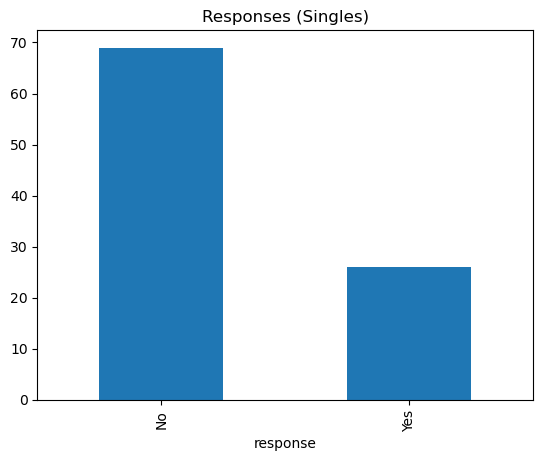

In [9]:
df_singles = extract_and_analyze_results(usa_singles, "Singles")


################# Analyzing results for Families... #################
2025-10-01 13:15:37,444 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"She said No — she and her husband care for two small grandchildren, live on a modest fixed retirement income, cannot justify the cost, and the service targets adults-only luxury/spa destinations that exclude children; she prefers family-friendly nearby trips."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-01 13:15:46,968 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Amara would most likely use the one vacation for a family-friendly trip due to two young children, limited time off, and a preference for trips that accommodate naps, laundry and simple logistics. Practical b

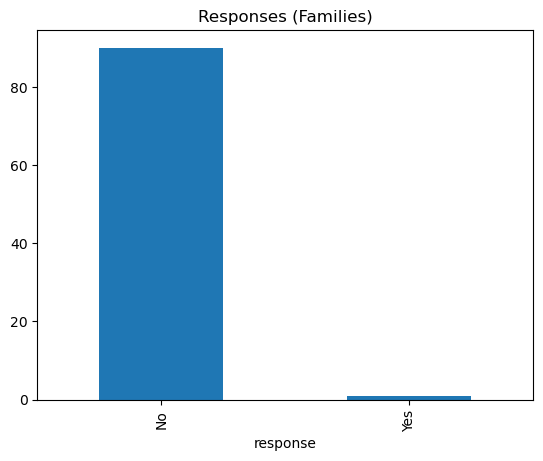

In [10]:
df_families = extract_and_analyze_results(usa_families, "Families")

################# Analyzing results for Couples... #################
2025-10-01 13:28:44,723 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"Alex explicitly said he wouldn\'t use WanderLux because he is 14 (can’t go alone), many locations are adult-only, the service is out of his family’s price range, and he prefers cheaper, local trips while prioritizing saving for school and helping at home."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-01 13:28:52,173 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "Yes", "justification": "He and his spouse value low-stress, restorative trips and WanderLux\'s curated adult-only beachfront/spa options (and protection against fake reviews) address his pain points of limited planning time and risk of 

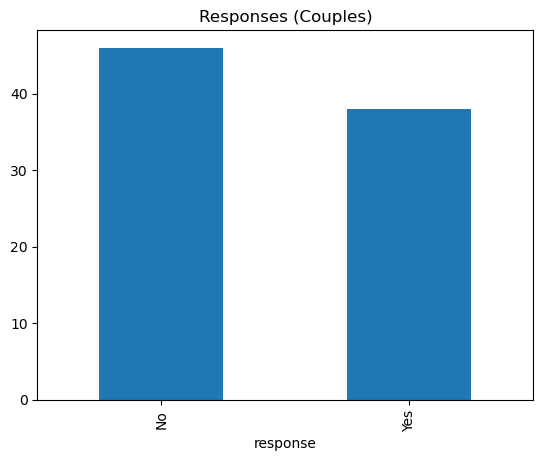

In [11]:
df_couples = extract_and_analyze_results(usa_couples, "Couples")

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np

def plot_combined_responses(title, name_to_df, individual_responses=None):
    """
    Combine the given dataframes in a single chart with grouped bars.
    Each dataframe is a different color and is properly labeled.
    
    Parameters:
    -----------
    title : str
        Title for the plot
    name_to_df : dict
        Dictionary mapping names to dataframes
    individual_responses : list, optional
        List of responses to count individually. If None, only 'Yes' and 'No' are counted individually.
        All other responses will be grouped as "Others".
    """
    print(f"################# Plotting combined responses for {title}... #################")
    
    # If individual_responses is not provided, default to Yes and No
    if individual_responses is None:
        individual_responses = ["Yes", "No"]
    
    # Get unique categories (individual responses + "Others")
    categories = individual_responses.copy()
    
    # Prepare data for grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Define a colormap
    cmap = matplotlib.colormaps['tab10']
    
    # Calculate bar width based on number of groups
    num_groups = len(name_to_df)
    bar_width = 0.8 / num_groups  # Adjust the 0.8 to control spacing
    
    # Check if we need to add "Others" category
    has_others = False
    for df in name_to_df.values():
        if any(resp not in [r.lower() for r in individual_responses] for resp in [r.lower() for r in df["response"].unique()]):
            has_others = True
            break
    
    if has_others and "Others" not in categories:
        categories.append("Others")
    
    # For each category, plot grouped bars for each dataframe
    for i, category in enumerate(categories):
        for j, (name, df) in enumerate(name_to_df.items()):
            # Calculate the position for this bar
            position = i + (j - num_groups/2 + 0.5) * bar_width
            
            # Count occurrences for this category
            if category == "Others":
                # Count all responses that are not in individual_responses (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if not any(resp.lower() == ind.lower() for ind in individual_responses))
            else:
                # Count occurrences of this category (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if resp.lower() == category.lower())
            
            # Plot the bar
            ax.bar(position, count, width=bar_width, alpha=1.0, 
                   label=name if i == 0 else "", color=cmap(j % 10))
    
    # Set the x-ticks in the middle of each group
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories, fontsize=12)
    
    # Increase font sizes for better readability
    plt.title(f"Combined Responses ({title})", fontsize=16)
    plt.xlabel("Response", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(fontsize=12)
    
    # Also increase tick label sizes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

################# Plotting combined responses for travel preferences by group... #################


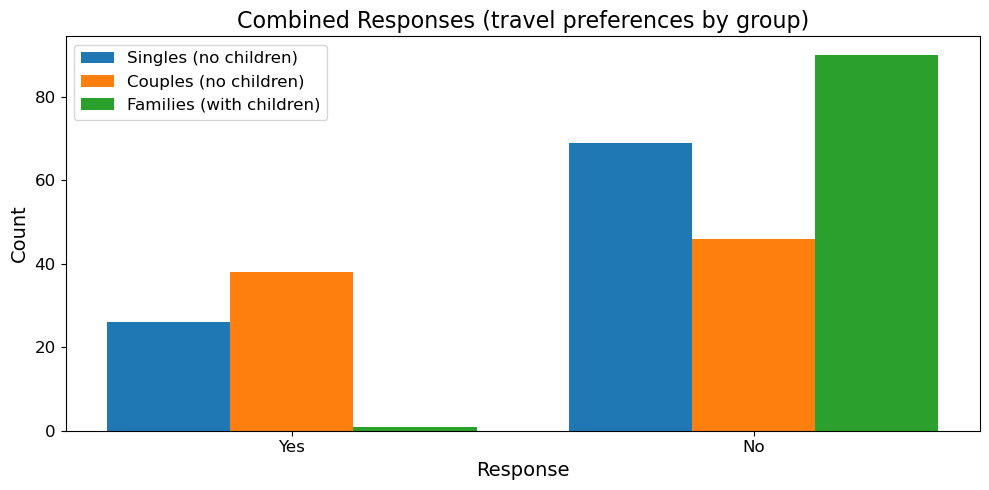

In [17]:
plot_combined_responses("travel preferences by group", 
                        {"Singles (no children)": df_singles, 
                         "Couples (no children)": df_couples,
                         "Families (with children)": df_families})

In [21]:
# statistics about the DF
df_singles.value_counts("response")

response
No     69
Yes    26
Name: count, dtype: int64

In [22]:
df_couples.value_counts("response")

response
No     46
Yes    38
Name: count, dtype: int64

In [24]:
df_families.value_counts("response")

response
No     90
Yes     1
Name: count, dtype: int64

## Compare with Empirical Data (if any)